# Web scraping from PubMed, to get the statistics of keywords with all the publications associated with "cardiovascular" within in year

Read API keys for NCBI (free account required)

In [2]:
# get api key from your .env file
import os
#!pip install python-dotenv

from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('NCBI_API')

print(API_KEY)

61817d0fe1f57b4536319d42a03f393fb308


In [3]:
#import packages
import requests
import json
import re

In [38]:
'''
API Documentation: 
'''


pubmed_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?\
db=pubmed&term=cardiovascular[title]+AND+(2020+OR+2021)&retmax=100&api_key={API_KEY}"


print(pubmed_url)

r = requests.get(pubmed_url)


'''
Why r.json() does not work?
'''
r.text

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=cardiovascular[title]+AND+(2020+OR+2021)&retmax=100&api_key=61817d0fe1f57b4536319d42a03f393fb308


'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>17421</Count><RetMax>100</RetMax><RetStart>0</RetStart><IdList>\n<Id>34614543</Id>\n<Id>34614170</Id>\n<Id>34613528</Id>\n<Id>34613365</Id>\n<Id>34613362</Id>\n<Id>34612056</Id>\n<Id>34612050</Id>\n<Id>34612046</Id>\n<Id>34611879</Id>\n<Id>34611648</Id>\n<Id>34611645</Id>\n<Id>34611644</Id>\n<Id>34611641</Id>\n<Id>34611639</Id>\n<Id>34611634</Id>\n<Id>34611633</Id>\n<Id>34611631</Id>\n<Id>34611617</Id>\n<Id>34611111</Id>\n<Id>34611109</Id>\n<Id>34610929</Id>\n<Id>34610830</Id>\n<Id>34610724</Id>\n<Id>34610722</Id>\n<Id>34610666</Id>\n<Id>34610649</Id>\n<Id>34610646</Id>\n<Id>34610594</Id>\n<Id>34610197</Id>\n<Id>34610044</Id>\n<Id>34609986</Id>\n<Id>34609510</Id>\n<Id>34609508</Id>\n<Id>34609502</Id>\n<Id>34609500</Id>\n<Id>34609450</Id>\n<Id>34609211</Id>\n<Id>34608230</Id>\n<Id>34608069</I

In [46]:
#extra all IDs from r.text

import scrapy

from bs4 import BeautifulSoup

In [50]:
soup = BeautifulSoup(r.text, 'html.parser')

In [51]:
print(soup.prettify())

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">
<esearchresult>
 <count>
  17421
 </count>
 <retmax>
  100
 </retmax>
 <retstart>
  0
 </retstart>
 <idlist>
  <id>
   34614543
  </id>
  <id>
   34614170
  </id>
  <id>
   34613528
  </id>
  <id>
   34613365
  </id>
  <id>
   34613362
  </id>
  <id>
   34612056
  </id>
  <id>
   34612050
  </id>
  <id>
   34612046
  </id>
  <id>
   34611879
  </id>
  <id>
   34611648
  </id>
  <id>
   34611645
  </id>
  <id>
   34611644
  </id>
  <id>
   34611641
  </id>
  <id>
   34611639
  </id>
  <id>
   34611634
  </id>
  <id>
   34611633
  </id>
  <id>
   34611631
  </id>
  <id>
   34611617
  </id>
  <id>
   34611111
  </id>
  <id>
   34611109
  </id>
  <id>
   34610929
  </id>
  <id>
   34610830
  </id>
  <id>
   34610724
  </id>
  <id>
   34610722
  </id>
  <id>
   34610666
  </id>
  <id>
   34610649
  </id>
  <id>
   346106

In [87]:
#get the total counts of search results
#better method??

for line in r.text.split('\n'):
    if "<Count>" in line:
        count = re.findall(r'\d+', line)[0]
        break
        
#redo the search with retmax = count
new_pubmed_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?\
db=pubmed&term=cardiovascular[title]+AND+(2020+OR+2021)&retmax={count}&api_key={API_KEY}"


new_r = requests.get(new_pubmed_url)

list_of_ids = [re.findall(r'\d+', line)[0] for line in new_r.text.split('\n') if "<Id>" in line]

print(len(list_of_ids))

17421


In [88]:
print(list_of_ids)


['34614543', '34614170', '34613528', '34613365', '34613362', '34612056', '34612050', '34612046', '34611879', '34611648', '34611645', '34611644', '34611641', '34611639', '34611634', '34611633', '34611631', '34611617', '34611111', '34611109', '34610929', '34610830', '34610724', '34610722', '34610666', '34610649', '34610646', '34610594', '34610197', '34610044', '34609986', '34609510', '34609508', '34609502', '34609500', '34609450', '34609211', '34608230', '34608069', '34608042', '34607707', '34607633', '34607632', '34607553', '34607299', '34607052', '34606801', '34606574', '34606441', '34606297', '34606024', '34605857', '34605771', '34605767', '34605743', '34605384', '34604925', '34604825', '34604797', '34604408', '34604352', '34604349', '34604019', '34604013', '34604012', '34603712', '34603527', '34603513', '34603511', '34603098', '34603080', '34603037', '34602927', '34602875', '34602525', '34602047', '34601969', '34601961', '34601948', '34601672', '34601620', '34601609', '34601232', '34

In [175]:
import xmltojson
new_url="https://pubmed.ncbi.nlm.nih.gov/34458211"

r = requests.get(new_url)

soup = BeautifulSoup(r.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Mobile properties -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
  <link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://cdn.ncbi.nlm.nih.gov/pubmed/d3976cdb-f249-4f7f-a740-d36a9f43aa7f/CACHE/css/output.35e8b192ea09.css" rel="stylesheet" type="text/css"/>
  <link href="https://cdn.ncbi.nlm.nih.gov/pubmed/d3976cdb-f249-4f7f-a740-d36a9f43aa7f/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
  <link href="https://cdn.ncbi.nlm.nih.gov/pubmed/d3976cdb-f249-4f7f-a740-d36a9f43aa7f/CA

In [176]:
from lxml import html
import requests

In [177]:
page = requests.get(new_url)
tree = html.fromstring(page.content)

In [178]:
#How to extract keywords??????

#Strategies: check if keywords is in the list, if yes, check the next element

keywords = tree.xpath('//div[@class="abstract"]//p//text()')
for k in range(len(keywords)):
    print(f"{k}: {keywords[k]}")

0: 
      
      Cardiovascular disease (CVD) is an evolving process that begins in the early stages of chronic kidney disease (CKD) in children. Several surrogate markers, such as ambulatory blood pressure monitoring (ABPM), left ventricular (LV) mass, and arterial stiffness assessment, allow for the early detection of subclinical CVD in pediatric CKD. Four groups of plasma samples (
1: n
2:  = 3/group) from congenital anomalies of the kidney and urinary tract (CAKUT), as well as non-CAKUT patients with or without BP abnormalities, were studied to screen differentially expressed proteins using isobaric tags for relative and absolute protein quantification (iTRAQ)-based proteomics. As a result, 20 differentially expressed proteins associated with hypertension in children with CKD were discovered. Among them, apolipoprotein C-II (apoC-II) was found to have the highest abundance among the CKD patients with hypertension. As such, we hypothesized that apoC-II and apolipoprotein C-III (apoC

In [189]:
for x in keywords[-1].lstrip().split(";"):
    print(x.lstrip().replace(".",""))

ambulatory blood pressure monitoring
apolipoprotein C
cardiovascular disease
children
chronic kidney disease
congenital anomalies of the kidney and urinary tract
hypertension
proteomics
    


In [197]:
#get all possible keywords from all publication ids (some ids may not have keywords)
#very slow

import re
list_of_keywords = []

url_prefix = "https://pubmed.ncbi.nlm.nih.gov/"

count = 0

for i in range(len(list_of_ids)):
    
    id = list_of_ids[i]
    
    if i % round(len(list_of_ids)/10) == 0:
        print(f"Finished {i*10}%!")
    page = requests.get(f"{url_prefix}{id}")
    tree = html.fromstring(page.content)
    
    abstracts = tree.xpath('//div[@class="abstract"]//p//text()')
    
    
    if len(abstracts)>0:
        print(abstracts[-1])
    
    
    for j in range(len(abstracts)):
        line = abstracts[j]
        if "Keywords" in line:
            count += 1
            try:
                
                list_of_keywords += [x.lstrip().replace(".","") for x in abstracts[j+1].lstrip().split(";")]
                
            except:#key words are in the same line
                list_of_keywords += [x.lstrip().replace(".","") for x in re.split('; |, ',line.lstrip()) if x!="Keywords"]
                
            break
            
            
    
    
    
print(f"Total number of keywords extracted is {len(list_of_keywords)}")
print(f"{round(count/len(list_of_ids)*100,2)}% articles have keywords")    
    
    
    
    
            
        
    
    
    


Finished 0%!

      
      Cardiorenal; Cardiovascular Diseases; Inflammation; Metabolic Syndrome; Oxidative Stress.
    

      
      Gene by environment; Life Simple 7; cognitive aging.
    

      
      Cell–cell signaling; Computational modeling; Growth and remodeling; Mechano-regulation; Mechanobiology; Tissue organization.
    

      
      3D genome organization; embryonic stem cells; single-cell SPRITE; topology associated domains.
    

      
      This narrative review summarizes the evidence available about the appropriate role of CAC testing for ASCVD risk assessment. Coronary artery calcium testing should be used selectively in patients who are at intermediate risk of ASCVD, when there is persistent uncertainty after performing standard risk assessment using traditional risk factors in a risk score, and after consideration of additional individual risk-enhancing factors. In these situations, the result of the CAC test can be helpful to clarify whether the patient's tru


      
      Infection of the heart muscle with cardiotropic viruses is one of the major etiologies of myocarditis and acute and chronic inflammatory cardiomyopathy (DCMi). However, viral myocarditis and subsequent dilated cardiomyopathy (DCM) is still a challenging disease to diagnose and to treat and is therefore a significant public health issue globally. Advances in clinical examination and thorough molecular genetic analysis of intramyocardial viruses and their activation status have incrementally improved our understanding of molecular pathogenesis and pathophysiology of viral infections of the heart muscle. To date, several cardiotropic viruses have been implicated as causes of myocarditis and DCMi. These include, among others, classical cardiotropic enteroviruses (coxsackieviruses B), the most commonly detected parvovirus B19, and human herpes virus 6. A newcomer is the respiratory virus that has triggered the worst pandemic in a century, SARS-CoV-2, whose involvement and impa


      
      Mediterranean Diet; dietary behaviour change; peer support; pilot trial.
    

      
      Amyloidosis; Nuclear imaging; Precision medicine; Quantitative imaging; Transthyretin amyloidosis.
    

      
      Altmetrics; Cardiovascular medicine; Citation; Impact factor; Social media.
    

      
      CABG, coronary artery bypass graft; CAC, coronary artery calcium; CAD, coronary artery disease; CI, confidence interval; CT, computed tomography; CTCA, computed tomography coronary angiography; CV, cardiovascular; DIBH, deep inspiratory breath hold; HF, heart failure; HL, Hodgkin lymphoma; HNC, head and neck cancer; HR, hazard ratio; LIMA, left internal mammary artery; MRI, magnetic resonance imaging; NT-proBNP, N-terminal pro–B-type natriuretic peptide; OR, odds ratio; PAD, peripheral arterial disease; RT, radiation therapy; SAVR, surgical aortic valve replacement; SVC, superior vena cava; TAVR, transcatheter aortic valve replacement; TTE, transthoracic echocardiogram; aH


      
      diabetes complications; diabetic neuropathies; heart rate variability; indigenous peoples.
    

      
      Cardiovascular care; Coronavirus disease 2019 (COVID-19); Hospitalizations; Trends.
    

      
      Cardiovascular disease; Elderly; Mortality; Obesity; Waist circumference.
    

      
      Cardiac Toxicity; Cardiovascular Comorbidity; Doxorubicin; Quantitative Systems Pharmacology.
    

      
      Anemia; Chronic kidney disease; Marginal structural model.
    

      
      Gliflozins, especially canagliflozin and sotagliflozin, should be recommended in T2D patients with CKD to prevent stroke. Most gliflozins lower the risk of MACE in T2D patients regardless of HF status and ASCVD status, whereas ertugliflozin is not observed to lower that risk.
    

      
      The association between serum total cholesterol (TC) level and incident atherosclerotic cardiovascular disease (ASCVD) in patients with follicular thyroid cancer postthyroidectomy is unknown.Th


      
      Atherosclerosis; Septic shock; Stress-induced premature senescence; sepsis.
    

      
      Diabetes; Mediterranean diet; corporate social responsibility.
    

      
      Cardiovascular diseases; Circular RNAs (circRNAs).
    

      
      The greatest reduction in CVD-related deaths was seen in strategies that improve systems response to acute CVD events (8.9%, IQR: 7.7-10.2%), yet they resulted in an increase in CVD-related hospitalisations due to future recurrent admissions (1.6%, IQR: 0.1-2.3%). This flow-on effect highlighted the importance of addressing underlying CVD risks. On the other hand, strategies targeting the broad environment that supports a healthy lifestyle were effective in reducing both hospitalisations (7.1%; IQR: 5.0-9.5%) and deaths (8.1% reduction; IQR: 7.1-8.9%). They also produced an economic net benefit of AU$43.3 billion (IQR: 37.7-48.7) using a societal perspective, largely driven by productivity gains. Overall, strategic planning to re


      
      Aged; Cardiovascular system; Cost-effectiveness; Drug Monitoring; Economics; Pharmacy.
    

      
      3D printing; Antithrombotic effect; Biodegradable vascular grafts; Dipyridamole; Polycaprolactone.
    

      
      Breast cancer; Cardiovascular disease; Cardiovascular mortality; Risk prediction models.
    

      
      Acute myocardial infarction; Furin; Major adverse cardiac events.
    

      
      atherosclerosis; cardiac; cardiovascular disease; endothelial dysfunction; inflammation; reactive oxygen species; selenium; selenoprotein; thrombosis; vascular smooth muscle cell.
    

      
      Japanese; atrial fibrillation; cardiovascular health.
    

      
      blood pressure; cardiovascular; hypertension; salt; sodium.
    

      
      aortic stiffness; fructose; glucose; hypertension; left ventricular diastolic dysfunction; pulse wave velocity; renal resistive index.
    

      
      25-hydroxyvitamin D; ApaI; BsmI; FokI; TaqI; epi-25-hydroxyvitam


      
      [This corrects the article DOI: 10.1371/journal.pone.0251260.].
    

      
      Division of Pharmacoepidemiology and Pharmacoeconomics, Department of Medicine, Brigham and Women's Hospital and Harvard Medical School.
    

      
      Cardiovascular disease; China; Disease burden; Long term; Particulate matter.
    

      
      Acute coronary syndrome; Carcinoid heart disease; Cardio-oncology; Coronary artery disease; Interventional onco-cardiology; Percutaneous coronary intervention; Pericardiocentesis; Takotsubo cardiomyopathy; Transcatheter aortic valve replacement.
    

      
      Autoimmune diseases; Cardiovascular disease; Disease-modifying anti-rheumatic drugs; Hyperhomocysteinemia; Inflammation.
    

      
      CTA; Carotid; cardiovascular; plaque.
    

      
      bleeding; peripheral vascular intervention; prediction model.
    

      
      SSRI; antidepressants; depression; long QT syndrome; myocardial infarction; stroke.
    

      
      card


      
      Development of cholesteryl ester transfer protein (CETP) inhibitors for coronary heart disease (CHD) has yet to deliver licensed medicines. To distinguish compound from drug target failure, we compared evidence from clinical trials and drug target Mendelian randomization of CETP protein concentration, comparing this to Mendelian randomization of proprotein convertase subtilisin/kexin type 9 (PCSK9). We show that previous failures of CETP inhibitors are likely compound related, as illustrated by significant degrees of between-compound heterogeneity in effects on lipids, blood pressure, and clinical outcomes observed in trials. On-target CETP inhibition, assessed through Mendelian randomization, is expected to reduce the risk of CHD, heart failure, diabetes, and chronic kidney disease, while increasing the risk of age-related macular degeneration. In contrast, lower PCSK9 concentration is anticipated to decrease the risk of CHD, heart failure, atrial fibrillation, chronic k


      
      Dietary pattern; cardiovascular; cross-sectional; older adults.
    

      
      cardiovascular diseases; coronary heart disease; inflammation; rosacea; stroke.
    

      
      cardiovascular disease; cardiovascular disease risk; risk factors; type 2 diabetes.
    

      
      Norwegian Research Council and the Liaison Committee between the Central Norway Regional Health Authority and the Norwegian University of Science and technology.
    

      
      Among LTRs with CKD, nephrology comanagement may be associated with lower CV events. A prospective study is needed to identify the reasons for improved outcomes and barriers to nephrology referral.
    

      
      cardiovascular disease; diastolic dysfunction; endothelial dysfunction; hemodialysis; vascular adhesion protein-1.
    

      
      Cardiovascular disease; Cardiovascular risk factors; Coronavirus disease.
    

      
      cardiovascular disease; coronary artery disease; diabetes; heart failure; hy


      
      Aim To evaluate the prognostic significance of the left ventricular global function index (LV GFI) in patients with acute coronary syndrome (ACS) using echocardiography (EchoCG).Material and methods The LV GFI is an index that integrates LV cavity volumes, stroke volume, and myocardial volume. This study included 2169 patients with ACS (1340 (61.8%) men) aged 64.1±12.6 years from two observational multicenter studies, ORACLE I and ORACLE II. 1800 (83 %) cases were associated with increased concentrations of myocardial injury markers, including 826 (38.1 %) cases of ST segment elevation myocardial infarction (MI). The observation was started on the 10th day of clinical condition stabilization and lasted for one year. EchoCG was performed with evaluation of LV GFI, which was calculated as a ratio of LV stroke volume to LV global volume. The LV global volume was calculated as a sum of mean LV cavity volume (LV end-diastolic volume + LV end-systolic volume / 2) and LV myocard


      
      In a twin pregnancy, HDP are weaker risk factors for postpartum cardiovascular disease than in a singleton pregnancy.
    

      
      Given their flexibility, machine learning approaches may provide an opportunity to incorporate the complex nature of social determinants of health. The limited variety of sources and data in the reviewed studies emphasize that there is an opportunity to include more social determinants of health variables, especially environmental ones, that are known to impact cardiovascular disease risk and that recording such data in electronic databases will enable their use.
    

      
      Cardiovascular-pulmonary disease mortality; Non-small cell lung cancer; Postoperative radiotherapy; Propensity score matching; SEER; Stage IIIA-N2.
    

      
      Arachidonic acid; Cardiovascular; Clinical; Diabetes; Hypertension; Metabolic syndrome; Soluble epoxide hydrolase.
    

      
      Cardiovascular; Endpoints; NAFLD; NASH; Trials.
    

      



      
      Childless men are reported to have a higher risk of cardiovascular disease (CVD) and mortality. Information on inherited genetic risk for CVD has improved the predictive models. Presuming that childlessness is a proxy of infertility we aimed to investigate if childless men inherit more often genetic traits for CVD and if combining genetic and parenthood information improves predictive models for CVD morbidity and mortality. Data was sourced from a large prospective population-based cohort where genetic risk score (GRS) was calculated using two sets of either 27 (GRS 27) or 50 (GRS 50) single nucleotide polymorphisms (SNPs) previously found to be associated with CVD. Part of the participants (n = 2572 men) were randomly assigned to a sub-cohort with focus on CVD which served as an exploratory cohort. The obtained statistically significant results were tested in the remaining (confirmatory) part of the cohort (n = 9548 men). GRS distribution did not differ between childless


      
      capd; cardiovascular-related mortality; hs-crp; predicting; uric acid.
    

      
      Cordyceps cicadae mycelia; Liquid fermentation; N6‐(2‐hydroxyethyl) adenosine; safety assessment.
    

      
      cardiovascular disease; hypothyroidism; in utero exposure; nationwide cohort study; register-based.
    

      
      8-oxoGsn; cardiovascular disease; frailty; mild cognitive impairment; oxidative stress.
    

      
      basal ganglia; cardiovascular risk burden; cerebral blood flow; enlarged perivascular spaces; gray matter volume; magnetic resonance imaging.
    

      
      Cardiac rehabilitation is a complex intervention that seeks to improve the functional capacity, wellbeing and health-related quality of life of patients with heart disease. A substantive evidence base supports cardiac rehabilitation as a clinically effective and cost-effective intervention for patients with acute coronary syndrome or heart failure with reduced ejection fraction and after c


      
      Video Summary:http://links.lww.com/MENO/A813.
    

      
      Video Summary:http://links.lww.com/MENO/A807.
    

      
      Cardiovascular disease (CVD) is a group of heart and vasculature conditions which are the leading form of mortality worldwide. Blood vessels can become narrowed, restricting blood flow, and drive the majority of hearts attacks and strokes. Surgical interventions are frequently required; including percutaneous coronary intervention (PCI) and coronary artery bypass grafting (CABG). Despite successful opening of vessels and restoration of blood flow, often in-stent restenosis (ISR) and graft failure can still occur, resulting in subsequent patient morbidity and mortality. A new generation of cardiovascular implants that have sensors and real-time monitoring capabilities are being developed to combat ISR and graft failure. Self-reporting stent/graft technology could enable precision medicine-based healthcare by detecting the earliest features of di


      
      Acute pancreatitis; Atherosclerosis; Hypertriglyceridemia; Lipoprotein lipase; Triglyceride-rich lipoproteins.
    

      
      Hemodynamics; Left ventricle; Marathons; Vascular stiffness; Women.
    

      
      Cardiovascular disease; Epidemiology; MABAT; Mortality; Older adults; Physical activity.
    

      
      Acute kidney injury; Alpha-1-microglobulin; Biomarker; Cardiac surgery; Chronic kidney disease; Mortality.
    

      
      cardiovascular disease; cytopenia; mortality; race; stroke.
    

      
      cardiorespiratory fitness; cardiovascular health; cognition; exercise; mediation; midlife; structural brain health.
    

      
      heart failure; ischemic stroke; meta‐analysis; myocardial infarction; type 2 diabetes.
    

      
      Our findings emphasise the role of multidisciplinary management of cancer patients. Widespread adoption of cardio oncology services have the potential to impact the inherent risk of increased CV mortality in both ca


      
      Cardiovascular disease; Community-based intervention; Effectiveness; Meta-analysis; Meta-regression; Physical activity.
    

      
      Atherosclerotic cardiovascular disease; Atherothrombosis; Factor analysis; Fibrinolysis; Risk prediction.
    

      
      cardiovascular disease; chronic kidney disease; diabetes; metabolic dysfunction-associated fatty liver disease; non-alcoholic fatty liver disease.
    

      
      Allopurinol; Benzbromarone; Cardiovascular risk; Gout; Hyperuricaemia.
    

      
      Nepal started the COVID-19 vaccination on 27 January 2021 with AstraZeneca/Oxford Coronavirus Disease-19 AZD1222 (Covishield) vaccine to control the Coronavirus disease pandemic. The vaccine has a good safety profile, with cardiovascular complications being rare. Herein we report a rare case of cardiovascular complication following Covishield vaccination in a 33 years old female who had dizziness and elevated blood pressure immediately following vaccination and 


      
      Web application; consumer self-selection; nonprescription statins.
    

      
      ASCVD; Multi-Ethic Study of Atherosclerosis (MESA); cardiovascular risk; high-sensitivity C-reactive protein (hsCRP); inflammation; lipoprotein(a).
    

      
      ASCVD; Multi-Ethic Study of Atherosclerosis (MESA); cardiovascular risk; high-sensitivity C-reactive protein (hsCRP); inflammation; lipoprotein(a).
    

      
      Cardiovascular Diseases; Nigeria; Public Service; Risk Assessment; Risk Factors.
    

      
      Islet-1; cardiovascular progenitor cells; hypoxia; ovine; stemness.
    

      
      cardiovascular diseases; chronic kidney disease; hyperuricemia; uricosuric; xanthin oxidase.
    

      
      atherosclerosis; cardiovascular disease; dyslipidemia; inflammation; macrophage; monocytes.
    

      
      apical periodontitis; cardiovascular disease; chronic endodontic infection; coronary heart disease; periapical lesion.
    

      
      cardiac rehabilita


      
      AHA Scientific Statements; altitude; cardiovascular diseases; exercise; heart failure; hypertension; sudden cardiac death; syncope.
    

      
      Angiotensin Converting Enzymes; Major adverse cardiac outcomes; acute Kidney Injury; angiotensin Receptor Blockers; coronary artery disease.
    

      
      Interventions are needed to target patients who begin with a lower physical activity level, with the goal of enhanced cardiovascular health. The predictors identified in the study may facilitate earlier and more tailored interventions.
    

      
      Thrombospondins; cell physiology; extracellular matrix; fibroblasts; smooth muscle.
    

      
      Biomarkers; Cardiovascular disease; Glycosylation; Immunoglobulin G; Inflammation; Prevention.
    

      
      African Americans; Cardiovascular disease; Jackson Heart Study; Neighborhoods; Risk factors; Type 2 diabetes.
    

      
      The study was supported by a research grant from Bayer Vital AG, Germany.



      
      calcium; cardiovascular disease; citrate; diet; myocardial infarction; urine pH; urolithiasis.
    

      
      Clinical trials; Diversity; Race/ethnicity;Prevention; Recruitment; Sex differences; Women.
    

      
      ASCVD; Cardiovascular; Inflammation; Sleep.
    

      
      Cardiovascular death; ethnicity; health disparities; health equity; socioeconomic status.
    

      
      adeno-associated virus; cardiac endothelial cells; cardiovascular gene therapy; directed evolution; transduction.
    

      
      CD4 count; HIV; antiretroviral treatment; cardiovascular disease; prevalence.
    

      
      arterial stiffness; biological plausibility; ecological validity; endothelial function; external validity; internal validity; methodology; sedentary behavior.
    

      
      aminoacyl-tRNA synthetase; aminoacylation; angiogenesis; mitochondrial cardiomyopathy; mutation.
    

      
      Our findings in the Chinese cohort support that hs-cTnT is a risk


      
      Antipsychotics; Mortality; Observational study; Schizophrenia; Taiwan.
    

      
      Apnea-hypopnea index; Arterial hypertension; Cardiovascular risk factors; Hypercholesterolemia; Hypertriglyceridemia; Obesity; Obstructive sleep apnea; Smoking; Type 2 diabetes.
    

      
      Endurance exercise; cardiovascular disease; molecular mechanisms; mortality; physiological adaptations; prevention.
    

      
      Cardiovascular dysfunction; Cardiovascular function; Coronavirus disease; Public health implications; SARS-CoV-2.
    

      
      Fermented foods; Gut microbiome; Immune cell activation; Inflammation; α-diversity.
    

      
      Cardiovascular outcomes; cohort; living alone; meta-analysis.
    

      
      COVID-19; cardiac troponin; cardiovascular diseases.
    

      
      Cardiovascular disease; Chronic hepatitis B; Liver fibrosis; Risk factor.
    

      
      17-hydroxyprogesterone; Cardiovascular System; androgens; blood pressure; congenit


      
      cardiovascular endurance; functional capacity; hemodialysis; meta-analysis; physical exercise; systematic review.
    

      
      cardiovascular risk; inflammation; metabolic syndrome; psoriatic arthritis; rheumatoid arthritis.
    

      
      Atherosclerosis; Clonal hematopoiesis; Genomics; Preventive cardiology.
    

      
      Cardiovascular disease; Dyslipidemia; Inflammation; Psoriasis.
    

      
      ABCG5/G8; Atherosclerosis; Cholesterol metabolism; NPC1L1; Phytosterols.
    

      
      End-organ damage; Endothelin receptors; Fetal programming; Preeclampsia; Thromboxane receptors; Tissue inflammation.
    

      
      Asian; Coffee; mortality; tea.
    
.
    

      
      carbon nanotubes; machine learning; motion artifacts; personalized healthcare; pulse wave monitoring; smart textiles.
    

      
      Immunomodulation; Macrophage; Metabolism; Plasticity.
    

      
      Activin A receptor type II–like kinase 1; Angiopoietin-like proteins


      
      COVID-19; cardiovascular; coronavirus; disease.
    

      
      Ibrutinib is associated with higher risk of AF, bleeding, and HF, but not AMI or stroke.
    

      
      cardiovascular magnetic resonance; echocardiography; multimodality imaging; nuclear imaging.
    

      
      canagliflozin; cardiovascular disease; type 2 diabetes.
    

      
      diabetes mellitus; insulin; sodium-glucose cotransporter-2 inhibitors.
    

      
      body mass index; end-stage renal disease; glomerular filtration rate; high cardiovascular risk; mortality; obesity.
    

      
      artificial Intelligence; cardiac surgery; outcomes; remote cardiac monitoring.
    

      
      Pharmacogenomics promises to advance cardiovascular therapy, but there remain pragmatic barriers to implementation. These are particularly important to explore within Europe, as there are differences in the populations, availability of resources and expertise, as well as in ethico-legal frameworks. D


      
      Body mass index; Cardiovascular outcomes; Hypertension; Variability; Weight change slope.
    

      
      Cardiovascular disease; Diet; Nutrient; microRNA.
    

      
      anti-CTLA4; anti-PD-1; anti-PD-L1; cardiovascular adverse events; immune checkpoint inhibitors; real-world evidence.
    

      
      Accuracy; Atherosclerotic cardiovascular disease; Risk score assessments.
    

      
      Active commuting; Air pollution; Cardiovascular disease; Cohort study; Fine particulate matter.
    

      
      Cardiovascular disease; Cardiovascular risk factors; Hypertensive disorders of pregnancy; Peri-operative medicine; Preeclampsia.
    

      
      Artificial intelligence; Digital health; Health technology assessment.
    

      
      AZD9977 (PubMED CID: 118599727); Aldosterone; Apararenone (PubMED CID: 24744336); Cardiorenal; Eplerenone (PubMED CID: 443872); Esaxerenone (PubMED CID: 25052023); Finerenone; Finerenone (PubMED CID: 60150535); KBP-5074 (PubME


      
      Alcohol consumption; Atherosclerosis; Cardiovascular diseases; Diabetes mellitus; Mortality.
    

      
      Age; Cardiovascular events; Metaanalysis; Rheumatoid arthritis; Risk; Systemic lupus erythematosus.
    

      
      Animal studies; Cardiovascular disease; Cardiovascular research; Exercise; Exercise models.
    

      
      Cardiovascular diseases; China; Mortality; Prevention and control strategy; Years of life lost.
    

      
      Cardiovascular physiology; Goldfish; Heart; Nesfatin-1; Nesfatin-1-Like peptide; Zebrafish.
    

      
      Acute coronary syndromes; Cancer therapy; Cardio-oncology; Pericardial effusion; Pericarditis; Tamponade.
    

      
      magnetic resonance; obesity; remodelling.
    

      
      Hatha yoga is commonly practiced in Western countries and is claimed to reduce risk of cardiovascular disease. The purpose of this study was to evaluate and compare time-domain and frequency-domain metrics of heart rate variability 

.
    

      
      7 tesla MRI; MRI scans; cardiology; magnetic resonance imaging.
    

      
      adverse drug reaction; cardiology; precision medicine.
    

      
      The prevalence of hypertension has increased with the rise in the elderly population, and high blood pressure is a major cause of cardiovascular disease. Physical activity is an important strategy for preventing cardiovascular disease. The study aimed to explore the association between physical activity and cardiovascular risk indicators in community-dwelling older adults with hypertension.This study is a secondary data analysis of a prospective longitudinal study using data from the Elderly Cohort Database of the National Health Insurance Service in South Korea between 2002 and 2013. Participants included 10,588 older adults (≥60 years) with hypertension. Data assessing self-reported physical activity and directly measured blood pressure, fasting blood glucose, body mass index, and total cholesterol levels thr


      
      anti-apoptotic; anti-inflammatory; anti-oxidant; cardiovascular diseases; paeonol; vascular tone regulation.
    

      
      atherosclerosis; dipeptidyl peptidase-4; endothelial cells; glucagon-like peptide-1; haemoglobin A1c; mitochondria; mononuclear cells; systolic blood pressure; vascular smooth muscle cells.
    

      
      ST-elevation myocardial infarction; atherosclerotic lesion; cardiovascular diseases; cardiovascular risk factors; coronary artery disease; percutaneous coronary intervention.
    

      
      cardiovascular diseases; metabolic syndrome; obesity; postmenopausal.
    

      
      acute myocardial infarction; drug-eluting stents; mortality; percutaneous coronary intervention; prognosis.
    

      
      ABI (ankle–brachial pressure index); CCTA (coronary artery and cardiac computed tomography); CVD (cardiovascular disease); Japanese; psoriasis.
    

      
      3-mercaptopyruvate sulphurtransferase; cardiovascular disease; cystathionine


      
      cardiovascular disease risk score; food insecurity gender; food security; weight status.
    

      
      Adalimumab reduced AGEs in psoriatic patients. Biologic therapies may also prevent cardiovascular disease, suggesting a new approach of combined therapy for psoriasis and cardiovascular diseases.
    

      
      CABG; Cardiovascular disease; Left main coronary artery disease; PCI; Three-vessel disease.
    

      
      Cardiovascular diseases; Myocardial infarction; Smoking cessation; Smoking reduction; Stroke.
    

      
      In patients with chronic coronary syndrome, elevated levels of IL-6 were associated with risk of MACE in all CKD strata. Thus, IL-6 and CKD stage may help when identifying patients with chronic coronary syndrome for anti-inflammatory treatment.
    

      
      Les personnes diabétiques sont considérées comme ayant un risque cardiovasculaire accru. Les patients diabétiques de type 1 (DT1) ont un profil de risque cardiovasculaire souv

 region, and higher E354-mediated fasting GIP levels are not associated with CAD risk. These findings provide evidence that the inclusion of GIPR agonism in dual GIPR/GLP-1R agonists could potentiate the protective effect of GLP-1 agonists on diabetes without undue CAD risk, an aspect which has yet to be assessed in clinical trials.
    

      
      Arterial stiffness; Pulse wave velocity; Risk scores; Vascular age.
    

      
      diabetes self-management education; fruit and vegetable prescriptions; type 2 diabetes.
    

      
      Cardiovascular morbidity; Exposure assessment; Particulate matter.
    

      
      Hispanic/Latino; cardiovascular risk; meatpacking; musculoskeletal pain; occupational health.
    

      
      Pre-participation screening; athlete’s heart; cardiac magnetic resonance; echocardiography; sudden cardiac death.
    

      
      Cardiovascular disease; Endothelial dysfunction; Obesity hypoventilation syndrome; Pulmonary hypertension.
    

      



      
      Most United States adults with diabetes, CKD, or age at least 65 years had high ASCVD risk. However, many with stage 1 hypertension did not.
    

      
      Even though this observational study did not support inference of a causal relationship, a SBP of 120-129 mmHg and a DBP of 80-89 mmHg may be safely recommended considering the possibility of MACCE in Korean patients with hypertension. In addition, the target BP should be tailored individually according to age, sex, and comorbidities.
    

      
      Anxiety; Cardiac diseases; Depression; Quality of life.
    

      
      Cardiovascular disease; Cardiovascular risk factors; Hypertensive disorders of pregnancy; Mechanisms; Preeclampsia; Prevention; Screening.
    

      
      Cardiovascular disease; Coronary artery bypass graft surgery; Eicosapentaenoic acid; Omega-3 fatty acids; Percutaneous coronary intervention.
    

      
      Cardiovascular disease; Hand grip strength; Muscle strength.
    

      
  


      
      cardiac rehabilitation; cardiology; cardiovascular disease; disease prevention; e-learning; exercise capacity; monitoring system; rehabilitation; remote system.
    

      
      Coronary artery disease; Phase contrast cine; Prognosis; Resting coronary sinus flow.
    

      
      Cardiovascular mortality; Dyslipidemia; Lipoprotein(a); Sex-specific; Type 2 diabetes mellitus.
    

      
      Apalutamide; darolutamide; enzalutamide; nmCRPC; prostate cancer.
    

      
      AHA Scientific Statements; analgesics, opioid; brain; cardiovascular diseases; guideline; opioid-related disorders; stroke.
    

      
      Aging; Atherosclerosis; Hypertension; Metabolic disease; Smoking; Vessel wall imaging.
    

      
      T cells; autoimmunity; cardiovascular complications; extracellular vesicles; microRNAs; type 1 diabetes.
    

      
      Sickness behaviors, including anorexia, are evolutionarily conserved responses to acute infections. Inflammation-induced anorexi


      
      Cardiovascular diseases; Metabolic disorder; Modification; Post-translational; Renal diseases.
    

      
      Cardiovascular disease (CVD) is the leading cause of death in the UK, whilst millions live with various forms of the disease. Coronary artery disease constitutes a significant portion of this morbidity and mortality, and is the leading cause of premature death. Increasing focus is thus being placed on the optimisation of CVD prevention, where risk screening plays a key role. Indeed, the decline in age-adjusted cardiovascular mortality achieved up to now has been largely attributed to primary preventative therapies (e.g., statins) introduced earlier in the disease process. National initiatives exist to improve cardiovascular health at a population level, but in its current form, CVD screening at the individual level is predominantly undertaken using multivariate risk scores based on population-based data. These have multiple innate flaws, highlighted in this re


      
      cardiovascular disease; genetics; myocardial infarction; risk assessment; stroke.
    

      
      blood pressure; cardiovascular disease; diabetes mellitus; mortality; visit‐to‐visit variability.
    

      
      animal food; atherosclerotic cardiovascular disease; renal function; trimethylamine N‐oxide.
    

      
      Because clinician-clinical nurse specialist delirium agreement was low and hypoactive delirium was common, clinical interventions are needed.
    

      
      congenital heart disease; coronary artery disease; pediatrics; peripheral arterial disease; structural heart disease intervention.
    

      
      HIV; cardiovascular disease; chronic inflammation; immune activation; monocytes; rosuvastatin.
    

      
      This cross-sectional study examines the financial associations between authors of commentaries on randomized clinical trials of invasive cardiovascular interventions and trial sponsors, and whether the financial associations were d


      
      cardiomyopahty; left ventricular ejection fraction (LVEF); left ventricular global longitudinal strain; outcome; pacemaker.
    

      
      all-cause mortality; cardiovascular mortality; hypertension; risk factors; selenium.
    

      
      cardiovascular diseases; cardiovascular health; hypertension; obesity; zinc; zinc deficiency; zinc supplementation.
    
 < 0.05). This indicates that folic acid can effectively treat cardiovascular stenosis, prevent cardiovascular disease, and then treat patients with cardiovascular disease with antithrombotic and anticoagulant drugs. It provides an important basis for accurate clinical diagnosis and treatment.
    

      
      Cardiovascular disease; Obstructive sleep apnea; Systematic review.
    

      
      Elevated GDF-15 levels were significantly associated with cardiovascular risk factors and can be considered as a predictive biomarker of cardiovascular risk in AGHD patients.
    

      
      Cardiovascular nursing 


      
      Arrhythmia; Caffeine; Coffee; Coronary heart disease; Heart failure; Metabolic syndrome; Mortality; Tea.
    

      
      Among patients with NCVD and angina, NCVD had increased adjusted risks of CAD and adverse outcomes which were not well described by ASCVD risk score and were underrecognized by physicians. Increased awareness and better risk stratification tools for patients with NCVD may be necessary to recognize the associated CV risk and optimize diagnostic testing and therapies.
    

      
      Cardiovascular; Prognostic marker; Skin autofluorescence; Type 2 diabetes.
    

      
      cardiology trials; cardiovascular disease; congestive heart failure; underrepresented minority; women.
    

      
      cardiac remodeling; diastolic function; diffuse fibrosis; extracellular matrix; myocardial fibrosis; prematurity; preterm birth.
    

      
      coronary heart disease; lignan; prospective cohorts.
    

      
      Axillary lymph node metastasis; Breast

 set during isometric exercise (by ~5 mmHg). Dynamic resistance exercise evoked a greater increase in heart rate, stroke volume, cardiac output, and contractility index (p<0.05), and a greater decline in peripheral resistance, baroreceptor sensitivity, and cardiac function indices than isometric exercise (p<0.05). Participants exhibited a greater reduction in muscle oxyhemoglobin and a greater increase in muscle deoxyhemoglobin in dynamic versus isometric exercise (p<0.001-0.05), with no differences in total hemoglobin and blood lactate. In conclusion, large muscle-mass, multiple-set isometric exercise elicits a relatively similar blood pressure but blunted cardiovascular and baroreceptor sensitivity responses compared to workload-matched dynamic resistance exercise. Differences in blood pressure responses between protocols appear small (~5 mmHg) and are affected by the number of sets. The muscle oxidative stimulus is greater during dynamic resistance exercise than workload-matched iso


      
      This pre-post study examined sex-differences in peak aerobic power (V̇O2peak) and physical- and mental-health outcomes in adults with cardiovascular disease who completed high-intensity interval training (HIIT)-based cardiac rehabilitation. HIIT consisted of 25 minutes of alternating higher- (4 minutes 85-95% HRpeak) and lower- (3 minutes 60-70% HRpeak) intensity intervals twice weekly for 10 weeks. V̇O2peak estimated from a graded exercise test using the ACSM equation, body mass index (BMI), waist circumference, blood pressure, blood biomarkers and anxiety and depression were assessed at baseline and follow-up. Linear mixed-effects models for repeated measures were performed to examine differences over time between sexes. Of 140 participants (mean ± standard deviation: 58±9 years), 40 were female. Improvements in V̇O2peak did not differ between sexes (interaction: p=0.273, females: 28.4±6.4 to 30.9±7.6; males: 34.3±6.3 to 37.4±6.0 mL/kg/min). None of the time by sex inte


      
      FGF23; Mendelian randomization; cardiovascular disease; cardiovascular risk factor; kidney disease; longevity; type 2 diabetes mellitus.
    

      
      cardiovascular risk factors; complications; control rates; prevalence; type 2 diabetes.
    

      
      angiogenesis; cardiac arrhtyhmias; endothelial signaling; excitation-contracting coupling; heart failure; phenotypic swich; vascular permeability.
    

      
      TNFα; cardiovascular toxic effect; connexin 43; nitric oxide synthase; sequelae; vincristine.
    

      
      cardiovascular stent design; ductile failure; expandable heart valve; fatigue life; radial strength.
    

      
      Depression risk; Dietary inflammatory index; Mediterranean diet; Metabolic syndrome severity; Physical activity; Sedentary behavior.
    

      
      Our findings show that dietary risk factors contributed to a large proportion of CVD and cancer events, as well as deaths, among those who did not meet most dietary recomme


      
      Life-Space Assessment; cardiovascular diseases; frailty; life-space activities; older adults.
    

      
      Adults; Blood lipids; Cadmium; Cardiovascular disease; Inflammation.
    

      
      Cardiovascular risk factors; Epirubicin; Layer-specific; Myocardial toxicity; Speckle tracking echocardiography.
    

      
      Cost analysis; Endometrial cancer; Patient-initiated follow-up; Weight loss.
    

      
      cardiovascular events; end-stage kidney disease; epidemiology and outcomes; heart failure; mortality risk; nephrotic syndrome.
    

      
      blood pressure; cardiovascular diseases; inequalities; life course epidemiology; social epidemiology.
    

      
      cardiac epidemiology; epidemiology; hypertension; primary care.
    

      
      MACE; anemia; chronic kidney disease; efficacy; roxadustat; safety.
    

      
      anemia; cardiovascular.
    

      
      cardiovascular diseases; chronic disease; respiratory system; respiratory tra


      
      Acute coronary syndrome; Antithrombotic therapy; Ischaemic risk; Myocardial infarction.
    

      
      cardiovascular diseases; personal care; remote consultation; telecardiology; telemedicine.
    

      
      aortic arch calcification; cardiothoracic ratio; cardiovascular mortality; hemodialysis; overall mortality.
    

      
      adipose tissue; cardiovascular diseases; hypothalamic dysfunction; metabolic disorders; oxidative stress.
    

      
      IL-6; Lp-PAL2; angiogenin; atherosclerosis; biomarkers; cardiovascular disease; hsCRP; inflammation; miRNA; osteocalcin; oxidative stress.
    

      
      PCSK9; cardiovascular disorders; cholesterol; low density lipoprotein receptor; monoclonal antibodies; polymorphisms.
    

      
      Korea National Health and Nutrition Examination Survey; artificial neural network; cardiovascular disease prediction model; logistic regression; machine learning; smartwatch; support vector machines.
    

      
      car


      
      cardiovascular events; fostamatinib; hypertension; meta-analysis; rheumatoid arthritis; systematic review.
    

      
      1222 AstraZeneca; BNT162b2; COVID-19 vaccines; Moderna; adverse events; cardiovascular adverse events.
    

      
      China-PAR risk score; cardiovascular risk factors; clustering; serum uric acid.
    

      
      In this cross-sectional study of older adults, central obesity was most robustly associated with impaired left ventricular systolic and diastolic strain as well as left atrial strain. The adverse effects of central obesity appear to extend even into older age.
    

      
      Patients with cardiovascular disease, HF, and nephropathy, for whom evidence suggests a greater likelihood of benefiting from GLP-1RA and/or SGLT2i therapy, were less likely to start these drugs. Addressing this treatment/benefit paradox, which was most pronounced in non-White and older patients, may help reduce the morbidity associated with these condition


      
      To validate in a cohort of 214 rheumatoid arthritis patients a panel of 10 plasmatic microRNAs, which we previously identified and that can facilitate earlier diagnosis of cardiovascular disease in rheumatoid arthritis patients. We identified 10 plasma miRs that were downregulated in male rheumatoid arthritis patients and in patients with acute myocardial infarction compared to controls suggesting that these microRNAs could be epigenetic biomarkers for cardiovascular disease in rheumatoid arthritis patients. Six of those microRNAs were validated in independent plasma samples from 214 rheumatoid arthritis patients and levels of expression were associated with surrogate markers of cardiovascular disease (carotid intima-media thickness, plaque formation, pulse wave velocity and distensibility) and with prior cardiovascular disease. Multivariate analyses adjusted for traditional confounders and treatments showed that decreased expression of microRNA-425-5p in men and decrease


      
      hypoxia; perfusate oxygenation; reoxygenation injury; tetralogy of Fallot.
    

      
      Ambulatory ECG monitoring; Antiarrhythmic drug therapy; Antitachycardia pacing; Arrhythmogenic cardiomyopathy; Arrhythmogenic right ventricular cardiomyopathy; Asystole; Atrioventricular block; Bradycardia; Brugada syndrome; Cardiac transplantation; Cardiomyopathy; Cardiovascular implantable electronic devices, Cardiac channelopathies; Catecholaminergic polymorphic ventricular tachycardia; Children; Congenital heart disease; Coronary artery compression; ECG; Echocardiography; Endocardial lead; Epicardial lead; Expert consensus statement; Genetic arrhythmias; Heart block, Heart failure; Hypertrophic cardiomyopathy; Implantable cardioverter defibrillator; Insertable cardiac monitor; Lead extraction; Lead removal; Long QT syndrome; Low- and middle-income countries; MR imaging; Neuromuscular disease; PACES; Pacemaker; Pediatrics; Postoperative; Remote monitoring; Shared decision-maki


      
      Ambulatory ECG monitoring; Antiarrhythmic drug therapy; Antitachycardia pacing; Arrhythmogenic cardiomyopathy; Arrhythmogenic right ventricular cardiomyopathy; Asystole; Atrioventricular block; Bradycardia; Brugada syndrome; Cardiac channelopathies; Cardiac transplantation; Cardiomyopathy; Cardiovascular implantable electronic devices; Catecholaminergic polymorphic ventricular tachycardia; Children; Congenital heart disease; Coronary artery compression; ECG; Echocardiography; Endocardial lead; Epicardial lead; Expert consensus statement; Genetic arrhythmias; Heart block; Heart failure; Hypertrophic cardiomyopathy; Implantable cardioverter defibrillator; Insertable cardiac monitor; Lead extraction; Lead removal; Long QT syndrome; Low- and middle-income countries; MR imaging; Neuromuscular disease; PACES; Pacemaker; Pediatrics; Postoperative; Remote monitoring; Shared decision-making; Sick sinus syndrome; Sports and physical activity; Sudden cardiac arrest; Sudden cardiac d


      
      Bilateral pulmonary artery banding; Staged repair; Truncus arteriosus.
    

      
      In a suspected OSA cohort, patients with higher levels of ICAM-1 (>816 ng/ml) were significantly more likely to experience a cardiovascular event within 8 years after PSG. In moderate to severe OSA patients, a higher E-selectin (>36.4 ng/ml) was significantly associated with cardiovascular events.
    

      
      Prehypertension-high should be considered in CVD primary prevention given its high prevalence and increased CVD risk. All hypertension subtypes were independently associated with CVD and its subtypes mortality, though the strength of associations varied substantially.
    

      
      Acute coronary syndrome; Arrhythmias; Cardiovascular disease; Coronavirus disease 2019 (COVID-19); Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2); Thrombosis; Heart failure.
    

      
      Cardiovascular risk; Lifestyle; Obesity; Primary care.
    

      
      cardiovas


      
      Evidences are escalating on the diverse neurological-disorders and asymptomatic cardiovascular-diseases associated with COVID-19 pandemic due to the Sanal-flow-choking. Herein, we established the proof of the concept of nanoscale Sanal-flow-choking in real-world fluid-flow systems using a closed-form-analytical-model. This mathematical-model is capable of predicting exactly the 3D-boundary-layer-blockage factor of nanoscale diabatic-fluid-flow systems (flow involves the transfer of heat) at the Sanal-flow-choking condition. As the pressure of the diabatic nanofluid and/or non-continuum-flows rises, average-mean-free-path diminishes and thus, the Knudsen-number lowers heading to a zero-slip wall-boundary condition with the compressible-viscous-flow regime in the nanoscale-tubes leading to Sanal-flow-choking due to the sonic-fluid-throat effect. At the Sanal-flow-choking condition the total-to-static pressure ratio (ie., systolic-to-diastolic pressure ratio) is a unique fun


      
      emergency medical services; emergency medical technician; heart disease risk factors; occupational stress; paramedic; psychological stress; sleep.
    
.
    

      
      Kailuan study; cardiovascular and cerebrovascular disease risk factor; epidemiology; prevention; trends.
    

      
      Wnt3a; essential hypertension; genetic polymorphisms; heart failure; ischemic stroke.
    

      
      cardiovascular outcomes; magnesium; mortality; renal function; renal transplantation.
    

      
      10-year total risk of fatal or non-fatal CVD events; Cardiovascular diseases; WHO/ISH risk prediction chart; risk categories; rural communities.
    

      
      SGLT2 inhibitor; cardiovascular mortality; diabetes mellitus; heart failure; hospitalization for heart failure.
    

      
      VAP-1; atherosclerosis; inflammation; myocardial infarction; stroke.
    

      
      cardio-oncology; cardiovascular death; cause of death; elderly patients; male breast cancer; non


      
      Endothelial cells; Heart failure; Myocardial infarction; Osteoprotegerin; RANK; TRAIL.
    

      
      Apical periodontitis; C-reactive protein; Cardiovascular disease; Immunoglobulins; Porphyromonas; Systemic inflammation.
    

      
      BNP was a promising biomarker for AD, MACE, and MALE in patients with PAD.
    

      
      Cardiovascular event rates; Ischaemic stroke; Lipid-lowering therapy; Major cardiovascular events; Myocardial infarction.
    

      
      Atherosclerosis; Cardiovascular disease; Nailfold video capillaroscopy; Systemic sclerosis.
    

      
      Ferroptosis, a recently identified and iron-dependent cell death, differs from other cell death such as apoptosis, necroptosis, pyroptosis, and autophagy-dependent cell death. This form of cell death does not exhibit typical morphological and biochemical characteristics, including cell shrinkage, mitochondrial fragmentation, nuclear condensation. The dysfunction of lipid peroxide clearance, 


      
      Broken heart; Cardiovascular disease; Depression; Myocardial infarction.
    

      
      Amyloidosis; Familial Mediterranean fever; Periodic peritonitis; Recurrent peritonitis.
    
 < 0.01) were significantly increased. TCSB training may improve physical fitness ability and decrease the risk of cardiovascular disease among older females.
    

      
      Using the case study of routine care chest X-ray radiology reports, we demonstrated the clinical relevance of integrating text features and classical predictors in our text mining pipeline for cardiovascular risk prediction. The MI-BiLSTM model with word embedding representation appeared to have a desirable performance when trained on text data integrated with the clinical variables from the SMART study. Our results mined from chest X-ray reports showed that models using text data in addition to laboratory values outperform those using only known clinical predictors.
    

      
      Mendelian Randomization; cardi


      
      bioactive peptides; cholesterol; hyperlipidaemia; hypertension; trial.
    

      
      GDP; cardiovascular disease; cluster analysis; education; healthy aging; income; longevity; principal component analysis; regression analysis.
    

      
      SGLT2 inhibitor; adrenal medulla; catecholamine; dapagliflozin; free fatty acid; g protein-coupled receptor kinase-2; heart failure; signal transduction; sympathetic neuron; sympatholysis.
    

      
      adenosine receptor reserve; arrhythmia; coronary artery disease.
    

      
      brain injury; brain sparing; cardiovascular; cerebrovascular; developmental programming; fetal growth restriction.
    

      
      Epidemiological, clinical, and experimental studies have shown that low levels of plasma high-density lipoprotein cholesterol (HDL-C) are associated with increased atherosclerotic cardiovascular disease (CVD) [...].
    

      
      3-hydroxy-3-methyl-glutaryl-coenzyme A reductase inhibitors; Australia; I


      
      There is substantial evidence regarding the association between psoriasis and the elevated risk of cardiovascular (CV) disease. Many patients with psoriasis may also be concerned that their treatments may be associated with a further increase in the risk of CV disease. In this article, we summarize the data regarding the biological role of interleukin (IL)-12/23 in atherogenesis. We performed a literature search for currently known CV safety data from trials and observational studies of treatments targeting IL-12/23 in psoriasis, i.e. the p40 inhibitors ustekinumab and briakinumab, and the p19 inhibitors guselkumab, risankizumab, and tildrakizumab. On balance, extensive evidence supports the CV safety of ustekinumab, with over 14 years of follow-up data in multiple cohort studies and randomized controlled trials (RCTs). One self-controlled study concluded ustekinumab may precipitate short-term raised CV risk, but the study had limitations hindering interpretation. The saf


      
      O AUS alto é um fator de risco de DCV independente em pessoas de meia-idade e idosas do norte da China. Esse efeito é mantido mesmo depois da estratificação de acordo com medidas de magreza/obesidade.
    

      
      3-nitrotyrosine (NT); asymmetric dimethylarginine (ADMA); cardiovascular disease; coenzyme Q10 (CoQ10); inflammasome; periodontitis (PT); peripheral blood mononuclear cells (PBMC).
    

      
      PUFA supplements appeared to improve CVD prognosis in patients receiving dialysis. Additional RCTs with longer follow-up periods need to clarify the benefits of PUFA supplements in this patient population.
    

      
      adipose tissue; atherosclerosis; cardiac surgery; cardiovascular diseases; resistin.
    

      
      Correction to: European Review for Medical and Pharmacological Sciences 2021; 25 (8): 3350-3364-DOI: 10.26355/eurrev_202104_25747-PMID: 33928623, published online 30 April, 2021. After publication, the authors requested to correct the Ac


      
      Cardiovascular system; Community health-care workers; Community participation; Motivational interviewing; Primary prevention.
    

      
      Cardiovascular diseases have attracted our full attention not only because they are the main cause of mortality and morbidity in many countries but also because the therapy for and cure of these maladies are among the major challenges of the medicine in the 21st century [...].
    

      
      IHD; IHD medication; IHD medication rate; IHD rate; admission rate; trend.
    

      
      AAA; EVAR; abdominal aortic aneurysms; acute kidney injury; chronic kidney disease.
    
 The common causes of death in patients with NAFLD include cardiovascular disease (CVD), decompensation, and hepatocellular carcinoma (HCC). However, identifying the risk of these complications in patients with NAFLD remains an unmet need in clinical practice.
    

      
      Arrhythmias; Defibrillator; Digoxin; Glycosides; Heart failure; Mortality.
    




      
      Cardiovascular disease; Hypertension; Prevention; Randomized encouragement design; The Philippines.
    

      
      Cardiovascular system; Neuromodulation; Transcutaneous; Vagus nerve stimulation.
    

      
      Cardiovascular disease; Epidemiology; Public health; Vitamin D.
    

      
      Societal lockdowns during the first wave of the coronavirus disease 2019 pandemic were associated with decreased admission rates for acute cardiovascular conditions worldwide. In this nationwide Danish study of the first five weeks of a second pandemic lockdown, incidence of new-onset heart failure and atrial fibrillation remained stable, but there was a significant drop in new-onset ischemic heart disease and ischemic stroke during the fourth week of lockdown, which normalized promptly. The observed drops were lower compared to the first Danish lockdown in March 2020; thus, our data suggest that declines in acute cardiovascular disease admission rates during future lockdowns


      
      Vibration; heart rate variability; pulse wave velocity.
    

      
      Body fat measures, but not other cardiovascular risk factors, were associated with structural neuroimaging outcomes in school-aged children. Prospective studies are needed to assess causality, direction and long-term consequences of the associations.
    

      
      adult anaesthesia; anaesthesia in cardiology; oral & maxillofacial surgery; oral medicine.
    

      
      Antidiabetes medication; Cardiovascular outcome; Ethnicity; Race; Type 2 diabetes.
    

      
      cardiovascular disease; diabetes; insulin resistance; peritoneal dialysis; uremia.
    

      
      Genistein, an isoflavone in soybean products has potential cardio-protective effects and is used also as an alternative for estrogen therapy in postmenopausal women. However, results in this regard are inconsistent and also, not all risk factors related to cardiovascular supportive effects have been meta-analyzed. We searched


      
      Objetivos: La enfermedad renal es una de las complicaciones microvasculares de la diabetes mellitus (DM) con escasa pesquisa y gran relación con enfermedad cardiovascular (ECV). El objetivo de este trabajo es caracterizar la prevalencia de enfermedad renal en una población de pacientes con diabetes tipo 2 que concurren a control ambulatorio por cardiología, determinar su grado de pesquisa y su posible efecto en el alcance de los objetivos terapéuticos y en el uso de los antidiabéticos con efecto protector cardiorrenal. Métodos: Estudio de corte transversal, observacional y multicéntrico realizado en 44 centros de Argentina entre mayo y julio de 2019. Resultados: Se incluyó a 693 pacientes con una prevalencia de ECV establecida de 47.5% (329 pacientes) y de enfermedad microvascular de 42.3%. La albuminuria se valoró sólo en el 46.2% de los pacientes y fue significativamente mayor en el grupo con IR. La ECV en pacientes con IR fue mayor que en aquéllos sin IR (64.8% vs. 42.


      
      cardiovascular disease; depression symptom; satisfaction of life; self-esteem.
    

      
      cardiac wall motion abnormalities; embolic stroke; embolic stroke of undetermined source; major adverse cardiovascular events.
    

      
      Cardiovascular disease; Epidemiology; High risk individuals.
    

      
      Atherosclerotic cardiovascular disease; Drug therapy; Lipidomics; Lipoprotein-a; Lipoproteins; PCSK9; Sphingolipids.
    

      
      ACE2; COVID-19; Cardiovascular disorders; Comorbidities.
    

      
      Cardiomyopathy; Cardiovascular disease; Diabetes mellitus; Hypoglycaemia; Sudden cardiac death.
    

      
      ASCVD; Atherosclerotic cardiovascular diseases; HDL; High-density lipoprotein; LDL; Low-density lipoprotein; Non-HDL.
    

      
      Blood pressure; Metabolic data; Metabolic syndrome; Shisha; Tobacco.
    

      
      cardiovascular disease; dapagliflozin; network pharmacology; type 2 diabetes mellitus.
    

      
      CARD


      
      Atherosclerosis; Cardiovascular disease; Exosomes; Extracellular vesicles; Microvesicles; Thrombosis.
    

      
      All-cause death; Aortic sclerosis; Aortic stenosis; Aortic valve calcification; Calcific aortic valve disease; Cardiovascular death; Hemodialysis.
    

      
      Blood Pressure; Calcium Channels; Cardiovascular Development; Ion Channels; Piezo.
    

      
      Progress in the treatment of cancer has significantly improved survival of oncologic patients in recent decades. However, anticancer therapies, particularly some new, more potent and targeted agents, are potentially cardiotoxic. As a consequence, cardiovascular complications, including heart failure, arterial hypertension, coronary artery disease, venous thromboembolism, peripheral vascular disease, arrhythmias, pericardial disease, and pulmonary hypertension, as related to cancer itself or to anticancer treatments, are increasingly observed and may adversely affect prognosis in oncologic p


      
      Cardiovascular risk; Hyperuricemia; Inflammation; Oxidative stress; Uric acid.
    

      
      Cardiovascular outcome trials; Chronic kidney disease; Glucagon-like peptide-1 receptor agonists (GLP-1 RAs); Heart failure; Sodium-glucose cotransporter-2 inhibitors (SGLT2i).
    

      
      Cardiorenal syndrome; Cardiovascular damage; Kidney damage; Pathophysiology; Uremic toxins.
    

      
      Cardiovascular disease; Compositional data analysis; Light intensity physical activity; Longitudinal cohort; Moderate-to-vigorous physical activity; Older adults; Sedentary behaviour.
    

      
      Athletes’ heart; Atypical late gadolinium enhancement; Cardiac amyloidosis; Fast strain-encoded CMR (fast-SENC); Hypertensive heart disease; Hypertrophic cardiomyopathy; Myocardial hypertrophy; T1 mapping.
    

      
      continental population groups; ethnic groups; ischemic stroke; myocardial infarction; risk; risk factor.
    

      
      ASCVD; Cardiovascular; Framin


      
      Traditional CVD risk factors were more prevalent in the cases who developed CVD. No differences were observed in doses of RT. Of note, we observed significant differences in heart morphology and mass in known diseased hearts on the pretreatment scans. These new metrics may have implications for the measurement and quantification of CVD.
    

      
      Cardiovascular risk; Fatty liver; Lean; Liver fibrosis; Nonalcoholic fatty liver disease.
    

      
      Blood transfusion; Hemorrhage; Mortality; Thoracic surgery; Thromboelastometry.
    

      
      Those who lost the ideal status of cardiovascular health in childhood and early adulthood had more subclinical atherosclerosis than those who retained the ideal cardiovascular health across the life course, underscoring the importance of preserving the ideal cardiovascular health beginning in childhood and continued into adulthood.
    

      
      guidelines; heart failure; prevention; sex differences; treatment.



      
      Diabetes mellitus remains one of the most common and disabling diseases in the world. Patients with diabetes tend to have more cardiovascular complications, regardless of their prior cardiac history. Tight glycemic control has been shown to prevent microvascular complications as it relates to nephropathy and retinopathy; however, it hasn't been proven beneficial in patients with macrovascular diseases, i.e., cardiovascular disease. In fact, two groups of diabetic medications, dual peroxisome-proliferator-activated receptor - agonists and sulfonylurea, are known to worsen cardiovascular disease. Patients using this group of medications have shown increased heart failure readmission rates and increased risk for cardiovascular death. Insulin and Metformin have been the gold standard treatment for diabetes management to prevent worsening cardiac outcomes, and now a newer class of medications have demonstrated similar results. These drug classes includes sodium glucose cotrans


      
      In contemporary Canadian clinical practice of stable ASCVD patients, a large number of patients receive antithrombotic therapy other than SAPT. Further efforts are required to guide the appropriate selection of patients in whom more potent antithrombotic therapies may safely reduce residual risk.
    

      
      Fetal heart rate (FHR) deceleration is the most common change seen during labor. The role of the autonomic nervous system in regulating the fetal cardiovascular response during multiple uterine contractions has been well-established. However, the mechanism underlying the hemodynamic response remains unclear and the specific reflex that mediates the cardiovascular modifications is still controversial. This study aimed to determine the role of the sympathetic and parasympathetic systems on fetal hemodynamics in complete cord occlusion. Chronically instrumented fetal sheep were randomized to receive an intravenous injection of atropine 2.5 mg (n = 8), propranolol 


      
      We did not observe an impact of aerobic exercise on altering the changes across pregnancy in blood vessel health. However, the present study was conducted in women who were overall at low risk for developing gestational hypertension and should be interpreted with caution. Future work in high-risk women is needed.
    

      
      Coronary artery disease; High-sensitivity C-Reactive protein; Prognosis; Recurrent cardiovascular event; Triglyceride-rich lipoprotein-cholesterol.
    

      
      All-cause mortality; Cardiovascular mortality; Estimated cardiorespiratory fitness; Meta-analysis.
    

      
      Cardiovascular disease; Health expenditure; Organochlorine pesticides; Persistent Organic Pollutants; Pharmaceutical consumption; Polychlorinated biphenyls.
    

      
      Fibrosis; Heart; High-fat diet; Oxidative stress; Permethrin.
    

      
      Hypercholesterolemia is a well-established risk factor for atherosclerotic cardiovascular disease (ASCVD). How


      
      The number of women of childbearing age with cardiovascular disease (CVD) is growing due to increased survival of children with congenital heart disease (CHD). More women are also becoming pregnant at an older age, which is associated with increased co-morbidities including hypertension, diabetes and acquired CVD. Over the last decade the field of cardio-obstetrics has significantly advanced with the development of multidisciplinary cardio-obstetric programs (COPs) to address the increasing burden of CVD in pregnancy. With the introduction of formal COPs, pregnancy outcomes in women with heart disease have improved. COPs provide preconception counseling, antenatal and postpartum cardiac surveillance, labor and delivery planning. Pre-pregnancy counseling by a COP should be offered to women with suspected CVD who are of child bearing age. In those women who present while pregnant, counseling should be performed by a COP as early as possible in pregnancy. The purpose of coun


      
      cardiovascular; diabetes; dyslipidemia; essential oils; hypertension; risk factors.
    

      
      coronary angiography; no obstructive coronary artery disease; subsequent percutaneous coronary intervention.
    

      
      artificial sweeteners; cardiac performance; zebrafish.
    

      
      COVID-19; artificial intelligence; cardiac magnetic resonance; inflammation; multimodal imaging; myocardial injury.
    

      
      CETP; HDL; cardiovascular disease; hyperalphalipoproteinemia; polymorphisms.
    

      
      actin-binding; cell signaling; cytoskeleton; transcription.
    

      
      atherosclerosis; autophagy; cardiovascular diseases; epigenetics.
    

      
      Aronia melanocarpa L.; black chokeberry; cardiovascular diseases; metabolic diseases; metabolic syndrome; obesity; polyphenols; type 2 diabetes.
    

      
      healthcare; new technologies in primary healthcare; patient experience; type 2 diabetes mellitus.
    

      
      allos


      
      SAMS; SLCO1B1; adverse effects; cardiovascular disease; myopathy; pharmacogenetics; rhabdomyolysis; shared decision-making; statin.
    

      
      adherence; cardiovascular; polypill; preferences; prevention; satisfaction.
    

      
      GnRH antagonist; GnRHa; androgen deprivation therapy; degarelix; leuprolide; prostate cancer.
    

      
      ACE; Renin; aldosterone; angiotensin; cardiac natriuretic peptides.
    

      
      Editorials.
    

      
      cardiovascular disease; endothelial cells; mitral valve insufficiency; phenotype; transforming growth factor.
    

      
      Diabetes; Dipeptidyl peptidase-4 inhibitors; Glucagon-like peptide-1 receptor agonist; Major adverse cardiovascular events; Major adverse limb events.
    
 gene is related to the efficacy of atorvastatin in reducing the serum levels of TC and LDL-C.
    

      
      ASR, age-standardized mortality rate; GBD, Global Burden of Disease; GNI, gross national income; WHO, World He


      
      arterial stiffness; atherosclerosis; cardiovascular diseases; cardiovascular risk.
    

      
      HbA1c; cardiovascular risk factors; gestational diabetes; glucose; lipids; postpartum; preconception; pregravid; trajectories.
    

      
      cardiopulmonary exercise testing; cardiorespiratory optimal point; cardiovascular disease; cohort study; prognosis.
    

      
      Breast cancer; Cancer survivors; Cardiovascular diseases; Clinical decision support; Electronic health records; Usability testing.
    

      
      anaemia; cardiovascular disease; chronic kidney disease; ferritin; haemodialysis; heart failure; iron.
    

      
      Cardiovascular Diseases; Cross-Sectional Studies; Dyslipidemias; Feasibility Studies; Heart Disease Risk Factors; Hypertension; Obesity; Pharmaceutical Services; Pharmacies; Pharmacists; Portugal; Risk Assessment; Risk Factors; Sedentary Behavior; Smoking.
    

      
      IL-1β; NLRP3; cardiopathy; caspase-1; pyroptosis.
    



      
      NT-proBNP; T1 mapping; cardiovascular disease; feature tracking; myelodysplastic syndrome.
    

      
      Adverse events; Cardiovascular diseases; Chronic myeloid leukaemia; Tyrosine kinase inhibitors.
    

      
      coronary artery disease; myocardial ischaemic burden; myocardial perfusion.
    

      
      clinician–patient relationship; communication; nursing; patient safety.
    

      
      autism spectrum disorder; causality; mendelian randomization; neuroticism; subjective well-being.
    

      
      aortic aneurysm; atherosclerosis; heterogeneity; pulmonary hypertension; single-cell transcriptomics; vasculature.
    

      
      adolescence; cardiovascular; complications; risk factors; type 1 diabetes.
    

      
      Biomarkers; Cardiovascular disease; Gut Microbiota; Therapeutics; Trimethylamine N-oxide (TMAO).
    

      
      Cardiovascular dysfunctioning; Diabetes mellitus; Diabetic nephropathy; Micronutrients.
    

      
      Atheros


      
      antiaritmiás terápia; antiarrhythmic therapy; kidney transplantation; renal failure; veseelégtelenség; vesetranszplantáció; vitium.
    

      
      Cardiovascular outcome trials; Matching; Randomized clinical trial; Real-world data; Targeted learning.
    

      
      Heart failure (HF) and myocardial infarction are serious complications of major noncardiac surgery in older adults. Many factors can contribute to the development of HF during the postoperative period. The incidence of, and risk factors for, procedure-associated heart failure (PHF) occurring at the time of, or shortly after, medical procedures in a population-based sample ≥ 65 years of age have not been fully characterized, particularly in comparison with HF not proximate to medical procedures. This analysis comprises 5,121 men and women free of HF at baseline from the Cardiovascular Health Study who were followed up for 12.0 years (median). HF events were documented by self-report at semi-annual contac


      
      Obstructive sleep apnea (OSA) is a prevalent disorder that has direct correlation to cardiovascular disease. Understanding the etiology and symptoms of this condition as it relates to cardiovascular disease can improve comprehensive health assessments and determine the use of appropriate screening tools. This case-based approach follows a patient through assessment, diagnosis, and treatment options. Although lifestyle behavior changes are recommended for all patients, other options, such as positive airway pressure therapy, oral appliances, implantable therapy, surgery, and pharmacological and oxygen therapies, exist and should be explored as treatment options. Yearly follow-up provides the best method for long-term treatment success. Treatment of OSA reduces the incidence of cardiac comorbidities and improves cardiovascular health.
    

      
      aortic diseases.
    

      
      cardiology; epidemiology; health policy; qualitative research; quality in health care.


      
      Cardiovascular risk; Diabetes; Global; Obesity; Glycaemic index.
    

      
      HbA1c; Type 2 diabetes mellitus; major adverse cardiovascular events; percutaneous coronary intervention; strict glycemic control.
    

      
      Arrhythmia; Cardiovascular disease; Chronic hypoparathyroidism; Retrospective cohort study.
    

      
      Cardiovascular diseases; calcium signaling pathway; genetic variants; single nucleotide polymorphism.
    

      
      TMAO; biomarkers; cardiovascular disease; hypertension; mitochondrial DNA; sex.
    

      
      Hypertension; aspirin; clopidogrel; cohort studies; viruses.
    

      
      Acute toxicity; CDDs; Photodegradation; Products; Reactive species.
    

      
      ARCH; CHIP; cardiovascular disease; insulin resistance; somatic mosaicism.
    

      
      EACVI; hypersensitivity; position statement; ultrasound contrast agent.
    

      
      COVID-19; aggressive inflammatory response; cardiovascular-related co


      
      Use of fenofibrate was associated with a lower rate of total and cardiac mortality and cardiovascular events in patients with type 2 diabetes during a 3-year follow-up in real-world large populations.
    

      
      Cardiovascular diseases; Systemic immune-inflammation index.
    

      
      Acute coronary syndrome; BET proteins; Diabetes; Epigenetics.
    

      
      Cardiovascular diseases; Cohort study; Diet; Dietary recommendations; Mortality.
    

      
      Cardiovascular risk; Cholesterol; Framingham score; Integrase inhibitors; Rilpivirine; Single tablet regimens; Tenofovir alafenamide.
    

      
      NHANES; consumption‐time; dietary‐patterns; mortality.
    

      
      anti-scatter grid; cardiovascular; x-ray angiography.
    

      
      Cardiovascular disease; Familial hypercholesterolemia; Inheritance; Risk stratification.
    

      
      Cardiovascular diseases; Ferroptosis; Iorn overload; Iron deficiency.
    

      
      cadmium;


      
      cardiovascular disease; diabetes mellitus; statins.
    

      
      ACE2; SARS-CoV-2; cardiovascular risk; diabetes; hypertension; kidney disease; long COVID-19; myocarditis thromboembolic disease.
    

      
      GDF-15; cancer; cardiovascular disease; mortality; onco-cardiology.
    

      
      CNN; ECG; ECG beats classification; ECG frequencies; SHAP value; VGG16.
    

      
      Humanized care; cardiovascular surgery intensive care unit; self-efficacy; sleep quality and quality of life.
    

      
      Our findings of a high prevalence of PIP for CVS and AP/AC drugs among the elderly suggest that an effective strategy is urgently needed to improve the prescription practices of these drugs.
    

      
      Consumption of oily fish high in omega-3 fatty acids (n-3FAs) is strongly associated with reduced risk of adverse cardiovascular events. Eicosapentaenoic acid (EPA) and docosahexaenoic acid (DHA) are the n-3FAs in fish oil believed to confer its ben


      
      cardiac rehabilitation; cardiovascular diseases; clinical trial; exercise; randomized controlled trial; rehabilitation; technology.
    

      
      NaCN; autonomic nervous system (ANS); baroreflex; chemoreflex; decerebration; simulated hypoxia; temperature; venous return.
    

      
      cardiovascular system; dysbiosis; ethanol; gut microbiota; immune system.
    

      
      DWI artifacts; cardiovascular compression; compressive motion; diffusion-weighted imaging; pancreas.
    

      
      Ischaemia; Magnetic resonance imaging; Myocardial infarction; Stress test.
    

      
      cardiovascular disease; incarceration; jail; mHealth; mobile application; prison.
    

      
      Cardiovascular Disease; Circadian rhythms; Diabetes; Ethnicity; Genetics; Hypertension; Underrepresented minorities.
    

      
      bioengineering; cardiac regeneration; cell sheet and tissue engineering; heart regeneration; hydrogel; inflammation; myocardial regeneration; regen


      
      Genetic testing is used to optimise the management of inherited cardiovascular disorders that can cause sudden cardiac death. Yet more genotype-phenotype correlation studies from populations not ascertained on clinical symptoms or family history of disease are required to improve understanding of gene penetrance. We performed targeted sequencing of 25 genes used routinely in clinical genetic testing for inherited cardiovascular disorders in a population of 13,131 asymptomatic older individuals (mean age 75 years) enrolled in the ASPREE trial. Participants had no prior history of cardiovascular disease events, dementia or physical disability at enrolment. Variants were classified following ACMG/AMP standards. Sudden and rapid cardiac deaths were clinically adjudicated as ASPREE trial endpoints, and assessed during mean 4.7 years of follow-up. In total, 119 participants had pathogenic/deleterious variants in one of the 25 genes analysed (carrier rate of 1 in 110 or 0.9%). P


      
      Cardiovascular disease; Diet; Fatty acids; Inflammation; Secondary prevention.
    

      
      biomarker; heart failure; prognosis.
    

      
      atherosclerotic cardiovascular disease; comorbidities; patient-centered approach; social determinants of health.
    

      
      alcohol consumption; cardiovascular disease risk; generalized estimating equation approach; metabolic associated fatty liver disease; metabolic dysfunction; non-alcoholic fatty liver disease.
    

      
      low‐income country; cardiovascular disease; in‐hospital outcomes.
    

      
      green leafy vegetables; cardiovascular diseases; cerebral infarction; coronary heart disease; heart disease; meta‐analysis.
    

      
      Nocturnal SBP was shown to be an independent risk factor for TOD in patients with normotension. Targeting a nocturnal ambulatory SBP to less than 114 mmHg or even less than 104 mmHg may help prevent TOD in patients with CKD.
    
 Among hospitalized COVID-19 pa

 leaf may prevent weight gain and possess cardioprotective activity with a strong antioxidant activity.
    

      
      autonomic; blood pressure; heart rate; infrared stimulation; optical stimulation; vestibular system; vestibulo-sympathetic reflex.
    

      
      CVD risk; L/A ratio; adiponectin; antipsychotic treatment; bipolar disorder; leptin; schizophrenia.
    

      
      COVID-19; NAADP; PI(3,5)P2; SARS-CoV-2; cardiovascular system; endolysosomal Ca2+ signaling; two-pore channels.
    

      
      cardiovascular disease; end-stage renal disease; inflammation; oxalate homeostasis; oxidative stress.
    

      
      Ancel keys; CHD; Fatty acids; Seven Countries Study.
    

      
      Chronic lymphocytic leukemia; cardiovascular disease biomarkers; cytokines; inflammation biomarkers.
    

      
      100% fruit juices; artificially sweetened beverages; dose-response; meta-analysis; mortality; sugar-sweetened beverages.
    

      
      Kidney transplantation w


      
      cardiovascular disease; heart failure; hemodialysis; kidney failure; mineralocorticoid receptor antagonists.
    

      
      Hypertension and CAD history were independent prognostic factors for late severe CV events. Adding anti-HER2 agents to anthracycline-containing regimens did not substantially increase the risk for late severe cardiotoxicity and conferred better overall survival.
    

      
      In patients with COVID19 infection, LLT should be continued. However, the current findings need substantiating in larger prospective clinical studies with specific examination of the possible mechanisms by which LLT confers benefit from COVID19.
    

      
      Cardiovascular disease; Fine particulate matter; Panel study; Pulmonary function.
    

      
      diet; health behavior adherence; physical activity; text messaging; well-being.
    

      
      Reduced abdominal subcutaneous fat, but not the total or visceral fat composition was associated with higher al


      
      ATP synthase; Amino acid mutation; C-ring; Cardiovascular diseases; Mitochondria; Permeability transition pore complex.
    

      
      ACE inhibitor; COVID-19; angiotensin II type 1 receptor; cardiovascular disease; mimic adenosine; natural products.
    

      
      Cancer therapy–related cardiovascular disease (CTRCD); Cardio-oncology; Cardiotoxicity; Lung cancer.
    

      
      Regular physical activity has a positive influence on lowering the risk factors of cardiovascular diseases. Encouraging the implementation of behavioral changes and greater everyday physical activity may contribute to maintaining health for a long time.
    

      
      cardiovascular events; indoor air pollution; meta-analysis; solid fuel use.
    

      
      cardiovascular disease; folate; homocysteine; vitamin B.
    

      
      The findings of our current study indicate the promising therapeutic potential of TPPU as a new drug candidate to manage obesity-induced cardiovascu


      
      health status; patient-reported outcomes; patient­centered care; performance measures; psychometric properties; quality measures.
    

      
      Acute cardiac injury; Antihypertensive treatment; COVID-19; Cardiovascular complications; Coronavirus disease 2019; Hypertension; Prognosis.
    

      
      Acute coronary syndrome; High-density lipoprotein; Major adverse cardiovascular event; Monocyte; Percutaneous coronary intervention.
    

      
      Congenital heart disease (CHD) is the most common class of human birth defects, with a prevalence of 0.9% of births. However, two-thirds of cases have an unknown cause, and many of these are thought to be caused by in utero exposure to environmental teratogens. Here we identify a potential teratogen causing CHD in mice: maternal iron deficiency (ID). We show that maternal ID in mice causes severe cardiovascular defects in the offspring. These defects likely arise from increased retinoic acid signalling in ID embryos. Th


      
      The autonomic nervous system controls cardiovascular function. Autonomic dysfunction or dysautonomia is commonly encountered in several diseases like Parkinson's disease. 1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine (MPTP) is a chemical that changes into the neurotoxin MPP+, which causes catecholamine depletion. We aimed to study the effects of citicoline on cardiovascular function in MPTP-treated albino rats. Twenty-four male albino rats were divided into four groups (6 rats/group): negative control received intraperitoneal (i.p.) saline injection for five consecutive days, a positive control (Citicoline group) received citicoline (250 mg/kg) by oral gavage for consecutive 20 days, MPTP treated with MPTP-HCL (30 mg/kg, i.p.) for five consecutive days, MPTP + citicoline treated with MPTP-HCL (30 mg/kg, i.p.) for five consecutive days followed by treatment with oral doses of citicoline (250 mg/kg) for 20 days. Cardiovascular functions evaluated through recording electrocar


      
      From 1999 to 2016, cardiovascular and renal risks and diseases have become highly prevalent in adults with MAFLD. The absolute cardiorenal burden may be greater for MAFLD than for NAFLD. These data call for early identification and risk stratification of MAFLD and close collaboration between endocrinologists and hepatologists.
    

      
      Built environment; Cardiovascular disease; Geographic information systems; Physical activity.
    

      
      Adulthood smoking; Cardiovascular diseases; Interaction; Maternal smoking.
    

      
      Il est désormais largement reconnu que la COVID-19 peut être associée à d'importantes limitations physiques à moyen terme et, potentiellement, à plus long terme. Le terme « COVID-19 longue » est utilisé pour décrire tout patient présentant des symptômes persistants après une infection aiguë par le virus de la COVID-19 (soit au-delà de quatre semaines). On suppose qu'une atteinte cardiaque pourrait être liée aux symptômes qui pe


      
      Zinc-alpha 2-glycoprotein (AZGP1) is a serum protein with postulated functions in metabolism, cancer and cardiovascular disease. We developed new prediction models for mortality or cardiovascular events investigating the predictive potential of serum AZGP1 in a community-based cohort of older adults. We measured AZGP1 (μg/ml) in stored serum samples of 930 individuals of the Berlin Initiative Study, a prospective, population-based cohort of adults aged ≥ 70. We determined the prognostic potential of 20 knowledge-based predictors including AZGP1 for the outcomes of mortality or the composite endpoint of death and cardiovascular events (stroke, myocardial infarction (MI)) using Cox models; their model fit was evaluated with calibration plots, goodness-of-fit tests and c-indices. During median follow-up of 48.3 months, 70 incident strokes, 38 incident MI and 234 deaths occurred. We found no associations or correlations between AZGP1 and other candidate variables. After multi


      
      Cardiovascular magnetic resonance (CMR) has emerged as an accurate diagnostic technique for the evaluation of patients with cardiac disease in the majority of clinical settings, thanks to an established additional diagnostic and prognostic value. This document has been developed by a joined group of experts of the Italian Society of Cardiology (SIC) and Italian Society of Radiology (SIRM) to provide a summary about the current state of technology and clinical applications of CMR, to improve the clinical diagnostic pathways and to promote its inclusion in clinical practice. The writing committee consisted of members and experts of both societies in order to develop a more integrated approach in the field of cardiac imaging. This section 2 will cover myocarditis, pericardial disease, cardiomyopathies and valvular heart disease.
    

      
      bone metastasis; cancer; cardiovascular events; cohort; mortality; myocardial infarction; stroke; venous thromboembolism.
    

 


      
      cardiovascular risk factors; erectile dysfunction; major adverse cardiovascular events; unconventional risk factors.
    

      
      CGKR gene; Non-HDL-C; atherosclerosis; systemic lupus erythematosus; triglycerides.
    

      
      Coronary Artery Disease Reporting and Data System (CAD-RADS); Framingham Risk Score; coronary artery disease; coronary computed tomography angiography (CCTA); screen.
    

      
      cardiorespiratory fitness; cardiovascular prevention; cardiovascular risk; cardiovascular risk factors; office worker; police officer; risk profile.
    

      
      Hutchinson-Gilford progeria syndrome (HGPS); atherosclerosis; cardiovascular disease; endothelial dysfunction; extracellular matrix; fibrosis; progerin; progeroid animal models; vascular calcification; vascular smooth muscle cell; vessel stiffening.
    

      
      Parkinson’s disease; adenine thymine content; congenital heart disease; hypertension; single nucleotide polymorphism (SNP); 


      
      Behavioral health; Breast cancer; Cardio-oncology; Cardiotoxicity; Cardiovascular.
    

      
      Genotype–phenotype correlations; Marfan syndrome; Predictors; Prophylactic surgery.
    

      
      Finland; cardiovascular disease; childhood; coronary heart disease; life course; socio-economic; stroke; unmarried mother.
    

      
      atherosclerosis; biomarker; cardiovascular diseases; homeostasis; prognosis.
    

      
      aging; blood pressure; cardiovascular disease; hemodynamics; risk factor.
    

      
      Air purification; Cardiovascular health; Indoor air; Meta-analysis; Randomized controlled trial.
    

      
      Cardiovascular outcome trials; GLP-1RA; Older adults; Type 2 diabetes.
    

      
      Cardiovascular disease; Insulin resistance; TG; TG/HDL ratio.
    
 BMJ. 2021;372:m4573. 33441402.
    

      
      Cardiovascular disease; Mendelian randomization; Vitamin C.
    

      
      Atrial fibrillation; Meta-analysis; Omega-3 fat


      
      Arterial spin labelling (ASL); Cardiac MRI (CMR); Hypertrophic cardiomyopathy (HCM); Microvascular dysfunction; Myocardial blood flow (MBF); Myocardial remodelling; Perfusion.
    

      
      Cardiovascular health; atherosclerotic cardiovascular disease; heart failure; prevention.
    

      
      LC−MS; SCFAs; bile acids; cardiovascular disease; derivatization; gut metabolites.
    

      
      Aortic aneurysm; Cardiovascular emergency; Ischemic stroke; Mortality; weekend; weekday; Myocardial infarction; Pulmonary embolism.
    

      
      Atherosclerosis; Cardiovascular disease; Diabetes; Non-alcoholic fatty liver disease.
    

      
      And cardiovascular event prediction; Coronary artery disease; Focused carotid ultrasound; Intraplaque neovascularization; Machine learning; Risk prediction.
    

      
      Supplementary data are available at Bioinformatics online.
    

      
      Cardiovascular magnetic resonance imaging; Fontan circulation; Hypopla


      
      Lu’an GuaPian tea; TLR4/MyD88/NF-κB signaling; anti-inflammatory effects; kaempferol-3-O-rutinoside; plasma protein binding.
    

      
      Childhood maltreatment; UK Biobank; cardiovascular disease; intermediate confounding; sequential mediation analysis.
    

      
      adherence clubs; community models of care; medication adherence; non-communicable diseases.
    

      
      air pollution; cardiovascular disease; climate; cvd; environmental health impacts.
    

      
      Cardiac rehabilitation; health policy; health services; low- and middle-income countries; secondary prevention.
    

      
      Malawi; adults; cardiovascular health.
    

      
      COVID-19; HIV; cardiovascular disease; chagas disease; cohort; coronavirus; registry; rheumatic heart disease; survey.
    

      
      MI; Psoriasis; atherosclerosis; cardiovascular risk; cytokines; hyperlipidaemia; inflammation; ischaemic heart disease; pathophysiology; psoriasis vulgaris; vascular 


      
      The increase in the consumption of deep-fried foods (DFFs) from street vendors in Chile affects body weight and health. However, the actual consumption frequency of these types of foods by population and their relationship with cardiovascular risk factors (CVRFs) is unknown. The consumption frequency of eight DFFs sold in street vendors was obtained through a questionnaire. CVRFs were determined through survey and anthropometric measurements. The prevalence of high values of CVRF was determined regarding gender and frequency of consumption of DFF monthly. 66% of the population consumed DFF more than 4 times monthly; each individual would consume about 4 (3.83) servings/week and with 81% of preference of products sold from street vendors. 89.2% of the population exhibited a family history of CVD. From the means comparison application, although the values obtained from CVRF were mostly within normal ranges at the population level, there were significant differences in CVRF 


      
      Chinese Clinical Trial Registry (http://www.chictr.org.cn/showprojen.aspx?proj=41894), No. CHiCTR1900025319, Registered on August 23, 2019; pre initiation.
    

      
      cardiovascular disease; medication adherence; mobile health care applications; mobile phone; systematic review.
    

      
      biomarkers; cardiovascular physiological phenomena; gonadotropin-releasing hormone; prostatic neoplasms; proteomics.
    

      
      biostatistics.
    

      
      ACS/NSTEMI; coronary artery disease; gender; outcomes/studies.
    

      
      cardiac risk index; finger photoplethysmography; pulse variability; risk prediction; vascular stiffness.
    

      
      EMPLACE study; cardiovascular outcome trials; comparative effectiveness; macrovascular complications; mortality; real‐world data; type 2 diabetes mellitus.
    

      
      cardiovascular; heart disease; long‐term; pregnancy.
    

      
      Antiarrhytmic; Anticoaculant; Aspirin; COVID-19; Colchici


      
      cardiovascular disease; cardiovascular magnetic resonance; diet; disease prevention; meat; population health; radiomics.
    

      
      CVD; M6A; mRNAs; modification; non-coding RNAs.
    

      
      IL-1 beta; Kawasaki disease; LCWE; NLRP3; miR-223; vasculitis.
    

      
      Bezold Jarisch reflex; HRV; anomaly detection; brain Injury; changepoint detection; hypotension; machine learning; time series.
    

      
      Cardiovascular diseases; De novo mutations; Extensive whole-genome sequencing; Taiwan Biobank.
    

      
      blood pressure; positive pressure ventilation; ventilation.
    

      
      COVID-19; autonomic dysregulation; cardiovascular complications; decrease in left ventricular ejection fraction; myocarditis.
    

      
      COVID-19; lifestyle; prevention; quarantine; second wave; stress; women.
    

      
      Cardiovascular autonomic dysfunction; Cardiovascular autonomic neuropathy; Cardiovascular disease; Diabetes mellitus; So


      
      cardiovascular disease.
    

      
      Cardiovascular disease; Cerebral palsy; Subclinical atherosclerosis.
    

      
      Cardiovascular health; Dietary patterns; Healthy Eating Index; Multi-pass dietary recalls; Spinal cord injury.
    

      
      This is a review on clinical trials assessing polypill in secondary prevention of cardiovascular diseases (CVD), followed by design of Persian Polypill study. We identified six completed studies and three ongoing trials having at least 10% of their participants with established CVD. Evaluation of these trials showed insufficient data to support polypill as a strategy to reduce major adverse cardiovascular events (MACE) in CVD patients, and a lack of studies in low and middle income countries. Persian Polypill will be an open labeled, parallel two arm, randomized clinical trial conducting on patients hospitalized because of an acute myocardial infarction (AMI). It is planned to randomize 1200 patients to one of the t


      
      IPO8; Loeys-Dietz syndrome; TGF-β signaling; arterial dilatation; connective tissue disorder; joint hyperlaxity.
    

      
      In patients with melanoma, the risk of cardiovascular death is higher in older patients, men, Blacks, separated, widowed and patients with nodular or lentigo maligna melanoma. The risk is lower in married, patients with superficial spreading or acral lentiginous melanoma, and patients who had chemotherapy, radiotherapy or surgery.
    

      
      Impaired repolarization parameters, including wider fQRSTa, prolonged Tp-e interval, and increased Tp-e/QTc ratio, and IAC may be associated with poor cardiovascular clinical outcomes in potentially serious CCAA patients.
    

      
      Emerging evidence suggests surgical outcomes of patients undergoing cardiovascular surgery that refuse autologous transfusion is comparable to those who accept whole blood product transfusions. There are several methods that can be used to minimize blood loss d


      
      cardiovascular diseases; medicinal plants; nanoformulation; nanoparticles; natural products.
    

      
      Cardiovascular disease; Chronic hepatitis C; Diabetes mellitus; Hepatic steatosis; Sustained virologic response.
    

      
      This study aimed to determine whether a dental health education program would reduce cardiometabolic risk (obesity, hypertension, dyslipidemia, and hyperglycemia) in people with periodontitis. We used annual check-up data provided by the Japanese company's health insurance union. Of 182 male employees with cardiometabolic risk and periodontal pockets at baseline, 21 participants of the dental health education program and 21 non-participants matched for age, the presence of obesity, and periodontal pocket at baseline were allocated to the intervention (mean age, 53.3 ± 7.0) and the non-intervention groups (mean age, 52.9 ± 7.0), respectively. The program focused on self-removal of dental plaque with a toothbrush and interdental brush


      
      MRI; chest pain; coronary artery bypass; percutaneous coronary intervention.
    

      
      Atherosclerosis; Cardiovascular risk; Diabetes; Hypertension; Intestinal microbiome; Obesity; Sex differences.
    

      
      Cardiovascular magnetic resonance; Myocardial deformation; Reproducibility; Spatial resolution; Strain; Temporal resolution.
    

      
      Testosterone deficiency; cardiovascular disease; coronary risk factor; free testosterone; hypogonadism.
    

      
      Advanced age; Aging; Cardiovascular risk factors; Cholesterol; Risk prediction; SCORE.
    

      
      Atrial fibrillation; Biomarker; Cardiovascular diseases; VCAM-1; sVCAM-1.
    

      
      Adolescent; Cardiovascular risk; Contraceptive; Hypertension; Hypertriglyceridemia; Metabolic syndrome; Oral.
    

      
      boissons énergisantes; caffeine; caféine; cardiovascular system; energy drinks; food safety; risk assessment; système cardiovasculaire; sécurité alimentaire; taurine


      
      Anemia; ferric carboxymaltose; ferric derisomaltose; ferumoxytol; heart failure; hypersensitivity; hypophosphatemia; intravenous iron; iron deficiency; iron isomaltoside.
    

      
      cardiovascular disease; incidence; myocardial infarction; peripheral arterial disease.
    

      
      biomarkers; blood pressure; cardiovascular disease; inflammation; sphingosine-1-phosphate.
    

      
      CT angiography; absent pulmonary valve syndrome; airway compression; congenital heart disease; tetralogy of fallot.
    

      
      The results showed significant changes for each risk factor, both for men and women. GPs and multicomponent educational interventions could play a key role in reducing cardiovascular risk factors.
    
.
    

      
      COVID-19; Cardiovascular disease; Diabetes; Fatality; Poor prognosis.
    

      
      Cardiovascular disease; Melatonin; Metformin; Omega-3 fatty acids; Particulate matter; Statins.
    

      
      Cardiovascular pre


      
      cancer survivor; cardiomyopathy; cardiovascular disease; children; metabolic syndrome.
    

      
      Cardiovascular events; Glycated hemoglobin; Older diabetes patients.
    

      
      Cardiovascular Disease Prediction; Ensemble learning; Feature selection; Genetic algorithm; Machine learning.
    

      
      Higher cardiovascular endurance may mitigate the relationship between poorer subjective sleep quality and lower EC thickness. Future longitudinal studies should examine the interactive effects of sleep and fitness on brain health among older and more vulnerable populations.
    

      
      biomarkers; cardiovascular diseases; diabetes complications; diabetes mellitus; prognosis.
    

      
      High serum levels of FFAs are considered as an independent risk factor for CVDs, while various types of FFAs can have different influences on CVD risk factors. Therefore, longitudinal studies are needed to clarify the association between FFAs and CVD risk fac


      
      Cardiovascular disease; Family; Risk reduction; Systematic review; eHealth.
    

      
      COVID-19; Cardiovascular disease; Long COVID; Return to play; SARS-CoV2.
    

      
      Autonomic nervous system; Cardiovascular autonomic neuropathy; Cardiovascular risk factors; Diabetes mellitus; Exercise tolerance test.
    

      
      Atherosclerosis; Cardiovascular risk; Dysbiosis; Gut; Microbiome; Psoriasis; Systemic sclerosis; TMAO; Trimethylamine N-oxide.
    

      
      BRAF inhibitors; BRAF/MEK inhibitors; FAERS; Marketscan; cardiotoxicity; cardiovascular adverse events; pharmacoepidemiology.
    

      
      autonomic; cardiovascular; nicotine; prenatal exposure; smoking; snus.
    

      
      Editorials; ischemic stroke; myocardial injury; stroke; troponin.
    

      
      The study aimed to contribute to understanding the role of CRP, chemerin, fetuin-A and osteopontin and to assess their suitability as biomarkers of early stages of cardiovascular


      
      C-reactive protein; Inflammation; canakinumab; cardiovascular; colchicine; cytokines; methotrexate.
    

      
      Asia Pacific; Type 2 diabetes; cardiovascular; consensus; glucagon-like protein 1 receptor agonist; prediabetes; sodium-glucose cotransporter 2 inhibitor.
    

      
      Ecuador; adults; cardiovascular disease; chronic conditions; lifestyle factors.
    

      
      Caribbean; adolescents; cardiovascular health behaviour.
    

      
      Previously, we performed passive orthostatism using a tilt table for the purpose of early mobilization in intensive care unit patients after cardiovascular surgery. In this study, we introduced VitalGo Total Lift Bed( TLB), which does not require patient-transfer before passive orthostatism, to reduce the burden on patients and medical staff. No obvious adverse events were found throughout the study. In the TLB group, number of medical staff required to perform the passive orthostatism was significantly less comp


      
      In this work, we describe the CRIMSON (CardiovasculaR Integrated Modelling and SimulatiON) software environment. CRIMSON provides a powerful, customizable and user-friendly system for performing three-dimensional and reduced-order computational haemodynamics studies via a pipeline which involves: 1) segmenting vascular structures from medical images; 2) constructing analytic arterial and venous geometric models; 3) performing finite element mesh generation; 4) designing, and 5) applying boundary conditions; 6) running incompressible Navier-Stokes simulations of blood flow with fluid-structure interaction capabilities; and 7) post-processing and visualizing the results, including velocity, pressure and wall shear stress fields. A key aim of CRIMSON is to create a software environment that makes powerful computational haemodynamics tools accessible to a wide audience, including clinicians and students, both within our research laboratories and throughout the community. The 


      
      Cardiovascular Diseases; Mobile Applications; mHealth.
    

      
      Atrial septal defect; Biodegradable polymer; Congenital heart disease; Interventional treatment; Occluder; poly(l-lactic acid).
    

      
      Cardiovascular disease; Epigenetic; RNA methylation; RNA modification.
    

      
      Análogos del receptor del GLP1; Cardiovascular disease; Cardiovascular risk; DDP4 inhibitor; Diabetes tipo2; Enfermedad cardiovascular; Ensayo clínico aleatorizado; GLP-1 receptor agonist; Inhibidor de la DDP4; Inhibidor del co-transportador sodio-glucosa2; Randomized clinical trial; Riesgo cardiovascular; SGLT2 inhibitor; Type2 diabetes.
    

      
      Cardiovascular disease; Depression; Psoriatic arthritis.
    

      
      Adherence; Cardiovascular disease; Diabetes mellitus; Diabetic kidney disease.
    

      
      Cardiovascular disease; Latent class analysis; Metabolic syndrome.
    

      
      Body mass index; Cardiovascular disease; Cohort study; 


      
      Although our results were not statistically significant, they indicate that WLC is negatively impacting the cardiovascular health of women. While these results need to be confirmed with additional research and a longer follow-up, interventions to prevent WLC will promote health and could be especially beneficial for women.
    

      
      Coronary heart disease; Extra-virgin olive oil; Olive oil; Peripheral artery disease; Prevention; Stroke.
    

      
      Cardiovascular disease; Epidemiology; Health policy; Health promotion; Loneliness.
    

      
      Actin; Atherosclerosis; Diabetes; Hypertension; Profilin.
    

      
      This newly proposed definition of MH may identify a subgroup of people with obesity without increased risk of mortality and stratify risks in people who are overweight or normal weight.
    

      
      In over a year, the COVID-19 pandemic caused 2.69 million deaths and 122 million infections. Social isolation and distancing measures


      
      Body composition; Breast cancer; HIIT training; VO2peak.
    
.
    

      
      Autophagosome; cardiomyocyte; heart; lysosome; vascular.
    

      
      Cardiovascular diseases; RNA demethylase; RNA methyltransferase; RNA modifications; m6A mRNA methylation.
    

      
      This study aimed to establish standard reference values for soluble thrombomodulin in healthy prepubertal school-aged children and elucidate the relationship between soluble thrombomodulin levels and obesity, metabolic syndrome-associated indices, and other markers of vascular endothelial damage. The participants in this study were healthy Japanese children aged 9-10 years (315 boys and 267 girls). Blood tests for soluble thrombomodulin, leptin, fibrinogen, and general biochemical markers were performed, and the mean and 10th, 50th, and 90th percentiles for each marker were determined. Participants were divided into two groups based on their waist circumference (≥75 vs. <75 cm), and each param


      
      atherosclerosis; biomarkers; collagen; endotrophin; extracellular matrix; inflammation.
    

      
      Homocysteine (Hcy) is a risk factor for the presence of atherosclerotic vascular disease and hypercoagulability states, which is associated with increased risk of cardiovascular events in cardiovascular disease patients. Whereas the role of Hcy in premature acute coronary syndrome (ACS) female patients is still obscure. Hence, we aimed to explore the relationship of Hcy with clinical features, and more importantly, to probe its predictive value for major adverse cardiovascular events (MACE) risk in premature ACS female patients.By retrospectively reviewing the medical charts of 1441 premature ACS female patients, we collected patients' Hcy level (at diagnosis) and other clinical data. According to the follow-up records, the accumulating MACE occurrence was calculated.Hcy presented with a skewed distribution with median value 11.3 μmol/L (range: 4.4-64.0 μmol/L, inter


      
      cardiovascular diseases; immunotherapy; inflammation; interleukin-13.
    

      
      MCTQ; SCORE; circadian misalignment; shift-work.
    

      
      air pollution; cardiovascular disease; hypertension; particulate matter; risk factor.
    

      
      air pollution; cardiovascular disease; long‐term; myocardial infarction; particulate matter; recurrent events; stroke.
    

      
      To the Editor COVID-19 (COrona VIrus Disease) patients with cardiovascular (CV) disease, multiple CV risk factors or comorbidities (i.e., arterial hypertension and diabetes) were shown to be more prone to a worse prognosis. SARS-CoV-2 is a still unknown enemy and the role of concomitant cardiovascular therapies has been controversial in the early stages, particularly with regard to Angiotensin-Converting Enzyme inhibitors...
    

      
      Burden of disease; Cardiovascular disease; Costs; Diabetes mellitus, type 2; Incidence; Mortality; Prevalence.
    

      
      Modern A


      
      Increased brachial systolic blood-pressure (BP) predicts diabetes (T2DM) but is not fully effective. Value of absolute ankle systolic BP for T2DM compared to brachial systolic BP is not known. Our objectives were to assess independent relationships of ankle-systolic BP with T2DM and cardiovascular disease in Europeans and south Asians. Cross-sectional studies of anonymised data from registered adults (n = 1087) at inner city deprived primary care practices. Study includes 63.85% ethnic minority. Systolic BP of the left and right-brachial, posterior-tibial and dorsalis-pedis-arteries measured using a Doppler probe. Regression models' factors were age, sex, ethnicity, body mass index (BMI) and waist height ratio (WHtR). Both brachial and ankle systolic-BP increase with diabetes in Europeans and south Asians. We demonstrated that there was a significant positive independent association of ankle BP with diabetes, regardless of age and sex compared to Brachial. There was stron


      
      COVID-19; NLRP3; cardiovascular complications; hypercoagulopathy; inflammation.
    

      
      cardiovascular disease; photoplethysmography; remote health.
    

      
      50+ population; anti-health behaviour; chronic diseases; health; patient; prevention; pro-health behaviours.
    

      
      cardiovascular; cognitive; multiple sclerosis; verbal learning.
    

      
      CKD–MBD; cardiovascular risk; chronic kidney disease; dialysis; kidney transplant; vitamin D.
    

      
      PAI-1 gene polymorphisms; cerebral venous sinus thrombosis; homocysteine.
    

      
      brown adipose tissue; cardiovascular disorders; metabolic syndrome; molecular hydrogen; obesity; white adipose tissue.
    

      
      FRS; cardiovascular disease; intention; lifestyle modification; risk.
    

      
      cardiovascular diseases; cohort study; soy food; soy isoflavone; women.
    

      
      cardiovascular disease; coronary artery disease; gut microbiota; heart f


      
      DNA damage response (DDR); eNOS; endothelial cells (ECs); nitric oxide (NO); radiation-induced cardiovascular disease.
    

      
      COPD; emphysema; hypoxia; oxidative stress; pulmonary hypertension.
    

      
      albuminuria; cardiovascular morbidity; kidney transplantation; proteinuria; urine collection.
    

      
      We investigated the association between body weight variability and the risks of cardiovascular disease and mortality in patients with nonalcoholic fatty liver disease (NAFLD) using large-scale, nationwide cohort data. We included 726,736 individuals with NAFLD who underwent a health examination between 2009 and 2010. NAFLD was defined as a fatty liver index ≥ 60, after excluding significant alcohol intake, viral hepatitis, and liver cirrhosis. Body weight variability was assessed using four indices, including variability independent of the mean (VIM). During a median 8.1-year follow-up, we documented 11,358, 14,714, and 22,164 cases of myo


      
      Valid and reliable measurement of an individual's knowledge and risk perception is pivotal to monitor and evaluate the effectiveness of interventions aimed at preventing cardiovascular diseases (CVDs). The recently developed Attitudes and Beliefs about Cardiovascular Disease (ABCD) knowledge and risk questionnaire is shown to be valid in England. In this study, we evaluated the psychometric properties of the modified and Dutch (Flemish)-translated ABCD questionnaire using both the classical test and item response theory (IRT) analysis. We conducted a community-based survey among 525 adults in Antwerp city, Belgium. We assessed the item- and scale-level psychometric properties and validity indices of the questionnaire. Parameters of IRT, item scalability, monotonicity, item difficulty and discrimination, and item fit statistics were evaluated. Furthermore, exploratory and confirmatory factorial validity, and internal consistency measures were explored. Descriptive statisti


      
      Aortic flow; Automatic analysis; Cine short-axis; Deep learning; Segmentation; T1 mapping; T2 mapping.
    

      
      AHA Scientific Statements; androgen deprivation therapy; breast neoplasms; cardiovascular system; endocrine therapy; hormone therapy; prevention; prostatic neoplasms.
    

      
      chronic hepatitis; cirrhosis; competing risks; survival.
    

      
      cardiotoxicity; cardiovascular diseases; coenzyme Q10; heart failure.
    

      
      COVID-19; Cardiac injury; Cardiovascular diseases; Meta analysis; Mortality.
    

      
      COVID-19; Endothelium; Myocarditis; Pathology.
    

      
      Cardiovascular magnetic resonance; Chronic coronary syndrome; Ischemia; Revascularization.
    

      
      Cardiology; Cardiovascular risk; Preventative cardiology; Transgender; Transgender health.
    

      
      Cardiovascular risk; Lifestyle; MEDLIFE index; Mediterranean lifestyle; SUN cohort.
    

      
      Blood pressure variability; 


      
      Air pollution; Cardiac arrhythmia; Cardiac failure; Cardiovascular diseases; PM 2.5.
    

      
      Alpha carbon radical; Cardiovascular disease; Copper; Diketopiperazine; Homocysteine; Hydrogen atom transfer; Thiyl radical.
    

      
      Cardiomyopathy; Epidemiology; Genetic disorders; Heart failure; Valve disease.
    

      
      Wearing a SFM during incremental walking predispose a decrease in oxygen delivery while increasing pulmonary ventilation in sedentary individuals. Thus, it could be speculated that surgical face masks have a negative impact on oxygen delivery during exercise which results in decreased exercise performance due to the restricted ventilatory conditions.
    

      
      Acetaminophen; body temperature; cardiopulmonary bypass; cardiovascular surgery; postoperative hyperthermia.
    

      
      cardiovascular disease; diabetes mellitus; hypoglycemic agents; lipids; pharmacologic actions.
    

      
      atherosclerosis; biomarker


      
      adolescents; cardiovascular disease; knowledge; perception; risk factors; young adults.
    

      
      Coronary artery bypass grafting; Drug-eluting stent; Left main disease; Meta-analysis; Percutaneous coronary intervention.
    

      
      Antithrombotic drugs; Metabolic dysfunction; adipose inflammation; cardiovascular disease; neurodegeneration.
    

      
      FRET microscopy; VSMC; biosensor; cardiomyocyte; cell heterogeneity; compartmentation; guanylyl cyclase; imaging; microdomain; natriuretic peptide; nitric oxide; phosphodiesterase; platelet; signalling; transgenic mice.
    

      
      cardiology physiology; cycling; endurance; energy expenditure; exercise physiology.
    

      
      coronary artery disease; electronic health records; myocardial infarction.
    

      
      acute coronary syndrome; coronary artery disease; risk factors.
    

      
      Cardiovascular disease; Framingham risk score; Homocysteine; Middle-aged and elderly.
   


      
      cardiovascular disease; meta-analysis; mortality; smoking cessation; weight gain.
    

      
      All-cause mortality; Arousal; Cardiovascular mortality; Cohort study; Sleep; Sleep fragmentation; Total sleep time.
    

      
      Artificial intelligence; Avalanching nanoparticles; Cardiovascular imaging; Nanoscience; Upconversion nanoparticles.
    

      
      The burden of COVID-19 has been noted to be disproportionately greater in minority women, a population that is nevertheless still understudied in COVID-19 research. We conducted an observational study to examine COVID-19-associated mortality and cardiovascular disease outcomes after testing (henceforth index) among a racially diverse adult women veteran population. We assembled a retrospective cohort from a Veterans Affairs (VA) national COVID-19 shared data repository, collected between February and August 2020. A case was defined as a woman veteran who tested positive for SARS-COV-2, and a control as a wo


      
      Cardiotoxicity; Cardiovascular disease; Hormones; Mortality; Prevention; Prostate cancer; Side effects.
    

      
      Atherosclerosis; Cardiovascular diseases; Common carotid artery; Positron emission tomography; Sodium fluoride.
    

      
      cardiac computed tomography; cardiovascular imaging; competency, education.
    

      
      cardiac magnetic resonance; myocardial infarction; myocarditis; nonobstructive coronary arteries; takotsubo syndrome.
    

      
      cardiac magnetic resonance; myocardial fibrosis; scar.
    

      
      Costs; Prophylaxis; Rheumatic heart disease.
    

      
      Adiponectin; Bariatric surgery; Cardiovascular risk; Cholesterol efflux capacity; Dyslipidemia; Insulin resistance.
    

      
      African people; Cardiovascular disease; Culture; Health belief; Lived experience; Risk factor.
    

      
      Cardiac hypertrophy; Cardiac remodeling; Cardiovascular disease; HMGB1; Heart failure; Inflammation.
    

      


      
      atrial fibrillation; epidemiology; global health; risk factors.
    

      
      ST-segment elevation myocardial infarction; infarct size; inflammation; myocardial salvage; randomized controlled trial; reperfusion injury.
    

      
      Cardiovascular function; Fetal programming; Linoleic acid; Maternal nutrition.
    

      
      Bias; Cardiovascular outcome trials; Epidemiology; Medication; Risk reduction; SGLT-2 inhibitor; Type 2 diabetes.
    

      
      CVD; CXCR1/2; IL-7; Inflammation; MiR-126-5p; T1DM.
    

      
      Cardiovascular risk; Hypercholesterolemia; Hypertension; Lifestyle intervention; Primary prevention.
    

      
      Aldosterone; Cardiovascular; Mineralocorticoid receptor antagonists; Renal.
    

      
      Death; Green space; Heart disease; Hospital; Type 2 diabetes.
    

      
      Atherosclerotic event; cardiac biomarker; cardiovascular disease (CVD); cardiovascular outcomes; chronic kidney disease (CKD); female; heart fail


      
      cardiology; cardiovascular imaging; lipid disorders; preventive medicine.
    

      
      Antioxidant; Cardiovascular events; Oxidant; Type 2 diabetes mellitus; Uric acid.
    

      
      Cardiovascular disease; Skeletal muscle density; Slowness; Weakness.
    

      
      Axial spondyloarthritis; Biomarker; Cardiovascular risk; Polymorphism; Subclinical atherosclerosis; Vaspin.
    

      
      The medical community, researchers and healthcare organizers are constantly challenged by comparing key indexes reflecting the effectiveness of cardiovascular care, primarily for the dynamic assessment and implementation of the world's best practices to reduce cardiovascular mortality. The analysis of health care for patients with cardiovascular diseases (CVD) is a complex, multicomponent process, the structure and key tools of which differ from country to country. Using different data sources, methodological and analytical approaches creates certain limitations and barr


      
      PON1; antioxidants; atherosclerosis; diet; genetics.
    

      
      Editorials; metabolic surgery; mortality; obesity; survival.
    

      
      Veterans; alcohol; cardiovascular disease; hospitalizations; screening.
    

      
      Bariatric surgery; Carotid intima-media thickness; Laparoscopic sleeve gastrectomy; Metabolic syndrome.
    

      
      Clustering of maternal CVD risk factors was significantly associated with adverse childbirth outcomes. Unfavorable CVH and its association with adverse childbirth outcomes were most common in women of color, calling for special attention to this group.
    

      
      Our understanding of mechanisms of elevated ASCVD risk in HIV continues to evolve, and the optimal treatment for CVD in HIV aside from targeting traditional risk factors remains unknown. Future studies including novel therapies to lower inflammation, control of risk factors, and implementation science are needed to ascertain optimal ways to treat


      
      endothelial parameters; insulin-resistance; obesity; psoriasis; type 2 diabetes mellitus.
    

      
      anxiety; depression; high cardiovascular risk; obesity; physical inactivity; preventive counseling; risk factors; smoking; telemedicine technology; unhealthy nutrition.
    

      
      Africa; Arrhythmias; Cardiovascular disease; Covid-19; Heart disease, Cardiac disease; Heart failure; Myocarditis; SARS CoV-2; health system; socio-economic.
    

      
      COVID-19; Latin America; cardiovascular comorbidities; cardiovascular complications.
    

      
      TG/HDL-C and TyG presented a significant association with lifetime CVR. However, TyG presented a stronger association than TG/HDL-C. Both TG/HDL-C and TyG are shown to be reliable markers for CVR in adults.
    

      
      The risk of cardiovascular disease is increased in patients with rheumatoid arthritis compared with the general population owing to the influence of traditional and non-traditional r


      
      Cardiovascular disease; Lipid-lowering therapy; Myocardial infarction; Statins; Treatment adherence; Treatment intensity.
    

      
      Menopause is the natural process of ageing when women pass from reproductive to non -reproductive phase with the cessation of cyclical ovarian functions. After menopause women are usually troubled by increasing weight and waist circumference caused by obesity and androidal fat redistribution. With the increase in life expectancy resulting in women living one half to one third of their lives after menopause, the high incidence of overweight and obesity in women have become important public health concerns. In postmenopausal women, elevated C-reactive protein (CRP) is one of the most significant predictors of cardiovascular disease and heart attack risk. In middle aged women, the risk of a coronary event rises dramatically after onset of menopause corresponding to decreased levels of circulating endogenous estrogens. Both body mass ind


      
      COVID-19; Emergencies; Health services research; Myocardial infarction; Pandemics; Stroke.
    

      
      Cardiovascular outcomes; Heart failure; Meta-analysis; Sodium-glucose cotransporter-2 inhibitors; Type 2 diabetes mellitus.
    

      
      Aging; Cardiovascular diseases; Coronary artery calcium; Multidetector computed tomography; Prevention; Statins.
    

      
      Cardiac magnetic resonance; Fast-strain-encoded MR (fast-SENC); Heart failure; Hypertrophy; Ischemic and non-ischemic cardiomyopathies; Late gadolinium enhancement; Myocarditis.
    

      
      Alcoholism; adiponectin.; apolipoprotein E; atherosclerotic cardiovascular disease; genetic polymorphism.
    

      
      Cardiovascular disease; LDL cholesterol; Metabolic syndrome; Sex.
    

      
      Cardiovascular diseases; Outcome; SPRINT MIND; White matter hyperintensity.
    

      
      Bioresorbable stent; Iron; Magnesium; Preclinical study; Zinc.
    

      
      In this series of


      
      Cardiovascular outcome trial; major adverse cardiovascular event; noninferiority; sodium-glucose co-transporter-2 inhibitors; superiority.
    

      
      Cardiovascular magnetic resonance (CMR); reference values; strain; tissue tracking; two- and three-dimension.
    

      
      Cardiovascular risk; Framingham risk score; HIV; Older adults; South Africa.
    

      
      Abnormality; blood; heart; patients; vitamin D.
    

      
      Cardiovascular health; Latin America; Peru; Sex; health surveys; inequalities.
    

      
      SCORE chart; ankylosing spondylitis; atherosclerosis; cardiovascular risk model; relative risk (RR) chart.
    

      
      T-cell senescence; cardiovascular event; hemodialysis; infection; naïve T cells.
    

      
      adipocyte fatty acid-binding protein; adipokine; cardiovascular disease; inflammation; mortality.
    

      
      berberine; cardiovascular diseases; natural product; safety; therapeutic effects.
    

      



      
      early intervention; educational; heart disease risk factors; primary care.
    

      
      ex vivo; heart; microCT; morphometrics; structural characterization; vasculature.
    

      
      cardiovascular diseases; clinics; experiences; management; nurses.
    

      
      cardiovascular disease; diabetic cardiomyopathy; exercise; fasting; heart; heart failure; hydrogen sulfide; metabolism.
    

      
      alcohol; amount of consumption; cardiovascular disease; risk factor.
    

      
      athletes; cardiomyopathies; channelopathies; sport; sudden cardiac death.
    

      
      coronary artery disease; insulin resistance; psychoemotional; thyroid function.
    

      
      NMR analysis of lipoproteins; lipid profile; lipoprotein particle number; lipoprotein precipitation; premature cardiovascular disease; residual cardiovascular risk; small dense LDL.
    

      
      anthropometry; biomarkers; body composition; breast neoplasms; cancer survivors; card


      
      aspirin; cardiovascular disease; health education; internet; prevention.
    

      
      CKD; HbA1c; SGL2i; cardiovascular; dapagliflozin; microalbuminuria.
    

      
      High baseline atherogenic lipid level has been an established risk factor for the risk of cardiovascular events. Evidence concerning the role of lipid changes in cardiovascular and death risks are inconclusive. A cohort study was conducted based on the Taiwanese Survey on Hypertension, Hyperglycemia, and Hyperlipidemia (n = 4072, mean 44.8 years, 53.5% women) assessing lipid levels of the participants repeatedly measured in 2002 and 2007. Combined baseline and changes in lipid levels were classified into four groups-stable or decreasing lipid changes and increasing lipid changes with low- and high-risk baseline lipid levels. Developing cardiovascular events (n = 225) and all-cause deaths (n = 345) were ascertained during a median follow-up of 13.3 years. Participants with increasing and higher to


      
      Insulin resistance (IR) and the related hyperinsulinamia play a key role in the genesis and progression of the continuum of cardiovascular (CV) disease. Thus, it is reasonable to pursue in primary and secondary CV prevention, the pharmacological strategies that are capable to interfere with the development of IR. The renin-angiotensin-aldosterone system (RAAS) plays an important role in the pathogenesis of IR. In particular, angiotensin II (Ang II) through the generation of reactive oxygen species, induces a low grade of inflammation, which impairs the insulin signal transduction. The angiotensin converting enzyme (ACE) inhibitors are effective not only as blood pressure-lowering agents, but also as modulators of metabolic abnormalities. Indeed, experimental evidence indicates that in animal models of IR, ACE inhibitors are capable to ameliorate the insulin sensitivity. The Ang II receptor blockers (ARBs) modulate the peroxisome proliferator-activated receptor (PPAR)-Î³ a


      
      Angiogenesis; Embryonic development; Endothelial cell; Epigenetics; Vasculogenesis.
    

      
      Algorithms; CVD; Cancer; Epi-drugs; Epigenetics; Network medicine; Precision medicine.
    

      
      BONE MINERAL DENSITY; CARDIOVASCULAR; GENETICS; PHENOMEWIDE ASSOCIATION STUDY; SCLEROSTIN; SOST.
    

      
      Ageing; Cardiovascular disease; Cardiovascular imaging; Metabolomics.
    

      
      Apoptosis; Cardiovascular disease; Excessive cell death; Neurodegenerative disease; Ovary; PUMA.
    

      
      OCTA; angio-OCT; cardiovascular disease; cardiovascular risk factors; clinical research; microvasculature; retina; systemic; vessel density.
    

      
      Cardiovascular disease; Fatty liver index; Nonalcoholic fatty liver disease; Obesity.
    

      
      Biomarkers; Diet indices; Hypothesis-driven dietary patterns; Metabolomics; Replication.
    

      
      This study demonstrates an increased risk of cardiovascular complications among ope


      
      Cardiovascular disease; Extracellular Vesicles; circular RNA; lncRNA; miRNA.
    

      
      Genetic; HHT; Hereditary hemorrhagic telangiectasia; National inpatient sampling; Osler-Weber-Rendu syndrome.
    

      
      In this cohort study, fetal cardiovascular magnetic resonance imaging added clinically useful information to what was available from echocardiography. These findings suggest that fetal CMR has the potential to affect clinical decision-making in challenging cases of congenital heart defects with inconclusive data from echocardiography. Fetal cardiovascular magnetic resonance imaging showed an association with clinical decision-making, including mode of delivery and early postnatal care, as well as with parental counseling.
    

      
      Adverse events; Colchicine; Coronary artery disease; MACCE.
    

      
      End stage kidney disease; FOSQ; cardiovascular risk; mortality; obstructive sleep apnea.
    

      
      Circular RNA; backsplicing;


      
      H-type hypertension; South Africa; coagulation; hyperhomocysteinemia; hypohomocysteinemia; stunting; weight.
    

      
      Despite a modest improvement in CVHI, only 1 in 6 Americans has ideal cardiovascular health with significant geographic differences. These differences correlate with the geographic distribution of cardiovascular mortality. An urgent unmet need exists to mitigate the geographic disparities in cardiovascular morbidity and mortality.
    

      
      Anestesia en cirugía de aorta toracoabdominal; Anesthesia in thoracic-abdominal aortic surgery; Cirugía de aorta toracoabdominal; Thoraco-abdominal aorta surgery.
    

      
      Alzheimer’s disease; affective symptoms; cardiovascular diseases; cognitive dysfunction; dementia; major depressive disorder; mild cognitive impairment; vascular risk factors.
    

      
      Arterial input; Cardiovascular magnetic resonance; Coronary artery disease; Myocardial blood flow; Myocardial ischemia; Myocardia


      
      GSK3β; kinase inhibitors; luminescent kinase assay; molecular docking; molecular dynamics simulation.
    

      
      Delphi method; Expert consensus; GLP-1 receptor agonists; Glucose-lowering agents; SGLT2 inhibitors; Type 2 diabetes.
    

      
      Beijing; Cardiovascular disease; Modulating effect; Temperature change between neighboring days; Temperature trend.
    

      
      Atherosclerotic cardiovascular disease risk estimator; Cancer policy; Cancer survivors; Cardio-oncology; Cardiovascular disease risk; Childhood cancer survivor study.
    

      
      FGF-23; FGFR; LVH; heart; heart failure – pharmacological treatment – systolic dysfunction.
    

      
      Acute respiratory distress syndrome; COVID-19; Cardiogenic shock; Extracorporeal membrane oxygenation; Pandemics.
    

      
      delivery of health care; health care economics and organizations; magnetic resonance imaging.
    

      
      aortic diseases.
    

      
      cardiovascular


      
      Calf circumference; Cardiovascular disease; Clinical outcomes.
    

      
      ALSPAC; Cardiovascular structure; Puberty.
    

      
      Cancer; Cardiovascular disease; Hormone replacement therapy; Mortality.
    

      
      cardiovascular diseases; cost-benefit analysis; health expenditures; myocardial infarction; quality of life; stroke.
    

      
      Editorials; cardiovascular disease prevention; health equity; lifestyle; maternal health.
    

      
      cardiovascular disease; epidemiology; health status disparities; prevention; risk factors.
    

      
      Obesity is an inflammatory state related to vascular endothelium dysfunction. It generates a biological situation of hypercoagulability increasing the risk of thrombosis. This prothrombotic condition could be improved by bariatric surgery.The main objective was to analyze the impact of bariatric surgery on cardiovascular risk factors (CVRF) associated with changes in thrombin generation and pr


      
      We found the increased ADI was adversely associated with rehospitalizations and mortality. However, in individuals with CR, outcomes were significantly improved compared with those with no CR. Our findings suggest that CR participation has the potential to improve outcomes in disadvantaged neighborhoods.
    

      
      Genetic testing for cardiovascular (CV) disease has had a profound impact on the diagnosis and evaluation of monogenic causes of CV disease, such as hypertrophic and familial cardiomyopathies, long QT syndrome, and familial hypercholesterolemia (FH). The success in genetic testing for monogenic diseases has prompted special interest in utilizing genetic information in the risk assessment of more common diseases such as atherosclerotic cardiovascular disease (ASCVD). Polygenic risk scores (PRS) have been developed to assess the risk of coronary artery disease (CAD) that now include millions of single-nucleotide polymorphisms (SNPs) that have been identif


      
      This cross-sectional study investigates the representation status of Black US residents in clinical trials of 24 cardiovascular drugs granted US Food and Drug Administration (FDA) approval between January 1, 2006, and August 31, 2020.
    

      
      cardiovascular safety; osteoporosis; romosozumab; sclerostin.
    
: There was no difference in CVD between RA patients with hypothyroidism and hyperthyroidism versus euthyroid patients. Coexistence of subclinical hypothyroidism with RA is associated with a higher occurrence of new CV events. Treatment trials are needed to determine whether thyroxine supplementation can further improve CV outcome in these patients.
    

      
      Oral glucose tolerance test; cardiovascular outcomes; dysglycemia; prediction.
    

      
      coronary artery bypass grafting; major adverse cardiovascular events; signal averaging; signal processing.
    

      
      CVD (coronary, peripheral, and cerebral (arterial) disease); Coronary 


      
      Arterial age; Atherosclerosis; Atherosclerosis imaging; Cardiovascular outcome; Cardiovascular risk equations; Carotid plaque.
    

      
      cell lineage tracing; endothelial cells; fibroblasts; myocytes; stem cells.
    

      
      Cardiovascular Risk; Gender Affirming Hormonal Treatment; Lipid Profile; Transgender.
    

      
      Cardiovascular; Framingham; Legume; Nut.
    

      
      COVID-19; Cardiovascular health; Clinical outcomes; Dietary supplements; Vitamin D; Vitamin supplementation.
    

      
      4D flow; Cardioembolic risk; Cardiovascular magnetic resonance; Left atrium; Reproducibility; Stasis; Velocities; Vortex; Vorticity.
    

      
      Atrial fibrillation; Biomarkers; Left ventricle; Myocardial strain; T1 mapping.
    

      
      Cardiovascular magnetic resonance; Echocardiography; Paravalvular leak; Valve prosthesis.
    

      
      Aerobic exercise; Mood; Physical fitness; Randomized controlled trial; Stroke.
    

      



      
      cardiovascular; epidemiology; fitness for work; occupational health practice; physical work.
    

      
      Family history; Premature cardiovascular disease.
    

      
      Atherosclerotic cardiovascular disease; Infection; Pathogen burden.
    

      
      cardiovascular disease; chronic kidney disease; hemodialysis.
    

      
      cardiovascular risk prediction; carotid MRI; carotid artery; carotid plaques; carotid ultrasonography; intraplaque hemorrhage.
    

      
      Cardio-oncology; Cardiomyopathy; Heart failure; Immune checkpoint inhibitors.
    

      
      aspirin; cardiovascular; human immunodeficiency virus; primary prevention; statin.
    

      
      Sport and exercise improve physical performance, quality of life and prognosis in virtually all cardiovascular risk factors and diseases. Not only moderate endurance exercise but also specific strength training programs are recommended. However, research and practice are also focusing on mor


      
      RD42018085264.
    

      
      El objetivo del estudio fue estimar la prevalencia de factores de riesgo comportamentales para enfermedades cardiovasculares (DCV por sus siglas en portugués) y factores asociados a su acumulación entre adolescentes de la zona rural del Municipio de Pelotas, Rio Grande do Sul, Brasil. Estudio transversal, tipo censo de base escolar, con muestra de 515 escolares matriculados del 6º al 9º año de Enseñanza Fundamental de las 21 escuelas municipales rurales de Pelotas. Los factores de riesgo comportamentales investigados fueron: inactividad física; consumo irregular de frutas, legumbres y verduras; experimentación de alcohol y tabaco y adición de sal a la comida. El resultado del estudio fue la puntuación de aglomeración de factores de riesgo comportamentales, variando de 0 a 3: ningún factores de riesgo comportamentales para DCV o exposición a 1, 2 o ≥ 3 factores de riesgo comportamentales. Se realizó regresión logística ordinal, para evalua


      
      In this family-based study of subjects with exceptional longevity, we identified several allelic variants in the BNP gene region associated with NT-pro-BNP levels and prevalent CVD.
    

      
      Aged; behavior; cardiovascular diseases; cognition; epidemiology; episodic memory; sex.
    

      
      Environmental exposure; aorta; blood; cadmium; collagen; elastin oxidative stress; heart; mercury.
    

      
      arrhythmias; cardiovascular disease; chronic kidney disease; clinical aspects; death; heart failure; sudden cardiac.
    

      
      age-related hypogonadism; cardiovascular disease; risk factors.
    

      
      coronary heart disease; oxidative stress; oxidatively modified low-density lipoproteins; telomere length.
    

      
      high-risk offices; high-risk strategy; population strategy; remote monitoring; telemedicine consulting.
    

      
      arterial hypertension; atherosclerosis; dyslipidemia; hemostasis; rs3025058; stroke; supraven


      
      Cardiovascular risk; Coronary artery disease; Cost-effectiveness; Economic impact; Major adverse cardiac events; Real-world evidence study; Screening; Type 2 diabetes.
    

      
      Climate change; Climate projections; Health impacts; Temperature.
    

      
      Atrial fibrillation; Cardiovascular events; Metabolic syndrome; NAFLD.
    

      
      In view of drug risk/benefit profiles, as well as the variable morphology and hemodynamics, the highly selective β1-adrenoceptor blocker bisoprolol is our preferred drug for treatment of HLHS/HLHC in the interstage. We avoid using ACE inhibitor monotherapy and exclude potential risks for coronary and cerebral perfusion pressure beforehand.
    

      
      Cardiovascular disease; Insomnia; Mendelian randomisation analysis.
    

      
      Cost-effectiveness analysis; Indonesia; cardiovascular diseases; digital health; primary care.
    

      
      Research into artificial intelligence (AI) has made tremendous


      
      Cardiovascular disease; Cardiovascular drug treatment; Guideline adherence; T2DM.
    

      
      Cardiovascular disease,; Genetics; Hypertriglyceridemia,; Pharmacotherapy,; Triglyceride-rich lipoproteins,; Triglycerides,.
    

      
      In this cohort of primary care patients with hypertension and atrial fibrillation, we found that baseline SBP in the 145-180 mmHg range, prior to initiation of OAC, was associated with a more than doubled risk of haemorrhagic stroke, as compared with an SBP of 130 mmHg. This suggests that lowering SBP to below 145 mmHg, prior to initiation of OAC, may decrease the risk of haemorrhagic stroke in patients with hypertension and atrial fibrillation.
    

      
      RNA therapeutics is a rapidly emerging field of biotherapeutics based upon a powerful and versatile platform with a nearly unlimited capacity to address unmet clinical needs. These therapeutics are destined to change the standard of care for many diseases, including cardi


      
      Compared with Whites, Asians may derive greater CV death/HHF benefit from SGLT2is in patients with HFrEF, and MACE benefit from GLP-1RAs in patients with type 2 diabetes.
    

      
      EMPOWER leadless pacemaker; Micra; Non-transvenous cardiovascular implantable electronic devices; Subcutaneous implantable cardioverter-defibrillator; WiSE CRT system.
    

      
      Cancer; Cardiovascular disease; Cáncer; Enfermedad cardiovascular; Prevención; Prevention.
    
 inhibitor plus ASA) and also dual pathway inhibition (vascular dose rivaroxaban plus ASA), and data for both approaches are growing. Furthermore, research is ongoing as to the optimal dosing frequency (once vs twice daily), potentially safer gastrointestinal delivery, and possibly more effective formulations in terms of platelet inhibition. One goal of ASA research is to try to reduce bleeding complications that are a risk with all anti-thrombotic therapies. Although its exact roles will continue to evolve,


      
      Cardiovascular disease; Chronic kidney disease; Comorbidities; Type 2 diabetes mellitus.
    

      
      ASCVD risk estimator; Atherogenic ratios; Cardiovascular diseases; Cardiovascular risk; Inflammatory activity; Metabolic-associated fatty liver disease; Non-alcoholic fatty liver disease; Non-fatal cardiovascular events; Steatosis; Viral infection.
    

      
      Calcium score; Cardiovascular disease; Personalized medicine; Polypill.
    

      
      Cardiovascular; Foetal; Maternal; Pre-eclampsia; Predilection; Pregnancy.
    

      
      Cardiovascular disease; Cardiovascular effects; E-cigarettes; Nicotine; Smoking.
    

      
      Big data; Learning health systems; Patient-centered; Patient-reported outcomes; Shared decision-making.
    

      
      cohort studies; diet; inflammation; inflammation scores; lifestyle; mortality.
    

      
      ageing; cognition; older people; physical performance.
    

      
      1-carbon metabolism; cardiovasc


      
      The dramatic impact of the COVID-19 pandemic extends beyond the risk of deaths related to virus infection. Excess deaths from other causes, particularly cardiovascular deaths, have been reported worldwide. Our study based on administrative databases of the Emilia-Romagna region demonstrates a 17% excess of out-of-hospital cardiac deaths in the first 2020 semester with a peak of +62% on April. The excess of cardiac deaths may be explained by the indirect consequences of the response to the COVID-19 pandemic. These include a dramatic reduction of hospital admissions during the pandemic, particularly for acute coronary syndromes; an increase of out-of-hospital cardiac arrests; a reduction of outpatient clinic activities and cardiac procedures; long-term cardiovascular effects of COVID-19; and unfavorable cardiac effects of the lockdown imposed by the spread of COVID-19 infection. The knowledge of the indirect consequences of COVID-19 pandemic is important for planning cardio


      
      Cardiovascular event; Cardiovascular-intensive care unit; Gastrointestinal bleeding.
    

      
      Findings of this pooled analysis of 4 cohort studies indicated that a minimal fish intake of 175 g (approximately 2 servings) weekly is associated with lower risk of major CVD and mortality among patients with prior CVD but not in general populations. The consumption of fish (especially oily fish) should be evaluated in randomized trials of clinical outcomes among people with vascular disease.
    

      
      Cholesterol; children; diet; overweight; saturated fat.
    

      
      Cardiovascular diseases; diabetes mellitus; hypertension; laser-Doppler flowmetry; microcirculation; risk factors; skin.
    

      
      coronary heart disease mortality; dihomo‐γ‐linolenic acid; epidemiology; incident nonfatal myocardial infarction; serum nonesterified fatty acid; trans fat.
    

      
      COVID-19; cardiovascular disease; heart failure; hospitalizations; mortalit


      
      cardiovascular risk; coronary artery calcium score; hemodialysis; intima media thickness.
    

      
      Cardiovascular diseases; Cost-effective model; Machine learning algorithms; Nonclinical features; Risk prediction models.
    

      
      and comfort; cardiovascular implantable electronic device; hematomas; pocket compression device; skin reactions.
    

      
      Cardiac surgery; Cardiology; Excellence in cardiovascular research; Helen B. Taussig; Nobel Prize.
    

      
      Cohort studies; Evolutionary-concordance diet; Evolutionary-concordance hypothesis; Evolutionary-concordance lifestyle; Lifestyle; Mortality; Paleolithic diet.
    

      
      NHANES; cardiovascular mortality; racial differences; subclinical myocardial injury.
    

      
      Adiponectin; Cardiovascular disease; Diabetic chronic kidney disease; Effect modification; High-density lipoprotein.
    

      
      This cross-sectional study determined income disparities in age-adj


      
      Energy drinks; caffeine; genetics; health risk; sports performance; taurine.
    

      
      ScRNA-seq; coronary artery disease; heart failure; inflammation; myocardial infarction; scATAC-seq.
    

      
      Cardiovascular disease; Early adulthood; Obesity.
    

      
      Ageing; Anti-platelet; Aspirin; Cardiovascular disease; Primary prevention.
    
.
    

      
      Peripheral artery disease (PAD) remains a major cause of morbidity and future cardiovascular events despite advancement in the surgical interventions and optimal medical therapy. The aim of our study is to evaluate the efficacy and safety of anticoagulation (AC) therapy for reducing cardiovascular and limb events in patients with PAD. PUBMED, Medline, and Cochrane Library were searched through 2020 for randomized clinical trials comparing major adverse cardiovascular events (MACE) and risk of major bleeding (MB), between AC and standard of care (SOC) therapy, among patients with PAD. Meta-anal


      
      Ancianos; Cardiovascular diseases; Caídas; Elderly; Enfermedades cardiovasculares; Falls; Fragilidad; Frailty.
    
 < 0.05, fold-change > 1.5 or <0.67). Furthermore, we validated the glycation difference of four target peptides in 46 serum samples using MRM analysis, which were consistent with our results of label-free quantification.
    

      
      This study aimed to determine if açai seed extract (ASE) could reverse pre-existing cardiovascular and renal injury in an experimental model of renovascular hypertension (2 kidney, 1 clip, 2K1C). Young male rats (Wistar) were used to obtain 2K1C and sham groups. Animals received the vehicle, ASE (200 mg/kg/d), or enalapril (30 mg/kg/d) in drinking water from the third to sixth week after surgery. We evaluated systolic blood pressure by tail plethysmography, vascular reactivity in the rat isolated mesenteric arterial bed (MAB), serum and urinary parameters, plasma inflammatory cytokines by ELISA, MAB expression of endothel


      
      Cardiovascular Physiotherapy; Coronary Artery Bypass Grafting; Heart Rate Variability; Respiratory Sinus Arrhythmia Maneuver.
    

      
      Biomarkers; Hypertrophic cardiomyopathy; Pre-analytical errors; miRNAs.
    

      
      In this systematic review and meta-analysis, MetS, diabetes, and hypertension were significantly associated with global cognitive impairment in people with schizophrenia.
    

      
      behavior; cardiac rehabilitation; cardiovascular diseases; digital technologies; eHealth; mHealth; meta-analysis; mobile phone; risk factors; systematic review; telehealth.
    

      
      2型糖尿病; albuminuria; echocardiography; electrocardiography; plasma NT-proBNP; type 2 diabetes; 心电图; 蛋白尿; 血浆NT-proBNP; 超声心动图.
    

      
      Health conditions that are most reported as risk factors are common cardiovascular diseases that can be managed in modern clinical practice. Through a brief illustrative clinical case, we would like to underline how Covid-19 


      
      Cardiovascular disease; Chronic kidney disease; Diabetes; Epidemiology; Myocardial infarction; Risk factors.
    

      
      Social pain; blood pressure; central pain processing; heart rate variability.
    

      
      Type 2 diabetes mellitus; cardiovascular disease; comorbidities; drug therapy.
    

      
      Kidney patients age faster and vascular risk factors intensify the process. Lifetime is reduced up to 16 years in patients with diabetes mellitus type 2 and kidney disease. SGLT2 inhibitors play a significant role in maintaining organ function. By inhibiting the SGLT2 transporter in the proximal tubule of the kidneys, energy and water are continuously excreted and metabolic processes that are counter-regulated are set in motion. This hypometabolic adaptation supports organ functions and induces longevity. Kidney protection extends life expectancy of patients with diabetes mellitus type 2.Also patients with heart failure benefit and a 3-stage therapy is ne


      
      cardiovascular; disease activity; prognosis; rheumatoid arthritis; risk factors.
    

      
      adipokines; cardiovascular risk; metabolic syndrome; obesity; pathophysiology; psoriatic arthritis; treatment.
    

      
      artificial intelligence; continuity analysis; detection of severe cardiovascular disease; segmented dynamic; video imaging.
    

      
      Cardiovascular risk in women; Framingham score; WHO/ISH risk chart; myocardial perfusion imaging.
    

      
      Cardiopulmonary exercise testing; Peak oxygen uptake; Skeletal muscle mass.
    

      
      BACKGROUND Accurate risk assessment and prospective stratification are of great importance for treatment of acute coronary syndrome (ACS). However, the optimal risk evaluation systems for predicting different type of ACS adverse events in Chinese population have not been established. MATERIAL AND METHODS Our data were derived from the Improving Care for Cardiovascular Disease in China-ACS (CCC-ACS)


      
      electronic health records; health care economics and organisations; quality of health care.
    

      
      cardiovascular disease; heart failure; ketones; pleiotropic effects.
    

      
      Lower body negative pressure; MRI; Preload reduction.
    

      
      Acute myocardial infarction; Cardiovascular; Estimated pulse wave velocity; Mortality.
    

      
      Advocacy; Cardiovascular disease; Citizen science; Community engagement; Community-driven; Participatory learning; Risk perception; Sub-Saharan Africa.
    

      
      This corrects the article "Effectiveness of polypill for prevention of cardiovascular disease (PolyPars): protocol of a randomized controlled trial" published on 2020: Volume 23, Issue 08, Pages 548-556. Correction to: Arch Iran Med. 2020;23(8):548-556. doi: 10.34172/aim.2020.58. In the original version of this article, the recruitment period was wrongly reported to last from December 2014 to December 2015 in abstract and methods sec


      
      Findings suggest that WHR is a better indicator than BMI of obesity-related CVD risk and should be used to target adults in the Caribbean, and of Caribbean-descent, for interventions.
    

      
      CVD; DASH diet; healthy dietary advice.
    

      
      High CV risk correlates with more severe CXR pattern and death. Diabetes and hypertension are associated with more severe CXR. FRS offers more predictive utility and fits best to our cohort. These findings may have implications for clinical practice and for the identification of high-risk groups to be targeted for the vaccine precedence.
    

      
      Atherosclerosis; Carotid arteries; Epidemiology; Risk factors.
    

      
      The proposed real-life park-based PA interventional program decreased cardiovascular risk of the participants independently of their initial PA or CF levels.
    

      
      COVID-19; Cardiovascular disease; Physical activity; Prevention; SARS-CoV‑2; Sedentary behaviour.
    

  


      
      Cardiovascular event; Haemoglobin; Mortality; Polycythaemia; Sex.
    

      
      Aerobic capacity; Death; Epidemiology; Fitness; VO2max.
    

      
      Cancer; Cardiotoxicity; Chemotherapy; Mortality; Risk factors; SCORE.
    

      
      Adverse effects; Cardiovascular diseases; Death; Opioid; Opium.
    

      
      Atherosclerosis; Atherosclerotic plaque; Cardiovascular disease; Lifetime risk; Psoriasis.
    

      
      Cardiovascular risk; Effectiveness; Pharmacoepidemiology; Real-world.
    

      
      Acute coronary syndromes; Biomarkers; Ceramides; Lipids; Phospholipids.
    

      
      Atherosclerotic disease continuum; Cardiovascular risk; Primary prevention; Secondary prevention.
    

      
      Cardiovascular disease; Epidemiology; Lipoprotein(a); Risk prediction.
    

      
      Blood pressure; Child; Longitudinal studies; Metabolic syndrome; Microcirculation; Telomere.
    

      
      COVID-19; Cardiovascular disease; Coronavirus


      
      arteriosclerosis; cardiovascular disease; chronic kidney disease; renal transplantation; vascular calcification.
    

      
      Adrenergic beta-antagonist; Mortality; Myocardial infarction; Nationwide register data; Prognosis.
    

      
      Biomarkers; Fibrinolysis; Myocardial infarction; Thrombosis; AMI.
    

      
      Chest pain; ESC 0/3 h algorithm; High-STEACS; High-sensitivity troponin assay; Revascularization; Risk score.
    

      
      Acute myocardial infarction; Heart failure; Left ventricular dysfunction; Sudden cardiac death.
    

      
      Hyperkalemia; cardiovascular diseases; chronic treatment; emergency treatment; patiromer; renin-angiotensin-aldosterone system inhibitors; sodium zirconium cyclosilicate.
    

      
      To our knowledge, there are no previous case reports in veterinary medicine regarding the successful use of ILE to treat cardiac arrest secondary to lipophilic drug toxicoses nor the use of and physiologic response to


      
      adverse event; cardiovascular disease; chronic myeloid leukemia; tyrosine kinase inhibitor.
    

      
      BiPAP; SLONM; autonomic failure; pulmonary hypertension; right ventricular failure.
    

      
      CVD; food label; hypertension; nutrition knowledge; obesity.
    

      
      cardiovascular disease; high sugar; low sugar; risk factors.
    

      
      calcium score; cardiovascular patients; novel biochemical parameter; prevention.
    

      
      16S rRNA metagenomic analysis; Atherosclerosis; Oral microbiota; Saliva.
    

      
      Cardiovascular risk; Heart; Hypertension; Lipids; Parathyroidectomy; Primary hyperparathyroidism.
    

      
      Among adverse events after ED discharge for patients with these 3 sentinel cardiovascular diagnoses, we identified quality improvement opportunities such as strengthening dual diagnosis detection and evidence-based clinical practice guideline adherence.
    

      
      Blood pressure; CVD; body weig


      
      biomarkers; coronary artery disease; epidemiology; research design; stroke.
    

      
      Anchoring; Catheter; Classification; Dynamic environment; Interventional cardiology; Stabilizing.
    

      
      Diabetes cardiovascular complications; East Asians; Lipid traits; Polygenic risk scores; Subclinical atherosclerosis.
    

      
      Atherosclerosis; Biomarker; Coronary artery disease; sST2.
    

      
      The cardiovascular system is often involved in the stages of advanced syphilis with severe complications like myocardial infarction. Standard treatment should be given as soon as syphilis is diagnosis. For stenosis of coronary ostium, the PCI assisted by ECMO technology did not only ensure the effectiveness of the treatment, but also reduce the surgical risk of the patient. This case indicated the effectiveness of ECMO-assisted PCI, and thus may provide a reference for future patient treatment.
    

      
      MTX can prevent CVEs in RA patients, but


      
      Blood pressure; CVD risk Factors; Cardiovascular disease; Income inequality; Obesity.
    

      
      adherence; antiretroviral therapy; cardiovascular disease; viral suppression.
    

      
      Albuminuria; Chronic kidney disease; Diabetes; Epidemiology; Global burden of disease; Hypertension; Low-income; Obesity; Overweight; Undiagnosed.
    
 < 0.001). The highest value of area under the curve (AUC) was observed for manganese (Mn) (0.955; 95% confidence interval (CI) = 0.922-0.988), while the lowest value was found for zinc (Zn) (0.691; 95% CI = 0.599-0.782). In one-dimensional models, high concentrations of each of the analyzed heavy metals significantly increased the chances of having MI from 7-fold (Cu) to 128-fold (Mn). All the models containing a particular metal showed a significant and high discrimination value for MI occurrence (AUC 0.72-0.92). Higher concentrations of Cu, Zn, Mn, Co, and Fe were found to considerably increase the chances of having MI. C


      
      Fatty acid-binding protein 4 (FABP4) is secreted from adipose tissue and acts as an adipokine, and an elevated circulating FABP4 level is associated with metabolic disorders and atherosclerosis. However, little is known about the causal link between circulating FABP4 level and mortality in a general population. We investigated the relationship between FABP4 concentration and mortality including cardiovascular death during a 12-year period in subjects of the Tanno-Sobetsu Study, a population-based cohort (n = 721, male/female: 302/419). FABP4 concentration at baseline was significantly higher in female subjects than in male subjects. All-cause death occurred in 123 (male/female: 74/49) subjects, and 34 (male/female: 20/14) and 42 (male/female: 26/16) subjects died of cardiovascular events and cancer, respectively. When divided into 3 groups according to tertiles of FABP4 level at baseline by sex (T1-T3), Kaplan-Meier survival curves showed that there were significant diffe

 and dexamethasone) underwent serial endothelial function evaluation, using brachial artery flow-mediated dilatation (FMD) and 26S proteasome activity (PrA) measurement in PBMCs; patients were followed until disease progression or cycle 6 for a median of 10 months. FMD and PrA decreased acutely after the first dose (p < 0.01) and FMD decreased at cycles 3 and 6 compared to baseline (p ≤ 0.05). FMD changes were associated with CFZ-induced PrA changes (p < 0.05) and lower PrA recovery during first cycle was associated with more prominent FMD decrease (p = 0.034 for group interaction). During treatment, 25 patients developed Grade ≥3 CVAEs. Low baseline FMD (HR 2.57 lowest vs. higher tertiles, 95% CI 1.081-6.1) was an independent predictor of CVAEs. During treatment, an acute FMD decrease >40% at the end of first cycle was also independently associated with CVAEs (HR = 3.91, 95% CI 1.29-11.83). Kd treatment impairs endothelial function which is associated with PrA inhibition and recovery.


      
      Addison disease; adrenal failure; cardiovascular events; hypopituitarism.
    

      
      Atrial fibrillation; CHA2DS2-VASc score; Cardiovascular outcome; Computed tomography; Coronary artery calcification; Pulmonary vein isolation.
    

      
      body mass index; cardiovascular and cerebrovascular diseases; hypertension.
    

      
      cardiovascular diseases; mitochondrial ROS; mitochondrial dynamics; mitochondrial dysfunction; mitophagy.
    

      
      Tbx20; congenital heart defects; development; function; heart.
    

      
      breast cancer; cardio-oncology; cardiovascular death; chemotherapy; radiotherapy.
    

      
      atherosclerosis; cardiovascular disease; cirrhosis; nonalcoholic fatty liver disease; nonalcoholic steatohepatitis.
    

      
      arginase; cardiovascular diseases; end stage renal disease; hemodialysis; monocytic myeloid-derived suppressor cell.
    

      
      Combination; adverse cardiovascular effects; atropine; hy


      
      Cardiovascular disease; HIV; Integrated care models; Theoretical Domains Framework.
    

      
      atherosclerosis; cardiovascular disease; cardiovascular events; carotid artery disease; carotid atherosclerosis; lipoprotein(a); peripheral artery disease.
    

      
      Mediterranean diet; cardiovascular risk; depression; lifestyles; physical activity; sense of coherence; sleep quality.
    

      
      Cardiovascular outcomes; Long-term exposure; Respiratory outcomes; Systematic review; Temperature; Total mortality.
    

      
      SNRI; cardiovascular adverse events; claim data; cohort study; high-dimensional propensity score.
    

      
      Cardiac Surgery; Internship and Residency; Medical School; Medicine; Specialties, Surgical; Students, Medical.
    

      
      Baroreceptors are mechanosensitive elements of the peripheral nervous system that maintain cardiovascular homeostasis by coordinating the responses to external and internal environmental s


      
      COVID-19.
    
 and airflow obstruction do not appear to cause increased cardiovascular events; confounding and collider bias may explain previous findings of a causal association.
    

      
      Atherosclerotic cardiovascular risk; Coaching intervention; Nurse-led lifestyle choice; Randomized controlled trial; Systolic blood pressure; Type 2 diabetes.
    

      
      Dipeptidyl peptidase-4 inhibitor; Surrogate marker; Vascular failure; Vascular function.
    

      
      Coronary artery disease; Diabetes; Gender; Impaired glucose tolerance; Prevention.
    

      
      bioresorbable scaffolds; cardiovascular; coronary; drug-eluting stent; polymers.
    

      
      ROS; antioxidative treatment; cardiotoxicity; cardiovascular disease; endothelial dysfunction; oncological treatments; oxidative stress.
    

      
      acrolein; biomarker; cardiovascular disease; carnosine.
    

      
      anti-inflammatory; antioxidant; interdependence; oxidative stress; 


      
      Familial hypercholesterolemia; LDL-cholesterol; atherosclerosis; bempedoic acid; cardiovascular disease; coagulation; inclisiran; myocardial infarction.
    

      
      Clinical predictors; Heart failure; Sudden cardiac death.
    

      
      ALDH1A2; congenital heart defects; diaphragmatic defects; fetal development; genetics; respiratory defects; retinoic acid.
    

      
      Calcium; Cardiovascular; Epidemiology; Magnesium; Osteoporosis; Strontium.
    

      
      Anesthesia; Hypotension; Stroke; Surgery.
    

      
      Percutaneous treatment of structural heart disease; Structural heart disease; Interventional imaging.
    

      
      DPP-4 inhibitor; HbA1c; Type 2 diabetes; albuminuria; kidney disease; linagliptin; renal impairment.
    

      
      fluid retention; hypertension; lenvatinib; natriuresis; onco-nephrology; tyrosine kinase inhibitors.
    

      
      Cardiac CT; Radiofrequency transcatheter ablation; Ventricular tachycardia.
   


      
      Medical Emergency Team; Silesian Voivodeship; cardiovascular diseases; gold hour.
    

      
      aging; cardiovascular; dual-task; executive functions; fNIRS; gait speed; walk.
    

      
      cardiovascular disease; chronic disease; interaction; long working hours; unhealthy behavior.
    

      
      Antipsychotics; Cardiovascular diseases; Mortality; National cohort; Schizophrenia.
    

      
      Women continued to have longer system delays, receive less aggressive pharmacotherapies and invasive treatments with poorer outcome. There is an urgent need for increased effort from all stakeholders if we are to narrow this gap.
    
).
    

      
      Precise beat-to-beat fiducial point detection in the photoplethysmogram signal is essential for reliable pulse rate variability (PRV) analysis, which is considered an integral part of health monitoring devices in the evolving era of mobile health. Several studies have aimed to compare PRV to the well-investigate


      
      Cardiotoxicity; Echocardiography; Hemodynamics; Mice; Radiotherapy; Tomography.
    

      
      hemodialysis; leptin; malnutrition; mortality; risk factors; volemia.
    

      
      arterial hypertension; coronary tortuosity; myocardial ischemia; percutaneous coronary intervention; systolic function.
    

      
      COVID-19; SARS-CoV-2; cardiovascular disease.
    

      
      Atherosclerosis; Atorvastatin; Cholesterol; Fixed combination; Perindopril; High blood pressure.
    

      
      beliefs; cardiac intensive care unit; knowledge; mobilization; nursing; survey.
    

      
      cardiovascular outcomes; dipeptidyl peptidase 4 inhibitors; glucagon-like peptide-1 receptor agonists; sodium-glucose cotransporter-2 inhibitors; type 2 diabetes.
    

      
      aged; cardiovascular system; cost–effectiveness; drug monitoring; economics; pharmacy.
    

      
      cardiorespiratory stability; guinea pig; isoflurane; nitrous oxide; noninvasive monitoring;


      
      Exercise testing represents the preferred stress modality for individuals undergoing evaluation of suspected myocardial ischemia. Patients with limited functional status may be unable to achieve an adequate exercise stress, thus influencing the diagnostic sensitivity of the results. The Duke Activity Status Index (DASI) is a clinically applicable tool to estimate exercise capacity. The purpose of the current study was to assess the utility of the DASI to identify patients unable to achieve an adequate exercise stress result. Patients referred for exercise stress testing were administered the DASI pre-exercise. Baseline characteristics and exercise variables were evaluated including DASI-metabolic equivalents (DASI-METs), peak METs, exercise time (ET), and %-predicted maximal heart rate (%PMHR). Criteria for determining adequate exercise stress was defined as ≥85%PMHR or ≥ 5-METs at peak exercise. In 608 cardiovascular stress tests performed during the study period; 314 we


      
      docosahexaenoic acid; eicosapentaenoic acid; fish oil; omega-3 fatty acids.
    

      
      NT-proBNP; blood pressure; cardiac biomarkers; cardiovascular disease; cardiovascular risk assessment.
    

      
      NT-proBNP; blood pressure; cardiac biomarkers; cardiovascular disease; cardiovascular risk assessment.
    

      
      DOAC; anticoagulant; cardiovascular risk; obesity; prevention; rivaroxaban.
    

      
      cardiovascular adaption; cardiovascular habituation; cardiovascular reactivity; challenge and threat; hemodynamic profile; stress reappraisal.
    

      
      Cardiovascular; Euryhaline; Marine; Metabolic rate; Salinity variability.
    

      
      atherosclerosis; cardiovascular diseases; hypertension; microbiota.
    

      
      Cardiovascular diseases; Insurance claims analysis; Triglycerides.
    

      
      Atherosclerosis; Cardiovascular Diseases; Lipids.
    

      
      Cardiac Arrhythmias; Delivery of Health Care; Wearable 


      
      HIV; antiretroviral therapy; atherosclerotic cardiovascular disease; risk.
    

      
      blood‐based biomarkers; cardiovascular disease; mitochondrial DNA.
    

      
      LDLR gene; PCSK9 gene; cardiovascular outcome; familial hypercholesterolemia.
    

      
      exercise; healthy lifestyle; postmenopause; risk factors; vitamin D.
    

      
      DPP‐IV inhibitor; SGLT2 inhibitor; database research; heart failure.
    

      
      Accelerated aging; Cardiovascular disease; Psychosocial stress.
    

      
      cardiovascular diseases; ferroptosis; iron; reactive oxygen species.
    

      
      When a cardiologist is asked to evaluate the cardiac toxic effects of chemotherapy, he/she can use several tools: ECG, echocardiography, coronary angiography, ventriculography, and cardiac MRI. Of all these, the fastest and easiest to use is the ECG, which can provide information on the occurrence of cardiac toxic effects and can show early signs of subclinica


      
      The aim of our study was to learn the differences in baseline presentation between NObCAD and obstructive coronary artery disease (ObCAD) subjects, to compare the likelihood of several clinical outcomes and the rate of primary endpoints between this groups. Out study included 165 patients: 115 patients with NObCAD ACS, 50 - with ObCAD ACS. Inclusion criteria: age >18 year; Presence of any atherosclerotic stenosis greater than 20% but less than 50% in the left main coronary artery, and greater than 20% but less than 70% in any other major epicardial coronary artery. Рatients with NObCAD ACS were randomly assign in an 1:1 ratio in 2 group: Group A (n=55) received dual antiplatelet treatment with aspirin 100-160 mg once daily and clopidogrel 75 mg once daily for three months. Group B (n=60) received only aspirin 100-160 mg once daily for three months. 50 patients with ObCAD ACS entered in group C - controlled group, patients were treated according appropriate treatment guide


      
      Asymptomatic hyperuricemia (HU) is widespread in the population. Results of multiple studies have demonstrated independent associations between increased levels of uric acid and risk of arterial hypertension, cardiovascular diseases, and chronic kidney disease. HU is considered as an independent predictor of cardiovascular and all-cause mortality. Despite the extensive study of this issue, there is still no unified answer to questions regarding the necessity of urate-lowering therapy in asymptomatic HU, whereas results of studies on the effect of this therapy on outcomes of cardiovascular and kidney diseases are controversial. This review summarized the basic, currently available information on this issue.
    

      
      Physical activity; body fat; cardiovascular disease risk factors; cross-sectional analysis; obesity.
    

      
      Molecular docking; clustering; human soluble guanylate cyclase; molecular dynamics simulations; per-residue energy decomposition; s


      
      Hypertriglyceridemia; Major adverse cardiovascular events; Meta-analysis.
    

      
      apoptosis; berries; cardiovascular disease; heart failure; inflammation; oxidative stress; polyphenols; remodeling; sex differences; sex hormones.
    

      
      Heart; Hypothalamus; Immunology; SARS-CoV-2; Vasculature.
    

      
      In patients undergoing TMVR, pre-existing RV dysfunction and RV dilatation are associated with reduced survival, in progressive additive fashion. The assessment of RV volumes and function by CMR may aid in risk stratification prior TMVR in these high-risk patients.
    

      
      Left ventricular systolic function is a good indicator of cardiac function and a powerful predictor of adverse cardiovascular (CV) outcomes. High ratio of pre-ejection period (PEP) to ejection time (ET) is associated with reduced left ventricular systolic function. Brachial PEP (bPEP) and brachial ET (bET) can be automatically calculated from an ankle-brachial in


      
      Sedentary life styles coupled with high-calorie diets and unhealthy social habits such as smoking, have put an ever-increasing number of people at risk of cardiovascular disorders (CVD), worldwide. A concomitant increase in the prevalence of type 2-diabetes (hyperglycemia), a risk factor for CVD, has further contributed towards escalating CVD-related mortalities. The increase in number of cases of type 2-diabetes underscores the importance of early diagnosis of cardiovascular disease in those with diabetes. In this work, we have evaluated the sensitivity and specificity of dyslipidemia and proinflammatory cytokines to be used as biomarkers for predicting the risk of CVD in those with diabetes. We hypothesize that interplay between dyslipidemia and diabetes-induced low-grade inflammation in those with type 2-diabetes increases the risk of CVD. A total of 215 participants were randomly recruited from the Cameron County Hispanic Cohort (CCHC). Of these, 99% were Mexican Amer


      
      autoimmune diseases; cardiovascular events; myocardial infarction; rheumatoid arthritis.
    

      
      Hypertriglyceridemia is believed to be independently associated with an elevated risk of cardiovascular disease (CVD) events. Lifestyle changes and dietary modifications are recommended for individuals with high serum triglyceride (TG) levels (150-499 mg/dl), and pharmacological therapy in addition to lifestyle modification is recommended when serum TG levels ≥ 500 mg/dl. A residual cardiovascular risk remains even in statin appropriate treated patients with CVD risk factors, and in this patient population, hypertriglyceridemia poses an independent and increased risk of ischemic events. In December 2019, the US FDA approved icosapent ethyl (IPE) as an adjunct to a maximally tolerated statin to reduce the risk of CVD events in adults with serum triglycerides > 150 mg/dl and have either established cardiovascular disease or diabetes and two or more additional CVD risk


      
      High-sensitivity troponin-I; biomarker; cardiovascular disease; cost-effectiveness; risk assessment.
    

      
      CV outcomes; empagliflozin; kidney dysfunction; kidney outcomes; polyvascular disease; type 2 diabetes.
    

      
      cardiovascular event; dipeptidyl peptidase-4 inhibitor; evogliptin; pharmacoepidemiological study; type 2 diabetes.
    

      
      Cardiac volume; Coronary disease; Heart failure; Multidetector computed tomography.
    

      
      Breast cancer; Cardiotoxicity; Heart failure.
    

      
      cardiovascular disease; continuous positive airway pressure; hypertension; obstructive sleep apnea; resistant hypertension.
    

      
      clinical decision support; data analytics; digital health; electronic phenotyping; remote patient monitoring.
    

      
      cardiovascular disease; diabetes self-management; fitness trackers; mobile applications; mobile health; wearable devices.
    

      
      digital health; remote moni


      
      Biological processes; Cardiovascular disease; NAD(+); NADH; SIRTs.
    

      
      2-hour post-load plasma glucose; Cardiovascular disease; Cross-sectional study; Fasting plasma glucose; Glycated hemoglobin; Glycemic measures.
    

      
      Cardiovascular disease; Fitness age; Heart age; Prevention; Risk communication.
    

      
      All-cause mortality; Cardiovascular mortality; Hemodialysis; Meta-analysis; Serum uric acid.
    

      
      education; percutaneous mitral valve intervention; thoracic endovascular aneurysm repair; transcatheter aortic valve replacement; transcatheter surgery.
    

      
      Apolipoproteins B; Cardiovascular Diseases; Cross-Over Studies; Diet Therapy; Lipoproteins; Rheumatoid Arthritis.
    

      
      Cardiopulmonary diseases; Mechanism; SARS-CoV-2.
    

      
      3D-printing; Dipyridamole; Fused deposition modelling; Rifampicin; Thermoplastic polyurethane; Vascular graft.
    

      
      Blood pressure; Cardiov


      
      aged; cardiology; frail older people; healthy lifestyle; qualitative research; secondary prevention.
    

      
      breast cancer; cardiac toxicity; chemotherapy; proinflammatory markers.
    

      
      cardiovascular disease; myocardial infarction; statins; stroke.
    

      
      Thirty percent of patients with hypertension or diabetes will develop cardiovascular diseases in 10 years. We suggest renforcing preventive actions to balance cardiovascular risk factors, including hypertension and diabetes.
    

      
      Cardiovascular; Diabetes mellitus, type 2.
    

      
      Cardiovascular disease; Chronic kidney disease; Epidemiology; Restricted cubic spline; β-Blocker.
    

      
      cardiovascular disease; community-based survey; epidemiology; hypertension.
    

      
      artificial intelligence; bibliometric analysis; cardiology; deep learning; literature search; machine learning.
    

      
      Coronary angiography; Coronary artery disea


      
      In this elderly community-based study, PPI users had a higher prevalence of hypomagnesemia than in nonusers. PPI users also had higher CVD risk than nonusers; however, it appears unlikely that hypomagnesemia explains associations of PPIs with CVD risk.
    

      
      Cardiovascular problems; Collaborative care; Medical review; Medication-related problems; Older adults; Treatment guidelines adherence.
    

      
      ASCVD; LDL; atherosclerotic cardiovascular disease; cell membrane; cholesterol; gut microbiota; inflammation; low-density lipoprotein; saturated fat.
    

      
      The integrative responses of the cardiovascular (CV) system are essential for maintaining blood flow to provide oxygenation, nutrients, and waste removal for the entire body. Progress has been made in independently developing simple in vitro models of two primary components of the CV system, namely the heart (using induced pluripotent stem-cell derived cardiomyocytes) and the vasculature


      
      Bariatric surgery; Cardiovascular risk; Hyperlipidemia; Low-density lipoproteins; Roux-Y gastric bypass.
    

      
      The stress hormone cortisol modulates fuel metabolism, cardiovascular homoeostasis, mood, inflammation and cognition. The CORtisol NETwork (CORNET) consortium previously identified a single locus associated with morning plasma cortisol. Identifying additional genetic variants that explain more of the variance in cortisol could provide new insights into cortisol biology and provide statistical power to test the causative role of cortisol in common diseases. The CORNET consortium extended its genome-wide association meta-analysis for morning plasma cortisol from 12,597 to 25,314 subjects and from ~2.2 M to ~7 M SNPs, in 17 population-based cohorts of European ancestries. We confirmed the genetic association with SERPINA6/SERPINA1. This locus contains genes encoding corticosteroid binding globulin (CBG) and α1-antitrypsin. Expression quantitative trait 


      
      Astragalus spp.; Astragali Radix; Huang-Qi; cardiovascular diseases; chemical constituents; herbal medicine.
    

      
      In this mendelian randomization analysis of data from large studies of atherosclerotic cardiovascular diseases, genetic liability to smoking was a strong risk factor for CAD, PAD, and stroke, although the estimated association was strongest between smoking and PAD. The association between smoking and atherosclerotic cardiovascular disease was independent of traditional cardiovascular risk factors.
    

      
      CArdiovascular disease; E24; E62; fiscal analysis; health policy; public economics.
    

      
      Children with CKD have multiple potentially modifiable risk factors for CVD. Research focused on CVD outcomes in children is needed.
    

      
      In middle-aged patients without established ASCD, the diameter of AA and ASI directly correlated with the degree of carotid stenosis (according to ECST criteria). The diameter of AA a


      
      Les canadiens qui vivent dans les régions nordiques, rurales, éloignées et dans les réserves présentent une morbidité, une mortalité et des facteurs de risque de MCV plus élevés. L'augmentation du risque de MCV chez les femmes canadiennes a été associée à un statut socio-économique plus bas, et les femmes handicapées ont un risque accru de survenue d'événements cardiaques indésirables.
    

      
      Erectile dysfunction (ED); atherosclerosis; diabetes.
    

      
      Anxiety; COVID-19; Cardiovascular risk; Depression; General population; Lockdown.
    

      
      awareness; dietary; hypertension; intervention; nutrition; salt intake.
    

      
      antibiotics; conservative therapy; erosion; extraction; pocket infection.
    
B translocation, and M1 macrophage polarization.
    

      
      Atherogenic index of plasma; cardiovascular risk factors; young adults.
    

      
      Adropin; Diabetes mellitus type 2; Endothelial cell dysfunction; Insulin re


      
      Biomarkers; Disease risk; Genome-wide association studies; Lipid species; Pathophysiology.
    

      
      atherothrombosis; biomarkers; peripheral artery disease; vitamin D.
    

      
      Acute coronary syndromes; Antiplatelet drugs; Cardiogenic shock; Chronic coronary syndromes; Clinical practice guidelines; Coronary physiology; Coronary revascularization; Coronavirus disease 19; Drug-coated balloons; Drug-eluting stents; In-stent restenosis; Intravascular ultrasound; Left main coronary artery; Myocardial infarction; Myocardial ischaemia; Optical coherence tomography; Stent thrombosis; Vulnerable plaque.
    

      
      blood pressure; cardiovascular; heart rate; hypertension; mortality; risk.
    

      
      All-cause death; Arteriosclerosis; Blood pressure; Brachial-ankle pulse wave velocity; Cardiovascular disease; Carotid-ankle pulse wave velocity; Hypertension; Kailuan study; Myocardial infarction; Pulse wave velocity; Stroke.
    

      
      Amilo


      
      Diabetes; Minimal clinical effect; Mortality; Number needed to treat; RAAS inhibitors.
    

      
      QT-prolongation; arrhythmia; dextromethorphan; endocarditis; hERG channel; levacetylmethadol; loperamide; methadone; mortality; opioid mortality; opioid overdose; opioid withdrawal; opioids; propoxyphene; torsade de pointes.
    

      
      aging; cardiovascular disease; longevity.
    

      
      COVID-19 pandemic; cardiovascular disease; coronavirus disease 2019; mortality.
    

      
      COVID-19 pandemic; cardiovascular disease; coronavirus disease 2019; mortality.
    

      
      HCV; NAMPT-rs61330082; cardiovascular; pre-B-cell colony-enhancing factor; visfatin.
    

      
      Cardiovascular diseases; Fatty liver; Glomerular filtration rate; Heart disease risk factors; Mortality; Non-alcoholic fatty liver disease.
    

      
      Acquired immunodeficiency syndrome; Anxiety; Cardiovascular disease; Depressive disorder; Human immunodeficiency v


      
      Mendelian randomization; coronary heart disease; ischemic stroke; remnant lipids.
    

      
      Arrhythmia; Cardioplegia; Cardiopulmonary bypass; Del nido; Myocardial damage.
    

      
      Cardiovascular disease readmission; outcomes; peritoneal dialysis; risk factors.
    

      
      magnetic resonance imaging; meta-analysis; myocarditis; prognosis; systematic review.
    

      
      cardiometabolic risk; dipeptidyl peptidase 4; incretin system; proprotein convertase subtilisin kexin 9; sodium-glucose-co-transporter 2 inhibitors.
    

      
      BMI; cardiovascular risk; central obesity; expression; fetal growth restriction; gestational diabetes mellitus; gestational hypertension; hypertension; hypertension on treatment; infertility treatment; microRNA; mothers; overweight/obesity; preeclampsia; preterm prelabor rupture of membranes; spontaneous preterm birth preterm birth; trombophilic gene mutations; whole peripheral blood.
    

      
      cardiov


      
      anxiety; cardiovascular disease; depression; health behavior; physical activity.
    

      
      Acacia Senegal; Acacia Seyal; Gum Arabic; Metabolic Syndrome.
    

      
      NASH; accuracy; aminotransferase; fibrosis; liver biopsy; liver enzymes; major cardiovascular events; mortality; non-invasive; sensitivity; specificity.
    

      
      COVID-19; composite multiscale entropy; copula; dependency structures; sample entropy.
    

      
      cardiovascular diseases; gender; mental health; metabolic diseases.
    

      
      Cardiovascular disease; Meta-analysis; Randomized controlled trials; Stem cells; Umbrella review.
    

      
      Smoking, metabolic syndrome (MetS), and major adverse cardiovascular events (MACEs) are important global health problems. We aimed to investigate the association between smoking, alteration in MetS status, and the consequent risk of MACE. We performed a nationwide observational cohort study based on the claims database of


      
      cardiovascular disease; electronic health records; heart failure; hospitalization; risk.
    

      
      benchmarking; innovation diffusion; outcome and process assessment (health care); outcomes research; patient satisfaction; quality improvement; registries.
    

      
      cardiovascular diseases; chronic disease; disease management; health behavior; smartphone.
    

      
      COVID-19; estimates systolic pulmonary pressure; pulmonary hypertension; right ventricle global longitudinal strain; thorax CT COVID score.
    

      
      Mexican Mestizo older adults; amnestic MCI; apolipoprotein E ε4; cardiovascular risk factors; non-amnestic MCI.
    

      
      COVID-19; abdominal aortic aneurysm; atherosclerosis; autoimmunity; cardiovascular diseases; diabetes mellitus; inflammation; malignant neoplasia; neutrophil extracellular traps (NETs); neutrophils.
    

      
      COVID-19; Cardiovascular Disease; Cardiovascular Risk Factors; Coronavirus; Prognosis


      
      Cardiovascular death; Cardiovascular outcomes; Heart failure hospitalization; Insulin therapy; MACE outcomes; Meta-analysis; SGLT-2 inhibitors.
    

      
      GDF-15 is a robust biomarker for all-cause mortality but less reliable for coronary event, ischemic stroke or cardiovascular mortality. Competing risk from death is an important consideration when interpreting the results.
    

      
      arteriosclerosis cardiovascular event; incident; lupus nephritis.
    

      
      Acute respiratory distress syndrome; Biomarker; COVID-19; Influenza; SARS-CoV-2; microRNA.
    

      
      Cardiovascular biomarkers; Disorder; Greenness; Middle-aged and older adults; Neighborhood; Socioeconomic disadvantage.
    

      
      Biomarkers; Diabetes; T-wave abnormalities.
    

      
      Diabetes is a serious threat to global health and among the top 10 causes of death, with nearly half a billion people living with it worldwide. Treating patients with diabetes tend to 


      
      aerobic exercise; cardiorespiratory system; computer simulation; mathematical model; regulatory mechanisms.
    

      
      FGF23; cardiovascular disease; chronic kidney disease; inflammation; phosphate; vascular calcification.
    

      
      The rearrangement of healthcare services required to face the coronavirus disease 2019 (COVID-19) pandemic led to a drastic reduction in elective cardiac invasive procedures. We are already facing a "second wave" of infections and we might be dealing during the next months with a "third wave" and subsequently new waves. Therefore, during the different waves of the COVID-19 pandemic we have to face the problems of how to perform elective cardiac invasive procedures in non-COVID patients and which patients/procedures should be prioritised. In this context, the interplay between the pandemic stage, the availability of healthcare resources and the priority of specific cardiac disorders is crucial. Clear pathways for "hot" or presu


      
      Heart failure; Inappropriate sinus tachycardia; Ivabradine; Stable ischemic heart disease.
    

      
      allopurinol; febuxostat; gout; hyperuricemia; pulse wave velocity; xanthine oxidase.
    

      
      COVID-19; Cardiovascular Diseases; Influenza Vaccines; Influenza, Human.
    

      
      ASCVD; coronary artery disease; secondary prevention; statins; stroke.
    

      
      cardiovascular events; dual-energy computed tomography; gout; monosodium urate crystal; mortality.
    

      
      Ehlers-Danlos syndrome; case-control study; hospitalization; prevalence.
    

      
      Cardiovascular disease; Cardiovascular risk; Osteoporosis; Romosozumab; Sclerostin; Sclerostin inhibition.
    

      
      Bipolar disorder; Cardiovascular disease; Mortality; Prevention; Schizophrenia.
    

      
      Angiotensin II receptor blockers; Dihydroxyeicosatrienoic acids; Epoxyeicosatrienoic acids; Multiple linear regression analysis; Serum levels.
    

      


      
      Cardiovascular diseases (CVD); Coagulation; Human immunodeficiency virus (HIV); Monocytes; Persistent immune activation.
    

      
      ASCVD; Adherence; Antiplatelets; Premature ASCVD; Statins; Variation.
    

      
      Alcohol; COVID-19; CVDs; Physical activity; Tobacco.
    

      
      There is no relationship between the cardiorespiratory capacity and the CVR. The use of the 6MWT is questioned as an ins trument to assess CVR in the population under study.
    

      
      Colchicine is associated with increased risk of gastrointestinal events and myalgias, but not of other adverse events. The risk of gastrointestinal events may be avoided with lower dose (0.5 mg/daily) and is inversely related to treatment duration, possibly due to early drug discontinuation or drug tolerance.
    

      
      Video Summary:http://links.lww.com/MENO/A701.
    

      
      Epidemiological studies have shown that chronically elevated resting heart rate (HR) is significa


      
      There is a need for early recognition and referral of CKD and ESKD patients suspected of cardiovascular ANS dysfunction to prevent the downstream effects described in this review.There are many unknowns in this area and a clear need for further research.
    

      
      The CCS is able to quantify CVD risk in people with diabetes mellitus when there is clinical uncertainty and identifies those with very high event rates. Future research should aim to identify effective risk reduction strategies in this important group.
    

      
      cardiovascular disease; metformin.
    

      
      Angiogenesis; Circulating endothelial progenitor cells; Coronary artery disease; Proprotein convertase subtilisin kexin type 9 inhibitors.
    

      
      Congenital heart disease; Convolutional neural network; Machine learning; Tetralogy of fallot; Ventricular contouring.
    

      
      Cardiovascular system; Coronavirus; Pandemic; Prevention; Treatment.
    

      
      T


      
      In this report, we aim to provide an updated meta-analysis of the sodium-glucose cotransporter 2 (SGLT2) inhibitors trial data with the new trial data on sotagliflozin, a first-in-class dual SGLT1 and SGLT2 inhibitor. We searched Medline, Cochrane library, and Embase databases for randomized clinical trials comparing cardiovascular and kidney outcomes between SGLT2 and dual SGLT1/2 inhibitors and placebo. Nine randomized clinical trials with a total of 60,914 patients with type 2 diabetes were included. In patients with type 2 diabetes, the use of SGLT2 and dual SGLT1/2 inhibitors improves the cardiovascular and kidney outcome.
    
, history of BS was associated with a significantly lower odds of inpatient MACE, after adjusting for CVD risk factors.
    

      
      Endothelial cells; Histone post-translational modifications; Ketone bodies; Vascular physiology; β-Hydroxybutyrate; β-Hydroxybutyrylation.
    

      
      autonomic nervous system; cardiovascular disease


      
      coronary heart disease; general endocrinology; sex steroids & HRT.
    

      
      Arab American; acculturative stress; cardiovascular disease; immigrants; psychological flexibility.
    

      
      Cardiovascular diseases; cardiovascular prevention; guidelines; primary care; primary prevention.
    

      
      Cardiac surgical procedures; Japan; congenital; heart defects; hospital mortality; mortality.
    

      
      atherosclerotic cardiovascular disease; barriers; familial hypercholesterolemia; health belief model; prevention.
    

      
      COVID-19; anticoagulation; cardiovascular diseases; experimental drugs; hypertension; low molecular weight heparin; outpatient’s setting; risk factors; venous thromboembolism.
    

      
      CVD; T2D; atherosclerosis; cardiovascular complications; diabetes; inflammation; metabolic syndrome; microRNA; obesity.
    

      
      cerebral venous sinus thrombosis; methylenetetrahydrofolate reductase gene; thrombop


      
      arterial stiffness; biomechanical modeling and simulation; blood pressure; non-invasive cardiovascular testing.
    

      
      blood pressure; endothelin-1; heat therapy; intermittent claudication; peripheral artery disease.
    

      
      calcification; fibroblasts; heart; valve; vasculature.
    

      
      algorithms; health administrative data; myocardial infarction; stroke; validation study.
    

      
      GLP1-RAs; SGLT2 inhibitors; cardiovascular; diabetes; meta-analysis.
    

      
      cardiovascular; copeptin; mortality; renal function; type 1 diabetes.
    

      
      dialysis vintage; external validation; nutritional status; proteinuria; risk score.
    

      
      cardiac MRI; checkpoint inhibitors; immunotherapy; myocarditis; troponin.
    

      
      Fine particulate; cardiovascular disease; metals; non-tailpipe emission.
    

      
      Health systems; diabetes; hypertension.
    

      
      Atrial fibrillation; Death; Diab


      
      Iran; body mass index; cardiovascular diseases; risk factors.
    

      
      In diabetes, increasing albuminuria and decreasing glomerular filtration rate are hallmarks of chronic kidney disease in diabetes and increase the risk of atherosclerotic cardiovascular events and mortality as well as the risk for end-stage kidney disease. For two decades, standard of care has been controlling risk factors, such as glucose, blood pressure, lipids, and lifestyle factors, and specifically use of agents blocking the renin-angiotensin system. This has improved outcome, but a large unmet need has been obvious. After many failed attempts to advance the therapeutic options, the past few years have provided several new promising treatment options such as sodium-glucose cotransporter 2 inhibitors, endothelin receptor antagonists, glucagon-like peptide 1 agonists, and nonsteroidal mineralocorticoid receptor antagonists. The benefits and side effects of these agents demonstrate the link


      
      cardiovascular diseases; dyslipidemia; hypertension; inflammation; rosacea; systematic review.
    

      
      Aldehyde Dehydrogenase Gene (ALDH)2*2; Asian American Drinking; Cardiovascular Disease; Diabetes; High Cholesterol; Hypertension.
    

      
      9-OAHSA; 9-POHSA; FAHFAs; SAH; TMAO; anti-inflammatory; cardiovascular disease; l-carnitine.
    

      
      aortic stenosis; heart failure; metformin; population electronic health records; renin–angiotensin system blockers.
    

      
      antioxidant defense enzymes; antioxidant molecules; cardiovascular diseases; microRNAs; nanoparticles; oxidative stress; reactive oxygen species.
    

      
      CVD; blood pressure; egg white; egg yolk; liver lipid.
    

      
      cardiovascular fitness; community-based; healthy aging; minorities; parks and recreation.
    

      
      The exponential growth of commercial flights has resulted in an explosion of air travelers over the last few decades, including 


      
      Aneurysm; Japan; aortic aneurysm; databases; dissecting; factual.
    

      
      blood pressure; cardiovascular diseases; economic model; primary prevention; quality-adjusted life-year.
    

      
      blood pressure; cardiovascular disease; heart failure; hypertension; longevity.
    

      
      blood pressure; cardiovascular disease; myocardial infarction; peripheral arterial disease; stroke.
    

      
      blood pressure; cardiovascular disease; meta-analysis; mortality; risk.
    

      
      autonomic nervous system; baroreflex; catecholamines; heart rate variability; hemodynamic parameters.
    

      
      atherosclerosis; inflammation; restenosis; therapeutics; vascular disease.
    

      
      Risk factors, Periodontitis, Cardiovascular, Diseases, Prevalence.
    

      
      Major adverse cardiovascular events, Chronic kidney disease, Revascularisation..
    

      
      Apoptosis; Cardiovascular disease; Cell survival; Selenium.
    

 


      
      Cardiovascular disease; Coronary heart disease; Heavy metal; Hypertension; Stroke.
    

      
      Cardiovascular outcomes; Mechanisms of cardiovascular benefits; Sodium-glucose cotransporter-2 inhibitors; Type 2 diabetes.
    

      
      Cardiomyopathies; Cardiovascular disease; Inflammation.
    

      
      Michigan; cardiovascular health; health-related quality of life; social determinants of health.
    

      
      Cardiovascular findings; Classic Homocystinuria; Cystathionine β-synthase deficiency; Echocardiogram; Electrocardiogram.
    

      
      autophagy; cardiovascular diseases; circRNA; lncRNA; miRNA.
    

      
      Ehlers-Danlos syndrome; cardiovascular disease; fibrosis; inflammation; tenascin-C; tenascin-X.
    

      
      The aim was to assess the relationships between cardiovascular activity, corneal pulse characteristics, and corneal biomechanics in rabbits. Seventeen rabbits were randomly assigned to one of two anesthetic regimens t


      
      The findings of this cohort study suggest that hearing impairment increases the likelihood that individuals with excessively high glucose perform poorly on learning and memory tasks. Further research is needed to specify the mechanisms by which cardiovascular disease risk and hearing impairment are collectively associated with cognition.
    

      
      cardiovascular disease; diabetes mellitus; erythropoietin; peritoneal dialysis.
    

      
      acceptance; cardiovascular diseases; chatbot; smart speaker; telehealth; voice technology.
    

      
      Upon ageing, hematopoietic stem or progenitor cells harboring acquired leukemia-associated mutations may expand clonally and become detectable in peripheral blood. So-called clonal hematopoiesis may be detected in 5-55% of (otherwise healthy) individuals aged ≥ 70 years. Clonal hematopoiesis is associated with a higher risk of developing hematological neoplasms, although most individuals never develop malignant dis


      
      Higher NT-proBNP was independently associated with all-cause mortality, CV disease, HF, and the combined renal end point. MR-proANP was associated with all end points but decline in eGFR, although not independent of NT-proBNP. MR-proANP may contribute to the predictive value of NT-proBNP for risk stratification in type 1 diabetes.
    

      
      cardiology; cardiovascular imaging; coronary heart disease.
    

      
      Jamaica; education; household assets; ideal cardiovascular health; neighbourhood; socioeconomic status; urban health.
    

      
      health policy; public health; qualitative research.
    

      
      Cardiovascular risk; Chronic kidney disease; Coronary disease; Diabetes; Primary health care; Type 2 diabetes mellitus.
    

      
      cardiovascular mortality; disparities in care; health inequities; pregnancy.
    

      
      anthracycline; cardio-oncology; congestive heart failure; myocarditis.
    

      
      cardiovascular disease


      
      Unlike noradrenaline, the sympathetic neurotransmitter which overflows to the circulation, adrenaline (ADR) is a secreted hormone, with a low plasma concentration, and plasma concentration for biological action a log order lower than that of noradrenaline. The venous drainage of the left adrenal medulla into the left renal vein does expose this vein to uniquely high plasma ADR concentrations and possible risk of thrombosis at high rates of ADR secretion. There is typically a different timeframe for adrenal medullary and sympathetic nervous system responses: ADR release is short term in contrast with sympathetic activation persisting for years in heart failure and hypertension. The historic view of Walter Cannon, subject to recent review, that the sympathoadrenal system is a unified biological system, was deconstructed further with demonstration of frequent mismatching of adrenal medullary and sympathetic nervous responses. Under gravity stimulation with standing, there is


      
      In heart failure with reduced ejection fraction (HFrEF), diminished tonic and reflex vagal heart rate modulation and exaggerated sympathetic outflow and neural norepinephrine release are evident from disease inception. Each of these disturbances of autonomic regulation has been independently associated with shortened survival, and β-adrenoceptor antagonism and therapeutic autonomic modulation by other means have been demonstrated, in clinical trials, to lessen symptoms and prolong survival. In contrast, data concerning the autonomic status of patients with heart failure with preserved ejection fraction (HFpEF) are comparatively sparse. Little is known concerning the prognostic consequences of autonomic dysregulation in such individuals, and therapies applied with success in HFrEF have in most trials failed to improve symptoms or survival of those with HFpEF. A recent HFpEF Expert Scientific Panel report emphasised that without a deeper understanding of the pathophysiology


      
      Approximativement 10 % des patients atteints d’une maladie cardiovasculaire aiguë sont transférés vers un autre hôpital. Le transfert des patients peut être associé à une plus faible mortalité intrahospitalière et montrer une variabilité en fonction du diagnostic, des comorbidités, de l’hôpital d’origine et de l’hôpital de destination. D’autres études liées à l’optimisation des soins des patients atteints d’une maladie cardiovasculaire aiguë, qui porteront de plus sur les pratiques de transfert, sont justifiées puisque l’élaboration de modèles de soins régionaux se poursuit.
    

      
      Bien que les femmes soient confrontées à des défis et restent sous-représentées dans les domaines de la médecine, de la chirurgie et des sciences CV, cette étude met en évidence les possibilités d'améliorer l'accès des stagiaires féminines et des professionnelles de la médecine, de la chirurgie et de la recherche à la formation spécialisée en cardiologie, à l'avancement de carrière,


      
      cardiovascular outcomes trials; data-driven; drug development; postmarketing; regulatory science.
    

      
      Cardiometabolic disease; Fasting mimicking diet; Intermittent fasting; Obesity; Time restricted eating.
    

      
      Cardiovascular Diseases; Excess Mortality; Health Services Accessibility; Latvia; Primary Prevention; Quality of Care.
    

      
      Leonurus; cardiovascular system; central nervous system; leonurine; structure-activity.
    

      
      cardiovascular diseases; epidemiology; incidence; peripheral arterial disease; prognosis.
    
 deposition via the ACER2-mediated sphingolipid signaling pathway.
    

      
      Novel coronavirus disease 2019 (COVID-19) causes pulmonary and cardiovascular disorders and has become a worldwide emergency. Myocardial injury can be caused by direct or indirect damage, particularly mediated by a cytokine storm, a disordered immune response that can cause myocarditis, abnormal coagulation, arrhythmia


      
      Statin therapy was associated with a reduced risk of cardiovascular disease and procedures without increased risk of harm in populations with mean LDL-C in the near-optimal to the borderline high range and without prior atherosclerotic cardiovascular disease.
    

      
      aerobic exercise; flexibility; obesity; rehabilitation; whole-body vibration.
    

      
      Predialysis serum albumin, high-sensitivity C-reactive protein, ferritin, and creatinine were independent correlated factors of EPO responsiveness among maintenance hemodialysis patients. Patients with higher ERI values had a higher all-cause mortality rate and cardiovascular mortality rate.
    

      
      Chronic diabetes complications; Inflammation; Insulin resistance; LTB4.
    

      
      Iran; Metabolic syndrome; cardiovascular; meta-analysis; prevalence.
    

      
      Atherogenic lipoprotein phenotype; Cardiovascular risk; Lipoprotein sub-fractionation; Nutritional ketosis; Type 2 diab


      
      Africa; COVID-19; Kenya; atherosclerosis; cardiovascular disease.
    

      
      cardiovascular disease risk; potassium; sodium.
    

      
      ACE inhibitors/angiotensin receptor blockers - ACE-2 - coronavirus disease 2019 - cytokine storm - endothelial dysfunction - heart failure - MERS - myocarditis - SARS-CoV-2.
    

      
      Congenital heart defects; Congenital portosystemic shunt; Heart failure; Hepatopulmonary syndrome; Hypertension pulmonaire; Insuffisance cardiaque; Malformations cardiaques congénitales; Pulmonary hypertension; Shunt portosystémique congénital; Syndrome hépatopulmonaire.
    

      
      Trigger factors such as earthquakes, war, and terrorism have been shown to increase the risk of cardiovascular events in different studies. Similarly, strong emotions and psychological stress have been associated with myocardial infarction, symptomatic arrhythmias, and sudden cardiac death. Die-hard soccer, rugby, football, and baseball fans seem t


      
      congestive heart failure; osteosarcoma; regorafenib.
    

      
      Healthy volunteers; Left ventricular function; Magnetic resonance imaging; Myocard; Software.
    

      
      nutrition & dietetics; public health; statistics & research methods.
    

      
      Accidente cerebrovascular isquémico; Acido araquidónico; Antagonistas del receptor de leucotrienos; Arachidonic acid; Infarto de miocardio; Ischemic stroke; Leucotrienos; Leukotriene receptor antagonists; Leukotrienes; Montelukast; Myocardial infarction.
    

      
      Cardiovascular disease was present in a notable proportion of hospitalized patients with coronavirus in the pre-coronavirus disease 2019 era in United States and was associated with higher risk of in-hospital mortality and health care resource utilization.
    

      
      Biomarker; Cardiovascular risk; MBDA score; Multi-biomarker; Myocardial infarction; Rheumatoid arthritis; Stroke.
    

      
      Antipsychotics; Comorbidity; D


      
      Aldosterone synthase inhibitors; Arterial hypertension.
    

      
      Ministry of Science and Technology, Ministry of Finance, and National Health Commission of China.
    

      
      [This corrects the article DOI: 10.1371/journal.pone.0237131.].
    

      
      In this study, we observed an increased risk of CVDs associated with glucocorticoid dose intake even at lower doses (<5 mg) in 6 immune-mediated diseases. These results highlight the importance of prompt and regular monitoring of cardiovascular risk and use of primary prevention treatment at all glucocorticoid doses.
    

      
      El nuevo coronavirus SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2), detectado en Wuhan (China), causante de la enfermedad por coronavirus 2019 (COVID-19), que se declaró como pandemia, ha causado más de 19 millones de casos confirmados y más de 700 mil muertes en el mundo. Nuestra institución se reconvirtió a hospital COVID desde principios de abril del 20


      
      This study found that NT-proBNP assay using minimal DBS samples appears to be timely and accurate in detecting CHD in newborns and to discriminate well between healthy newborns and newborns with various types of CHD. This finding warrants further studies in larger cohorts and highlights the potential of NT-proBNP to improve neonatal CHD screening.
    

      
      Identifying methods of mitigating the health consequences of ACEs may lead to better cardiovascular outcomes. Inquiry into ACE exposure during clinical encounters and subsequent referral to psychological services when appropriate may be helpful, but strategies aimed at CVD prevention via management of ACEs in adults continue to lack adequate evidence.
    

      
      brain asymmetry; brain-gut connection; brain-heart connection; hypertension; neuropeptidases; neurovisceral integration.
    

      
      cardio vascular disease; psoriasis.
    

      
      nursing; nutrition & dietetics; preventive medici


      
      AS; PsA; RA; cardiovascular disease; cohort study; incidence; mortality.
    

      
      Cardiovascular disease; Diabetes; Knee osteoarthritis; Metabolic.
    

      
      Chronic conditions requiring long-term rehabilitation therapies, such as hypertension, stroke, or cancer, involve complex interactions between various systems/organs of the body and mutual influences, thus implicating a multiorgan approach. The dual-flow IVTech LiveBox2 bioreactor is a recently developed inter-connected dynamic cell culture model able to mimic organ crosstalk, since cells belonging to different organs can be connected and grown under flow conditions in a more physiological environment. This study aims to setup for the first time a 2-way connected culture of human neuroblastoma cells, SH-SY5Y, and Human Coronary Artery Smooth Muscle Cells, HCASMC through a dual-flow IVTech LiveBox2 bioreactor, in order to represent a simplified model of nervous-cardiovascular systems crosstalk, poss


      
      acute cardiovascular disease; cardiac intensive care unit; early mobilization; functional capability; older people.
    

      
      Surprisingly few attempts have been made to quantify the simultaneous contribution of well-established risk factors to CVD mortality differences between countries. We aimed to develop and critically appraise an approach to doing so, applying it to the substantial CVD mortality gap between Russia and Norway using survey data in three cities and mortality risks from the Emerging Risk Factor Collaboration. We estimated the absolute and relative differences in CVD mortality at ages 40-69 years between countries attributable to the risk factors, under the counterfactual that the age- and sex-specific risk factor profile in Russia was as in Norway, and vice-versa. Under the counterfactual that Russia had the Norwegian risk factor profile, the absolute age-standardized CVD mortality gap would decline by 33.3% (95% CI 25.1-40.1) among men and 22.1


      
      This meta-analysis indicates that compared treatment with GnRH antagonist, risks of CVD in PCa patients was the same as GnRH agonist. Further RCTs are strongly required to provide more definitive evidence.
    

      
      Allium sativum; Archidendron pauciflorum; Indonesia; Parkia speciose; Selenium.
    

      
      Acute coronary syndromes; Acute myocardial infarction; MINOCA; Pharmacological therapy; Prognosis.
    

      
      Cardiovascular disease; Coronary artery calcification; E-cigarettes; Endothelial cell health; Metals; Vaping.
    

      
      cardiovascular diseases; cardiovascular risk; noncommunicable disease; prevention; soldiers.
    

      
      Diabetic cardiomyopathy; Heart failure; Ischemic reperfusion injury; Keap-1; Myocardial infarction; NRF2; NRF2 activators; Oxidative stress; Reactive oxygen species (ROS).
    

      
      UK biobank; cardiovascular magnetic resonance; cardiovascular risk factors; machine learning; radiomics.
    

 


      
      ACE2; COVID-19; SARS-CoV-2; cardiovascular; gene expression; miR; miRNA; microRNA; therapeutic target.
    

      
      cardiovascular disease; cardiovascular risk calculators; coenzyme Q; coronary artery calcification; geriatrics; lipoprotein subfractions; low-density lipoprotein cholesterol; primary prevention; risk biomarkers; statins.
    

      
      baseline thrombocytopenia; coronary artery disease; percutaneous coronary intervention.
    

      
      PsA; adipokines; cardiovascular risk; metabolic syndrome; obesity; psoriasis; visceral fat mass.
    

      
      aortic valve; lipid; muscle, smooth, vascular; osteoblast; phenotype.
    

      
      arteries; brain; heart failure; microcirculation; stroke.
    

      
      cardiovascular disease; nonsteroidal antiinflammatory drugs; trends.
    

      
      The USPSTF recommends offering or referring adults with CVD risk factors to behavioral counseling interventions to promote a healthy diet and physi


      
      Cardiovascular disease; HIV; Health planning support; Healthcare financing; Prevention; Relative value scales.
    

      
      Cardiovascular risk; Gestational hypertension; Healthcare providers; Longterm cardiovascular health; Preeclampsia; Preventive health.
    

      
      Asymptomatic hyperuricemia (HU) is common in the population and significantly contributes to the general cardiovascular risk. Despite extensive study of this condition there is still no conclusive answers to questions about detection of asymptomatic HU and its effect on the risk for development and progression of cardiovascular and kidney diseases. This review summarizes key information about these issues, which has been accumulated by the present time.
    

      
      Aim To evaluate the role of N-terminal pro-hormone brain natriuretic peptide (NT-proBNP) as a predictor of cardiovascular events (CVE) in patients receiving programmed hemodialysis (PHD).Material and methods This study include


      
      B-type natriuretic peptide; cardiac functions; chronic mild stress (CMS) with repeated restraint; depression during pregnancy; heart rate; left ventricular dysfunction; offspring rats.
    

      
      African Americans; Caribbean Blacks; cardiovascular health; negative racial stereotypes; perceived discrimination.
    

      
      Health disparities; accelerated aging; biological aging; cardiovascular disease.
    

      
      Congenital cardiovascular anomalies; orofacial cleft.
    

      
      cardiovascular disease risk; computed tomography angiography; coronary artery disease; coronary calcium; risk assessment.
    

      
      cardiovascular disease; coronary artery calcium; cost; prevention; randomized controlled trials.
    

      
      Cardiac MRI; Gadolinium enhancement; Mapping; Myocardial edema; Myocardial fibrosis; Tissue characterisation.
    

      
      Cardiac magnetic resonance; Diagnosis; Prognosis; Right heart and pulmonary circulation d


      
      Collagen markers; Fibrosis; Heart failure prevention; Spironolactone.
    

      
      [This corrects the article DOI: 10.1016/j.cvdhj.2020.07.001.].
    

      
      cardiovascular disease in pregnancy; cardiovascular disease prediction in pregnancy; cardiovascular screening in pregnancy; maternal mortality.
    

      
      Sleep disorders; hypertension; nocturnal blood pressure; therapy.
    

      
      FNDC5; biomarker; cardiovascular and metabolic diseases; therapeutic target.
    

      
      Individuals differ in their physiological responsiveness to stressful challenges, and stress potentiates the development of many diseases. Heart rate variability (HRV), a measure of cardiac vagal break, is emerging as a strong index of physiological stress vulnerability. Thus, it is important to develop tools that identify predictive markers of individual differences in HRV responsiveness without exposing subjects to high stress. Here, using machine learning approach


      
      Cardiac hypertrophy; CD36; Diabetic cardiomyopathy; Ischaemia–reperfusion; Post-translational modification.
    

      
      Stock volatility; cardiovascular mortality; meta-analysis; stroke.
    

      
      Cardiovascular disease; WHO/ISH risk prediction charts; noncommunicable disease; risk prediction; rural population.
    

      
      Electrocardiogram; QT interval; obesity; treadmill exercise.
    

      
      Pulmonary embolism (PE); cardiovascular risk factors (CVRFs); mortality; no identifiable risk factor (no IRF); severity; unprovoked pulmonary embolism (unprovoked PE); venous thromboembolism.
    

      
      Despite its importance for the targeting of interventions, little is known about the degree to which cardiovascular disease (CVD) risk factors cluster within different socio-geographic levels in South Asia. Using two jointly nationally representative household surveys, which sampled 1,082,100 adults across India, we compute the intra-cluster cor


      
      Cardiovascular disease; Hospitalization costs; Permutation test; Physical activity; Secondary prevention.
    

      
      Coronary artery disease; Disease attribute; Pregnancy outcome; Pregnant women.
    

      
      cardiovascular nursing; curriculum; labor market.
    

      
      cardiovascular system; hypertension; hyperthyroidism; hypothyroidism; thyroid hormones.
    

      
      cholesterol; hypertension; risk.
    

      
      Atherosclerosis is a lipid-driven inflammatory disease, in which both lipids and inflammation can be considered treatment targets. The CANTOS-trial, using the IL-1β monoclonal antibody canakinumab, has proven the concept of targeting inflammation to reduce cardiovascular risk. In contrast, the anti-inflammatory drug methotrexate failed to show cardiovascular benefit. Colchicine is a drug used in gout patients, acting as a non-selective inflammasome inhibitor. The COLCOT-trial uncovered a significant reduction in ischemic cardiova


      
      cardiovascular diseases; epigenetics (DNA methylation); hematopoeitic stem cell; histone modifications; transcription factors.
    

      
      angiogenic T cells; cardiovascular risk; endothelial progenitor cells; immunosenescence; systemic lupus erythematosus.
    

      
      COVID-19; SARS-CoV-2; atherosclerosis; heart; immune mechanism; influenza; myocardial infarction; myocarditis.
    

      
      acromegaly; cardiac reversibility; cardiovascular magnetic resonance; endocrine remission; gender.
    

      
      cardiovascular disease; levothyroxine; subclinical hypothyroidism; thyroid disease; thyroid treatment.
    

      
      LDL-cholesterol; Western diet; bile acids; cholesterol absorption; sterol 27-hydroxylase.
    

      
      allostatic load; malignant arrhythmia; post-traumatic stress disorder (PTSD); subclinical hypothyroidism; sudden cardiac death; thyroid homeostasis; thyrotropin.
    

      
      adipokines; cardiovascular disorders; obes


      
      Despite the similar number and types of unplanned admissions for acute cardiac conditions during the 2020 COVID-19 outbreak compared with the same period in 2019, we observed a higher number of patients presenting late after symptoms onset as well as longer and more complicated clinical courses.
    

      
      Large national cohorts such as the US Veteran cohort with many patients with evolving CKD may be useful resources for the developing CVD prediction models; however, additional considerations are needed for the unique composition of patients receiving care in these healthcare systems, including those with multiple comorbidities, as well as mental health issues, homelessness, posttraumatic stress disorders, frailty, malnutrition and polypharmacy. Machine learning over conventional risk prediction models may be better suited to handle the complexity needed for these CVD prediction models.
    

      
      While younger age and male sex were predictors of improved


      
      This study provides Class II evidence of the effect of MV levels on subsequent stroke, myocardial infarction, or all-cause mortality in survivors of mild stroke.
    

      
      Adults; Cardiovascular risk factors; Cross-sectional; Dietary pattern; Factor analysis.
    

      
      Cardiovascular risk factors; Diabetes nephropathy; Mediterranean diet; Renal function.
    

      
      Cardiovascular disease; metabolomics.; network pharmacology; omics; precision medicine; traditional Chinese medicine; transcriptome.
    

      
      cardiovascular disease; hypertension; older people; potassium; sodium.
    

      
      atherosclerosis; cardiovascular disease; lipids; scavenger receptors.
    

      
      S100 proteins; apoptosis; diabetes; receptor for advanced glycation end products.
    

      
      Autoimmune rheumatic diseases (ARD) and neuromuscular disorders can affect a number of organs [...].
    

      
      body mass index; cardiovascular risk; ch


      
      This set of implemented family participation processes significantly improved satisfaction and reduced anxiety in family members of critically ill patients.
    

      
      AAs have higher cardiovascular risk compared with WCs, particularly in early-onset type 2 diabetes. CM and depression at diabetes diagnosis have been increasing over the past two decades in both ethnic groups. Strategies for screening and optimal management of CM and depression, particularly in early-onset type 2 diabetes, may result in a lower cardiovascular risk.
    

      
      cardiac risk factors and prevention; epidemiology.
    

      
      Echocardiography; Reference ranges; Sex.
    

      
      Acute coronary syndrome; The HEART score.
    

      
      Gaucher disease; arteriosclerosis; diagnosis; interferonopathies; metabolism; phosphates.
    

      
      acute coronary syndrome; atherosclerosis; cardiovascular disease; myocardial infarction; platelet activation.
    

      



      
      ASCVD; Ethnicity; South Asian.
    

      
      Essential medicines; Prices; Private pharmacy; Reference prices; Tanzania.
    

      
      Apabetalone; Bromodomain; Cardiovascular; Innate immune response; Transcription regulation.
    

      
      Acute coronary syndrome; Diabetes mellitus; Obesity; Obesity paradox.
    

      
      Cardiovascular prevention; Diabetes; Guidelines; LDL cholesterol targets; Numbers needed to treat; PCSK9 inhibitors; Real-world studies; Risk reduction.
    

      
      Erythroxylum passerinum; nitric oxide; phytochemical; polyphenol; vasodilatation.
    

      
      cardiovascular calcification; cardiovascular disease; chronic kidney disease; uremic toxins.
    

      
      DPP4-inhibitor; ESRD; Pioglitazone; cardiovascular outcome; mortality.
    

      
      ACE inhibitors; ACE2; COVID-19; cardiometabolic syndrome; hypertension; marine peptides; renin-angiotensin-aldosterone system; sea organisms.
    

      
      cardio


      
      Genetically reduced PCSK9 function results in a reduction in risk of several important extra-coronary atherosclerotic phenotypes in addition to known effects on CAD and IS, including PAD and AAA. We also highlight a novel reduction in risk of dementia, supporting a well-recognized vascular component to cognitive impairment and an opportunity for therapeutic repositioning.
    

      
      COVID-19; cardiology; cardiovascular diseases; pandemics; pediatric multisystem inflammatory disease, COVID-19 related.
    

      
      The Self-Efficacy Expectations After Implantable Cardioverter Defibrillator Implantation Scale is categorised as A and is recommended as the most suitable instrument. All other the four instruments categorised as B with potential to be recommended should be evaluated with further psychometric studies.
    

      
      SGLT2 inhibitors; cardiovascular outcomes; chronic kidney disease; diabetes; heart failure; meta-analysis.
    

      
      bias;


      
      Cardiovascular disease; Diabetes; Health examination survey; Hypercholesterolemia; Hypertension; Obesity; Population-based study.
    

      
      Ankle-brachial pressure index; Olive oil; Olive pomace oil; PREDIMED-Plus trial; Peripheral artery disease; Virgin olive oils.
    

      
      Our findings show that more severe UUI and more impaired QoL is observed in high-risk patients for cardiovascular morbidity. Individualized treatment may be important in the high-risk group since they may benefit less from anticholinergics and refractory OAB can be more common.
    

      
      Ambient air pollution; Cardiovascular disease; Environmental risk factors; Mitochondrial damage and dysfunction; Neurodegeneration; Particulate matter.
    

      
      blunted cardiovascular stress reactivity; cognitive appraisals; task engagement; type D personality.
    

      
      Acute myocardial infarction; Coronary thrombus; Electronegative low-density lipoprotein; LDL; Lectin-l


      
      In the recent months of the COVID-19 pandemics, the cardiological society has faced a new challenge, myocardial injury by the coronavirus infection. According to statistics, 20-40% of hospitalized patients have chest pain, heart rhythm disorders, heart failure, and sudden cardiac death syndrome. This review focuses on recent studies and clinical cases related with this issue.
    

      
      Dyslipidemia; cardiovascular aging.; endothelial dysfunction; menopause; metabolic syndrome; oxidative stress.
    

      
      Primary hyperparathyroidism; calcium; cardiovascular disease; hypertension; parathyroid hormone; parathyroidectomy.
    

      
      Pituitary; cardiovascular disease; cardiovascular disorders; hypopituitarism; pituitary hormone excess; posterior pituitary.
    

      
      5-hydroxytryptamin; Cardiovascular disease; Platelets; Serotonin.
    

      
      astaxanthin; cardiovascular disease; atherosclerosis; inflammation; oxidative stress; caroteno


      
      Data collected by the Pan-African Society of Cardiology for the World Heart Federation's scorecard project regarding the current state of cardiovascular disease prevention, control and management along with related non-communicable diseases in Tunisia are presented. Furthermore, the strengths, threats, weaknesses and priorities identified from these data are highlighted in concurrence with related sections in the incorporated infographic. Information was collected using open-source data sets available online and relevant government publications.
    

      
      LDL cholesterol; PCSK9‐inhibitor; cardiovascular risk; dyslipidaemia; ezetimibe; statins.
    

      
      A link between periodontitis and cardiovascular disease has been reported in the literature. For this systematic review, the keywords "cardiovascular disease" (CVD) were combined with "periodontitis" and "peri-implantitis" and were used to search for literature published on MEDLINE and PubMed between 1990


      
      bibliometric analysis; cardiovascular disease; research hotspot.
    

      
      cardiovascular disease; diabetes mellitus; glucagon-like peptide-1 receptor; sodium-glucose transporter 2 inhibitors.
    

      
      Guideline adherence; Heart failure; Maximal tolerated doses; Oman; Treatment.
    

      
      CKD; age; mortality; sarcopenia; skeletal muscle index.
    

      
      arthritis; cardiovascular diseases; epidemiology; rheumatoid.
    

      
      arthritis; cardiovascular diseases; epidemiology; lipids; rheumatoid.
    

      
      Klinefelter syndrome; cardiac abnormalities; cardiovascular diseases; cardiovascular risk; hypogonadism; metabolic syndrome; thromboembolic disease.
    

      
      GTE; Green tea; beneficial cardiovascular effects.; cardiovascular disease; safety; supplements.
    

      
      COVID-19; acute myocardial infarction; pandemics; percutaneous coronary intervention; stable angina.
    

      
      Computed tomography


      
      FMR1; arrhythmia; autonomic dysfunction; cardiovascular; fragile X; hypertension; premutation.
    

      
      adipokine; adiponectin; adiponectin receptors; ceramidase; leptin; sphingolipids.
    

      
      G protein—coupled estrogen receptor; calcium; calmodulin; calmodulin-binding proteins; cardiomyocytes; endothelium; estrogen; vascular smooth muscle.
    

      
      Atherosclerosis; CVD; Diabetes; Hypertension; Obesity; Sesamin; Thrombosis.
    

      
      COVID-19; SARS-CoV-2; autopsy; heart; inflammation; myocarditis.
    

      
      Cardiovascular; Childhood cancer survivor; Late effects; Pulmonary.
    

      
      Cardiovascular medicine; Epidemiology; Hypertension; Public health.
    

      
      Antipsychotic drugs; Cardiovascular risk management; Primary care.
    

      
      Cardiovascular (CVD) and oncological diseases (OD) are the main causes of death worldwide and account for a heavy burden on economy, disability and mortality in ma


      
      Eastern Europe; Epidemiology of cardiovascular disease; Hypertension.
    

      
      Cardiovascular disease; Coffee; Inflammation; Inflammatory markers; Systematic review.
    
TECT program comprises 2 global, Phase 3, randomized, open-label, active-controlled, sponsor-blind clinical trials to evaluate safety and efficacy of vadadustat vs darbepoetin alfa in adult patients with anemia associated with NDD-CKD. Patients recruited into the ESA-untreated NDD-CKD trial (N = 1751) had hemoglobin <10 g/dL and had not received an ESA within 8 weeks prior to inclusion in the study. Patients recruited into the ESA-treated NDD-CKD trial (N = 1725) had hemoglobin between 8 and 11 g/dL (US) or 9 and 12 g/dL (non-US) and were actively treated with an ESA for anemia associated with CKD. Trial periods in both trials include (1) correction/conversion (weeks 0-23); (2) maintenance (weeks 24-52); (3) long-term treatment (week 53 to end of treatment); and (4) safety follow-up (end-of-tre


      
      Anagrelide; Cardiac safety; Essential thrombocythaemia; Hydroxyurea; Platelet counts.
    

      
      Artificial intelligence; Cardiac magnetic resonance imaging; Machine learning; Neural networks.
    

      
      ESA; anaemia; chronic kidney disease; dialysis; epidemiology; haemoglobin; inflammation; iron.
    

      
      arterial pressure; cardiac output; dynamic arterial elastance; pulse pressure variation; septic shock; stroke volume variation.
    

      
      COVID-19; TG/HDL-C; heart failure; insulin resistance; mortality; myocardial injury.
    

      
      The early atherosclerotic lesions develop by the accumulation of arterial foam cells derived mainly from cholesterol-loaded macrophages. Therefore, cholesterol and cholesteryl ester transfer protein (CETP) have been considered as causative in atherosclerosis. Moreover, recent studies indicate the role of trimethylamine N-oxide (TMAO) in development of cardiovascular disease (CVD). The current study


      
      anisodine hydrobromide; blood pressure; cardio-respiratory function; electrocardiogram; safety; telemetered dogs.
    

      
      ACE inhibitors; ACE2; COVID-19; ENaC; amiloride; cytosolic pH.
    

      
      Cardiovascular disease risk; Dyslipidemia; Small dense LDL-C; Smoking; Smoking cessation.
    

      
      All-cause death; Cardiovascular events; Diabetes mellitus; Kidney disease; Sedentary time.
    

      
      cardiovascular disease; framingham; pooled cohort equation; risk prediction; united arab emirates; validation.
    

      
      Cardiovascular diseases; Enfermedades cardiovasculares; Epidemiology; Epidemiología; Mortalidad; Mortality; Tendencia; Trends.
    

      
      Acute myocardial infarction; Leukocyte; Mortality; Very old patients.
    

      
      Atrial fibrillation; Cardioembolic stroke; Cardiovascular diseases; Coronary artery disease; Growth differentiation factor 15; Mendelian randomization; Myocardial infarction.
    

      


      
      COVID-19; Cardiovascular comorbidities; Morbidity; Mortality; Pre-existing conditions; Severe outcomes.
    

      
      Patients on hemodialysis are exposed to calcium via the dialysate at least three times a week. Changes in serum calcium vary according to calcium mass transfer during dialysis, which is dependent on the gradient between serum and dialysate calcium concentration (d[Ca]) and the skeleton turnover status that alters the ability of bone to incorporate calcium. Although underappreciated, the d[Ca] can potentially cause positive calcium balance that leads to systemic organ damage, including associations with mortality, myocardial dysfunction, hemodynamic tolerability, vascular calcification, and arrhythmias. The pathophysiology of these adverse effects includes serum calcium changes, parathyroid hormone suppression, and vascular calcification through indirect and direct effects. Some organs are more susceptible to alterations in calcium homeostasis. In this


      
      Based on data from major CV outcomes trials, clinical guidelines recommend GLP1a or SGLT2i in select patients for glucose lowering and CV risk reduction. In addition, even in patients who have achieved glycemic goals, these agents can provide additional benefit by reducing the incidence of major CV adverse events or hospitalization for HF. Understanding the data will help nurse practitioners select the most appropriate agent for a given individual based on comorbidities.
    

      
      Acute myocardial infarction; Atherosclerosis; Cardiovascular diseases; IFN-γ; Polymorphism.
    

      
      Angiogenesis; Biomarkers; Cardiovascular diseases; Endothelial cells; Exosomes; Therapeutic targets; microRNAs.
    

      
      Cardiovascular secondary prevention; Medical education; Medical practice; Medication adherence; Portugal.
    

      
      Solely the follow-up value, rather than its change from baseline, predicted future mortality. Thus, while sTNF-R1 levels are


      
      AHA Scientific Statements.
    

      
      AHA Scientific Statements; evidence evaluation; measurement; systems of care.
    

      
      AHA Scientific Statements; basic life support; education; opioid overdose.
    

      
      AHA Scientific Statements; cardiopulmonary resuscitation; neonatal resuscitation; neonate.
    

      
      AHA Scientific Statements; ECMO; arrhythmia; cardiopulmonary resuscitation; child; congenital heart disease; pediatrics.
    

      
      AHA Scientific Statements; advanced life support; basic life support; cardiopulmonary resuscitation; first aid; neonatal life support; pediatric life support; resuscitation education.
    

      
      research ethics; research methodology; study reporting.
    

      
      Autophagy; Caloric restriction mimetics; Cardiac ageing; Cardiovascular diseases; Starvation.
    

      
      Adult; Cohort study; Coronary artery disease; Myocardial ischemia; Occupational groups; Occupations; Risk fa


      
      Children with BA and AGS may present with increased cardiovascular risk factors but vascular parameters are not directly related to lipid abnormalities. cIMT and BP should be considered for clinical practice in these cholestatic disorders so as to determine individuals with potential CV risk.
    

      
      cardiovascular system; diabetes mellitus; risk factors; type 2.
    

      
      Actividad física; Activity; Cardiovascular diseases; Enfermedades cardiovasculares; Overweight; Sobrepeso.
    

      
      MACE; cardiovascular events; clinical trials; myocardial infarction; outcome measures; perioperative medicine; standardised endpoint.
    

      
      COVID-19; SARS-CoV-2; arrhythmia; myocardial injury; thrombosis.
    

      
      Our findings indicated a slight difference between AUC values of these anthropometric indices. However, indices of abdominal obesity, especially WHR, can better predict CVD occurrence.
    

      
      Cardiovascular disease;


      
      Having a rapidly increasing SBP over life-course is associated with a higher risk of CVDs. This implies the importance of monitoring lifetime change of blood pressure for the prevention of CVDs.
    

      
      We investigated the effects of a recreational training (RET) protocol in elderly women with type-2 diabetes mellitus (T2DM). We hypothesized that non-conventional physical activities of RET protocol might improve clinical outcomes regarding cardiovascular function, metabolic profile and mental health as participants keep the adherence to the protocol during the 3-month follow-up. Cardiovascular parameters (heart rate, systolic and diastolic blood pressure), circulating biomarkers (glucose and lipids) and salivary cortisol were attenuated in response to exercise. RET also reduced anxiety and depression indexes. RET protocol constitutes a potential therapeutic approach for managing T2DM in elderly women.
    

      
      Editorials; aging; cardiovascular disease

 max (R = 0.44 and 0.47, respectively, p < 0.05). JUMP was less affected by cardiovascular deconditioning, which could be detected by BCG in agreement with standard markers of the cardiovascular condition. This shows the potential of BCG to easily monitor cardiac deconditioning.
    

      
      cardiovascular diseases; chronic kidney disease; clinical coding; ethnic groups.
    

      
      cardiac risk factors and prevention; epidemiology; medical education; quality and outcomes of care.
    

      
      Non-respiratory-gated 4D MRI-based assessment of aortic and pulmonary blood flow can be performed with good reproducibility. It may facilitate the potential clinical application of this technique.
    

      
      Calibration; Discrimination; External validation; Prediction model; Recurrent cardiovascular disease; United arab emirates.
    

      
      Age; Cardiovascular risk; Diabetes mellitus; Hypertension; Target blood pressure.
    

      
      Cardiac autonomic refl


      
      Aflibercept; C-reactive protein.; age-related macular degeneration; cardiovascular risk; high-density lipoprotein cholesterol; homocysteine; low-density lipoprotein cholesterol; total cholesterol; triglycerides.
    

      
      anthropometry; cardiovascular disease; obesity; population; preventive measures.
    

      
      Cardiovascular risk factors; Disability; Epidemiology; Life course; Older adults.
    

      
      Cadmium; Cardiovascular disease; Mediation analysis; NHANES; WQS.
    

      
      Cardiomyocytes; Cardiovascular disease; Stem cell.
    

      
      PASAT; adherence; blood pressure; cardiovascular reactivity; heart rate; perseverance; persistence; psychological stress; socially evaluated cold pressor.
    

      
      Circulating proteins are vital in human health and disease and are frequently used as biomarkers for clinical decision-making or as targets for pharmacological intervention. Here, we map and replicate protein quantitative tra


      
      HRS; cardiovascular; cohort; education; gender; mortality.
    

      
      COVID-19; Cardiovascular comorbidities; Inflammation; SARS-CoV-2; Sex differences.
    

      
      The results of this study indicated that there was a high prevalence rate of cardiovascular disease in patients with type 2 DM in Iran. Therefore, appropriate strategies should be taken to improve this situation and trace and supervise it at all levels, providing feedback to hospitals.
    

      
      [This corrects the article DOI: 10.1155/2018/5171945.].
    

      
      Atherosclerosis; Cholesterol; Coronary heart disease; LDL; Monoclonal antibody; PCSK9.
    

      
      GIB and MACEs significantly increased the risk of ICU admission and receiving MV but not the hospital mortality, which was independently associated with both AMI and ICH. Early prevention can at least reduce the complexity of clinical course and even the hospital mortality.
    

      
      Cardiovascular; Cholester


      
      acute coronary syndromes; coronary artery disease; health care delivery; stroke.
    

      
      CVD rates, all-cause mortality, and CV mortality were markedly higher among those with diabetes in LIC compared with MIC and HIC with mortality risk remaining unchanged even after adjustment for risk factors and treatments. There is an urgent need to improve access to care to those with diabetes in LIC to reduce the excess mortality rates, particularly among those in the poorer strata of society.
    

      
      Arterial hypertension; Cardiovascular risk; Estrés psicosocial; Hipertensión arterial; Meta-analysis; Metaanálisis; Psychosocial stress; Review; Revisión; Riesgo cardiovascular.
    

      
      Cardio-oncology; Cardiovascular disease; Lung cancer; Survival outcomes; Treatment trends.
    

      
      Angiography; Computed tomography; Coronary artery disease; Non-cardiovascular; Perioperative period; Surgery.
    

      
      calcium; calcium channels; hype


      
      ADA; adenosine deaminase; atherosclerosis; hypertension; inflammation; inhibition; myocardial infarction; therapy; thrombosis; type II diabetes mellitus.
    

      
      cardiovascular risk; chronic myeloid leukaemia; comorbidities; tyrosine kinase inhibitors.
    

      
      all-cause mortality; antioxidants; cardiovascular disease; meta-analysis; selenium; supplements.
    

      
      cardiovascular diseases; long non-coding RNA; microRNA; post-transcriptional regulation; transcriptional regulation.
    

      
      Cardio-oncology; Cardiotoxicity; Drug screening; Human induced pluripotent stem cells; Precision medicine; Vascular toxicity.
    

      
      Acute coronary syndrome; Alirocumab; LDL; Lipoprotein.
    

      
      cardiovascular; climate; epidemiology; health promotion.
    

      
      acute coronary syndrome; heart failure; thrombolysis.
    

      
      Cardiovascular death; Empagliflozin; Glucose variability; Type 2 diabetes.
    

  


      
      Editorials; biomarkers; gene expression profiling; heart failure; myocardial infarction; transcriptome.
    

      
      clopidogrel; diabetes mellitus; percutaneous coronary intervention; pharmacology; ticagrelor.
    

      
      HDL cholesterol; LDL cholesterol; body fat distribution; grape seed extract; obesity.
    

      
      Sleep, LIPA, and MVPA are all associated with more favorable overall CVH and several key risk factors for cardiovascular disease. These findings underscore the importance of lifestyle modifications in improving CVH.
    

      
      Adoptive cellular therapy (ACT) with tumor-infiltrating lymphocytes (TILs) has emerged as an effective treatment option for unresectable stage III/IV metastatic melanoma. Acute toxicities, particularly cardiovascular (CV), can have a significant effect on the completion of therapy. We abstracted information on 43 patients who received ACT-TIL treatment for melanoma at the Moffitt Cancer Center between 2010 


      
      Bio-inspired medicine; Comparative cardiology; Natural animal models; One medicine; Zoobiquity.
    

      
      Atrial septal defect; Heart defects, congenital; Heart function tests; Magnetic resonance imaging.
    

      
      glycemic control; lipid profile; meta-analysis; quinoa seed; systematic review.
    

      
      Ambulatory monitoring is increasingly important for cardiovascular care but is often limited by the unpredictability of cardiovascular events, the intermittent nature of ambulatory monitors and the variable clinical significance of recorded data in patients. Technological advances in computing have led to the introduction of novel physiological biosignals that can increase the frequency at which abnormalities in cardiovascular parameters can be detected, making expert-level, automated diagnosis a reality. However, use of these biosignals for diagnosis also raises numerous concerns related to accuracy and actionability within clinical guidelines, 


      
      PROSPERO CRD42019120076.
    

      
      Atherosclerosis; Cardiac computed tomography; Computational flow dynamics; Congenital heart disease; Coronary CTA.
    

      
      Preterm; cardiovascular risk; meta-analysis; offspring; systematic review.
    

      
      Abortion; Cardiovascular disease; Coronary heart disease; Meta-analysis; Miscarriage; Protocol; Stillbirth; Stroke; Systematic review.
    

      
      Chronic disease; Comorbidity; Health-related quality of life; Heart failure.
    

      
      Coronary flow reserve; Coronary sinus; Diabetes mellitus; Magnetic resonance imaging; Phase contrast; Prognosis.
    

      
      Chronic limb-threatening ischemia; Major adverse limb events; Omentin-1; Outcome prediction; Type 2 diabetes mellitus.
    

      
      3D printing; Cardiovascular disease; Mock circulatory system.
    

      
      Calorie intake; Cardiovascular diseases; Diet; Dietary inflammatory index.
    

      
      cardiovascular dise


      
      anorexia nervosa; cardiovascular diseases; cytokines; heart rate and blood pressure variability; neuroendocrine dysregulation.
    

      
      adipose stem cells; and angiogenesis; cardiovascular risk factors; endothelial cells; microvesicles; obesity.
    

      
      C-reactive protein; anthropometry; blood pressure; gestational age; lipids; maternal health; premature birth; women's health.
    

      
      chronic kidney disease; coronary angiography; coronary artery disease; kidney transplantation; major adverse cardiac event.
    

      
      Cardiovascular risk factors; Dementia; Epidemiology; Genetics.
    

      
      BMI; Cognition; Cognitive flexibility; Cognitive inhibition; Depression; Diet; Framingham heart risk score; Heart; Lipids; Mental health; Metabolic syndrome; Neuropsychology; Obesity; Psychiatry.
    

      
      Biomarker; Cardiovascular disease; MicroRNA; Pathogenesis; Therapeutics.
    

      
      gadolinium; magnetic resonance ima


      
      Synthesis of accurate, personalize photoplethysmogram (PPG) signal is important to interpret, analyze and predict cardiovascular disease progression. Generative models like Generative Adversarial Networks (GANs) can be used for signal synthesis, however, they are difficult to map to the underlying pathophysiological conditions. Hence, we propose a PPG synthesis strategy that has been designed using a cardiovascular system, modeled through the hemodynamic principle. The modeled architecture is composed of a two-chambered heart along with the systemic-pulmonic blood circulation and a baroreflex auto-regulation mechanism to control the arterial blood pressure. The comprehensive PPG signal is synthesized from the cardiac pressure-flow dynamics. In order to tune the modeled cardiac parameters with respect to a measured PPG data, a novel feature extraction strategy has been employed along with the particle swarm optimization heuristics. Our results demonstrate that the synthesi


      
      Cortisol; Heart rate variability; Inflammation; Perseveration; Worry.
    

      
      Aldehydes; Benzaldehyde; Cardiovascular disease; Exposure; Isopentanaldehyde.
    

      
      Cardiovascular disease; Dyslipidemia; Metabolic syndrome; NAFLD.
    

      
      Cardiovascular disease; Digital Health; Digital technology; eHealth; mHealth.
    

      
      Hypertriglyceridaemia; Icosapent ethyl; Omega-3 polyunsaturated fatty acids; Residual cardiovascular risk; TG-rich lipoproteins; Triglycerides.
    

      
      ANGPTL3; APOCIII; COVID-19; Cardiovascular disease prevention; Colchicine; Empagliflozin.
    

      
      Framingham risk score; Taiwanese elderly; calf circumference; risk of cardiovascular disease.
    

      
      C ox regression; cardiovascular events; chronic obstructive pulmonary disease; human epididymis protein 4; prognosis.
    

      
      The aim of this study is to examine the possible benefits of exercise and caloric restriction (CR


      
      IQOS; cigarette; heart; heat-not-burn; nicotine.
    

      
      HIV; cardiovascular disease; high-density lipoprotein; sub-Saharan Africa.
    

      
      Bariatric surgery; Cardiovascular; Obesity; Risk profile.
    

      
      cardiovascular health; cardiovascular risk factors; electronic health records.
    

      
      SGLT2 Inhibitors; cardiovascular benefits; cardiovascular safety; diabetes mellitus; efficacy; renal benefits.
    

      
      A common assertion regarding the trajectory of surgeons from training to independent practice is that the first five years after completing training encompass the steepest learning curve of a young surgeon's career. That assertion is often made in the context of beginning to perform operations independently. However, it is likely that an under-recognized but equally steep learning curve will occur as newly minted surgeons begin to run their own clinics. In fact, it is likely that there is no aspect of surgical tra


      
      SGLT2 inhibitor; cardiovascular disease; meta-analysis.
    

      
      Greek; cardiovascular risk; hyperlipidaemia; obesity; seafarers; smoking.
    

      
      This meta-analysis suggests that dapagliflozin could be a therapeutic strategy for patients with HF regardless of the presence or absence of T2DM.
    

      
      Rapid development of artificial intelligence (AI) is gaining grounds in medicine. Its huge impact and inevitable necessity are also reflected in cardiovascular imaging. Although AI would probably never replace doctors, it can significantly support and improve their productivity and diagnostic performance. Many algorithms have already proven useful at all stages of the cardiac imaging chain. Their crucial practical applications include classification, automatic quantification, notification, diagnosis, and risk prediction. Consequently, more reproducible and repeatable studies are obtained, and personalized reports may be available to any patient


      
      Carotid calcification; panoramic radiography; periodontal disease; periodontitis; systemic diseases.
    

      
      Aging; Glucose metabolism; Inflammation; Oxidative stress; Telomeres.
    

      
      Cardiology; Cardiovascular diseases; Coffee; Fatty acids; Food analysis; Food science; Lipid; Lipoprotein.
    

      
      HIV; cardiovascular disease; health services; hyperlipidemia; hypertension.
    

      
      African American; Hypertension; Minority health; Poverty; Public housing; Social networking.
    

      
      AHEI, Alternative Healthy Eating Index; Accelerometer; BMI, Body Mass Index; CA, California; CI, Confidence Interval; CVD, Cardiovascular Disease; Cardiovascular Disease Risk Factors; FL, Florida; GED, General Education Development Diploma; HCHS/SOL, Hispanic Community Health Study/Study of Latinos; HbA1c, glycosylated hemoglobin; Hispanic; IL, Illinois; Latino; MVPA, Moderate-Vigorous Physical Activity; NY, New York; PA, Physical Activity;


      
      cardiovascular agents; compatibility; intravenous; milrinone.
    

      
      Hypertension continues to be an important public health concern because of its associated morbidity, mortality, and economic impact on society. The aims of this study are to compare the secular changes in age-stratified hypertension prevalence, incidence, co-morbidity, and 3 years of cardiovascular outcome in Taiwan in the years 2005 and 2010.We enrolled hypertensive individuals from the datasets of the Longitudinal Health Insurance Database (LHID) in 2005 and 2010 in Taiwan separately. We analyzed the hypertension prevalence, incidence, medication treatment, and associated morbidities. The risks of cardiovascular and cerebrovascular events and all-causes mortalities among the hypertensive individuals were evaluated in 3 years of follow-up.There was an increased prevalence of hypertension but decreased incidence of hypertension in those over 65 from 2005 to 2010. Dyslipidemia was the highest 


      
      Awareness; Saudis; cardiovascular disease; heart attack; risk factors.
    

      
      Diabetic autonomic neuropathy; leptin; omentin.
    

      
      cardiovascular disease; coronary artery disease; ethnicity; exercise treadmill test; race.
    

      
      cardiovascular diseases; cardiovascular prevention; interleukin-17; joint destruction; rheumatoid arthritis.
    

      
      atrial natriuretic peptide; cardiomyocyte; heart; oxytocin; oxytocin—therapeutic use.
    

      
      anxiety; cardiovascular risk; depression; emotional eating; health behaviors; physical activity; stress.
    

      
      acute coronary syndrome; cardiovascular risk; decision delay; heart attack; knowledge; patient decision making; prehospital delay.
    

      
      carotid body; chemoreceptors; glucose utilization; hypertension; hypoxia; ventilation.
    

      
      cardiovascular disease; microtubule; microtubule-associated protein 4; microtubule-associated proteins; mi


      
      Diabetes mellitus; Peripheral artery disease (PAD); Sortilin.
    

      
      Korean Healthy Eating Index; cardiovascular disease; fiber intake; fruit intake; vitamin C intake.
    

      
      arterial stiffness; atherosclerosis; cardiovascular disease; matrix Gla protein; vascular calcification; vitamin K.
    

      
      antioxidant; arrhythmias; heart failure with preserved ejection fraction; heart failure with reduced ejection fraction; inflammation; mitochondria.
    

      
      DAPK-1; PP2A; Src; inorganic phosphate; microvesicles; signaling; tropomyosin.
    

      
      2d:4d; BP, BMI; Myocardial infarction; Skinfold thickness.
    

      
      Cardiovascular death; Lipoprotein(a); Myocardial infarction; Oldest-old; Risk factors.
    

      
      Blunted stress reactivity; Cardiovascular reactivity; Habituation; Life events; Perceived stress.
    

      
      Our study provides information about the knowledge and risk factors of CVD among veter


      
      Myocarditis; feature tracking; late gadolinium enhancement (LGE); left ventricular function; magnetic resonance imaging.
    

      
      Cardiac autonomic neuropathy; Hormone level; Menopause; Type-II diabetes mellitus.
    

      
      Astro-CHARM; Atherosclerotic Cardiovascular Diseases; Ethnicities; Pakistan; Pooled Cohort Equations; Primary Prevention; Risk Assessment.
    

      
      COVID-19; arrhythmias; cardiomyopathy; chloroquine; hydroxychloroquine; toxicity.
    
.
    

      
      cardiology; death; physical activity.
    

      
      Ankylosing spondylitis; Cardiovascular diseases; Eye; Spondylarthritis.
    

      
      Arteriosclerosis; Calcification; Computed tomography; Mortality; Risk profiles.
    

      
      cardiovascular diseases; pregnancy; psychiatric history; restless legs syndrome; stressful life events.
    

      
      atherosclerosis; homocysteine; homocysteine thiolactone; myeloperoxidase; paraoxonase 1; protein N-homocyste


      
      Blood pressure; Health; Health surveillance; Implantable devices; Investigations; Medicals – diving; Persistent (patent) foramen ovale.
    

      
      Cardiovascular mortality; Temperature; Urbanization; Vulnerability.
    

      
      U.S. Department of Veterans Affairs.
    

      
      This synopsis summarizes key features of the guideline in 7 crucial areas: targeting of statin dose (not low-density lipoprotein cholesterol goals), additional tests for risk prediction, primary and secondary prevention, laboratory testing, physical activity, and nutrition.
    

      
      Increased use of azithromycin (AZ) in treating infections associated with coronavirus disease 2019 (COVID-19) and reports of increased incidence of prolonged corrected QT (QTc) interval associated with AZ used with hydroxychloroquine prompted us to review the latest evidence in the literature, present additional analyses of human cardiovascular (CV) electrophysiology studies, and to describe


      
      Ambulatory blood pressure monitoring; Asleep blood pressure; Cardiovascular risk stratification; Escala de riesgo de Framingham; Estratificación del riesgo cardiovascular; Framingham risk score; Monitorización ambulatoria de la presión arterial; Presión arterial durante el sueño; Profundidad de la presión arterial; Sleep−time relative blood pressure decline.
    

      
      FGF23 is a protein secreted in the plasma by bone cells. In the kidney, FGF23 can activate an FGF receptor in the presence of its co-receptor αKlotho. FGF23 controls the renal phosphate reabsorption and calcitriol metabolism. When renal function declines, plasma FGF23 concentration raises and FGF23 can stimulate FGFRs in the absence of αKlotho. This induces cardiac hypertrophy, modifies cardiomyocyte contractility and increases the risk of arrhythmic events in cardiac cells. There is still no evidence that decreasing FGF23 concentration in patients on dialysis could improve their survival. In differ


      
      Twenty-four patients with bi-allelic familial hypercholesterolemia commencing chronic lipoprotein apheresis (LA) at a mean age of 8.5 ± 3.1 years were analysed retrospectively and in part prospectively with a mean follow-up of 17.2 ± 5.6 years. Mean age at diagnosis was 6.3 ± 3.4 years. Untreated mean LDL-C concentrations were 752 mg/dl ± 193 mg/dl (19.5 mmol/l ± 5.0 mmol/l). Multimodal lipid lowering therapy including LA resulted in a mean LDL-C concentration of 184 mg/dl (4.8 mmol/l), which represents a 75.5% mean reduction. Proprotein convertase subtilisin/kexin type 9-antibodies contributed in 3 patients to LDL-C lowering with 5 patients remaining to be tested. After commencing chronic LA, 16 patients (67%) remained clinically stable with only subclinical findings of atherosclerotic cardiovascular disease (ASCVD), and neither cardiovascular events, nor need for vascular interventions or surgery. In 19 patients (79%), pathologic findings were detected at the aortic val


      
      The 2013 American College of Cardiology and the American Heart Association (ACC/AHA) guidelines resulted in broad recommendations for preventive statin therapy allocation in patients without known cardiovascular disease (CVD). Subsequent studies demonstrated significant heterogeneity of atherosclerotic cardiovascular disease risk across the primary prevention population. In 2018/2019, the guidelines were revised to optimize risk assessment and cholesterol management. We sought to evaluate the heterogeneity of risk in statin-recommended patients, using coronary artery calcium (CAC) according to 2018/2019 ACC/AHA guidelines in a primary prevention cohort. We evaluated 5,800 statin-naive patients aged 40 to 75 years without known coronary heart disease from the Cedars-Sinai Medical Center study cohort. All participants underwent clinical CAC scoring for risk stratification and were followed for all-cause and CVD-specific mortality. A total of 181 deaths occurred including 54


      
      exercise; gas inhalation; ischemia and reactive hyperemia; skeletal muscle; stress blood oxygenation level-dependent.
    

      
      Beginning at an SBP level as low as 90 mm Hg, there appears to be a stepwise increase in the presence of coronary artery calcium and the risk of incident ASCVD with increasing SBP levels. These results highlight the importance of primordial prevention for SBP level increase and other traditional ASCVD risk factors, which generally seem to have similar trajectories of graded increase in risk within values traditionally considered to be normal.
    

      
      In this large multiethnic cohort of women, hypertensive disorders of pregnancy and low birth weight were independently associated with ASCVD after adjustment for risk factors and other APOs.
    

      
      Short reproductive life span was associated with an increased risk of nonfatal CVD events in midlife, and the risk was significantly higher for women with early age at menar


      
      Eicosapentaenoic acid; Icosapent ethyl; REDUCE-IT; Triglycerides.
    

      
      Cardiovascular development; Evolutionary genetics; Functional diversification; Genome editing; Morpholino; Tek (Tie2).
    

      
      cardiovascular disease; health systems; public health.
    

      
      sleep apnoea; systemic disease and lungs.
    

      
      CVD prevention; Cardiovascular diseases; Diabetes.
    

      
      Cardiovascular; Ethnicity; HDL; Markers; Risk.
    

      
      Knowledge; cardiovascular disease; diabetic patient; perception; risk prevention; type 2 diabetes mellitus.
    

      
      4D flow CMR; 4D flow MRI; cardiovascular magnetic resonance; four-dimensional; intracardiac; phase contrast; systematic review; time-resolved; velocity encoded.
    

      
      cardiovascular risk; children; cytokines; dyslipidemia; insulin resistance; nitric oxide; obesity; uric acid; visceral adiposity; vitamin D.
    

      
      Vo2max; blood pressure; b


      
      electronic cigarette; myocardial infarction type 1; stroke.
    

      
      CAD; CVD; NAFLD; cardiovascular mortality; gender; women’s health.
    

      
      Hepatitis C virus; cardiovascular risk; diabetes mellitus; insulin resistance; metabolic syndrome.
    

      
      Patients with type 2 diabetes mellitus have an increased LA volume with impaired compliance and contractility, while patients with type 1 diabetes mellitus have only impaired contractility compared to nondiabetic subjects.
    

      
      cardiovascular disease; chronic disease; diet; lifestyle; population; prevention; smoking.
    

      
      The COVID-19 epidemic initially started in Wuhan, China in December 2019 due to SARS-CoV-2. SARS-CoV-2 is genetically similar to the bat beta-coronavirus genus, but the novel specie of this genus can infect humans. The most common clinical features of COVID-19 are fever, cough, myalgia, fatigue, expectoration, and dyspnea. The primary reported morta


      
      Biocompatibility; Biodegradable PDMMLAs; Biological response; HUVECs; Monocytes adhesion; Stent coating.
    

      
      Cardiovascular disease; Chronic kidney disease; Coronary calcification; Diabetes.
    

      
      High-dose; Mineralocorticoid receptor antagonist; Type 2 diabetes; Urinary albumin excretion.
    

      
      apolipoproteins; biomarkers; diseases; heart; heart failure; proteomics; risk stratification.
    

      
      Cancer; Cardio-oncology; Cardiovascular disease; Chemotherapy related cardiotoxicity.
    
 /PVA relationship after L-NAME in Riociguat-treated pigs. This suggests that Riociguat can reduce the NO-related cardiometabolic inefficiency previously observed by blocking the NO pathway.
    

      
      Acute myocardial infarction (AMI); Insulin resistance (IR); Major adverse cardiovascular events (MACEs); Triglyceride-glucose index (TyG index).
    

      
      An amendment to this paper has been published and can be accessed via 


      
      RNA methylation; cardiovascular disease; m(6)A.
    

      
      Arrhythmias; Cardiology; Cardiovascular disease; Epidemiology.
    

      
      COVID-19; biomarkers; cardiovascular diseases; mortality; prognosis.
    

      
      Trypanosoma cruzi; Chagas disease; biomarkers; chronic Chagas cardiomyopathy; echocardiography; mortality; parasitaemia.
    

      
      cardiovascular disease; cardiovascular outcomes trials; glucagon-like peptide-1 receptor agonist; safety; type 2 diabetes.
    

      
      Cardiovascular diseases; Coronary artery diseases; Cost-effectiveness; Rivaroxaban; Secondary prevention.
    

      
      Heparin-binding protein; Kinetics; Phenotype; Procalcitonin; Repeated measures; Sepsis; Septic shock.
    

      
      artificial intelligence; cardiovascular disease; diagnosis; gut microbiome; machine learning; metagenomic sequencing.
    

      
      ascending aortic aneurysm; cardiac magnetic resonance; strain 2D; transesophageal ec


      
      This study suggests that the initiation of ustekinumab treatment may trigger SCEs among patients at high cardiovascular risk. In line with the current mechanistic models for atherosclerotic disease, the period after the initiation of anti-IL-12/23p40 may be associated with atherosclerotic plaque destabilization via the inhibition of helper T cell subtype 17. Although the study interpretation is limited by its observational design, these results suggest that caution may be needed in the prescription of ustekinumab to patients at high cardiovascular risk.
    

      
      Despite current recommendations, a large proportion of US adults with established ASCVD lack influenza vaccination, with several sociodemographic subgroups having greater risk. Focused public health initiatives are needed to increase access to influenza vaccinations for high-risk and underserved populations.
    

      
      angiotensin converting enzyme 2; apelin analogs; apelin peptides; cardiovascul


      
      cardiovascular outcomes; empagliflozin; kidney (diabetes); sodium‐glucose cotransporter 2 inhibitors.
    

      
      cancer; cardiotoxicity; cardio‐oncology; guidelines.
    

      
      Ciwujia Injection; association analysis; cardiovascular disease; clinical medication characteristics; drug combination; hospital information system.
    

      
      anti-obesity medications; cardiovascular; obesity; outcome trial.
    

      
      DPP-IV inhibitor; SGLT2 inhibitor; dapagliflozin; diabetic nephropathy; heart failure; observational study.
    

      
      ASCVD; lipoprotein(a); natural language processing; prevention.
    

      
      Confounder; Dehydration; Fluid status; T1 mapping; T2 mapping.
    

      
      Cancer; Cardiac function; Cardiopulmonary fitness; Cardiotoxicity; Exercise CMR.
    

      
      Framingham; cardiovascular disease; dyslipidemia; lipoprotein(a).
    

      
      Carotid intima media thickness; hsCRP; lipid profile; subcutane


      
      analytical pharmacy; cash prices; community pharmacy; discount programs; drug prices.
    

      
      Anesthetic management; COVID-19 pandemic; Cardiovascular surgery.
    

      
      Atherogenic dyslipidemia; Cardiovascular risk; High-risk primary prevention; Lipid ratios; Polypill; Secondary prevention.
    

      
      Cardio-oncology; Expert-based opinion; Management; Prevention.
    

      
      DR Congo; Hypertension awareness and control; MMM18.
    

      
      Zucker diabetic fatty rat; anti-TNF-α therapy; cardiac dysfunction; diabetic cardiomyopathy; heart hypertrophy; type 2 diabetes mellitus.
    

      
      community benefit; coronary artery calcium; no-cost imaging; risk stratification.
    

      
      cardiovascular training; diversity; graduate medical education.
    

      
      COVID-19; biomarker; cardiac injury; cardiovascular disease.
    

      
      CVD; cardiovascular health; dietary fats; dietary fiber; dietary pattern; dysli


      
      cardiovascular diseases; coronavirus infections; coronavirus.
    

      
      cardiovascular health; cognitive disorders and dementia; epidemiology.
    

      
      Blood pressure; Cardiovascular diseases; Enzymes; Lipids; Nigella sativa; Obesity.
    

      
      cardiovascular diseases; cytokines; ethnic groups; genome-wide association study; mendelian randomization analysis; resistin.
    

      
       A baixa ingestão de fibras da dieta nos adolescentes com lúpus eritematoso sistêmico juvenil está relacionada com maior adiposidade abdominal e, consequentemente, com maior risco cardiovascular.
    

      
       O índice de saúde cardiovascular ideal associou-se positivamente à QVRS em adolescentes. As métricas ideais de comportamentos de saúde parecem ter uma associação mais forte com a QVRS do que as métricas ideais de fatores de saúde em adolescentes.
    

      
      Nesta amostra de longevos, não houve associação entre os genótipos da APOE e mortalida


      
      Cardiovascular disease; Depression; Health behavior; Ischemic heart disease.
    

      
      COVID-19; Cardiac injury; Endothelial dysfunction; Inflammation; Thrombosis.
    

      
      Natriuretic peptides; covariance structure analysis; temperature; thermogenic action.
    

      
      cardiovascular risk factors; dyslipidemia; hypertension; kidney transplant; pediatric.
    

      
      ADAMTS; aorta; aortic aneurysm; atherosclerosis; cartilage; chondroitin sulfate; extracellular matrix; glycosaminoglycan; heart valve; hyaluronan; intimal hyperplasia; proteoglycan; smooth muscle cell; vascular disease.
    

      
      Acute kidney injury; Cardiovascular disease; Chronic kidney disease; Heart failure; Venous congestion; Worsening renal function.
    

      
      Atrial fibrillation; Cardiorespiratory fitness; Cardiovascular disease; Coronary artery disease; Heart failure; Obesity; Physical activity.
    

      
      Aging; Atherosclerosis; Molecular ima


      
      U.S. Department of Veterans Affairs, Veterans Health Administration.
    

      
      genotype; hypercholesterolemia; imaging; phenotype; prevention and control; risk assessment.
    

      
      Editorials; cardiovascular diseases; hydroxymethylglutaryl-CoA reductase inhibitors; prevention & control.
    

      
      Cardiovascular disease; Dose–response; Egg; Meta-analysis; Prospective cohort; Stroke.
    

      
      This quality improvement study describes representation of women within leadership committees of clinical trials and in lead authorship positions of ensuing cardiovascular trial publications.
    

      
      lifestyle intervention; meta-analysis; metabolic syndrome; mobile health; mobile technology; physical activity; systematic review; telemedicine.
    
.).
    

      
      atrial fibrillation; bleeding; outcome; renal function.
    

      
      cardiovascular risk; heart rate variability; metabolic health; sedentary behavior; sympathetic 


      
      : The coronavirus disease 2019 (COVID-19) has important implications for the cardiovascular care of patients. COVID-19 interacts with the cardiovascular system on multiple levels, increasing morbidity in patients with underlying cardiovascular conditions and favoring acute myocardial injury and dysfunction. COVID-19 infection may also have long-term implications for overall cardiovascular health. Many issues regarding the involvement of the cardiovascular system remain controversial. Despite angiotensin-converting enzyme 2 serving as the site of entry of the virus into the cells, the role of angiotensin-converting enzyme inhibitors or AT1 blockers requires further investigation. Therapies under investigation for COVID-19 may have cardiovascular side effects. Treatment of COVID-19, especially the use of antivirals, must be closely monitored. This article is a review of the most updated literature.
    

      
      Despite an increasing number of online programs to promot


      
      ambulatory blood pressure monitoring; cardiovascular events; cohort study; mortality; refractory hypertension; risk factors.
    

      
      agreement; deformation imaging; fSENC; feature tracking; heart failure; tagging.
    

      
      Cardiovascular diseases; Mammography; Mönckeberg medial calcific sclerosis; Radiologists; Survey and questionnaires.
    
, and phosphorylated c-Jun N-terminal kinase (JNK) and oxidative stress, which were reduced in HS/LEC rats. Our results suggest that in salt-sensitive hypertension, macrophage may importantly contribute to endothelial insulin resistance, vascular inflammation, and injury. These findings support the idea that macrophages may be a new target for immunotherapy of vasculopathy in hypertensive and metabolic disorders.
    

      
      T regulatory cells; canine obesity; hyperlipidemia; left ventricle remodeling; leptin.
    

      
      anabolic steroids; cardiovascular.
    

      
      Stress is regulated by t


      
      cardiorespiratoire; cardiorespiratory; cardiovasculaire; cardiovascular; cycling; cyclisme; exercice; exercise; inclinaison latérale gauche; left-lateral tilt; stress echocardiography; échocardiographie d’effort.
    

      
      Patients with COVID-19 with cardiovascular disease, hypertension, diabetes, congestive heart failure, chronic kidney disease and cancer have a greater risk of mortality compared to patients with COVID-19 without these comorbidities. Tailored infection prevention and treatment strategies targeting this high-risk population might improve survival.
    

      
      Our projections suggest that females and younger adult populations shoulder the highest relative burden of statin-associated T2D risk.
    

      
      cardiac risk factors; global patterns; type 2 diabetes mellitus.
    

      
      Cardiovascular disease; Drug targets; Inflammation; Oxidative free radicals; Therapeutic features.
    

      
      Cardiovascular disease; Clinica


      
      Optimism may contribute to establishing future patterns of cardiovascular health in adulthood, but other factors may be more strongly related to how slowly or quickly cardiovascular health deteriorates over time.
    

      
      COVID-19, a symptom complex of respiratory failure induced by a highly infectious pathogen, severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2), has been classified as a pandemic. As of April 15, 2020, there have been 2 million people diagnosed with the viral infection and 130 000 deaths globally. It is highly likely that the number of infections is underrepresented secondary to variations in testing and reporting strategies globally. In this short review, we aim to summarize the current understanding of SARS-CoV-2 as it pertains to cardiovascular disease. We discuss the basis of cardiac pathophysiology and address some of the clinical scenarios that cardiovascular physicians may face. We introduce the concept of conservative managemen


      
      acrylamide; ambulatory blood pressure monitoring; cardiovascular disease; children; chronic kidney disease; citrulline; hypertension; nitric oxide; symmetric dimethylarginine.
    

      
      cardiovascular disease; exercise; hypertension; inflammation; physical fitness.
    

      
      cardiovascular disease; chronic kidney disease; inflammation; oxidative stress.
    

      
      cardiovascular; cystathionine γ-lyase; fluid regulation; hydrogen sulfide; oxytocin receptor; psychosomatic medicine.
    

      
      diet; familial hypercholesterolemia; omega-3 fatty acids; plant sterols; stanols.
    

      
      adolescents; cardiovascular disease; fitness; gender difference; health promotion.
    

      
      cardiovascular risk; lipid profile; morbid obesity; one-anastomosis gastric bypass; weight loss.
    

      
      Cardiovascular disease; Cardiovascular rehabilitation; Facilitators; Inhibitors; Medication adherence; Qualitative study’; Treatment comp


      
      beetroot juice; blood pressure; cardiac function; core temperature; skin blood flow.
    

      
      Cardiovascular mortality; Ceramides; Cerebrosides; Gangliosides; Heart disease; Hexosylceramides; Lipidomics; Sphingomyelin.
    

      
      In this study, patients with premature or extremely premature ASCVD appeared to be less likely to use aspirin or statins and to adhere to statin therapy. This finding warrants further investigation into premature ASCVD and initiatives, including clinician and patient education, to better understand and mitigate the disparities in medication use and adherence.
    

      
      COVID-19; SARS-CoV-2; cardiovascular death; cardiovascular diseases; cardiovascular hospitalization; cardiovascular procedures.
    

      
      SPRINT; elevated blood pressure; high risk; high-normal blood pressure; hypertension; intensive blood pressure reduction; prehypertension.
    

      
      Oral semaglutide; cardiovascular disease; chronic ki


      
      Africa; COVID-19; Cardiovascular diseases; Hypertension; RAAS; SARS-CoV-2.
    

      
      AMPK; Akt; Cardiac hypertrophy; Cardiac metabolism; Diabetic cardiomyopathy; GLUT; Glucotoxicity; Heart failure; SGLT; SMIT1.
    

      
      adolescent; bilevel positive airway pressure; continuous positive airway pressure; youth.
    

      
      BACKGROUND The efficacy of a beta-blocker or statin alone versus combination therapy is uncertain. We compared the effects of a combination of beta-blocker and statin with those of one-drug therapies with regard to the occurrence of a major adverse cardiovascular event (MACE) in patients with acute coronary syndrome (ACS). MATERIAL AND METHODS From 2011 to 2013, 636 ACS patients were included. Based on their risk category, enrolled subjects were assigned into 4 groups receiving consistent beta-blocker and/or statin treatment: no therapy group (n=139), with never use or inconsistent use beta-blocker and statin; beta-blocker monothe


      
      Diabetes mellitus; Fatty liver; Magnetic resonance Imaging; Metabolic syndrome.
    

      
      B-vitamins; Cardiovascular disease; Fracture; Long-term follow-up.
    

      
      The ageing process is associated with somatic mutations in haematopoietic stem cells, which can lead to clonal haematopoiesis. Recently, clonal haematopoiesis has emerged as a risk factor for cardiovascular disease, and the underlying mechanisms likely involve heightened inflammatory responses in leukocytes derived from mutated clones. This review outlines the concept of clonal haematopoiesis of indeterminate potential and summarises epidemiological and experimental evidence, which support the notion that clonal haematopoiesis-mediated inflammation contributes to cardiovascular disease.
    
水平降低有关。
    

      
      Barriers; Cardiovascular disease; Facilitators; Implementation science; Normalisation process theory; Nurse; Physical health; Primary care; Qualitative; Severe mental illness.


      
      LMNA variants; aortic coarctation; arrhythmias; congenital heart defects; dilated cardiomyopathy; laminopathy.
    

      
      Diabetes; Glibenclamide; Paraoxonase 1; Securigera securidaca.
    

      
      Hashimoto's thyroiditis; cardiovascular risk; children; diabetes type 1; obesity; young adults.
    

      
      Trier Social Stress Test (TSST); alpha amylase; anorexia nervosa; bulimia nervosa; cortisol; eating disorder; hypothalamus–pituitary–adrenal (HPA) axis; stress.
    

      
      cardiac epidemiology; epidemiology; preventive medicine.
    

      
      Cardiovascular Diseases; Epidemiology; Giant Cell Arteritis.
    

      
      EPA levels are inversely associated with components of the metabolic syndrome, which may provide support for specific dietary advice or supplementation in this patient population. cIMT is less pronounced in our cohort than in comparable cohorts with lower rate of preemptive transplantations. Our results need replication i


      
      bone marrow; cardiovascular diseases; crime; income; positron emission tomography.
    

      
      Text mining; differentially expressed genes (DEGs); drug discovery; genetic diagnosis.
    

      
      baroreflex sensitivity; exercise; heart period variability; systolic arterial pressure variability.
    

      
      Atherosclerosis; Endothelial dysfunction; Inflammatory bowel disease; Ischemic heart disease.
    

      
      DHEA-S; aging; heart failure; mortality.
    
.
    

      
      cardiovascular disease; eHealth; health behavior; postpartum; preeclampsia; prevention; women.
    

      
      cardiovascular health; exercise characteristics; exercise prescription; green space; the elderly; winter city.
    

      
      Aged-related intracellular pathways; Ageing; Cardiovascular diseases; Hydrogen sulfide.
    

      
      cardiopulmonary axis; cor pulmonale; left heart disease; lung disease; pulmonary hypertension.
    

      
      Type 2 diabete


      
      In this article, we explore the influence of obesity on cardiovascular health and the role of bariatric surgery in reducing cardiovascular comorbidities, preventing the onset of heart failure and improving mortality and quality of life in those with cardiac dysfunction. We highlight the mechanisms by which obesity leads to cardiovascular remodeling, diastolic dysfunction, and eventual heart failure. These mechanisms include systemic inflammation, local lipotoxicity by way of ectopic fat deposition, and hemodynamic alterations that have significant effects on cardiac structure and function. Bariatric surgery has been shown to reverse these mechanisms, thereby leading to the reversal of adverse cardiac remodeling, improved diastolic function, and in some cases, improved systolic function in patients with systolic heart failure. Most importantly, bariatric surgery leads to significant improvements in cardiovascular outcomes, including the risks of myocardial infarction and s


      
      Adiponectin; Chinese; Ischemic stroke; Major adverse cardiovascular and cerebrovascular events; Mortality.
    

      
      Cardiovascular disease; Demographics; Prevalence; Risk factors; Rural; Saudi Arabia; Urban.
    

      
      Cardiotoxicity; Early breast cancer; Real world; Trastuzumab.
    

      
      Atherosclerotic cardiovascular disease; Dipeptidyl peptidase-4 inhibitors; Glucagon-like peptide-1 receptor agonists; Heart failure; Type 2 diabetes mellitus.
    

      
      Breast cancer; Cortisol; Mindfulness based interventions; Mindfulness-based cancer recovery; Psychosocial stress.
    

      
      There is a paucity of studies on the influence of alcohol intake among non-drinkers. We evaluated the association between an increase in alcohol consumption and primary prevention of major adverse cardiovascular events (MACE) among non-drinkers. Data collected by the National Health Insurance Service in the Korea between 2007 and 2013 were analysed. A tot


      
      SYNTAX score; coronary artery bypass grafting; myocardial revascularization; percutaneous coronary intervention; stable coronary artery disease.
    

      
      arterial hypertension; biomarkers; renal function; urinary aminopeptidases.
    

      
      dementia; preventive medicine; public health.
    

      
      behavior change; cardiovascular disease prevention; eHealth; heart age; risk communication.
    

      
      Central obesity; Epstein-Barr virus-induced gene 3; Hypoalphalipoproteinemia; Interleukin 6; Polymorphisms.
    

      
      1,5-Diarylpyrazole; Anti-inflammatory; Cardiotoxicity; Dual COX-2/sEH; sEH inhibitor.
    

      
      Cardiovascular disease; Cardiovascular risk; Heart disease mortality; Inflammatory phenotype; Lifestyle modification; Pregnancy; Pregnancy complications; Women.
    

      
      atherosclerosis; cardiovascular diseases; gastrointestinal microbiome; thrombosis; vascular diseases.
    

      
      cardiology; critic


      
      This meta-analysis does not collect personal primary data, so there is no need for formal moral recognition. The results of the system review will be presented to national and international conferences for publication.
    

      
      cardiovascular disease; diary; diet; exercise; mHealth; mobile phone.
    

      
      Cardiotoxicity; Coralsnake venom; Endothelial action; Hemodynamic; M. l. lemniscatus; Vascular reactivity.
    

      
      American Heart Association; blood pressure; cardiovascular disease; diabetes mellitus; mortality.
    

      
      A large number of patients admitted to ICU display hemodynamic deterioration at some time during their stay. The management of acute hemodynamic derangement of any cause can be difficult and has to be accomplished quickly and correctly as delayed and inappropriate resuscitation treatments carry increased mortality. Cardiovascular insufficiency shows end-organ hypoperfusion-associated dysfunction, thus decreasing 


      
      cardiovacsular disease(s); health care costs; incidence; type 2 diabetes.
    

      
      Alzheimer’s; Cancer; Cardiovascular; Cell culture; Extracellular matrix; In vitro 2D and 3D models.
    

      
      Cardiovascular diseases; Chronic kidney disease; Diabetes; Hypertensive heart disease; Mortality; Multiple causes of death; Obesity.
    

      
      Coronary artery disease; Growth differentiation factor-15; Major adverse cardiovascular outcomes.
    

      
      Our results suggest that lipid changes commence prior to RA diagnosis and that ACPAs might play a role.
    

      
      Diabetes combined with low income was associated with substantial excess risk of mortality, myocardial infarction and ischemic stroke among primary care patients with hypertension.
    

      
      The three automated machine learning algorithms could help physicians to assess the incidence and risk of CVD mortality in this specific population. Application of these algorithms t


      
      IUGR; MR-proANP; Prediction; Preeclampsia; SGA.
    

      
      EM is safe and feasible in the CICU and effective at increasing discharge home.
    

      
      Allopurinol; Febuxostat; Hypertension; Hyperuricaemia; Metabolic syndrome; Type 2 diabetes.
    

      
      CMR; Ross procedure; annuloplasty; autograft dilatation.
    

      
      Dilated cardiomyopathy; Heart failure; Pregnancy; Prognosis.
    

      
      Atherosclerosis; Heart failure; Iron; Transferrin receptor 1.
    

      
      The many benefits of exercise are supported by an expanding body of research. Blood pressure can be safely and effectively reduced through physical activity, leading to a lower CVD risk. Value-based goal setting and the 'FITT' framework may be used to facilitate sustainable physical activity among patients. The engagement of allied health professionals such as exercise physiologists may also be beneficial.
    

      
      An absolute risk-based approach is superior


      
      antithrombotic therapy; celecoxib; meloxicam; myocardial infarction; nonsteroidal anti-inflammatory drugs; safety.
    

      
      antithrombotic therapy; celecoxib; meloxicam; myocardial infarction; nonsteroidal anti-inflammatory drugs; safety.
    

      
      Pregnancy; cardiovascular morbidity; cesarean delivery; delivery methods; pediatrics.
    

      
      Gout; cardiovascular disease; gout flare; uric acid.
    

      
      cardiovascular disease; prevention; training; risk factor.
    

      
      acute coronary syndrome; anxiety–depressive disorders; cardiovascular complications; dehydrogenases; platelets.
    

      
      OCT; cardiovascular disease; glaucoma.
    

      
      Cardiovascular disease; HDL; LDL; atherosclerosis; fatty acid; lipid; lipid-lowering therapy; lipoprotein(a); myocardial infarction; triglyceride.
    

      
      FURIN; Major adverse cardiac events; Prognosis; Risk factors.
    

      
      In this study of a cohort o


      
      Cardiovascular magnetic resonance; bioprosthetic valve; Doppler echocardiography; Mitral valve; Prosthetic valve stenosis.
    

      
      CVD; Content analysis; Global; Interventions; Mapping; QOL; Scientometrics; Text mining.
    

      
      Healthcare; Heart diseases detection; Photoplethysmography (PPG); Smartphone, electrocardiogram (ECG).
    

      
      Antipsychotic agents; Cardiovascular risk; Family practice; Psychotic disorders; Screening; Serious mental illness; Severe mental illness.
    

      
      Alzheimer’s disease; cardiovascular disease; dementia; neuroinflammation; vascular risk factors; АроЕ.
    

      
      Zinc; assessment; cardiovascular disease; copper; enzymes; plasma; serum.
    

      
      Cardiovascular disease; FTO; Heart failure; METTL3; Metabolic syndrome; Myocardial infarction; N6-methyladenosine; RNA epigenetics.
    

      
      The results suggest that development of a machine learning-based clinical decision support


      
      COVID-19; Cardiovascular; Complications, and treatment; Coronavirus disease 2019; Pathophysiology; SARS-CoV-2.
    

      
      Exosomes can reach distant tissues through blood circulation to communicate directly with target cells and rapidly regulate intracellular signals. Exosomes play an important role in cardiovascular pathophysiology. Different exosomes derived from different sources, and their cargos have different mechanisms of action. In addition to being biomarkers, exosomes also have a certain significance in the diagnosis, treatment, and even prevention of cardiovascular diseases. Here, we provide a review of the up-to-date applications of exosomes, derived from various sources, in the prognosis and diagnosis of cardiovascular diseases.
    

      
      Cardiovascular system; Iran; empathy; fatigue; nurses.
    

      
      Arterial stiffness; Pressure wave reflection; Risk factors.
    
 and 1.196, 1.045-1.368, 0.0093, respectively) but not with cancer d


      
      PCSK9 inhibitor; atherosclerotic cardiovascular disease; ezetimibe; low‐density lipoprotein cholesterol; statin.
    

      
      Cardiovascular events; Cohort study; Heart failure hospitalization; Sodium; Subanalysis.
    

      
      Taiwan National Health Insurance Research Database; cardiovascular event; dialysis; mortality; β blocker.
    

      
      Cardiac injury in patients infected with the novel Coronavirus (COVID-19) seems to be associated with higher morbimortality. We provide a broad review of the clinical evolution of COVID-19, emphasizing its impact and implications on the cardiovascular system. The pathophysiology of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is characterized by overproduction of inflammatory cytokines (IL-6 and TNF-α) leading to systemic inflammation and multiple organ dysfunction syndrome, acutely affecting the cardiovascular system. Hypertension (56.6%) and diabetes (33.8%) are the most prevalent comorbidities a

 receptor agonist, does not seem to exert significant direct effects on the cardiovascular system though at very high concentrations this drug may also interact with other serotonin receptor subtypes and exert unwanted cardiovascular effects. In conclusion, the final effect of the new antiobesity drugs on cardiovascular outcomes will be a balance between possible (but still unproved) beneficial effects of weight loss and "mixed" weight-independent drug-specific effects. Therefore comparative studies will be required to establish which one of the new medicines is more appropriate in patients with specific cardiovascular diseases.
    

      
      Epidemiological data support the view that both obesity and cardiovascular diseases (CVD) account for a high proportion of total morbidity and mortality in adults throughout the world. Obesity and CVD have complex interplay mechanisms of genetic and environmental factors, including diet. Nutrition is an environmental factor and it has a predo


      
      cardiovascular diseases; occupational health; qualitative research; risk factors; small–medium business.
    

      
      cardiovascular risk factors; dyslipidemia; myopathy; statin; women.
    

      
      LDL-cholesterol; LDL-cholesterol corrected for its content in Lipoprotein(a) particles; Lipoprotein(a); cardiovascular events; lipoprotein apheresis; targets for LDL-cholesterol.
    

      
      atherosclerosis; cell surface receptor; drug target; endothelial cell; inflammation; macrophages; neuropilin; vascular smooth muscle.
    

      
      ROS; atherosclerosis; cherry extracts; curcumin; heart failure; hypertension; nitric oxide; polymeric nanoparticles; quercetin; resveratrol.
    

      
      atherosclerosis; blood pressure; cardiometabolic risk; cardiovascular system; phthalates; plastic contaminants.
    

      
      cardiovascular devices; functionalization; polyurethanes; polyurethanes properties; systematic review.
    

      
      assisted re


      
      lipids; prevention & control; risk.
    

      
      Brain functioning; Cognition; Executive functions; Neuroimaging; Physical fitness.
    

      
      Arteriosclerotic cardiovascular disease; Percutaneous coronary intervention; Prognosis; Statin.
    

      
      Atherosclerosis; Atherosclerotic plaque; Foam cells; IFN-γ; Macrophages; Smooth muscle cells.
    

      
      Cardiovascular safety; DPP-4 inhibitors; renal impairment.
    

      
      Feasibility; Noncardiac surgery; Pilot; Rosuvastatin; Tranexamic acid.
    

      
      While the patency of vascular access is essential for hemodialysis patients, optimal pharmaceutical treatment to maintain arteriovenous fistula (AVF) patency remains lacking. As cardiovascular diseases are highly prevalent in patients with end-stage renal disease, various cardiovascular medications have also been used to maintain AVF patency. However, previous studies revealed inconsistent therapeutic effects and a comprehensive 


      
      In primary care, patients initiating first-line antihypertensive treatment, an increase in plasma creatinine above 30% was associated with increased absolute 6-month risk of cardiovascular event.
    

      
      Close collaborations between primary care physicians, cardiovascular specialists, endocrinologists and nephrologists are necessary to optimize cardiovascular, renal and metabolic risk reduction in their shared patients.
    

      
      Chronic heart failure; Chronic kidney disease; Enfermedad renal crónica; Heart failure; Hiperpotasemia; Hipertensión; Hyperkalemia; Hypertension; Insuficiencia cardiaca; Insuficiencia cardiaca crónica; Potasio; Potassium.
    

      
      Antithrombotics; Antitrombóticos; COVID-19; Coronavirus; SARS-CoV-2; Thrombosis; Trombosis.
    

      
      Daytime sleepiness; cardiovascular risk; meta-analysis; mortality.
    

    

      
      Coarctation of aorta; ambulatory blood pressure monitoring; hypertension; left ventricul


      
      We observed that both genetic risk and CVH contribute additively to dementia risk.
    

      
      cardiac epidemiology; epidemiology; hypertension; ischaemic heart disease; myocardial infarction.
    

      
      arterial elastance; beta blockers; dicrotic notch; esmolol; haemodynamic monitoring; septic shock; tachycardia; ventricular–arterial coupling.
    

      
      arterial pressure; goal-directed therapy; haemodynamic monitoring; high-risk surgery; intraoperative hypotension; mortality; perioperative outcomes.
    

      
      Assessment; Barriers; Cardiovascular; Facilitators; Implementation; Mixed methods; Primary care; Risk; Scoring.
    

      
      Cardiovascular surgery; Monitoring; Non-invasive arterial pressure.
    

      
      Male hormone; androgen deficiency; cardiovascular problems; clinical trials; meta-analysis; testosterone replacement therapy.
    

      
      heart failure; magnetic resonance imaging; percutaneous coronary intervent


      
      Ambulatory blood pressure monitoring; Hygia Chronotherapy Trial; Hygia Project; bedtime hypertension chronotherapy; cardiovascular risk; patient compliance; primary-care improvement; sleep-time blood pressure.
    

      
      American Heart Association; cardiovascular disease; health policy; risk; standard of care.
    

      
      computed tomography; echocardiography; endocarditis; positron-emission tomography.
    

      
      Cardiorenal syndrome; Cardiovascular disease; Chronic kidney disease; Coronary heart disease; Heart failure; Stroke.
    

      
      Dual antiplatelet therapy; MRP-8/14; P-selectin; Platelet function testing; VASP phosphorylation.
    

      
      All-cause mortality; Cardiovascular disease; Influenza vaccination; Respiratory disease.
    

      
      carbon monoxide; cardiovascular disease; estrogen; gaseous signaling molecules; hydrogen sulfide; nitric oxide.
    

      
      The landscape of pulmonary hypertension (PH) has chan


      
      Cardiovascular risk factors; Cognition; Dementia; Mediation; Moderation; Stroke.
    

      
      Qualitative research; counselling; diabetes mellitus; hypertension; lifestyle change; primary care; type 2.
    

      
      cannabidiol (CBD); cannabinoid receptors; cannabis; cardiovascular disease; endocannabinoids; endocannabinoid system; palmitoylethanolamide; phytocannabinoids.
    

      
      COVID‐19; heart failure; immunomodulation; vascular inflammation.
    

      
      azithromycin; coronavirus infections; hydroxychloroquine.
    

      
      Laparoscopic sleeve gastrectomy; Obese; Pulmonary hypertension.
    
=0.83).
    

      
      Cardiovascular disease (CVD), despite the significant advances in the diagnosis and treatments, still represents the leading cause of morbidity and mortality worldwide. In order to improve and optimize CVD outcomes, artificial intelligence techniques have the potential to radically change the way we practice cardiology, 

 = 0.047). Therefore, this OFS may represent a valid adjunct therapy to counteract comorbidities related to uremia.
    

      
      Cardiovascular disease; Framingham risk score; MicroRNA-204; Type 2 diabetes mellitus.
    

      
      cBIN1 score; calcium handling; cardiac muscle remodeling; heart failure; ion channels.
    

      
      cardiovascular diseases; chronic obstructive pulmonary disease; comorbidity; diabetes mellitus; tobacco smoking.
    

      
      cardiovascular disease; medication adherence; persons living with HIV; qualitative research; viral suppression.
    

      
      An amendment to this paper has been published and can be accessed via a link at the top of the paper.
    

      
      In Caucasian and Asian populations, evidence suggests that 24-h blood pressures (BP) are more predictive of long-term cardiovascular events than clinic BP. However, few long-term studies have evaluated the predictive value of 24-h BP phenotypes (24-h, daytime, nighttim


      
      cardiac risk factors and prevention; epidemiology.
    

      
      cardiac risk factors and prevention; epidemiology; heart disease.
    

      
      cardiac risk factors and prevention; health care delivery.
    

      
      global healthcare delivery; health care delivery; quality and outcomes of care.
    

      
      cardiac epidemiology; mental health; risk management; statistics & research methods.
    

      
      Cardiovascular risk; Clinical remission; Juvenile idiopathic arthritis.
    

      
      Anthracycline; Cardiac reserve; Cardiotoxicity; Exercise training.
    

      
      Acute coronary syndrome; CYP2C19 genetic polymorphisms; antiplatelets; efficacy and safety; percutaneous coronary intervention; precision medicine.
    

      
      adolescents; cardiovascular risk; children; diabetes mellitus.
    

      
      cardiovascular disease; inflammation; lncRNA; macrophage.
    

      
      cardiovascular risk; estimated insulin sensitiv


      
      MACE; abaloparatide; blood pressure; cardiovascular; heart rate; osteoporosis.
    

      
      Pooled Cohort risk equations; atherosclerotic cardiovascular disease risk; awake hypertension; blood pressure; hypertension; nocturnal hypertension.
    

      
      Cardiovascular disease; lung cancer; percutaneous coronary intervention; survival.
    

      
      biomarker; cardiovascular disease; cell-free mitochondrial DNA; inflammation; target.
    

      
      computed tomography; coronary artery disease; diabetes mellitus; score.
    

      
      South Asians; cardiovascular disease; diet; physical activity.
    

      
      ASCVD; Framingham; Mexican; cardiovascular; coronary calcium scoring; reclassification.
    

      
      These findings suggest that biochemical cardiovascular risk factors are lower in women than men which could explain the lower cardiovascular disease proportion observed in women in the elderly.
    

      
      HIV; Heart disease; 


      
      Cardiovascular disease; Metabolic disease; Regression discontinuity; Retirement; Risk factors.
    

      
      Bradykinin; COVID-19; Hypertension; Inflammation; RAAS inhibitors.
    

      
      Cardiovascular disease; Cardiovascular risk factors; Peripheral arterial disease; Vascular aging.
    

      
      COVID-19; Hydroxychloroquine; QTc interval.
    

      
      Acute myocardial infarction; Cardiovascular disease; Egg consumption; Meta-analysis; Stroke; Systematic review.
    

      
      COVID-19; Cardiovascular consult; Cardiovascular disease; Multidisciplinary care; severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
    

      
      Cardiopulmonary cerebral resuscitation (CPCR); In-hospital cardiac arrest (IHCA); Wireless ECG telemonitoring.
    

      
      Cardiovascular disease; Myocardial infarction.
    

      
      Cardiovascular risk factor; Clinical outcomes; Patient outcomes; Student clinic.
    

      
      Mediterranean di


      
      Children; Life course; Primary prevention of CVD; Primordial prevention of CVD.
    

      
      Cardiovascular risk; Dyslipidemia; Low density lipoprotein cholesterol; Primary prevention; Risk estimation; Secondary prevention.
    

      
      Aspirin; cardiovascular disease; coronary artery disease; medically uninsured; primary prevention; secondary prevention.
    

      
      In patients with diabetes, influenza vaccination was associated with a reduced risk of all-cause death, cardiovascular death, and death from AMI or stroke. Influenza vaccination may improve outcome in patients with diabetes.
    

      
      antirheumatic agents; cardiovascular diseases; hydroxychloroquine.
    

      
      arthritis, rheumatoid; cardiovascular diseases; hydroxychloroquine; outcome assessment, health care.
    

      
      Attributable risk; Cardiovascular diseases; Diabetes mellitus; Hypertension; Kidney dysfunction; Mortality.
    

      
      COVID-19; cardiac co


      
      CD4+; HIV; endothelial function; hypertension; nutritional supplement; polysaccharide; rice bran arabinoxylan compound; systolic blood pressure.
    

      
      CONUT score; Clinical outcome; HFpEF.
    

      
      Arrhythmia; autonomic nervous system; neuromodulation; tragus.
    

      
      Anjouan; Comoros; Prevalence; cardiovascular risk factors; obesity; overweight; underweight.
    

      
      Rho-associated coiled-coil-containing protein kinase; cardiovascular complication; coptisine; mice; renal complication; systemic lupus erythaematosus.
    

      
      Cardiac cachexia; Heart failure; Hemodynamics.
    

      
      Cancer survivor; Cardiovascular disease; Dyslipidemia; Lung cancer; Statin.
    

      
      AUG circRNAs; Conservation; HUVEC; RNase R; circRNAs; hiPSC-CMs; m6A-methylation.
    

      
      coronary microvascular dysfunction; diastolic dysfunction; endothelial dysfunction; heart failure; large artery stiffening; left ventricula


      
      The aim of the study was to test the correlation of serum levels of asymmetric dimethylarginine (ADMA), endothelin 1 (ET-1), N-terminal brain natriuretic pro-peptide (NT-proBNP), and placental growth factor (PIGF-1) with estimated cardiovascular (CV) risk. The study group was composed of 102 women and 67 men with type 2 diabetes, having their glycemic and metabolic parameters assessed. All were on oral antidiabetic drugs. Serum levels of NT-proBNP and PIGF-1 were measured by electro-hemi-luminescence on an Elecsys 2010 analyzer. Enzymatic immunoassays were used for ADMA and ET-1. The Framingham Risk Score (FRS), the UKPDS 2.0 and the ADVANCE risk engines were used to calculate cardiovascular risks while statistical analysis was performed on SPSS. Levels of PIGF-1 showed no correlation with the calculated CV risks. The same was true for ADMA, except for a weak correlation with the UKPDS-based 10-year risk for stroke (Pearsons's R=0.167, p=0.039). Plasma levels of ET-1 were


      
      4-limb blood pressure; acute myocardial infarction; ankle-brachial index; interankle blood pressure difference; interarm blood pressure difference.
    

      
      Almost one third of OHCA patients undergoing PCI die and more than one third of the fatalities are attributable to cardiovascular causes. The burden of ischaemic and bleeding complications was consistently higher and the success rates of PCI lower among OHCA as compared to non-OHCA patients.
    

      
      The proposed 2020 Core Curriculum for Percutaneous Cardiovascular Interventions aims to provide an updated European consensus that defines the level of experience and knowledge in the field of percutaneous cardiovascular intervention (PCI). It promotes homogenous education and training programmes among countries, and is the cornerstone of the new EAPCI certification, designed to support the recognition of competencies at the European level and the free movement of certified specialists in the European 


      
      Cardiovascular; DIC score; Intensive care unit; Mortality; Prognostic factors.
    

      
      Patients with SSc are at >2-fold increased risk for experiencing a CV event compared with persons without SSc. Framingham Risk Score and American College of Cardiology/American Heart Association score dramatically underestimate CV risk in SSc.
    

      
      autonomic control; cognition; depression; executive functions; heart rate variability; pre-ejection period.
    

      
      Cardiac magnetic resonance; Cardio-oncology; Cardiotoxicity; Computed tomography; Echocardiography; Global longitudinal strain; Heart failure; Imaging; Nuclear imaging.
    

      
      Diabetes mellitus; Glycaemic control; Heart failure; Outcomes.
    

      
      flushing; hypertension; metabolic syndrome; obesity; rosacea; smoking.
    

      
      Cardiovascular disease; GLP-1 receptor agonist; SGLT2 inhibitor; Type 2 diabetes mellitus.
    

      
      Cardiovascular diseases; Ext


      
      Sex differences were observed in the concentration and predictive ability of hs-cTnT and NT-proBNP in T1D. Overall, their addition to traditional risk factor models increased the area under the curve for neither CVD nor MACE.
    

      
      Both serum MBL and MBL expression genotype showed a U-shaped association with CVE risk in individuals with type 2 diabetes. Our findings suggest that serum MBL is a risk factor for CVD in this population.
    

      
      cardiac risk factors and prevention; diabetes; health services; hypertension; inflammatory markers.
    

      
      Acute cardiac care; Acute coronary syndrome; COVID-19; Heart failure; Insuffisance cardiaque; Intensive care unit; Soins aigus cardiaque; Syndrome coronarien aigu; Unité de soins intensifs.
    

      
      Cardiovascular risk factors; Diabetes mellitus; Metabolic syndrome.
    

      
      aged; cardiovascular diseases; hydroxymethylglutaryl-CoA reductase inhibitors; primary prevention; sur


      
      Aged; Blood HbA1c protein; Cardiovascular diseases; Diabetes mellitus; Human; Primary health care; Type 2.
    

      
      allergy; atherosclerosis; cardiovascular diseases; eosinophils; mast cells; myocardial infarction; myocarditis.
    

      
      Calf; Congenital abnormalities; Double outlet right ventricle; Heart; Renal agenesis; Ventricular septal defect.
    

      
      Polycaprolactone; biocompatibility; blood compatibility; carbonyl iron powder; mechanical characterization; three-dimensional printing.
    

      
      CLAcis-9,trans-11-(c9,t11)-CLA; atherosclerosis; cancer; cis-12 (t10c12)-CLA; conjugated linoleic acid; obesity.
    

      
      cardiovascular disease; healthy diet; life satisfaction; motivation; self-efficacy.
    

      
      cardiovascular disease; cardiovascular risk factors; discrimination; immigrants; psychological distress.
    

      
      BMI; bioinformatics; cardiovascular risk; children; echocardiography; gestational d


      
      Cardiovascular diseases; Mexico; Mortality; Physical inactivity; Type 2 diabetes.
    

      
      Cardiovascular diseases; Health services research; Hospitalization.
    

      
      Proinflammatory monocytes; atherosclerosis; end-stage kidney disease; heart failure; natural killer T cells; natural killer cells.
    

      
      Blood coagulation; abdominal aortic aneurysm; fibrinolysis; peripheral arterial disease; vascular surgical procedures.
    

      
      adult; epidemiology; follow-up studies; life style; public health.
    

      
      C-reactive protein; biosensors; carbon nanotubes; electrochemical impedance; electrospinning.
    

      
      NAFLD; URAT-1; cardiovascular risk; children; fructose; hypertension; metabolic syndrome; uric acid.
    

      
      CV events; HSCT; allogeneic hematopoietic stem cell transplant; cardiovascular events; hematopoietic stem cell transplant.
    

      
      As the severe acute respiratory syndrome coronavi


      
      Cardiac rehabilitation; Coronary heart disease; Lifestyle changes; Patient education; Risk factors; Secondary prevention; Telehealth; e-health.
    

      
      Nitrogen dioxide; Particulate matter; Physical activity; Platelet traits; Rural population.
    

      
      Preparticipation screening; athletes heart; exercise; sports cardiology; sudden death.
    

      
      blood pressure; heart rate; hypertension; norepinephrine; risk.
    

      
      blood pressure; body mass index; cardiac output; creatine kinase; vascular resistance.
    

      
      Mediterranean diet; atherosclerosis; autoimmune; cardiovascular disease; inflammation; lupus; systemic lupus erythematosus.
    

      
      cardiovascular disease; hemodialysis; mineral bone disease; phosphorus; survival.
    

      
      Cardiovascular event; Phase angle; Risk scores.
    

      
      Atrial fibrillation; Carotid atherosclerosis; Myocardial infarction; Sarcopenia.
    

      
      Adoles


      
      cardiovascular diseases; depression; metabolic syndrome; osteoarthritis; physical activity; quality of life; self‐efficacy; social support.
    
 = 0.54, p < 0.001). Myocardial perfusion, MBV, and ECV are higher in female healthy volunteers compared to males. Sex is an independent contributor to perfusion and ECV, beyond other physiological factors that differ between the sexes. These findings provide mechanistic insight into sex differences in myocardial physiology.
    

      
      An amendment to this paper has been published and can be accessed via a link at the top of the paper.
    

      
      heart failure; hypertension; myocarditis.
    

      
      cardiovascular diseases; epidemiology; lupus erythematosus, systemic.
    

      
      Cardiovascular risk factors; Dietary inflammatory index; MC4R gene.
    

      
      COVID-19; Cardiovascular diseases; Cardiovascular imaging; Clinical research; Epidemiology; Imagerie cardiovasculaire; Maladies cardiovas


      
      HIV; Klotho; antiretroviral therapy; cardiometabolic alteration; cardiovascular diseases; reactive oxygen species.
    

      
      EAPCI; ESC Atlas; Europe; Interventional cardiology.
    

      
      Anxiety; cardiovascular disease; coronary heart disease; depression; elderly; stroke.
    

      
      cardiovascular outcome; low-density lipoprotein cholesterol; resampling mediation analysis; statin therapy.
    

      
      Antioxidant; Cardiovascular disease.; Lipid profile and lipoprotein; Vitamins.
    

      
      Blood choline; Cardiovascular diseases; Dietary habits..
    

      
      Based on current pricing and willingness-to-pay thresholds, most CEA studies considered ezetimibe, n-3 PUFAs and the polypill to be cost effective compared with standard care but not PCSK9 inhibitors for secondary prevention of CVD.
    

      
      Cardiovascular; FCVB; Publishing; Reproducibility; Research.
    

      
      Cbl-B; E3 ubiquitin ligases; GRAIL; Itch; 


      
      exercise training; nitric oxide; paracetamol; redox balance; vascular relaxation.
    

      
      angiotensinogen; cardiovascular diseases; genetic manipulation of AGT; pharmacological manipulation of AGT.
    

      
      Atherosclerosis; Cardiovascular event; Dermatomyositis; Idiopathic inflammatory myopathy; Polymyositis.
    

      
      Diastole; HFpEF; Heart failure; Imaging; Magnetic resonance.
    

      
      Cardiovascular disease; Epigenetic; Molecular mechanism; TET2.
    

      
      advanced cardiac imaging; chronic coronary disease; nuclear cardiac imaging; positron emission tomographic (PET) imaging; systemic inflammatory diseases.
    

      
      CVD risk prediction; High-density lipoprotein cholesterol level; Sex; Triglyceride measurement.
    

      
      Cardiovascular disease; Hospital; Malnutrition; Mortality; Physical function; Prevalence.
    

      
      COVID-19; Gender; Lifestyle; Physical activity; Quarantine; Stress; Vitamin 


      
      NLR is an independent risk factor for adverse CV prognosis in PD patients younger than 60 years old.
    

      
      Taiwan; cardiovascular diseases; fine particulate matter; mediation analysis; traffic.
    

      
      Integration of CA-related PRVs in the optimization process reduces the dose received by CAs and translates to a meaningful prevention of CAD risk in patients with lymphoma treated with mediastinal RT.
    

      
      Cardio-oncology; Cardiovascular safety liabilities; Drug development; Marie Skłodowska-curie actions; Methods; Safety pharmacology; Training and education.
    

      
      Calcium regulation; Heart failure; Muscular dystrophy; TRP channel; Translation science.
    

      
      Aerobic exercise; Motor learning; Motor memory; Neuroplasticity; Offline learning; Online learning; Skill acquisition; Skill retention.
    

      
      Aortic stenosis; Real-time; T1 mapping; Tissue characterisation; Transfemoral aortic valve replacement


      
      Atrial fibrillation; Cardiovascular disease; Cohort studies; Stroke.
    

      
      Cardiac dysfunction; Epilepsy; Seizure-induced cardiac dysfunction; Status Epilepticus.
    

      
      In this observational study, we established suboptimal adherence to guideline recommendations for statin therapy and hesitancy to use nonstatin LDL-lowering agents in high-risk patients with ASCVD. These treatment gaps have an enormous effect on achieving improved cardiovascular clinical outcomes and must be tackled.
    

      
      Cardiovascular risk; Health promoting behaviours; Lifestyle intervention; Metabolic syndrome; Self-efficacy.
    

      
      Arrhythmia; K(2P)2.1; KCNK2; MEF; Mechanoelectrical feedback; TREK-1.
    

      
      cardiovascular; echocardiography; prematurity.
    

      
      Drug; Heart diseases; TAZ; Vascular diseases; YAP.
    

      
      Anti-vitamin k anticoagulants; Bone fractures; Direct oral anticoagulants; Osteoporosis; Valve calci


      
      Arterial stiffness; Cardiomyopathy; Pediatric; Type 1 diabetes.
    

      
      Coronary angiography; Medical assistance; Medical imaging; Video segmentation.
    

      
      cardiovascular disease; carotid intima-media thickness; clinical trials as topic; meta-analysis; surrogate marker.
    

      
      cardiovascular diseases; community health care; evaluation study; risk factors; type 2 diabetes.
    

      
      avian embryo; biomechanics; cardiovascular morphogenesis; computational modeling; congenital heart disease; hemodynamics; impedance; mouse embryo; pressure–volume relations; shear stress; ventricular function; ventricular–vascular coupling; zebrafish embryo.
    

      
      arterial pressure; chocolate; postmenopause; risk factors; vascular stiffness.
    

      
      ETA-R; cardiovascular system; endothelin-1; inflammation; matrix metalloproteinases (MMP-2 and MMP-9); oxidative stress; scorpion envenomation.
    

      
      c-Fos; elevated 


      
      Expert Consensus Systems of Care Document; heart failure; mitral valve; outcome measures; registry; transcatheter mitral valve repair; transcatheter mitral valve replacement.
    

      
      Diabetes is an independent risk factor for cardiovascular events, and cardiovascular diseases (CVD) increase the risk of death when combined with diabetes. Diabetes and coronary heart disease are like two sides of a coin, which increase each other's long-term cardiovascular events. Therefore, a glucose-lowering regimen that can change the cardiovascular outcome has become a hot spot in the cardiovascular field in recent years. SGLT-2 (sodium-glucose cotransporter type 2) inhibitors have a novel hypoglycemic mechanism that reduces blood glucose by promoting glucose excretion. Clinical studies have shown that SGLT-2 inhibitors such as dapagliflozin and empagliflozin can reduce major cardiovascular adverse events, CV mortality, all-cause mortality, and hospitalization for heart failur


      
      Cardiovascular magnetic resonance; Diabetes mellitus; Heart failure with preserved ejection fraction; Myocardial fibrosis; Obesity.
    

      
      Drug-related side effects and adverse reactions; Heart failure; Immunosuppressive therapy; Myocarditis; Onco-cardiology.
    

      
      cardiology; preventive medicine; public health.
    

      
      TUR syndrome; cardiovascular collapse; hyponatremia; intraoperative communication.
    

      
      China; cardiovascular diseases prevention; primary care; process evaluation.
    

      
      Cardiovascular care in CCS benefits from a multi-faceted approach that does not overly rely on LVEF. Meaning: Adequate screening and treatment of cardiovascular disease in asymptomatic CCS may often be optimized by the involvement of a cardiologist.
    

      
      cardio-ankle vascular index; cardiovascular event; cardiovascular risk; registry.
    
.
    

      
      Very short and very long sleep duration were associat


      
      Cardiovascular risk factors; Hypertension; Prevalence; Sub-Saharan Africa.
    

      
      coronary artery disease; heart rate; inflammation; prefrontal cortex; stress, psychological; treatment outcome.
    

      
      Cardiovascular disease has an increased prevalence among patients with idiopathic pulmonary fibrosis (IPF). Cardiovascular disease and IPF share similar symptoms with overlapping demographics and risk factors for disease development. Common cellular mediators leading to disease development and progression have been identified in both the cardiovascular and pulmonary organ systems. In this context, discovery of new therapeutic targets and medical therapies could be mutually beneficial across cardiopulmonary diseases. Here we present (1) a clinical review of IPF for the cardiovascular clinician and (2) common cellular mechanisms responsible for fibrosis in the heart and lungs and (3) highlight future research considerations and the potential role of nov


      
      Paget's disease of bone; cardiovascular risk; carotid intima-media thickness; disorder bone.; pulse wave velocity.
    

      
      These results suggest underlying mechanisms linking social roles to different CVD outcomes.
    

      
      BOLD variability; aging; machine learning; resting-state fMRI.
    

      
      In this study of female health professionals aged at least 45 years, women with migraine with aura had a higher adjusted incidence rate of CVD compared with women with migraine without aura or no migraine. The clinical importance of these findings, and whether they are generalizable beyond this study population, require further research.
    

      
      Aim To identify independent predictors for long-term serious adverse cardiovascular events following percutaneous coronary interventions (PCI) in patients with a combination of ischemic heart disease (IHD) and chronic obstructive pulmonary disease (COPD) and to develop a prognostic mathematical mode


      
      Systemic Lupus erythematosus; atherosclerosis; cardiovascular disease; endothelial dysfunction; hydroxychloroquine.
    

      
      COVID-19; healthcare disparities; telemedicine.
    

      
      computer-aided design; controlled release; digital health; fixed dose combination; in vitro-in vivo correlation; multidrug.
    

      
      Nigella sativa; diabetes; hs-CRP; oxidative stress; serum lipids.
    

      
      The prevalence and incidence of young-onset diabetes are increasing in many parts of the world, with the most rapid increase occurring in Asia, where one in five people with diabetes are diagnosed below the age of 40 years. Accumulation of glycaemic burden from an early age significantly increases the lifetime risks of developing complications from diabetes. Despite impending health threats, young people fare worse in the control of blood glucose and other metabolic risk factors. Challenges in the management of young-onset diabetes are compounded by 


      
      DNA methylation; Histone modification; Ischemic cardiac disease; Myocardial infarction; microRNA.
    

      
      Actinic keratosis; Cardiovascular drug; Photosensitizing drug.
    

      
      Traditional dietary pattern and rice intake are inversely but modern dietary pattern and wheat is directly associated with CVD risk. IDP is not related to CVD in Chinese adults.
    

      
      Since the first recorded case of SARS-CoV-2 in Bangladesh on 8th March 2020, COVID-19 has spread widely through different regions of the country, resulting in a necessity to re-evaluate the delivery of cardiovascular services, particularly procedures pertaining to interventional cardiology in resource-limited settings. Given its robust capacity for human-to-human transmission and potential of being a nosocomial source of infection, the disease has specific implications on healthcare systems and health care professionals faced with performing essential cardiac procedures in patients w


      
      This study showed that cardiovascular patients who are relatively young and have an unhealthy lifestyle are at risk for nonadherent behavior.
    

      
      acute coronary syndrome; cardiovascular diseases; coronavirus; heart failure; myocardial infarction; shock, cardiogenic.
    

      
      Nibethione; antihypertensive effect; calcium channel; mechanism of action; molecular docking; vasorelaxant activity.
    

      
      Abiraterone; Androgen deprivation therapy; Cardiovascular disease; Clinical trials; Enzalutamide; Prostate cancer.
    

      
      Blood pressure; Complete atrioventricular block; Pacemaker; Sex; β-blocker.
    

      
      Cardiac; Obesity; Polycystic Ovarian Syndrome; Risk Factors.
    

      
      Body Mass Index; Cardiovascular Diseases; Obesity; Risk Assessment.
    

      
      Understanding on sociodemographic variation of the co-occurrence of cardiovascular disease risk factors is crucial for planning future prevention strateg


      
      Although coronavirus disease 2019 (COVID-19) predominantly disrupts the respiratory system, there is accumulating experience that the disease, particularly in its more severe manifestations, also affects the cardiovascular system. Cardiovascular risk factors and chronic cardiovascular conditions are prevalent among patients affected by COVID-19 and associated with adverse outcomes. However, whether pre-existing cardiovascular disease is an independent determinant of higher mortality risk with COVID-19 remains uncertain. Acute cardiac injury, manifest by increased blood levels of cardiac troponin, electrocardiographic abnormalities, or myocardial dysfunction, occurs in up to ~60% of hospitalized patients with severe COVID-19. Potential contributors to acute cardiac injury in the setting of COVID-19 include (1) acute changes in myocardial demand and supply due to tachycardia, hypotension, and hypoxemia resulting in type 2 myocardial infarction; (2) acute coronary syndrome d


      
      Antiphospholipid syndrome (APS) is an autoimmune systemic disease characterized by a hyperco‑ agulable state secondary to the presence of antiphospholipid antibodies and associated with vascular thromboses and / or pregnancy complications. Although venous thrombosis represents approximately 60% of thrombotic manifestations, also cardiovascular events can occur in patients with APS, including coronary and / or noncoronary complications. Moreover, several studies consistently showed a more significant atherosclerosis in patients with APS than controls. Thus, a stratification of thrombotic and cardiovascular risk according to clinical and immunologic features is mandatory in order to prevent APS‑related vascular events. The most appropriate antithrombotic treatment of patients with arterial APS still represents an open issue, mainly in primary prevention settings. After a thrombotic event, in the absence of an adequate antithrombotic treatment, a 50% recurrence rate is repor


      
      Cardiovascular protective drug; Cell death; Mitoxantrone; Nanocatalyst; Pd NPs; Pectin-modified Fe(3)O(4) NPs.
    

      
      CVD; Inflammation; Inflammatory molecules; Metabolic abnormalities; Obesity.
    

    

      
      cardiovascular disease; dyslipidemia; hypertension; intrauterine growth restriction; obesity; preterm birth.
    

      
      HDL function; biomarkers; lifestyle; physical activity.
    

      
      Despite modern advances in screening, management, and interventional measures for CVD, rising trends in CVD risk factors across all sex and race/ethnic groups call for attention by preventive cardiologists.
    

      
      C-reactive protein; Carotid intima-media thickness; atherosclerosis; cardiovascular disease; inflammation; rheumatoid arthritis.
    

      
      Extracellular vesicles (EVs) are a heterogeneous group of natural particles that are relevant to the treatment of cardiovascular diseases. These endogenous vesicles have certain


      
      cardiovascular disease, cohort study, macrovascular disease, type 2 diabetes.
    

      
      BACKGROUND The present research aimed to explore the risk factors for adverse cardiovascular events in elderly patients with acute myocardial infarction (AMI) combined with NAFLD. MATERIAL AND METHODS We included 325 AMI patients hospitalized in the Department of Cardiology. AMI patients underwent emergency thrombolysis or percutaneous coronary intervention (PCI). AMI patients were classified into NAFLD group and non-NAFLD group. General clinical data, creatinine and myocardial enzyme, GRACE scores of AMI patients were evaluated and compared between two groups. Incidence of adverse cardiovascular events, including ECG instability, hemodynamic instability and death were evaluated. RESULTS Compared to patients in the non-NAFLD group, patients in the NAFLD group had remarkably lower proportions of diabetic patients (p=0.001), coronary heart disease (CHD) patients (p=0.027), and C


      
      Noninvasive measurement of cardiovascular response to postural change is a promising approach for field-deployable post-mTBI screening.
    

      
      Antiplatelet response to clopidogrel shows wide variation, and poor response is correlated with adverse clinical outcomes. CYP2C19 loss-of-function alleles play an important role in this response, but account for only a small proportion of variability in response to clopidogrel. An aim of the International Clopidogrel Pharmacogenomics Consortium (ICPC) is to identify other genetic determinants of clopidogrel pharmacodynamics and clinical response. A genomewide association study (GWAS) was performed using DNA from 2,750 European ancestry individuals, using adenosine diphosphate-induced platelet reactivity and major cardiovascular and cerebrovascular events as outcome parameters. GWAS for platelet reactivity revealed a strong signal for CYP2C19*2 (P value = 1.67e-33). After correction for CYP2C19*2 no other single-nucleot


      
      comparison; hazard ratio; heart failure; trials; win ratio.
    

      
      cardiovascular diseases; health; physical and psychological well-being; quality of life; seniors; the elderly.
    

      
      Gbx2; Pax9; Tbx1; arch arteries; pharyngeal endoderm.
    

      
      COVID-19; Cardiovascular risk biomarkers; Homocysteine.
    

      
      Cardio-oncology; Cardiotoxicity; Heart failure; Risk factors; Risk prediction.
    

      
      Controlling for the FRS, cumulative social risks predicted stroke, myocardial infarction, and angina among adults in South Korea. Future research is needed to examine non-FRS mediators between cumulative social risk and CVD.
    

      
      Funding for this summary was contributed by Arnold Ventures, Commonwealth Fund, California Health Care Foundation, National Institute for Health Care Management (NIHCM), New England States Consortium Systems Organization, Blue Cross Blue Shield of Massachusetts, Harvard Pilgrim Health C


      
      These vignettes illustrate that the management of CHIP should involve an individualized plan based on features such as comorbidities, life expectancy, and other traditional cardiovascular risk factors. Because individuals with CHIP will increasingly seek advice from cardiovascular specialists regarding management, these examples provide a template for approaches based on a multidisciplinary perspective. The current need for reliance on expert opinion illustrates a great need for further investigation into the management of this newly recognized contributor to residual cardiovascular risk, both in patients who are apparently well and those with established cardiovascular or malignant disease.
    

      
      Phosphorylcholine (PC) based polymer coatings with excellent biocompatibility have shown successful commercialization in drug-eluting stents. However, poor degradability represents a challenge in the application of biodegradable stents. Herein, a biodegradable phosp


      
      In summary, the analysis of the complete profile of the pharmacological properties, as well as the elucidation of targets, networks, and pathways, can further illuminate that the underlying mechanisms of MHC in CVD might be strongly associated with its synergic regulation of inflammation, apoptosis, and immune function, and provide new clues for its future development of therapeutic strategies and basic research.
    

      
      Adherence; All-cause mortality; Antipsychotics; Cardiovascular disease; Cohort; Schizophrenia.
    

      
      arterial stiffness; cardiovascular events; homocysteine; left ventricular hypertrophy.
    

      
      Continuous review of current research and practice has resulted in updates to the American Heart Association guidelines for CPR and emergency cardiovascular care. This article examines the recommendations and their implementation into current healthcare practice.
    

      
      Klinefelter syndrome; body composition; cardiov


      
      National Institute for Health Research.
    

      
      In this study, sleep duration trajectories with lower or unstable patterns were significantly associated with increased risk of subsequent first CVEs and all-cause mortality. Longitudinal sleep duration patterns may assist in more precise identification of different at-risk groups for possible intervention. People reporting consistently sleeping less than 5 hours per night should be regarded as a population at higher risk for CVE and mortality.
    

      
      Brief cognitive screening battery (BCSB); cognition; diabetes; hypertension; inactivity; memory; physical activity; sedentary life-style..
    

      
      azithromycin; cardiotoxicity; hydroxychloroquine; phamacovigilance.
    

      
      atherosclerosis; chlorogenic acids; heart failure; hypertension; myocardial infarction.
    

      
      cardiovascular diseases; eHealth; habits; lifestyle; mHealth.
    

      
      Cardiovascular disease; pr


      
      cardiovascular diseases; development; eHealth; evaluation; framework; implementation; meta-ethnography; model; multidisciplinary; qualitative evidence synthesis; remote monitoring; self-management; systematic review; telemedicine; theory.
    

      
      Molecular docking; Rhei Radix et Rhizoma; Two-way adjustment mechanism; activating blood circulation and blood coagulation; cardiovascular disease; systems pharmacology.
    

      
      COVID-19; chloroquine; hydroxychloroquine; pandemic; trophozoites.
    

      
      cardiovascular disease; childhood; metabolic syndrome; pediatric; psoriasis.
    

      
      Athlete’s heart; CMR; Sport cardiology.
    

      
      Cardiovascular risk; Hepatic steatosis; NAFLD; Non-alcoholic fatty liver disease.
    

      
      Calcium channels; Cardiovascular diseases; Phosphorylation; S-Nitrosylation; Ubiquitination.
    

      
      cardiovascular drugs; gender; hypertension; pharmacokinetics; pharmacology; sex.
    


      
      cardiovascular magnetic resonance; myocardial blood flow; myocardial perfusion; phantom; quality assurance; transmural gradients.
    

      
      Coronavirus Disease 2019; cardiovascular anti-inflammatory therapy; cardiovascular diseases; cardiovascular impairment; inflammation.
    

      
      HSP60; atherosclerosis; cardiomyocyte; heart failure; heat shock protein.
    

      
      cancer; cardiovascular diseases; crosstalk; hotspot; modifications; neurodegenerative; protein–protein interactions; variant.
    

      
      cardiovascular risk; carotid intima-media thickness; inflammatory bowel disease; ﻿carotid artery diseases.
    

      
      Cardiovascular events; Non-ST-segment elevation myocardial infarction; P2Y12 inhibition; Safety; Taiwan; Ticagrelor.
    
- In a healthy control: the reduced number of capillaries can be noticed in A compared to B.
 pour coronavirus du syndrome respiratoire aigu sévère 2), est la pandémie du siècle; en mai 2020, on dén


      
      Cardiovascular disease; Primary care; Severe mental illness; Social support.
    

      
      Equations predicting the risk of occurrence of cardiovascular disease (CVD) are used in primary care to identify high-risk individuals among the general population. To improve the predictive performance of such equations, we updated the Framingham general CVD 1991 and 2008 equations and the Pooled Cohort equations for atherosclerotic CVD within five years in a contemporary cohort of individuals who participated in the Austrian health-screening program from 2009-2014. The cohort comprised 1.7 M individuals aged 30-79 without documented CVD history. CVD was defined by hospitalization or death from cardiovascular cause. Using baseline and follow-up data, we recalibrated and re-estimated the equations. We evaluated the gain in discrimination and calibration and assessed explained variation. A five-year general CVD risk of 4.61% was observed. As expected, discrimination c-statistics


      
      COVID‐19; cardiovascular disease; coronavirus; diet; primary prevention; quarantine; race.
    

      
      Blood transfusion; cardiovascular disease; haemorrhage; placenta praevia; placental abruption; placental disease; pregnancy complications.
    

      
      Almonds; Cardiovascular disease; Cross-sectional analysis; Diet quality; Nutrients.
    

      
      angina; baroreflex; dysautonomia; heart rate; sudden death..
    

      
      Adipose tissue; Epicardial fat; Magnetic resonance imaging; ST segment-Elevation myocardial infarction.
    

      
      Bipolar disorder; Cardiovascular diseases; Depression; Electronegative LDL (L5); Mood disorder; Schizophrenia; Severe mental illness.
    

      
      Coenzyme Q10; Elderly; Fructosamine; Selenium; Supplementation.
    

      
      The infection caused by severe acute respiratory syndrome coronavirus-2, or COVID-19, can result in myocardial injury, heart failure, and arrhythmias. In addition to the viral 


      
      biomaterials; bioresorbable scaffolds; cardiac patches; cardiovascular tissue engineering; polymeric scaffolds; vascular grafts.
    

      
      Diet; Emotions; Ideal cardiovascular health index; Lifestyle habits.
    

      
      Biomarkers; Cardiovascular disease; Prognosis; Sleep apnea.
    

      
      Acetylation; Cardiac remodeling; Contractile function; Post-translational modifications; SIRT family.
    

      
      HRS, beta-blocker use, pulmonary hypertension, and poor functional status were all associated with over a 2-fold higher risk of MACE following LT. Whether inclusion of these variables in routine preoperative assessment can facilitate cardiac risk stratification warrants further study.
    

      
      At present, the best available evidence for a role of omega-3 fatty acids in ASCVD risk reduction is for 4 g/day of IPE, as an adjunct to statin therapy, for patients with ASCVD or diabetes mellitus and elevated triglycerides.
    

      
     


      
      Cardiovascular; Cumulative degree hour; Emergency department visit; Indoor; Temperature.
    

      
      Atherosclerosis; Cardiovascular Risk; Familial Hypercholesterolemia; Genetics; LDL.
    

      
      AMPK; Cardiovascular disease; Sestrins; mTOR.
    

      
      Social conditions and disease; health policy; health promotion; qualitative research.
    

      
      Colchicine; Cost effectiveness; Myocardial infarction.
    

      
      During general anesthesia (GA), direct analysis of arterial pressure or aortic flow waveforms may be inconclusive in complex situations. Patient-specific biomechanical models, based on data obtained during GA and capable to perform fast simulations of cardiac cycles, have the potential to augment hemodynamic monitoring. Such models allow to simulate Pressure-Volume (PV) loops and estimate functional indicators of cardiovascular (CV) system, e.g. ventricular-arterial coupling (Vva), cardiac efficiency (CE) or myocardial contra


      
      cardiovascular disease; competing risk regression; risk prediction; type 2 diabetes.
    

      
      VLDL; atherosclerosis; carotid intima-media thickness; menopause; women.
    

      
      COVID-19; SARS-CoV-2; cardiovascular disease; coronavirus.
    

      
      Cardiovascular diseases; Chemometrics; Genetic algorithm; Partial least square; Spectrophotometry.
    

      
      Cardiovascular disease; Epidemiology; Posttraumatic stress disorder; Psychotherapy; Veterans.
    

      
      Blood pressure; Cardiometabolic markers; Diabetes; Glucose; Insulin action; Weight training.
    

      
      The multistep process resulted in a practical, 2-tiered checklist for use by community pharmacists who are interested in community engagement and developing sustainable CCLs to improve CVD health.
    

      
      Surgical treatment offers a significant and rapid clinical improvement of cardiovascular manifestations in Graves disease patients, such as hypertension,


      
      cardiovascular disease; hypertension; hyperuricemia.
    

      
      association; cardiovascular diseases; masked hypertension.
    

      
      Patients with preeclampsia should be screened at regular intervals by a preventive cardiologist and treated accordingly.
    

      
      The COVID-19 pandemic allows models of chronic healthcare to be rethought. Current practices are resource-intensive and there is a need to simplify titration and monitoring protocols in CVD. Moving toward the use of polypill combinations allied with telehealth consultations may be one solution.
    

      
      Establishing a decision-model based on the combination of conventional risk tools and CAC scoring improves risk assessment and the selection of PLWH who would benefit from statin therapy.
    

      
      Personal satisfaction was associated with health-promoting behavior and CVD risk. Future research would benefit from the inclusion of longitudinal data and comparative groups


      
      Passive orthostatism using a tilt table was introduced in patients with impaired oxygenation [Pao2/Fio(2 P/F) ratio < 300] after cardiovascular surgery. Our passive orthostatism protocol was as follows. Patient was transferred to a tilt table under endotracheal intubation with pulmonary artery catheter monitoring, and rested for 10 minutes in a supine position, followed by 45-degree tilt for 5 minutes, and then passive orthostatism at 60-degree for 25 minutes. P/F ratio was significantly improved during passive orthostatism. Improvement in P/F ratio was confirmed even 1 hour after completion of the protocol. No obvious adverse events were found throughout the protocol. On average, 15 hours (2~72 hours, median 4 hours) after the introduction of passive orthostatism, weaning from respirator was achieved.
    

      
      Surgical treatment is often required in patients with Marfan syndrome presenting with scoliosis or cardioaortic disease. If these patients present with p


      
      CD4+T subsets; IFN-γ; IL-17; NKG2D; cardiovascular diseases risk factors.
    

      
      Cardiovascular diseases; Population-attributable fraction; Secondhand smoke; meta-Analysis.
    

      
      Cardiovascular; diabetes mellitus; essentials oil; medicinal plant; receptor; traditional persian medicine.
    

      
      Matrix metalloproteinase; cardiovascular disease; extracellular
matrix; flavonoid; matrix metalloproteinase inhibitor; phyto-derived products; phytotherapy.
    

      
      cardiovascular system; children; chronic tonsillitis; magnesium.
    

      
      left ventricular noncompaction; left ventricular trabeculation.
    

      
      PCSK9 inhibitor could rapidly and effectively reduced the levels of TC, LDL-C and Lp-a in extremely high risk ASCVD patients, while had little effect on the levels of TG and HDL-C. It is safe to some extent.
    

      
      Cardiovascular diseases are the worldwide leading cause of mortality. Cardiovascular 


      
      Adolescents; Dietary fibre; Obesity; Overweight.
    

      
      Medicare; antidementia therapy; cardiovascular event; claims; data mining.
    

      
      Blacks; Cardiovascular disease; Colorectal cancer screening; Hispanics; Whites.
    

      
      Burden of disease; Cardiovascular diseases; Mexico; Mortality.
    

      
      HGPS children had impaired left ventricular (LV) synchrony, when compared to normal children, although the difference in LVEF was not statistically significant. Furthermore, the structural abnormality of the carotid artery in HGPS children was similar to that in older people, although the index of elasticity appears to be more favorable. These results suggest that the cardiovascular system in HGPS children differs from natural aging.
    

      
      Landmark model (LM) is a dynamic prediction model that uses a longitudinal biomarker in time-to-event data to make prognosis prediction. This study was designed to improve this model and


      
      Older people are increasingly susceptible to adverse drug reactions (ADRs) or therapeutic failure. This could be mediated by considerable polypharmacy, which increases the possibility of drug-drug and drug-gene interactions. Precision medicine, based on individual genetic variations, enables the screening of patients at risk for ADRs and the implementation of personalized treatment regimens. It combines genetic and genomic data with environmental and clinical factors in order to tailor prevention and disease-management strategies, including pharmacotherapy. The identification of genetic factors that influence drug absorption, distribution, metabolism, excretion, and action at the drug target level allows individualized therapy. Positive pharmacogenomic findings have been reported for the majority of cardiovascular drugs (CVD), suggesting that pre-emptive testing can improve efficacy and minimize the toxicity risk. Gene variants related to drug metabolism and transport var


      
      The present investigation showed that RV hypertrophy and the reverse dipping BP pattern were independent long-term predictors of the cardiovascular outcome. Detailed echocardiographic evaluation and 24-h ambulatory blood pressure monitoring should be performed even in low-risk hypertensive patients.
    

      
      cardiology; epidemiology; infectious diseases.
    

      
      epidemiology.
    

      
      Cardiovascular; Demographic; Idiopathic normal pressure hydrocephalus; Psychiatric; Race/ethnicity; Risk factors; Socioeconomic.
    

      
      Cardiovascular health; Disparities; Spatial heterogeneity.
    

      
      Arterial hypertension; Blood flow restriction; Cardiovascular diseases; Enfermedades cardiovasculares; Entrenamiento de resistencia; Hipertensión arterial; Oclusión vascular; Resistance training; Restricción del flujo sanguíneo; Vascular occlusion.
    

      
      Hospitalization; physical exercise; sedentary behaviour; survival.
    




      
      GlycA; N-glycans; acute phase reactants; atherosclerosis; coronary artery disease; hsCRP.
    

      
      Atherosclerotic cardiovascular disease; Electronic health records; Real-world; Statins.
    

      
      Acute cardiac care; Acute coronary syndrome; COVID-19; Heart failure; Insuffisance cardiaque; Intensive care unit; Soins cardiaques aigus ;Unité de soins intensifs; Syndrome coronarien aigu.
    

      
      Athlete; Athlete's heart; Cardiac computed tomography; Cardiac magnetic resonance; Echocardiography; Pre-participation screening.
    

      
      AHA Scientific Statements; cardiovascular disease; maternal mortality; obstetrics; pregnancy.
    

      
      autonomic regulation of muscle effectors of the cardiovascular system; humoral catecholamines; ontogenesis; sympathoadrenal regulation.
    

      
      Cardiovascular drugs; Ecotoxicity; Environmental occurrence; Lipid regulating agents; Risk assessment.
    

      
      1,3-Butadiene (BD); 8


      
      Prehypertension; all-cause mortality; cardiovascular mortality; diabetes.
    

      
      Biological variation (BV); cardiovascular risk factors; chronic kidney disease-mineral bone disorder; end-stage renal disease; individual; reference change value (RCV).
    

      
      Acute myocardial infarction; Global Registry of Acute Coronary Events (GRACE) score; Inflammation-based Glasgow Prognostic Scores; Major cardiovascular adverse events; Non-ST-segment elevation myocardial infarction; ST-elevation myocardial infarction.
    

      
      Clinical guidelines have been developed recognizing pulmonary rehabilitation (PR) as a key component in the management of patients with chronic lung disease. The medical director of a PR program is a key player in every program and is a requirement for operation of the program. The medical director must be a licensed physician who has experience in respiratory physiology management. The purpose of this document is to provide an up


      
      According to the World Health Organization cardiovascular disease risk charts, the mortality rate of cardiovascular diseases in people is still high. The medical expenses caused by cardiovascular diseases are increasing daily, and the medical burden is becoming heavier; as such, it is imperative to prevent and cure cardiovascular diseases. A large number of scholars are analyzing the pathogenesis of cardiovascular diseases from various perspectives. Recent findings suggest that N6-methyladenosine (m6A) plays a multifaceted role in the cardiovascular system. m6A is a methylated modification product on RNA molecules and exists on various RNA molecules. It is one of the most common epigenetic modifications discovered to date. It regulates the expression of genes and subsequent responses. The amount of m6A is determined by methylases (writers) and demethylases (erasers). The third type of proteins, readers, selectively bind to m6A to regulate RNA stability and gene expression


      
      Cardiovascular Disease; Herb-Drug Interactions; Herbal Education; Herbal Medication; Herbal Modes of Action; Herbal Regulation; Patient Counseling; Phytochemicals; Side Effects.
    

      
      OSA; STOP-BANG score; acute myocardial infarction; cardiovascular events; feature selection; machine learning.
    

      
      JHS (Jackson Heart Study); blacks; cardiovascular disease; diabetes mellitus; goal‐striving stress; hypertension; obesity.
    

      
      cardiovascular disease risk factors; disparities; psychosocial; risk factor.
    

      
      Editorials; allostatic load; cardiovascular outcomes; pediatric; psychology and behavior; risk factor; stress.
    

      
      adverse childhood experiences; cardiovascular events; lifetime risk; longitudinal cohort study; mortality; stress.
    

      
      body fat percentage; body surface area; cancer; cardiovascular disease; physical measurements.
    

      
      cardiovascular disease; menopause; metaboli


      
      biomarkers; cardiovascular disease; matrix metalloproteinase; placental growth factor; preeclampsia.
    

      
      Electrocardiography; ST-T wave abnormality; cardiovascular risk; low-risk populations; pathologic Q wave.
    

      
      adult medicine; cardiovascular drugs; clinical practice guidelines; pharmacoepidemiology; prescribing patterns.
    

      
      active commuting; exercise training; lifestyle modification.
    

      
      The contractility and haemodynamics semi-mechanistic modelling platform accounts for diurnal variation, drug-induced changes and inter-animal variation. It can be used to hypothesize and evaluate pharmacological effects and provide a holistic cardiovascular safety profile for new drugs.
    

      
      Even though Denmark has a universal healthcare system the level of health literacy affects healthcare use in the general population and in people with CVD and mental disorders.
    

      
      Cardiovascular disease; mor


      
      cardiovascular disease; coenzyme Q10; prevention; risk factors; supplementation; ubiquinone.
    

      
      COVID-19; STEMI; acute myocardial infarction; emergency medical system; fibrinolysis; percutaneous coronary intervention.
    

      
      arterial pressure control; cardiovascular chemoreflexes; carotid body denervation; heart rate control; petrosal ganglionectomy.
    

      
      Prognosis of PCI-related MI was poor, as well as in patients with postoperative cTnI≥10×ULN. Among the risk factors of PMI, LDL-C, age, Gensini Score, total stent length, and intra-operative complication were positively correlated with PCI-related MI occurrence, while hemoglobin and prior PCI history were negatively correlated.
    

      
      Cardiovascular responses; clinical depression; demand-resource evaluations; motivational disengagement; task engagement.
    

      
      cardiovascular disease; database research; dyslipidaemia; type 1 diabetes.
    

      
      Acu


      
      atherosclerosis; cardiovascular diseases; chromatin; epigenomics; euchromatin; gene expression; inflammation.
    

      
      Artificial intelligence; JACC; Leaders; Methodology; Public outreach.
    

      
      Thrombospondin (TSP)‑1 and TSP‑2 are matricellular proteins in the extracellular matrix (ECM), which serve a significant role in the pathological processes of various cardiovascular diseases (CVDs). The multiple effects of TSP‑1 and TSP‑2 are due to their ability to interact with various ligands, such as structural components of the ECM, cytokines, cellular receptors, growth factors, proteases and other stromal cell proteins. TSP‑1 and TSP‑2 regulate the structure and activity of the aforementioned ligands by interacting directly or indirectly with them, thereby regulating the activity of different types of cells in response to environmental stimuli. The pathological processes of numerous CVDs are associated with the degradation and remodeling of ECM compone


      
      autoimmunity; multimorbidity; sex; type 1 diabetes.
    

      
      cardiovascular risk; neutrophil to lymphocyte ratio; platelet to lymphocyte ratio; prognosis; sudden sensorineural hearing loss.
    

      
      Editorials; adipose tissue, brown; incidence; insulin resistance; obesity; thermogenesis.
    

      
      cardiac MRI; fragmented QRS complex; ischemic heart disease; stress cardiovascular magnetic  resonance imaging.
    

      
      Hexavalent chromium [Cr(vi)] which is a kind of heavy metal with strong oxidizing ability can induce cardiovascular disease (CVD), while taxifolin can protect cells and organisms against suffering from oxidative stress. In this study, the inhibitory effects of taxifolin against Cr(vi)-induced cell damage in human umbilical vein endothelial cells (HUVECs) and THP-1 cells were investigated. Cr(vi) could increase the phosphorylation of p38 and JNK, regulate the expression of Bax and Bcl-2 in both cell lines. Meanwhile, the C


      
      There were baseline sex disparities in diabetes CVOTs. We suggest efforts to recruit women into trials and promote CV management across the sexes.
    

      
      QT prolongation; antimalarial agents; cardiovascular safety; malaria; piperaquine; population pharmacokinetic-pharmacodynamic model; population pharmacokinetics.
    

      
      Whether cardiovascular (CV) disease is associated with clinical outcomes in cancer patients receiving immunotherapy is unknown. We reviewed the Mayo Clinic database for all cancer patients who received an immune checkpoint inhibitor (ICI). Multivariate logistic regression analysis, survival analyses, and Cox proportional-hazards models were formulated. Between March, 2010 and July, 2019, 3,326 patients received ICI. Mean patient age was 63.5 years (range: 16 to 96 years). In a Cox proportional-hazards model, obesity (hazard ratio [HR] 0.65, 95% confidence level [CI] 0.55 to 0.77, p < 0.001) and hypercholesterolemia (HR 0.80, 95% CI


      
      Type 2 diabetes mellitus; antihyperglycemic treatments; cardiovascular disease; coronary artery disease; heart failure.
    

      
      Anti-retroviral therapy (ART); CVD management; CVD prevention; HIV; cardiovascular disease; inflammation.
    

      
      blood pressure; echocardiography; hypertension; magnetic resonance imaging; pre-eclampsia; pregnancy; women.
    

      
      cardiovascular diseases; echocardiography; heart failure; left atrium; myocardial infarction.
    

      
      cardiovascular system; digital image processing; in vivo imaging; microscopy; photoplethysmography; videocapillaroscopy; zebrafish.
    

      
      Brazil; Brésil; HIV; VIH; antiretroviral therapy; cardiovascular disease; maladie cardiovasculaire; mortality; mortalité; traitement antirétroviral.
    

      
      coronary artery disease.
    

      
      Cardiovascular cause mortality; Hemodialysis; Interleukin 6; Reused low-flux dialyzers.
    

      
      Aortic valv


      
      BMI; NAFLD; computed tomography; diabetes; metabolic syndrome.
    

      
      SURDIAGENE cohort; TMAO; cardiovascular diseases; risk factor; trimethylamine N-oxide; type 2 diabetes.
    

      
      Cranberries; Inflammation; Insulin sensitivity; Lipids; Oxidative stress.
    

      
      Perioperative risk stratification / Perioperative stroke-related mortality / Diabetes / Atrial fibrillation / Asymptomatic carotid stenosis.
    

      
      African American; cardiovascular; chronic pain; hypertension; nonsteroidal anti-inflammatory drugs; osteoarthritis.
    

      
      MR multitasking; multicontrast imaging; phase-resolved imaging; thoracic aorta.
    

      
      Atherosclerosis; Cardiovascular risk; Glucose metabolism; Metabolic syndrome; Subclinical Cushing.
    

      
      Cardiovascular disease; Lifestyle; Mendelian randomization; Risk factors; Single-nucleotide polymorphisms; Smoking.
    

      
      The present study has found that the addi


      
      angiogenesis; cardiovascular diseases; injectable hydrogel; nanocomposite; stem cell homing.
    

      
      atrial fibrillation; chronic kidney disease; coronary artery disease; elderly; stroke; underuse.
    

      
      YKL-40; cardiovascular events; haemodialysis; inflammation; online haemodiafiltration.
    

      
      ASSIGN; ESC-SCORE; FRAMINGHAM; PROCAM; cardiovascular risk assessment; kidney transplantation.
    

      
      Treg; autoimmunity; cancer; cardiovascular disease; evolution; microbiota; pregnancy.
    

      
      Apparently healthy; Nigeria; cardiovascular disease; cardiovascular risk factors.
    

      
      South Asians with an elevated lipoprotein A have an increased risk of coronary artery disease so they should have early enactment of lifestyle modification and aggressive medical management.
    

      
      cyclooxygenase; prostaglandin; reperfusion injury; thrombosis; vascular remodeling.
    

      
      arteriovenous shunt


      
      We found persistently low incidence, poor survival, and high major CVD incidence in IMs, and increased mortality in IMs with CVD.
    

      
      COVID-19; research personnel; workforce.
    

      
      cardiovascular diseases; health policy; health risk assessment; proportional hazards models; survey methods.
    

      
      Cardiopatía congénita; Cardiovascular surgery; Cirugía cardiovascular; Congenital heart disease; Neonate; Neonato; Resistance index; Índice de resistencia.
    

      
      cardiovascular disease; clinical trial; heart failure; macrovascular disease; meta-analysis; sodium-glucose co-transporter-2 inhibitor.
    

      
      Aptamer; Cardiovascular disease (CVD); Small interfering RNAs (Si RNAs); microRNA.
    

      
      Biomarker; Cardiovascular diseases; Heart diseases; Non-coding RNAs.
    

      
      Antisense oligonucleotides; Cardiovascular disease; Heart failure; Long non-coding RNAs; Non-coding RNAs; microRNAs.
    

      


      
      Serum ANGPTL3 levels could serve as a biomarker for future occurrence of MACEs in patients with CAD.
    

      
      Aortic dissection; Cardiac surgery; Congenital heart disease; Outcome; Reoperation; Turner syndrome.
    

      
      AGPAT2; Cardiovascular disease; Congenital generalized lipodystrophy.
    

      
      Essential thrombocythemia is a rare hematological malignancy with good overall survival, but moderate to high risk of developing arterial or venous thrombosis lifelong. Different thrombotic risk scores for patients with essential thrombocythemia have been proposed, but only one of them (the IPSET-t scoring system) takes into account the classical cardiovascular risk factors as one of the scoring items. Currently, in clinical practice, the presence of cardiovascular risk factors in patients with diagnosis of ET rarely determines the decision to initiate cytoreductive therapies. In our study, we compared different risk models to estimate the thromboti


      
      Cardiovascular magnetic resonance; Extracellular volume; Idiopathic inflammatory myopathies; Native T1 mapping; Skeletal muscles; T2 mapping.
    

      
      arsenic; cardiovascular disease; dose-response; low level; meta-analysis; systematic review.
    

      
      Biomaterials; Cardiovascular; Protein adsorption; Protein resistant materials; Review.
    

      
      SCORE; cardiovascular; gender differences; risk; uric acid.
    

      
      The association of lipid parameters with cardiovascular outcomes and the impact of kidney function on this association have not been thoroughly evaluated in chronic kidney disease (CKD) patients with diabetes. We reviewed the National Health Insurance Database of Korea, containing the data of 10,505,818 subjects who received routine check-ups in 2009. We analyzed the association of lipid profile parameters with major adverse cardiovascular events (MACEs) risk and all-cause mortality in a nationally representative cohort of


      
      cardiopulmonary resuscitation.
    

      
      Vietnam; cardiovascular disease; frail older adults; patient care; sarcopenia.
    

      
      cardiovascular risk; endothelial dysfunction; hypertension; metabolism; renal cell carcinoma; renal function; sunitinib.
    

      
      Biomarker; Endocan; Endothelial dysfunction; Menopause.
    

      
      A high-fat diet is recognized as an important factor in the development of cardiovascular diseases including cardiomyopathy. Besides high-fat diets, large quantities of ethanol also induce cardiomyopathy in both animals and humans. Emerging evidence suggests that low ethanol intake may have a protective effect on the cardiovascular system. This study aimed to clarify whether low-dose ethanol intake could prevent high-fat diet-induced adverse effects on cardiomyocytes in mice. After 6-8 weeks of feeding, the heart weight significantly decreased in ethanol + HFD mice compared to HFD mice. In addition, cardiac triglyce


      
      We found a high correlation between LDL-C and nHDL-C, and both were correlated with cIMT, irrespective of fasting or HIV serostatus in rural Uganda. Our findings support use of either fasting or non-fasting serum lipids for CVD risk estimation in rural sSA.
    

      
      Cardiovascular; Heart failure; Hyperthyroidism; Thyroid.
    

      
      cardiovascular risk factors; coronary artery disease; optical-coherence tomography; premature coronary heart disease; vulnerable plaque.
    

      
      adverse childhood experience; autonomic regulation; baroreflex sensitivity; cardiovascular disease; heart rate variability.
    

      
      athlete’s heart; cardiorespiratory fitness; cardiovascular remodeling; endurance exercise; marathon; sports cardiology.
    
, et du PIP, alors que le débit cardiaque et la CI diminuent. Ces changements cardiorespiratoires doivent être pris en compte pendant la détermination de la pression intra-abdominale optimale à utiliser pour d


      
      Antihypertensive medications; Cancer survivors; Cardiovascular disease; Coronary heart disease; Heart failure.
    

      
      In December 2019, in the city of Wuhan, in the Hubei province of China, treatment-resistant cases of pneumonia emerged and spread rapidly for reasons unknown. A new strain of coronavirus (severe acute respiratory syndrome coronavirus-2 [SARS-CoV-2]) was identified and caused the first pandemic of the 21st century. The virus was officially detected in our country on March 11, 2020, and the number of cases increased rapidly; the virus was isolated in 670 patients within 10 days. The rapid increase in the number of patients has required our physicians to learn to protect both the public and themselves when treating patients with this highly infectious disease. The group most affected by the outbreak and with the highest mortality rate is elderly patients with known cardiovascular disease. Therefore, it is necessary for cardiology specialists to ta


      
      CAD, DM; MACEs; sdLDL.
    

      
      cardiovascular diseases; equity; health literacy; health status disparities; social determinants of health.
    

      
      LMNA; cardiovascular disease; lipodystrophy.
    

      
      cardiovascular risk; meal replacement diet; obesity; osteoarthritis.
    

      
      cardiovascular risk; cardiovascular/cerebrovascular diseases; gestational diabetes mellitus; microRNA expression; mothers; pregnancy complications; primary prevention; screening.
    

      
      Cardiovascular disease; Fish oil; Icosapent ethyl; Omega-3 fatty acids.
    

      
      HIV-related cardiovascular disease research is predominantly from Europe and North America. Of the estimated 37·9 million people living with HIV worldwide, 25·6 million live in sub-Saharan Africa. Although mechanisms for HIV-related cardiovascular disease might be the same in all people with HIV, the distribution of cardiovascular disease risk factors varies by geographical


      
      European Society of Cardiovascular and Endovascular Surgery; congress; review; vascular surgery.
    

      
      blood pressure; cardiac output; exercise pressor reflex; respiratory muscle metaboreflex; venous distention.
    
 exposures. Increased pollutant concentrations were not associated with pre-exposure or pre- to post-exposure changes in other cardiopulmonary biomarkers. Future controlled exposure studies should consider the effect of ambient pollutants on pre-exposure biomarker levels and whether ambient pollutants modify any health response to a controlled pollutant exposure.
    

      
      Prenatal echocardiography may lead to misdiagnosis and missed diagnoses, especially in cases with great arterial branching anomalies. Postnatal casting can demonstrate the configuration of the great vessels and smaller branches directly. Thus, understanding of such malformations via postnatal casting may help to improve prenatal diagnostic accuracy.
    

      
      


      
      Cardiovascular; Sarcoidosis; Systematic review.
    

      
      心血管疾病是威胁女性健康的头号杀手，女性绝经后心血管疾病风险明显升高，防治现状不容乐观。绝经激素治疗可有效缓解绝经相关症状、生殖泌尿道萎缩相关问题及骨质疏松，但外源性给予雌孕激素能否起到心血管保护作用颇具争议。本文对相关临床证据和国内外指南推荐进行综述。.
    

      
      Cardiovascular events; Community-acquired infections; Pneumonia.
    

      
      为应对在湖北暴发的新型冠状病毒肺炎，中华医学会心血管病学分会组织125位心血管和感染控制领域专家，经充分讨论，完成此共识。共识的主要观点及原则：（1）强调疫情防治为压倒一切的第一要务，尽快提高心血管医护人员的自我防护意识和能力，避免院内交叉感染；（2）提出疫情期间对心血管危重症救治的"十六字"指导原则，为"疫情第一、风险评估、首选保守、确保防护"；（3）强调要遵照医疗机构的感控部门及医疗行政管理部门的意见进行医疗实践及手术操作。.
    

      
      炎症是多种心血管疾病的主要致病因素或重要病理特征，对其进行精准评价具有重要的临床意义。18氟标记脱氧葡萄糖正电子发射型计算机断层扫描显像（(18)F-FDG PET/CT）作为功能性影像技术，能特异地显示炎症活性。近年来的研究表明，(18)F-FDG PET/CT在动脉粥样硬化、感染性心内膜炎、心脏结节病、急性心肌梗死和血管炎等疾病的诊断、鉴别诊断、治疗决策制定和预后评估等方面具有独特的价值。随着PET/CT在我国的加快普及和推广，有望在心血管炎症疾病的诊疗中发挥更大的作用。.
    

      
      精准治疗离不开精准诊断，现代影像学技术已经不仅只限于诊断，而且还能够在疾病预后判断和危险分层中发挥重要作用。新技术更是层出不穷，基于分子影像学靶向治疗更是独树一帜、前景无限。现阶段了解心血管影像学基本特点、应用价值和检查适应证，是每一个心血管从业人员必备的基本常识。.
    

      
      Asymptomatic; High cardiovascular r


      
      REDUCE-IT; Triglycerides; cardiovascular disease; clinical trials; eicosapentanoic acid; icosapent ethyl; omega 3 fatty acids.
    

      
      Opium; atherosclerosis; cardiac dysrhythmias; coronary artery disease; ejection fraction; meta-analysis; mortality; myocardial infarction.
    

      
      Cardiovascular events; DPP-4 inhibitor; Japanese; post-marketing surveillance; type 2 diabetes mellitus; vildagliptin.
    

      
      Fetal growth retardation; cardiovascular diseases; fetal programing; heterogeneity; prevention; statistical analysis.
    

      
      cardiovascular disease; dietary potential renal acid load; nutrition; postmenopausal; uric acid.
    

      
      GLP-1 analogue; cardiovascular disease; hypoglycaemia; incretin therapy; type 2 diabetes; weight control.
    

      
      C-reactive protein; Serum Amyloid A; atherosclerosis; cardiovascular diseases; nanoparticles; occupational exposure.
    

      
      LDL cholesterol; Lipid-lowerin

.
    

      
      Cardiovascular; Clinical trial; Implementation; Lifestyle intervention; Mixed-methods; Prevention; South Asian.
    

      
      Astro-CHARM; Atherosclerotic cardiovascular disease; Pooled cohort equation; South Asia.
    

      
      NHANES; PNPLA3; mortality; nonalcoholic fatty liver disease; nonalcoholic steatohepatitis.
    

      
      Aging; Apolipoproteins; Cardiovascular disease; Inflammation; Metabolism; Oxidative stress.
    

      
      Aging; Atherosclerosis; Carotid artery disease; Hypertension; Older adults; Risk factors.
    

      
      Autonomic nervous system; Electronic cigarettes; Nicotine; Smoking; Sympathetic nervous system; Vaping.
    
.
    

      
      Coronavirus disease 2019 is associated with a high inflammatory burden that can induce vascular inflammation, myocarditis, and cardiac arrhythmias. Extensive efforts are underway to find specific vaccines and antivirals against SARS-CoV-2. Meanwhile, cardiovascular risk factors a


      
      Heritability of ALS is lower than commonly reported. There is likely a genetic relationship between ALS and schizophrenia, and a nongenetic relationship between ALS and CVD.
    

      
      Multifocal cardiovascular calcification; Patients with established cardiovascular disease; Prevalence; Recurrent cardiovascular disease; Risk factors.
    

      
      DIAPH1; RAGE; cardiovascular disease; diabetes; obesity; peripheral arterial disease.
    

      
      Cardiovascular Diseases; Framingham Risk Score; Iran; Risk Assessment.
    

      
      Dance teacher; Physical effort; Work.
    

      
      Adolescent; Cardiovascular risk factor; Children; Obesity; Overweight; Sub-Saharan Africa.
    

      
      In well-controlled patients with T2D and ASCVD, the RDW values are associated with leptin-to-adiponectin imbalance and selected inflammatory markers.
    

      
      cardiometabolic risk; diet quality; food groups; sugar-sweetened beverages.
    

      
   


      
      Lipoprotein(a); Non-alcoholic fatty liver disease; Non-alcoholic steatohepatitis.
    

      
      Cardiovascular risk; Cohort study; Frailty; Reverse metabolic syndrome.
    

      
      Blood pressure variability; Cardiovascular regulatory mechanisms; Cardiovascular risk.; Subclinical organ damage.
    

      
      Alcohol; Cardiovascular disease; Cohort; Hypertension.
    
 = 80%, n = 2) for heart failure. A dose-response analysis demonstrated that the risk of CVD mortality was unchanged with weight gain of 0-5 kg, and then increased sharply and linearly (P for nonlinearity < 0.001). The analysis of CHD indicated a sharp increase in risk from baseline up to weight gain equal to 25 kg (P for nonlinearity = 0.12). Adult weight gain may be associated with a higher risk of CVD. Measuring weight gain during adulthood may be better than static, cross-sectional assessment of weight because it considers trend over time, and thus, can be used as a supplementary approach t


      
      Cardiovascular disease; chronic kidney disease; end-stage renal disease; hemodialysis; matrix gla protein; vascular
calcification; vitamin K.
    

      
      antisense oligonucleotides
ASO; autophagy; cardiovascular disease (CVD); drug discovery; lncRNA; lncRNA-based therapy.
    

      
      Ambient temperature; cardiovascular disease; mortality.
    

      
      critical speed; exercise tolerance; exhaustion; maximal oxygen uptake; oxygen transport system.
    

      
      This systematic review and meta-analysis showed an increased risk of hospitalization due to non-fetal acute cardiovascular events and cardiovascular mortality with watching MFTs.
    

      
      EUROASPIRE; Primary prevention; cardiovascular risk factors; guideline implementation.
    

      
      ASSIGN; Cardiovascular diseases; Caribbeans; Framingham; Multiethnic; Multiracial; QRISK®2; Risk prediction models.
    

      
      gliomagenesis; heart disease; miR-208a-3p; miR-208b-3p; mi


      
      Zucker rats; heart; inflammation; obesity; oxidative stress.
    

      
      antiphospholipid syndrome; atherosclerosis; cardiovascular diasease; microRNAs; rheumatoid arthritis; systemic autoimmune diseases; systemic lupus erythematosus; thrombosis.
    

      
      Atherosclerosis; Cardiovascular diseases; Helicobacter pylori.
    

      
      Anthropometric variables are important predictors of cardiovascular risk; however, their assessments should be performed independently, according to sex and age group.
    

      
      O escore HEART, em um período de 30 dias, prediz eventos cardiovasculares, mais eficazmente, em comparação com os outros escores. Troponinas de alta sensibilidade mantêm a superioridade previamente demonstrada deste escore. Este escore oferece uma identificação mais precisa dos pacientes de baixo risco. (Arq Bras Cardiol. 2020; [online].ahead print, PP.0-0).
    

      
      Remote monitoring (RM) of patients with cardiovascular implantab


      
      cardiovascular disease; drug-related mortality; life expectancy; mortality; opioid epidemic.
    

      
      Among patients with AF, OSA is an independent risk factor for MACNE and, more specifically, stroke/SE.
    

      
      Cardiovascular disease; Primary prevention; Risk factors; Trends.
    

      
      Apolipoprotein A-I; HDL cholesterol; Human genetics; Mendelian randomization studies; Randomized clinical trials.
    

      
      Cardiovascular disease; Dyslipidemia; Myocardial infarction; Stable angina; Total cholesterol; Unstable angina.
    

      
      agility; cardiovascular; cognitive; community dwelling; health-related physical activity; healthy aging; multimodal exercise training; neuromuscular; prevention; psychosocial.
    

      
      cardiovascular workforce; immigrants; medical education.
    

      
      cardiovascular system; cognitive function; heliox; helium; scuba diving.
    

      
      Acute coronary syndrome; Atherosclerosis


      
      cardio-oncology; hormonal therapy; prostate cancer survivorship.
    

      
      ADT, androgen deprivation therapy; ASCVD, atherosclerotic cardiovascular disease; CI, confidence interval; DSMB, Data Safety Monitoring Board; GnRH, gonadotropin-releasing hormone; MACE, major adverse cardiovascular event; cardiovascular safety; outcomes; prostate cancer.
    

      
      autonomic control; blood flow; hypercapnia; hypoxia; sympathetic vasoconstriction.
    

      
      all-cause mortality; cardiovascular disease; cohort study; egg consumption.
    

      
      Lipoproteins and hyperlipidaemia; cardiac risk factors and prevention; hypertension; peripheral vascular disease; smoking cessation.
    

      
      anti-hypertensive therapy; blood pressure; cardiovascular morbidity; cardiovascular mortality; hypertension; sex.
    

      
      cardiovascular risk; firefighters; obesity; occupational; sociodemographic.
    

      
      acute coronary syndromes.
    

 


      
      Type 2 diabetes mellitus; cardiovascular events; heart failure; linagliptin; renal events.
    

      
      Resting heart rate; autonomic nervous system; cardiovascular diseases; mortality; risk factors.
    

      
      cardiovascular disease; curcumin; liposome; nanocurcumin; nanoformulation; nanomedicine.
    

      
      cardiology; cardiovascular diseases; financing; in vitro diagnostic.
    

      
      cardiovascular disease; mortality; serum bicar-bonate.
    

      
      bio-impedance spectroscopy; cardiovascular disease; haemodialysis; sodium metabolism; time-averaged fluid overload.
    

      
      Stage 5 chronic kidney disease dialysis; advancing outcome; dialysis; renal replacement therapy; technology support.
    

      
      diabetes; kidney; personalized medicine; response variation.
    

      
      2019-nCoV; COVID-19; Cardiac injury; Cardiovascular metabolic diseases.
    

      
      Marital status; Meta-analysis; Mortality; Sex dif


      
      [This corrects the article DOI: 10.1136/lupus-2019-000346.].
    

      
      anticoagulant; antiplatelet; antithrombotic; aspirin; benefit; cardiovascular disease (CVD); colorectal cancer (CRC); diabetes mellitus (DM); gastroprotectant agents; optimizing aspirin dose; precision medicine; primary prevention; risk; secondary prevention; targeting; upper gastrointestinal (GI) bleeding.
    

      
      action understanding; acute moderate-intensity exercise; cardiovascular fitness level; fNIRS; mirror neuron system; social cognition.
    

      
      Chinese; cardiovascular disease; central systolic blood pressure; cohort study.
    

      
      Heart muscle disease; Local ternary pattern; Magnetic resonance images; Optimized edge-based level set; Support vector machine; Whale optimization algorithm.
    

      
      Our analyses revealed a signal for valvular disorders with lorcaserin and did not detect a safety signal for other cardiovascular events with recentl


      
      Cardiac amyloidosis is an under-recognized and potentially fatal cause of heart failure and other cardiovascular manifestations. It is caused by deposition of misfolded precursor proteins as fibrillary amyloid deposits in cardiac tissues. The two primary subtypes of systemic amyloidosis causing cardiac involvement are immunoglobulin light chain (AL), a plasma cell dyscrasia, and transthyretin (ATTR), itself subdivided into a hereditary subtype caused by a gene mutation of the ATTR protein, and an age-related wild type, which occurs in the absence of a gene mutation. Clinical recognition requires a high index of suspicion, inclusive of the extracardiac manifestations of both subtypes. Diagnostic workup includes screening for serum and/or urine monoclonal protein suggestive of immunoglobulin light chains, along with serum cardiac biomarker measurement and performance of cardiac imaging for findings consistent with amyloid infiltration. Modern cardiac imaging techniques, inc


      
      The long-term androgen deficiency (AD) in men with hypothyroidism is an important problem due to the fact that it leads to concomitant cardiac pathology, which remains the leading cause of mortality in the world. The presence of different points of view on the problem of AD and its effect on the risk factors for cardiovascular disease in patients with hypothyroidismattracts attention. The aim of the study is to assess the clinical signs of age-related androgen deficiency and their association with cardiovascular risk factors in men with hypothyroidism. 84 patients were examined, 38 of them - with hypothyroidism and age-related androgen deficiency, 46 patients with hypothyroidism and normal testosterone levels. The control group was formed of 20 men without hypothyroidism. The lipid and carbohydrate metabolism status, the presence and type of obesity, the level of depression, daily blood pressure monitoring were determined. AD was verified by decrease the total testosteron


      
      PROSPERO CRD42019129650.
    

      
      Habitual use of fish oil seems to be associated with a lower risk of all cause and CVD mortality and to provide a marginal benefit against CVD events among the general population.
    

      
      Carotid atherosclerotic disease; Magnetic resonance imaging; Validation; Vessel wall imaging.
    

      
      cardiovascular diseases; gases; ischemia; sulfur; vascular remodeling.
    

      
      Aufgrund der unterschiedlichen Zielrichtungen bzw. Zielgruppen der untersuchten Lärmminderungsmaßnahmen sollte die Einführung und Umsetzung konkreter Pegelgrenzwerte durch eine Verringerung des Verkehrslärms im Bereich unterhalb der Pegelgrenzwerte ergänzt werden.
    

      
      Cardiovascular disease; Endothelial dysfunction; Oxidative stress; Redox drugs.
    

      
      Alzheimer’s disease; amyloid precursor protein; amyloid-beta; atherosclerosis; cardiovascular disease; cardiovascular therapy; cerebral amyloid angiopathy; c


      
      coronary arteries disease; ischemic mitral regurgitation; transthoracic echocardiography.
    

      
      Adverse effects; Antipsychotics; Cardiovascular disorders; Interactions.
    

      
      The original version of this article, published on 05 September 2019, unfortunately contained a mistake. The image of "Jena Valve" in Table 3 was incorrect.
    

      
      coronary artery disease; drug-eluting stents; percutaneous coronary intervention; prognostic; risk factors; score.
    

      
      Cardiovascular diseases; Cistatina C; Cystatin C; Enfermedad cardiovascular; Factor de riesgo; HIV; Hipertensión arterial.; Hypertension; Risk factor; VIH.
    

      
      Cardiovascular diseases; Carotid intima-media thickness; Methotrexate; Molecular targeted therapy; Psoriasis; Ultrasonography.
    

      
      Blood platelet; Oil; Omega fatty acid; Phytosterol.
    

      
      Advances in various fields were discussed in the reviews and original research arti

f current, and to describe others future potential applications.
    

      
      Cardiovascular toxicity; ERS; Nrf2; PM10; Wnt.
    

      
      These findings raise concerns about industry influence on clinical practice and policy.
    

      
      Acculturation; Assimilation; Cardiometabolic health; Cardiovascular disease risk factors; Immigration; Integration; Separation.
    

      
      acute myocardial infarction; biomarker; cardiac mortality; heart failure; prognosis.
    

      
      Cardiovascular magnetic resonance; Immune checkpoint inhibitor; Myocarditis.
    

      
      Aspirin; Cardiovascular disease; Health behavior; Hispanics; Prevention.
    

      
      Cardiovascular (CV) morbidity is the major cause of death in patients with Systemic Lupus Erythematosus (SLE). Previous studies on mannose-binding lectin (MBL) gene polymorphisms in SLE patients suggest that low levels of complement MBL are associated with cardiovascular disease (CVD). However, as large


      
      FGF23; PTH; chronic kidney disease; klotho; left ventricular hypertrophy; phosphate; sclerostin.; uremic cardiopathy.
    

      
      atrial fibrillation; established atherosclerotic disease; major adverse cardiovascular events.
    

      
      The hyperuricemia population does have a higher incidence of CVE, and the results suggested that XOIs might reduce the incidence of MACE and total CVE. In addition, from the perspective of cardiovascular safety, febuxostat equaled allopurinol in our meta-analysis.
    

      
      Cardiovascular autonomic dysfunction; Cardiovascular autonomic neuropathy; Cardiovascular disease; Diabetes mellitus.
    

      
      Business cycles; Cardiovascular diseases; Economic collapse; Economic conditions; Iceland.
    

      
      Cardiolipin; Metabolic diseases; Mitochondrial function.
    

      
      Bioinformatics; Cardiovascular diseases; Epigenetics; Heart; Omics; Transgenerational effect.
    

      
      cardiovascular 

 alone.
    

      
      Among patients with RA, a serum folate level of at least 4.3 ng/mL was associated with lower CV mortality risk. Further research is needed to examine whether a causal relationship exists between serum folate and CV risk among patients with RA.
    

      
      Biomarker; Carotid endarterectomy; Matrix metalloproteinases; Positron emission tomography.
    

      
      AHA Scientific Statements; J-shaped curve; cardiorespiratory fitness; exercise; high-intensity interval training; physical exertion; risk assessment; risk of exercise.
    

      
      Central venous pressure; Congestion; Echocardiography; Plasma volume; Pulmonary wedge pressure; Systolic heart failure.
    

      
      Breast cancer; Cardiovascular disease; Chemotherapy; Risk factor.
    

      
      The article discusses modern approaches to the conceptualization of pathogenetic heterogeneity in various branches of medical science. The concepts of endophenotype, endotype, and residual


      
      White matter hyperintensity volume; biomarkers; epidemiology; stroke.
    

      
      The 2013 American Heart Association Scientific Statement on pet ownership and cardiovascular risk suggested that dog ownership is probably associated with decreased cardiovascular risk. Several studies have been shown that pet ownership, particularly of dogs, is associated with increased physical activity levels, social support, and improved outcomes after a major cardiovascular event. We hypothesized that pet ownership is associated with a lower risk of cardiovascular disease in the US general population. Using the National Health and Nutrition Examination Survey, we identified all patients with heart failure, coronary artery disease, systemic hypertension (SH), diabetes mellitus, and stroke between 1999 and 2016. Multivariable analyses were performed to adjust for demographic factors such as age, gender, marital status, education, co-morbidities, cigarette smoking, family income, wo


      
      exercise test; hemodynamics; phenomics; pulmonary hypertension; vascular diseases.
    

      
      Cardiovascular surgery; Immunonutritional status; Prognostic nutrition index; Prognostic nutritional index.
    

      
      Cardiovascular diseases; Guideline adherence; Organization; Rheumatoid arthritis.
    

      
      Antidiabetic drugs; Diabetes; Glycosylated hemoglobin; Major adverse cardiac events; Placebo.
    

      
      Cardiovascular Disease; HIV; Risk Factor.
    

      
      Turmeric has the ability to reduce weight, decrease body fat percentage, lower systolic blood pressure, and relieve anxiety for young, obese and overweight females, when given at 2 g/d for 90 d.
    

      
      Cardiovascular disease; ELISA; Mortality; Oral microbiota; Prospective cohort.
    

      
      cardiovascular disease; fitness; gender; physical activity; sex; survival.
    

      
      Demyelination; Electrocardiographic recordings; Heart; Kir channels; Multipl


      
      Cancer; Cardio-oncology; Cardiotoxicity; Human induced pluripotent stem cell; Precision medicine; Vascular toxicity.
    

      
      atherosclerosis; cardiovascular disease; cytokines; interleukin; myocardial infarction.
    

      
      The National Institutes of Health stopped the worldwide Moderate Alcohol and Cardiovascular Health (MACH) trial in 2018 because of institutional failings that led to the biased design of this major study. Drawing on e-mail correspondence among officials, researchers, and alcohol companies, we provide the first, to our knowledge, detailed analysis of alcohol industry involvement in the MACH trial.Alcohol companies agreed to fund the MACH trial to advance their commercial interests rather than to help answer a major scientific question. Alcohol industry executives seized opportunities presented by discussions of the MACH trial to try to influence this study and wider public health, research, and policy decision-making.The process of so


      
      Low UA levels were closely related to all-cause mortality in patients undergoing MHD. Although UA levels had no significant effect on cardiac death, they had a good predictive value for long-term prognosis in patients on MHD.
    

      
      Cardiometabolic disorders were discussed and might be changed by microbiota in recent years. Since the colon acts as the primary reservoir of microbiota, we designed the present study to explore the association between colectomy and cardiovascular disease (CVD). We identified a total of 18,424 patients who underwent colectomy between 2000-2012 for reasons other than colorectal cancer from the National Health Insurance Research Database of Taiwan. Patients were matched with 18,424 patients without colectomy using a 1:1 propensity score by age, sex, and comorbidity. Cox proportional-hazards regression was used to assess the risk of CVD. Patients with colectomy were found to be at lower risk of CVD (hazard ratio [HR]: 0.95, 95% confid


      
      Bariatric surgery; Cardiovascular risk; Ethnicity/race; Heart age; Obesity.
    

      
      Cardiovascular; Diabetes; Health; Metabolic healthy obesity; Microbiome; Protection.
    

      
      As the prevalence of obesity continues to grow worldwide, the health and financial burden of obesity-related comorbidities grows too. Cardiovascular disease (CVD) is clearly associated with increased adiposity. Importantly, women are at higher risk of CVD when obese and insulin resistant, in particular at higher risk of developing heart failure with preserved ejection fraction and ischemic heart disease. Increased aldosterone and mineralocorticoid receptor activation, aberrant estrogenic signaling and elevated levels of androgens are among some of the proposed mechanisms explaining the heightened CVD risk. In addition to traditional cardiovascular risk factors, understanding nontraditional risk factors specific to women, like excess weight gain during pregnancy, preeclampsia, 


      
      cardiovascular disease; gender; risk factors; sex; treatment; women.
    

      
      Editorials; cardiovascular disease risk factors; diabetes mellitus; hypertension; psychiatric comorbidity; trauma; women.
    

      
      atherosclerosis; cardiovascular disease risk factors; menopause; race and ethnicity; women.
    

      
      Editorials; cardiovascular disease risk factors; lifestyle; pregnancy.
    

      
      adipose tissue; calcium; deep learning; prognosis; tomography.
    

      
      Cardiovascular death; Microcirculation; Perfusion index.
    

      
      Cardiovascular MRI; Fetal hemodynamics; MRI oximetry.
    

      
      cardiovascular diseases; comorbidity; diabetes mellitus; hand; obesity; osteoarthritis.
    

      
      Cardiovascular diseases; IL-22; IL-22 receptor; Th22 cells.
    

      
      Body mass index; Dietary sugars; Exercise; Fitness center; Hispanic; Pediatric obesity; Physical activity.
    

      
      Beta cell fun


      
      Cardiac perfusion PET is increasingly used to assess ischemia and cardiovascular risk and can also provide quantitative myocardial blood flow (MBF) and flow reserve (MBFR) values. These have been shown to be prognostic biomarkers of adverse outcomes, yet MBF and MBFR quantification remains underutilized in clinical settings. We compare MBFR to traditional cardiovascular risk factors in a large and diverse clinical population (60% African-American, 35.3% Caucasian) to rank its relative contribution to cardiovascular outcomes. Major adverse cardiovascular events (MACE), including unstable angina, non-ST and ST-elevation myocardial infarction, stroke, and death, were assessed for consecutive patients who underwent rest-dipyridamole stress 82Rb PET cardiac imaging from 2012-2015 at the Hospital of the University of Pennsylvania (n = 1283, mean follow-up 2.3 years). Resting MBF (1.1 ± 0.4 ml/min/g) was associated with adverse cardiovascular outcomes. MBFR (2.1 ± 0.8) was indep


      
      antioxidant; cecum; dexpanthenol; ligation; puncture; rat; sepsis.
    

      
      HIIT and CA training induce different stimuli on IGF-1 and IGFBP-1 and NMES application combined with high-and-low intensity exercise is highly effective in improving athletic performance.
    

      
      Single-pill triple combination therapy was significantly associated with a lower risk of CVD hospitalizations in comparison to other types of triple combination therapy.
    

      
      Cardiovascular disease (CVD) is the leading cause of morbidity and mortality in patients with type 2 diabetes mellitus (T2DM). Because of these associated risks, managing diabetes and CVD, including heart failure (HF), has become a joint effort to reduce the risk of adverse outcomes. Although many patients with T2DM are receiving preventive therapies for CVD, their residual risk remains high for atherosclerotic CVD (ASCVD). Recent data regarding the use of antidiabetic medications to prevent negati


      
      cardiovascular disease; mitochondrial copy number; mortality; peripheral arterial disease.
    

      
      chronic total occlusion; percutaneous coronary intervention; stress perfusion cardiovascular magnetic resonance.
    

      
      Acute coronary syndrome; Intravascular ultrasound; Lipoprotein (a); Plaque volume.
    

      
      Cardiac rehabilitation; Cardiovascular disease; Citometria de fluxo; Células progenitoras endoteliais; Doenças cardiovasculares; Endothelial progenitor cells; Exercício físico; Flow cytometry; Physical exercise; Reabilitação cardíaca.
    

      
      Cardiovascular MRI; Cardiovascular disease; Rheumatoid arthritis.
    

      
      Cardiovascular; Mortality; Sleep; Sleep duration.
    

      
      C-reactive protein; Cardiovascular disease; Depression; Inflammation; Interleukin-6.
    

      
      Cardiovascular benefit; Cardiovascular outcome trials; Dipeptidyl-peptidase-4 inhibitors; Glucagon-like-peptide-1 receptor agonist


      
      cardiovascular mortality; mortality; physical activity; post-transplant diabetes mellitus; renal transplant recipients; transplantation.
    

      
      acute coronary syndromes; arrhythmias; cardiovascular complications; community-acquired; heart failure; pneumonia; stroke.
    

      
      autoimmune; cardiovascular; immunoglobulin G4; lung; pancreatitis.
    

      
      Cardiovascular events; Nocturnal oxygen desaturation; Obstructive sleep apnea; Prognosis; Sex difference.
    

      
      Long-term cardiovascular morbidity; Maternal congenital heart disease; Offspring; Pediatric.
    

      
      Autonomic imbalance; Cardiovascular mortality; Ectopic atrial rhythm; Heart rate variability; Pacemaker.
    

      
      3-mercaptopyruvate transferase (3-MST); Aging; Blood pressure; Myocardial infarction; Nitric Oxide (NO); Reactive Oxygen Species (ROS).
    

      
      Cholesterol ester transfer proteins; Cholesterol, HDL; Cilostazol; Probucol; Secondary


      
      cardiovascular outcome; eicosapentaneoic acid; icosapent ethyl; omega-3 fatty acids.
    

      
      Markov model; cost-effectiveness analysis; ezetimibe; lipid-lowering treatment; rosuvastatin; secondary prevention of cardiovascular diseases.
    

      
      de novo lipogenesis; fatty acids; heart failure; left ventricular ejection fraction.
    

      
      breast cancer; cardiorespiratory fitness; circuit resistance training; exercise; muscle strength; pulse wave velocity.
    

      
      college students; heart rate variability; mindfulness; perfectionism.
    

      
      CVD outcomes; Racial sentiment; Racial/ethnic minorities; Twitter.
    

      
      Cardiovascular; Hyperpolarization; Magnetic resonance.
    

      
      Cardiovascular; Childhood; Liver health; Obesity.
    
 percentile showed worse cardiometabolic profile and higher cardiovascular and T2D risk. The area under the curve performed better when ucOC levels were included along with t


      
      The need for aspirin therapy as part of primary prevention of cardiovascular (CV) disease is currently being highly debated, especially after 3 studies in different settings reported that a reduction in ischemic events is largely counterbalanced by an increase in bleeding events. One possible explanation for these results is the progressive reduction in the risk of major adverse cardiovascular events (MACE) as a result of primary prevention, which has accompanied global education programs that have led to patients smoking less, exercising more, and increasingly undertaking lipid-lowering therapies. Based on a meta-regression of the benefits and harmful effects of aspirin therapy in primary prevention as a function of the 10-year risk of MACE, we favor a differentiated and personalized approach that acknowledged differences between patients and emphasized an individualized assessment of benefits and risks. Following general preventive measures (physical exercise, cessation


      
      Association; Cardiovascular Diseases (CVDs); Erectile Dysfunction (ED); Questionnaire; Urologists' Perception.
    

      
      Aortic regurgitation; Hypertrophic cardiomyopathy; Left ventricle outflow tract obstruction; Magnetic resonance imaging.
    

      
      Cardiovascular events; Toe brachial index; Toe pressure; Type 2 diabetes.
    

      
      Dyslipidemia; Hyperglycemia; MDA-LDL.
    

      
      None.
    

      
      Cardiovascular disease; Endothelial dysfunction; Inflamm-ageing; Inflammation; Vascular ageing.
    

      
      Deficit accumulation; Frail elderly; Frailty index; Geriatrics; Risk prediction.
    

      
      Aspirin; Brain white matter hyperintensity; Cardiovascular risk; Cognition; Older adults.
    

      
      Cardiovascular disease; Cerebrovascular disease; Coronary heart disease; Vasomotor menopausal symptoms.
    

      
      Clinical trial; oral semaglutide; pioneer; subcutaneous semaglutide; type 2 diabetes.
    

  


      
      Atherosclerosis; Cardiovascular disease; Cheese; Coronary heart disease; Dairy; Heart disease; Milk; Stroke; Yogurt.
    

      
      Cardiovascular diseases; Heart disease; MicroRNAs; Molecular regulators; Non-coding RNAs.
    

      
      Neutrophils have traditionally been viewed as bystanders or biomarkers of cardiovascular disease. However, studies in the past decade have demonstrated the important functions of neutrophils during cardiovascular inflammation and repair. In this Review, we discuss the influence of traditional and novel cardiovascular risk factors on neutrophil production and function. We then appraise the current knowledge of the contribution of neutrophils to the different stages of atherosclerosis, including atherogenesis, plaque destabilization and plaque erosion. In the context of cardiovascular complications of atherosclerosis, we highlight the dichotomous role of neutrophils in pathogenic and repair processes in stroke, heart failure, myocard


      
      Polycystic ovary syndrome; atherosclerosis; cardiovascular disease; hyperandrogenism; menopause.
    

      
      In this analysis of US adults, the estimated prevalence of IDH was more common when defined by the 2017 ACC/AHA BP guideline compared with the JNC7 guideline. However, IDH was not significantly associated with increased risk for cardiovascular outcomes.
    

      
      Implementing proactive nonclinician outreach to encourage primary care-based treatment of CVD risk factors was associated with increases in statin prescribing and in hypertension diagnosis and control. Smoking was not affected.
    

      
      Overall, adolescents with psoriasis from this general population had mild disease. Still, early markers of cardiovascular and metabolic disease were elevated.
    

      
      Cardiovascular disease in people with type 2 diabetes places a significant financial burden on healthcare and the wider economy. Our results emphasize the financial consequ


      
      Context; Family History of Alcoholism; Heart Rate Variability; Loading; Low Response to Alcohol.
    

      
      Antiplatelet; Epidemiology; Frailty; Heart failure; Stroke.
    

      
      Monocytes; cardiovascular diseases; inflammation; type 2 diabetes.
    

      
      Atorvastatin; Atorvastatina; Farmacodinámica; LDL-C; Pharmacodynamics; Policomprimido; Polypill; Presión arterial sistólica; Ramipril; Systolic blood pressure; c-LDL.
    

      
      Adolescent; Body mass index; Cardiovascular risk factors; Children; Waist circumference; Waist-height ratio.
    
 method. There was no difference in mortality risk between black and white patients, or patients with concentric or eccentric LVH. We conclude that increased LVMI was associated with increased risk of all-cause mortality. The incremental risk was significantly higher in patients with extreme LVH.
    

      
      Moderate to severe kidney dysfunction was an independent risk predictor of CVD events. A


      
      Cardiovascular; Cardiovascular events; Coronary artery disease; GIP; GLP-1; Glucagon-like peptide 1; Glucose-dependent insulinotropic peptide; Mendelian randomisation; Mortality.
    

      
      Static intra-access pressure ratio (SIAPR) measurement, using haemodialysis machine transducers, is the vascular access surveillance method in patients undergoing haemodialysis. However, little is known about the relationship between the SIAPR and arterial stiffness, and the clinical usefulness of the SIAPR in predicting cardiovascular events. A total of 209 patients undergoing maintenance haemodialysis were evaluated. The SIAPRs ranged from 0.01 to 0.52 (median: 0.23). When the patients were divided into two groups according to their median of SIAPR, the incidence of previous cardiovascular disease, E/E' ratio, and brachial-ankle pulse wave velocity were significantly higher in the patients with SIAPRs of ≤0.23 than in those with SIAPRs of >0.23. Conversely, patients with wors


      
      NGS; TET2; aging; cancer progression; clinical detection; clonal hematopoiesis; comorbid disease; driver mutations; inflammation; targeting TET2 therapeutically.
    

      
      IL-1β; NETs; NLRP3 inflammasome; cardiovascular disease; diabetes; inflammation; neutrophils; obesity.
    

      
      atherosclerosis; cardiovascular risk; chronic kidney disease; dysfunctional; high-density lipoprotein (HDL).
    

      
      PCSK9; cardiovascular disease; hemodialysis.
    

      
      administrative data; chronic disease; comorbidity; graph theory; social network analysis.
    

      
      arterial stiffness; biomarkers of inflammation; cardiovascular disease; carotid intima-media thickness; disease prevention; health promotion; occupational; physical activity; shift work; sleep deprivation; work organization.
    

      
      hidden smoker; myocardial infarction; smoking; stroke.
    

      
      The complexity of cardiovascular diseases has led to an extensiv


      
      model validation; older adults; risk heterogeneity; risk prediction.
    

      
      attention; coronary angiography; mortality; platelet activation; thrombin.
    

      
      Chest pain; acute myocardial infarction; biomarkers; troponin.
    

      
      ST-segment elevation myocardial infarction; antiplatelet therapy; high platelet reactivity; percutaneous coronary intervention.
    

      
      cardiovascular disease; depression; heart disease; prospective; psychological stress; women.
    

      
      The clinical polymorphism effectiveness outlined therein will be assured by diagnostic improvements suitable for driving treatment decisions. In light of our experimental results and literature data, the analysis of the SLCO1B1 T521C variant will allow clinicians to take advantage from a better treatment planned for their patients in order to minimize neuromuscular pain and maximize benefits.
    

      
      Cardiovascular disease; European Society of Card


      
      cardiovascular diseases; metabolic syndrome; nutrition habits; physical activity; smoking.
    

      
      cardiovascular risk factors; genetic association; inflammation; interleukin 20; polymorphisms; subclinical atherosclerosis.
    

      
      Athens Insomnia Scale; Berlin; Epworth; Fatigue Scale; Stop Bang; gender; questionnaires; sleep apnea.
    

      
      Cardiovascular Diseases (CVDs); EP3 receptor; EP4 receptor; epicardial adipose tissue (EAT); exchange protein directly activated by cAMP isoform 2 (EPAC2); fat mass; interleukin(IL)-33; prostaglandin E2 (PGE2); stimulating growth factor 2 (ST2).
    

      
      cardiovascular health; green space; neighbourhood; risk factors; winter city.
    

      
      African americans; Biological embedding; Cardiovascular disease risk; Childhood adversity; Parental emotional support; Prospective measure; Retrospective measure; Stress-buffering hypothesis.
    

      
      Cardiovascular disease; Environment; E


      
      cardiovascular diseases; liquid chromatography-mass spectrometry, membrane fluidity, platelets’ aggregation; perfluoro–alkyl substances.
    

      
      cardiac magnetic resonance imaging; heart failure; left ventricular systolic function; magnetic resonance spectroscopy; myocardial triglyceride content.
    

      
      The National Institute for Health Research Health Services and Delivery Research programme.
    
, 95% confidence interval=-0.12-4.06, p=0.065) for improvement in peak oxygen uptake. Furthermore, left ventricular ejection fraction was preserved after exercise interventions (mean difference=0.29%, 95% confidence interval=-1.41-1.99, p=0.738). In summary, exercise interventions might exert a cardioprotective effect in childhood cancer survivors by improving - or attenuating the decline of - physical capacity and cardiovascular function. Further studies, particularly randomized controlled trials, are needed to confirm these benefits.
    

      
      


      
      cardiovascular disease; coronary heart disease; cyclic GMP; heart failure; heart failure with preserved ejection fraction.
    

      
      adiposity; cholesterol; coconut oil; glucose; heart disease; inflammation; triglycerides.
    

      
      Cardiovascular disease; Icosapent ethyl; Inflammation; Prevention; Proprotein convertase subtilisin/kexin type 9 inhibitors; Stroke.
    
.
    

      
      Acute coronary syndrome; Cardiovascular disease; Diabetes mellitus; Dyslipidaemia; Low density lipoprotein cholesterol; Statin; Stroke.
    

      
      Abdominal aortic aneurysm; Atherosclerosis; Cathepsin; Heart failure; Hypertrophy; Myocardial infarction.
    

      
      Aspirin; Cardiovascular prevention; Diabetes mellitus; Platelets.
    

      
      Blood pressure; Cardiac rehabilitation; Cardiovascular diseases; Exercise; Exposure therapy; Heart rate; Rehabilitation; Virtual reality..
    
R antagonists.
    

      
      Carotid intima-media thickness; G


      
      Leucocyte telomere length (LTL) has been reported to be linked to ageing, cancer and cardiovascular disease (CVD). This study aimed to explore the association between LTL and CVD risk in a nationally representative sample of U.S. adults. Complex associations, including nonlinearity and interaction, were also examined. A total of 7,378 subjects from the National Health and Nutrition Examination Survey (NHANES) 1999-2002 were collected. Telomere length was detected from DNA samples and expressed as the mean T/S ratio (telomere repeats per single-copy gene). We performed multiple logistic regression models and interactive analysis to explore the associations between LTL and CVD risk by adjusting for potential confounders. We also performed a sensitivity analysis to investigate the robustness of our results. Among all participants, LTL was associated with the risk of CVD (OR = 0.79, 95% CI: 0.63~0.98, P = 0.033) in a linear manner rather than in a nonlinear manner (P = 0.874)


      
      electronic medical records; epidemiology; heart failure with preserved ejection fraction.
    

      
      all-cause mortality; cardiovascular mortality; obesity; uric acid.
    

      
      Cancer; Cardiovascular disease; Drug-drug interaction.
    

      
      Higher post-operative sST2 and gal-3 values were associated with increased incidence of cardiovascular event or mortality. These two biomarkers should be further studied for potential clinical utility for patients undergoing cardiac surgery.
    

      
      cardiovascular mortality; heart rhythm complexity; peritoneal dialysis.
    

      
      Pre-eclampsia; cardiovascular disease; family history.
    

      
      Cardiac reverse remodeling; Diastolic function; Kidney transplantation; Left ventricular mass; Systolic function.
    

      
      Cardiovascular agents; Diabetes mellitus, type 2.
    
-related mortality, we found that reductions in sulfur-dioxide emissions from large point sources and n


      
      Cardiovascular magnetic resonance; Extracellular volume; Left ventricular function recovery; Peripartum cardiomyopathy; T1 mapping; T2 mapping.
    

      
      glucose‐lowering agents; major cardiovascular events; population‐based analysis; sex; type 2 diabetes mellitus.
    

      
      Cardiometabolic risk factors; Diet; NOVA classification; Nutrition; Ultra-processed food.
    

      
      Cardiovascular system; Fluorescence imaging; Norepinephrine transporter kinetics; Rodent; Sympathetic.
    

      
      Advanced electrocardiography (ECG); Atherosclerosis; Cardiovascular diseases (CVD); Factor VIII; Hemophilia A (HA).
    

      
      Acute kidney injury; Cardiovascular surgery; Mechanical ventilation; Organ interactions; Tidal volume.
    

      
      Baroreflex; Half-marathon; Parasympathetic; Squat stand test; Sympathetic.
    

      
      Proton pump inhibitors (PPIs) have been reported to increase the risk of acute and chronic renal disease. Howe


      
      cardiovascular diseases; goals; marine omega-3 fatty acids; primary prevention; race and ethnicity; randomized controlled trial; vitamin D.
    

      
      Most patients with known IHD or previous MI are eligible for additional new secondary prevention therapies. This raises questions for the cardiovascular community and health care authorities about access to these potentially expensive therapies, including strategies for prioritizing their use.
    

      
      Advanced phenotyping of cardiovascular diseases has evolved with the application of high-resolution omics screening to populations enrolled in large-scale observational and clinical trials. This strategy has revealed that considerable heterogeneity exists at the genotype, endophenotype, and clinical phenotype levels in cardiovascular diseases, a feature of the most common diseases that has not been elucidated by conventional reductionism. In this discussion, we address genomic context and (endo)phenotypic he


      
      Cardiovascular event; Dyslipidemia; Practice guideline.
    

      
      Current evidence supports the use of low-dose aspirin for secondary cardiovascular prevention. By contrast, the benefit-to-risk ratio of aspirin use in primary prevention is debated: three contemporary randomized control trials have been conflicting, and meta-analyses have concluded for an unclear clinical benefit, based on the consideration that the reduction in thromboembolic events is counterbalanced by increased bleeding. The primary prevention setting is, however, a heterogeneous mix of subjects at highly variable cardiovascular risk. One possible explanation for the uncertainty of data interpretation is the progressive reduction in risk of major adverse cardiovascular events (MACEs) in primary prevention that has accompanied global education programs, leading patients to smoke less, exercise more, and increasingly take lipid-lowering therapies. Based on a meta-regression of the benefits and h


      
      Human induced pluripotent stem cells (iPSCs) have emerged as an effective platform for regenerative therapy, disease modeling, and drug discovery. iPSCs allow for the production of limitless supply of patient-specific somatic cells that enable advancement in cardiovascular precision medicine. Over the past decade, researchers have developed protocols to differentiate iPSCs to multiple cardiovascular lineages, as well as to enhance the maturity and functionality of these cells. Despite significant advances, drug therapy and discovery for cardiovascular disease have lagged behind other fields such as oncology. We speculate that this paucity of drug discovery is due to a previous lack of efficient, reproducible, and translational model systems. Notably, existing drug discovery and testing platforms rely on animal studies and clinical trials, but investigations in animal models have inherent limitations due to interspecies differences. Moreover, clinical trials are inherently


      
      Cardiovascular surgery; Obese; Sarcopenic obesity; Underweight.
    

      
      Cardiovascular risk; Hypertension; Renin-angiotensin-aldosterone.
    

      
      Carotid bifurcation; Computational fluid dynamics; Intracranial aneurysm; Topological skeleton; Vascular disease; Wall shear stress divergence.
    

      
      Atrial fibrillation; Atrial fibrillation progression; Outcome; Risk stratification.
    

      
      Cardiovascular risk factors; Hemodialysis; Intradialytic exercise; Physical performance; Renal rehabilitation.
    

      
      cardiac magnetic resonance; ischemic mitral regurgitation; myocardial infarct size; outcomes; quantification.
    

      
      CKD progression; Myeloperoxidase (MPO); biomarker; cardiovascular disease (CVD); chronic kidney disease (CKD); death; inflammation; mortality; oxidative stress.
    

      
      Cardiac effects; Left ventricular mass; Pulse wave velocity; Severe late-onset preeclampsia.
    

      
      A


      
      HIV; South Africa; cardiovascular; carotid intima-media thickness; sub-Saharan Africa.
    

      
      Cardiovascular disease; Hemodialysis; Hospitalization; Mortality; Peritoneal dialysis.
    

      
      adults; cardiovascular disease risk factors; exercising; feasibility; intellectual disabilities; resistance training.
    

      
      cardiovascular diseases; left atrium; strain.
    

      
      This body of knowledge will serve as a basis to inform strategies, interventions, or policies to reduce disparities in cardiovascular health.
    

      
      blood pressure; cardiovascular; hypertension; mild-incoming countries; polypill.
    

      
      American Heart Association; Cardiology; Cardiovascular medicine; Cardiovascular research; Clinical trials.
    

      
      The current trial will provide further evidence for clinicians on optimal administration of perioperative oxygen in surgical patients with cardiovascular risks and the clinical effects 


      
      cardiorenal syndrome; cardiovascular disease; chronic kidney disease; hypoxia-inducible factor; prolyl hydroxylase inhibitor.
    

      
      CETP; HDL function; HDL metabolism; LCAT; Lipoprotein lipase; apolipoproteins; atherosclerosis; chylomicrons; lipoprotein metabolism; postprandial lipid metabolism.
    
 models currently in use that are amenable for high-throughput screening as well as lower throughput models that are valuable for mechanistic insight. These physiologically relevant models, together with newer "omic"-wide approaches will help to increase our understanding of the mechanisms underlying kinase inhibitor-associated cardiotoxicity and enable rational design of kinase inhibitors in the future.
    

      
      Despite the longstanding and widespread use of statins, they are used quite inefficiently in everyday clinical practice. This might be because of a lack of robust evidence or the wide variety of different guidelines that are frequently changed.


      
      behaviour change techniques; cardiovascular disease; lifestyle intervention; motivational interviewing; physical activity; primary care; weight loss.
    

      
      Atherosclerosis is a leading cause of cardiovascular disease worldwide, and hypercholesterolemia is a major risk factor. Preventive treatments mainly focus on the effective reduction of low-density lipoprotein cholesterol, but their therapeutic value is limited by the inability to completely normalize atherosclerotic risk, probably due to the disease complexity and multifactorial pathogenesis. Consequently, high-density lipoprotein cholesterol gained much interest, as it appeared to be cardioprotective due to its major role in reverse cholesterol transport (RCT). RCT facilitates removal of cholesterol from peripheral tissues, including atherosclerotic plaques, and its subsequent hepatic clearance into bile. Therefore, RCT is expected to limit plaque formation and progression. Cellular cholesterol efflux is


      
      black racial identity; blood pressure; cardiovascular; hypertension; renal; sympathetic nervous system.
    

      
      Caribbean; cardiovascular; hypertension; physical activity; smoking; social network.
    

      
      ADMA; Arginine methylation; Cardiovascular disease; Neurological disease; Protein arginine methyltransferases; Therapeutic target.
    

      
      Fluid consumption; Hydration; Thermoregulation; Thirst.
    

      
      cardiovascular; meta-analysis; pioglitazone; prediabetes; renal; type 2 diabetes mellitus.
    

      
      acute coronary syndrome; risk score; secondary prevention.
    

      
      Antihypertensive; L-NAME; Micromeria graeca; medicinal plant; vasorelaxation; β-adrenergic.
    

      
      Energy intake did not predict anthropometrical changes. Sitting/lying time was associated with an increase in WHR, but not in body weight or blood cardiovascular risk factors in low-income women.
    

      
      Our findings indicat


      
      Cardiovascular disease continuum; Leukocyte profile; UK Biobank.
    

      
      Cardiac function; Glucose-dependent insulinotropic polypeptide; Glucose-dependent insulinotropic polypeptide receptor; Heart; Incretins; Ischemic heart disease.
    

      
      Alzheimer's disease; Cardiovascular drugs; Dementia; MEDALZ; Prevalence.
    

      
      Selenium; all-cause mortality; cardiovascular disease mortality; gender.
    

      
      exercise; muscle; sarcopenia.
    

      
      Atherosclerotic cardiovascular disease; Cohort; Dose-response relationship; Obesity; γ-Glutamyltransferase.
    

      
      The authors' purpose of this study was to evaluate the validity and reliability of the Cardiovascular Symptom Index for Midlife Women in four ethnic/racial groups of midlife women in the U.S. Data from two internet surveys were used for this secondary analysis. In the construct validity test, five factors were extracted among White and Hispanic women, while mo


      
      The results of our cross-sectional, population-based analysis show a distinct association between psoriasis and DM, whereas for the MetS the results contrasted between men and women, translating in women with MetS showing a higher and in men a lower chance to be psoriatic. Our results emphasize the urgent need for sex-specific research, studying the effects of psoriasis on metabolic disorders as well as effective sex tailored prevention measures.
    

      
      Atrial fibrillation; Cardiovascular disease; Metabolic syndrome; Myocardial infarction; NAFLD; NASH; Stroke.
    

      
      Cardiovascular magnetic resonance imaging; Friedreich’s ataxia; diagnosis.
    

      
      Those with nonalbuminuric CKD showed a slower rate of decline in eGFR than did any other group; however, these individuals still carry a greater risk for death and MACE than do those with no CKD.
    

      
      Antiplatelet agents; Antithrombotic therapy; Cardiovascular complications; Card


      
      Cardiovascular disease; Chronic kidney disease; End-stage renal disease; Geriatric nutritional risk index; Mortality.
    

      
      Cardiovascular risk; HCHS/SOL; Hispanics/Latinos; cognition; neuroepidemiology; neuropsychology.
    

      
      Alcohol consumption; biomarkers; cardiovascular disease; intervention.
    

      
      cardiovascular disease; cholesterol; coconut; lipids; saturated fatty acids.
    

      
      18F-FDG-PET/CT; Amygdalar activity; Arterial inflammation; Cardiovascular disease; Chronic noise exposure.
    

      
      Using large US claims data, we found no evidence of increased SCV risk in children and adolescents with ADHD or ASD exposed to ADHD medications.
    

      
      Adult congenital heart disease; Coronary artery disease; Echocardiography; Fusion imaging; Structural heart disease.
    
 as a powerful experimental system for studying injury/repair and regeneration and for congenital heart disease (CHD) modeling, which r

.
    

      
      Cardiac rehabilitation; coronary artery disease; telemonitoring, telecoaching; telerehabilitation, telehealth, telecare, peakVO2.
    

      
      Cardiovascular disease; Cost-benefit analysis; Economic evaluation; Systematic review; Telemedicine.
    

      
      Cardiac magnetic resonance imaging; Cardiac volume; Echocardiography; Right ventricle; Ventricular function.
    

      
      COPD; cardiovascular diseases; vascular stiffness.
    

      
      Atherosclerosis; Cardiovascular diseases; Familial hypercholesterolemia; Prevention; Risk assessment.
    

      
      Atherosclerosis; Comorbidity; Lipidomics; Osteoporosis; Weighted co-expression network analysis.
    

      
      Anxiety; Baroreflex; Depression; Dorsal hippocampus; Nitric oxide; Social isolation; nNOS.
    

      
      Cardiovascular disease; Coronary atherosclerotic heart disease; Hypertension; Obstructive sleep apnea–hypopnea syndrome; Oral microbiota.
    

      
      Diffusio


      
      Atherosclerosis; Cardiovascular disease; Hypertriglyceridaemia; Icosapent ethyl; Remnant cholesterol; Secondary prevention; Triglyceride.
    

      
      Acute coronary syndrome; Age; Alirocumab; Low-density lipoprotein cholesterol.
    

      
      CARDIOVASCULAR RISK SCORE; CAROTID PLAQUES; PSORIATIC ARTHRITIS.
    

      
      Cardiovascular risk; DALYs (Disability Adjusted Life Years); Heart disease; Noise exposure; Road traffic noise levels.
    

      
      Ambient air pollution; Arrhythmia; Cardiac disease; Cardiac failure; Cardiovascular disease; Ischemic heart disease; Stroke; Vietnam.
    

      
      cardiovascular disease; clinical research/practice; health services and outcomes research; hypertension/antihypertensives; liver transplantation/hepatology.
    

      
      Europe; acute myocardial infarction; coronary heart disease; lifestyle change; patient education; patient experience; patient-centered care; qualitative research; qualitative synth


      
      Cardiovascular disease; Cardiovascular health; Michigan; Population health; Social determinants of cardiovascular disease; Social determinants of health.
    

      
      Dyslipidemia; Oxidative stress; Polycystic ovarian syndrome; Punicaceae; Synbiotic.
    

      
      Cardiovascular disease; Coronary artery disease; GCKR; Mendelian randomisation; Non-alcoholic fatty liver disease; Non-alcoholic steatohepatitis; PNPLA3; Review; TM6SF2.
    

      
      In this trial, the chosen vegetable fat did not have a significant beneficial effect on LDL-C compared to dairy fat. However, sub-group analysis showed differences in TC, apo C3 and CRP. These results need confirmation and long-term studies aiming at cardiovascular endpoints are warranted.
    

      
      ageing; epidemiology of cardiovascular disease; physiology.
    

      
      Cardiovascular function; Diltiazem; Haemodynamics; Heart disease; Ischaemia/reperfusion; Langendorff isolated rat heart.
    

     


      
      No association between ApoB/apoA1 ratio and CVE was found at the baseline visit of patients with RA from the CARMA study.
    

      
      QRISK3 classifies a greater number of SLE patients at high-risk of developing CV diseases over the next 10 years in comparison with classic algorithms as Framingham and ACC/AHA. If its predictive accuracy were confirmed by longitudinal data, QRISK3 could become an important tool in the early detection of a considerable part of CV high-risk SLE patients that would be underestimated when applying classic algorithms.
    

      
      Heart rate; psychological stress; recreation.
    

      
      Cardiovascular health; ICH health metrics; Nepal; Non-communicable diseases.
    

      
      discourse analysis; health policy; lifestyle; risk and health; sociology of health in developing countries.
    

      
      cardiovascular risk; physical activity; sedentary behaviour; systemic lupus erythematosus.
    

      
      Takotsubo 


      
      atherosclerotic cardiovascular disease; geriatric; older adults; pooled cohort equations; risk.
    

      
      Basal insulin analogs; Cardiovascular disease; Chronic kidney disease; Glomerular filtration rate; Insulin degludec; Insulin glargine U100; Severe hypoglycemia; Type 2 diabetes.
    

      
      18F-FDG; 18F-NaF; PET/MR; attenuation correction; bone segmentation; carotid.
    

      
      Arterial stiffness; Brachial–ankle pulse wave velocity; Ideal cardiovascular health score.
    

      
      Cardiovascular health of premature infants reaching early adulthood is an area of ongoing research. There is emerging evidence delineating the challenges faced by those individuals. Young adults born premature demonstrate a unique cardiac phenotype characterized by reduced biventricular volume, relatively lower systolic and diastolic function, and a disproportionate increase in muscle mass. This may clinically manifest by an increased risk of cardiovascular incid


      
      cardiovascular disease; cerebrovascular diseases; high-sensitivity c-reactive protein; obstructive sleep apnea; polysomnography.
    

      
      Epidemiology; Heart failure; Hospitalization rates; Norway; Readmission rates.
    

      
      clinical atherosclerotic cardiovascular disease; diabetes mellitus; ezetimibe; health care; statin; statin intolerance; treatment patterns.
    

      
      NHS Health Check; cardiovascular disease; cardiovascular prevention; qualitative research.
    

      
      Angiogenesis; Cardiac disease; Skeletal muscle; Vascular disorders.
    

      
      patient activation; patient-centered care; patient-physician communication; patient-physician relationship; shared decision-making.
    

      
      C-reactive protein; alcohol drinking; carotid intima-media thickness; consommation d’alcool; diet; exercice physique; exercise; force musculaire; muscle strength; protéine C-réactive; régime alimentaire; smoking; tabagisme; épaisseur


      
      Die Ergebnisse deuten darauf hin, dass der Wochentag den größten Einfluss auf kardiovaskuläre und respiratorische Notfallaufnahmen in Hamburg hat. Künftig sollen Umweltdaten auf Mikroebene erhoben und für weitere Analysen genutzt werden, um eine höhere Modellgüte und bessere Interpretierbarkeit zu erreichen.
    

      
      Cardiovascular disease (CVD), such as stroke, ischemic heart disease, and heart failure, accounts for many deaths, and its increasing incidence is a worldwide concern. Accumulating evidence suggests that the elevated risk of CVD caused by dysfunction of vascular endothelial cells and resultant arteriosclerosis can be mitigated by increased consumption of fruits and vegetables. These foods contain phytochemicals such as polyphenols and carotenoids, as well as dietary fiber. Flavonoids of the polyphenol class are found in vegetables, fruits, grains, bark, roots, stems, flowers, tea, and wine. Several studies have indicated that flavonoids reduce CVD m


      
      Cardiovascular disease; Depressive symptoms; Longitudinal change; Mortality.
    

      
      cardiovascular care; clinical intervention; meta-analysis; nurse; nurse practitioner; outcomes of care; randomized control trial; systematic review.
    

      
      cardiovascular diseases; community nursing; home nursing; risk factors; systematic review.
    

      
      In the absence of substantial lifestyle changes, weight loss may be a warning sign of poor health meriting further workup in patients with type 2 diabetes.
    

      
      Atherosclerosis; Inflammation; Intermediate monocyte; cIMT.
    

      
      Medtronic; anesthesia; cardiovascular implantable electronic device; device programming; implantable cardioverter defibrillator; pacemaker.
    

      
      Healthy mitochondrial function is imperative for most tissues, but especially those with a high energy demand. Robust evidence linking mitochondrial dysfunction with cardiovascular disease has demons


      
      Zebrafish; cardiovascular disease; drug discovery; small compound screen.
    

      
      Stroke; cardiovascular risk factors; prevention.
    

      
      In this large observational study of hypertensive patients, the risk of hip fracture differed across users of different antihypertensive drugs, results that could have practical implications when choosing antihypertensive drug therapy.
    

      
      Cardiovascular risk; disease-modifying antirheumatic drugs; hydroxychloroquine; leflunomide; methotrexate; rheumatoid diseases; sulfasalazine; tofacitinib.
    

      
      atherosclerosis; magnetic resonance imaging; risk factors; silent brain infarction.
    

      
      Cardiovascular events; Diabetes mellitus; Proteinuria.
    

      
      gender; health campaign; heart disease; social media.
    

      
      The article Knowledge of cardiovascular disease risk factors and practice of primary prevention of cardiovascular disease by Community Pharmacist


      
      Clopidogrel; Pharmacogenetics; Platelet aggregation.
    

      
      HIV infection; cardiovascular disease; mortality; poverty areas; women.
    

      
      Accelerometers; Cardiovascular; Sleep; Successful aging.
    

      
      African American women; cardiovascular health; culturally tailored health interventions.
    

      
      Cardiovascular disease; Creatinine; Cysteine; Retinol; Uric acid; Vitamin A.
    

      
      CMR; aorta; haemodynamics; reflection index; ventriculo-arterial coupling; wave intensity analysis.
    

      
      Bioequivalence; Brand name drugs; Drug quality; Generic medicinal products; Inspection; Regulation.
    

      
      Cardiovascular risk; Dieta mediterránea; Ensayo PREDIMED; Life's Simple 7; Mediterranean diet; PREDIMED trial; Riesgo cardiovascular.
    

      
      Cardiovascular magnetic resonance imaging; Image post-processing; Manual contouring; Quality assurance; Standardisation; T1 mapping.
    

      
      


      
      acute myocardial infarction; cardiovascular disease.
    

      
      Polyphenols are secondary metabolites of plants that have been widely studied for their health benefits as antioxidants. In the last decade, several clinical trials and epidemiological studies have shown that long-term consumption of polyphenol-rich diet protects against chronic diseases such as cancers and cardiovascular diseases. Current cardiovascular studies have also suggested an important role of gut microbiota and circadian rhythm in the pathogenesis metabolic and cardiovascular diseases. It is known that polyphenols can modulate the composition of core gut microbiota and interact with circadian clocks. In this article, we summarize recent findings, review the molecular mechanisms and the potential of polyphenols as dietary supplements for regulating gut microbiota and circadian rhythms, and discuss future research directions. LINKED ARTICLES: This article is part of a themed section on The Pha


      
      Cardiovascular diseases; Elderly population; Hospitalization; Population-based study; Prostate cancer; Short-term mortality.
    

      
      ALGORITHMS; CARDIOVASCULAR DISEASE; INFLAMMATION; RHEUMATIC DISEASES; RISK ASSESSMENT.
    

      
      cardiovascular outcomes; death; myocardial infarction; preeclampsia.
    

      
      Aortic regurgitation; Aortic valve surgery; Magnetic resonance imaging; Observer variation; Remodeling; Transthoracic echocardiography.
    

      
      Anticoagulation; BCR inhibitor; Bleeding; CLL; Chronic lymphocytic leukemia.
    

      
      Body mass; Cardiovascular; Obesity; Posttraumatic stress; Recovery; Trauma; Women’s health.
    

      
      cardiovascular disease; disease activity; rheumatoid arthritis.
    

      
      Birth weight; blood pressure; cardiovascular disease; children; lipids.
    

      
      Cardiovascular events; Hypertension; Kidney cancer; Partial nephrectomy; Radical nephrectomy; Renal cancer.
    


      
      Although predicted 6MWT performance was similar between sexes, women had higher blood pressure and wave reflection variables compared with men. Interventions to reduce blood pressure and wave reflection should be emphasized in women with PAD.
    

      
      Air pollution; cardiovascular disease; dementia; mediation analysis.
    

      
      Resveratrol (trans-3,4',5-trihydroxystilbene) belongs to the family of natural phytoalexins. Resveratrol first came to our attention in 1992, following reports of the cardioprotective effects of red wine. Thereafter, resveratrol was shown to exert antioxidant, anti-inflammatory, anti-proliferative, and angio-regulatory effects against atherosclerosis, ischaemia, and cardiomyopathy. This article critically reviews the current findings on the molecular basis of resveratrol-mediated cardiovascular benefits, summarizing the broad effects of resveratrol on longevity regulation, energy metabolism, stress resistance, exercise mimetics,


      
      Carnosine; cardiovascular diseases; depression; inflammation; macrophages; oxidative stress..
    

      
      arterial spin labeling MRI; cardiovascular risk factors; carotid revascularization; cerebral blood flow; cerebrovascular reactivity; stroke.
    

      
      HDL-cholesterol; LDL-cholesterol; Total cholesterol; cardiovascular risk; non-HDL-cholesterol; primary prevention.
    

      
      VDR; Vitamin D deficiency; cardiovascular diseases; immune system; renal system.
    

      
      Air pollution; cardiovascular disease; mortality.
    

      
      Human pluripotent stem cells; Expandable human cardiovascular progenitors; Mouse model; Myocardial infarction; Transplantation.
    

      
      CAD; MPI; PET; diagnostic and prognostic application; molecular imaging.
    

      
      atrial fibrillation; cardiovascular complications; peri-operative risk prediction.
    

      
      Coronary artery stenosis; Intermediate coronary lesion; Intravascular


      
      Fatty liver is a preventable cause of liver failure, but early risk factors for adulthood fatty liver are poorly understood. We examined the association of childhood socioeconomic disadvantage with adulthood fatty liver and tested adulthood risk factors of fatty liver as possible mediators of this link. The study population comprised 2,042 participants aged 3-18 years at baseline (1980) from the longitudinal Cardiovascular Risk in Young Finns Study. Follow-up with repeated clinical examinations was 31 years. Childhood socioeconomic disadvantage was assessed using data from parents' socioeconomic position and socioeconomic circumstances in participants' residential neighborhoods, categorized as high versus low socioeconomic disadvantage. Fatty liver was determined by ultrasound during the last follow-up (2011) at ages 34-49 years. Childhood and adulthood risk factors, including metabolic biomarkers and lifestyle variables, were assessed in clinical examinations. A total of


      
      Cholesterol; Guideline; Icosapent ethyl; Lipid management; Prevention.
    
 However, the association between fibrosis severity on MRE and the degree of CVD risk is unknown. The aim of this study was to determine whether MRE-assessed liver fibrosis stage is associated with CVD risk determined by Framingham risk score (FRS) and coronary artery calcium (CAC).
    

      
      Aneurysm; Aortic dissection; Marfan annuloaortic ectasia; Midaortic syndrome.
    

      
      Ultrasound (US) imaging of heart and major arteries and veins is among the most frequently used diagnostic techniques applied in humans. Conventional cardiovascular US sessions include anatomical B-mode and functional M-, pulsed-wave- and Doppler mode, which have their limitations in both precise cardiac chambers' delineation and small vessel imaging. The introduction of contrast-enhanced US, employing microbubble suspensions as contrast agent, has enabled a better delineation of heart chambers, the visua


      
      Pregnancy is a time of significant hemodynamic, metabolic, and hormonal stress that can unmask underlying subclinical cardiovascular abnormalities, and pregnancy-related complications may serve as early warning signs for future risk of cardiovascular disease. The increased recognition of these sex-specific risk factors could identify women who may benefit from more intensive risk factor modification to reduce morbidity and mortality later in life. In this review, we describe several pregnancy-related complications that have been associated with the risk of cardiovascular disease, including hypertensive disorders of pregnancy, gestational diabetes mellitus, preterm delivery, and pregnancy loss. Pregnancy-associated risk factors must be identified to fully assess a woman's future cardiovascular risk and may influence strategies for risk reduction.
    
: After participating in a CBT-I group intervention tailored for cardiac patients, patients reported improved sleep and sig


      
      Glucose; Lipid profile; Low-calorie diet; Systematic review; l-carnitine.
    
/L, p = 0.010) in ALDH2*2 group compared to ALDH2*1/*1 group. In conclusion, ALDH2*2 variant is associated with the risk of HFpEF in patients with CVD. Increased systemic inflammation probably involved in this disease process.
    

      
      Besonderer Bedarf erfolgreicher medizinischer Rehabilitation zeigt sich für Patienten mit Hirninfarkt, Kardiomyopathie oder zerebrovaskulären Krankheiten. Bei Multimorbiditäten sollte gerade auf diese Diagnosen ein besonderes Augenmerk gelegt werden. Die Reintegration sozial schwacher Personengruppen in das Erwerbsleben zur Vermeidung von EMR scheint sich darüber hinaus als besonders schwierig darzustellen.
    

      
      Triptolide; anti-cancer; bone loss; cancer; cardiovascular disease; toxicity..
    

      
      BMI; Cardiovascular disease; Obesity.
    

      
      PET; Sarcoid heart dusease; inflammation; metabolism imaging agents.
    

 


      
      Garcia-Hermoso, A, Correa-Bautista, JE, Izquierdo, M, Tordecilla-Sanders, A, Prieto-Benavides, D, Sandoval-Cuellar, C, González-Ruíz, K, and Ramírez-Vélez, R. Ideal cardiovascular health, handgrip strength, and muscle mass among college students: the FUPRECOL Adults study. J Strength Cond Res 33(3): 747-754, 2019-The American Heart Association established the 2020 Strategic Impact Goals to define the concept of ideal cardiovascular health (CVH) and the metrics needed to monitor it across populations. The purpose of this study was to investigate the relationship between handgrip strength, muscle mass, and ideal CVH among Colombian college students. Data from 1,835 college students were analyzed (1,128 female). Muscular strength was estimated using a hand-held dynamometer and normalized to body mass (normalized grip strength [NGS]). The percentage of body fat was determined for bioelectrical impedance analysis using tetrapolar whole-body impedance. Ideal CVH was defined as 


      
      Cardiovascular disease; Children; Dialysis vintage; Intensified dialysis; Risk factors; Vascular calcification.
    

      
       Eine ACS-Gabe ist sowohl bei AGA- als auch bei GR-Feten mit einer UA-Vasodilatation assoziiert, und bei Letzteren auch mit einem Anstieg des rechten MPI. Dies deutet auf eine Verschlechterung der Herzfunktion bei GR-Feten hin.
    

      
      ATTICA study; CVD risk; Cardiovascular disease; LAP; Lipid accumulation product.
    

      
      atypical work schedules; cardiovascular disease; circadian rhythms; diabetes; metabolism; sleep disturbances.
    

      
      Transgender individuals represent a medically underserved and under researched population. There is a growing number of studies illustrating the importance of hormone therapy treatments in transgender men and women to assist ameliorating gender dysphoria and promoting well-being. However, the cardiovascular effects of these hormones are controversial. Large longitudinal epidem


      
      Cardiac auscultation is an essential physical exam tool for providers. Comprehension of anatomy, physiology, and underlying physics, with mastery of physical examination, can uncover many potential pathologies and prevent serious complications. In trained individuals, sensitivity and specificity for murmurs can reach 70% and 98%, respectively. Since early detection of cardiac murmurs can be essential to reducing morbidity and mortality, healthcare providers should master these murmurs and their common etiologies.
    

      
      Adiposity; Dietary pattern; Postmenopausal women; Subclinical cardiovascular disease.
    

      
      Millions of Americans have CVD risk factors that place them at increased risk for having a cardiovascular event, despite the existence of proven strategies for preventing or managing CVD risk factors. A concerted effort to implement these strategies will be needed to prevent one million acute cardiovascular events during the 5-year initiativ


      
      Discrimination; Hispanic; Latino; blood pressure; cardiovascular risk; health disparities; health inequities; immigrant; immigration policy; non-Hispanic Black; non-Hispanic White; non-Latino Black; non-Latino White.
    

      
      Adherencia terapéutica; Cerebrovascular disease; Combinación de dosis fijas; Enfermedad cerebrovascular; Fixed-dose combination; ICTUS; Medication adherence; Polypill; Prevención secundaria; Secondary prevention; Stroke.
    

      
      Cardiovascular; Diabetic cardiomyopathy; EMPA-REG OUTCOME; SGLT2 inhibitors; Type 2 diabetes.
    

      
      cardiovascular disease; intimate partner violence; maltreatment; polyvictimization.
    

      
      Cannabis; Cerebral haemorrhage; Cerebrovascular diseases; Enfermedad cerebrovascular; Factor de riesgo; Hemorragia Cerebral; Ictus; Marihuana; Marijuana; Risk factor; Stroke.
    

      
      Hemodynamics ultimately begins with the heart which supplies the driving force for all blood flow in


      
      Cardiovascular disease; diet; physical activity; prevention; risk prediction.
    
.).
    

      
      Several population-based studies have examined the prevalence and trends of the American Heart Association's ideal cardiovascular health (CVH) metrics as well as its association with cardiovascular disease (CVD)-related morbidity and mortality and with non-CVD outcomes. However, no efforts have been made to aggregate these studies. Accordingly, we conducted a systematic review to synthesize available data on the distribution and outcomes associated with ideal CVH metrics in both US and non-US populations. We conducted a systematic search of relevant studies in the MEDLINE and CINAHL databases, as well as the Cochrane Register of Controlled Trials (CENTRAL). Search terms used included "life's simple 7", "AHA 2020" and "ideal cardiovascular health". We included articles published in English Language from January 1, 2010, to July 31, 2015. Of the 14 US cohorts, the preva


      
      Adults; Cardiovascular health; Children; Prevention; Risk factors.
    

      
      The prevalence of CVD risk factors within our population is high compared to Western countries, indicating the necessity for interventional risk modifications.
    
.
    

      
      The association between the health metric score and MI indicate that close to 15% of incident MIs could be prevented by attainable and realistic improvements in the health metrics.
    
 (February 2014).
    

      
      Cardiovascular diseases; Health status disparities; Homosexuality.
    

      
      A simple, basic educational program may improve symptoms and modifiable cardiovascular risk factors, but shows low patient adherence.
    

      
      China; cardiovascular disease; epidemiology; health status.
    

      
      These data demonstrate a strong and graded inverse relationship between AHA ideal CVH metrics and prevalent CAC in adult men and women.
    

      
      Outdoor air pollut


      
      With the increasing incidence of obesity and type 2 diabetes, it is predicted that more than half of Americans will have diabetes or pre-diabetes by 2020. Diabetic patients develop vascular complications at a much faster rate in comparison to non-diabetic individuals, and cardiovascular risk is increased up to tenfold. With the increasing incidence of diabetes across the world, the development of vascular complications will become an increasing medical burden. Diabetic vascular complications affect the micro- and macro-vasculature leading to kidney disease often requiring dialysis and transplantation or cardiovascular disease increasing the risk for myocardial infarction, stroke and amputations as well as leading to premature mortality. It has been suggested that many complex pathways contribute to the pathobiology of diabetic complications including hyperglycaemia itself, the production of advanced glycation end products (AGEs) and interaction with the receptors for AGEs


      
      Cardiovascular disease; Epidemiology; Prevention; Risk factors.
    

      
      The American Heart Association 2020 target of improving cardiovascular health by 20% by 2020 will not be reached if current trends continue.
    

      
      COPD is associated with an increased burden of atherosclerotic disease. Systemic inflammation and oxidative stress play key roles in this association. COPD patients with airway bacterial colonization, as compared to patients without airway colonization, generally present more frequent exacerbations and higher levels of both airway and systemic inflammation. This COPD subgroup should be considered at particularly increased risk of developing cardiovascular complications and receive more attention concerning diagnosis, treatment, prevention and research.
    

      
      The number of ideal cardiovascular health metrics present in childhood predicts subsequent cardiometabolic health in adulthood. Our findings suggest that pursuit of 


      
      Aging and population growth will increase cardiovascular disease by more than a half over the coming 20 years, and projected unfavorable trends in blood pressure, total cholesterol, diabetes, and body mass index may accelerate the epidemic. National policy aimed at controlling blood pressure, smoking, and other risk factors would counteract the expected future cardiovascular disease epidemic in China.
    

      
      This document details the procedures and recommendations of the Goals and Metrics Committee of the Strategic Planning Task Force of the American Heart Association, which developed the 2020 Impact Goals for the organization. The committee was charged with defining a new concept, cardiovascular health, and determining the metrics needed to monitor it over time. Ideal cardiovascular health, a concept well supported in the literature, is defined by the presence of both ideal health behaviors (nonsmoking, body mass index <25 kg/m(2), physical activity at goal l


      
      LGE and EDWT are independent predictors for functional recovery after revascularization. However, LGE appears to be a more important factor and independent of EDWT.
    

      
      The aim of the study was to assess the prevalence of risk factors for cardiovascular disease in patients treated for coronary heart disease (CHD) at Department of Medicine, Zabok General Hospital during the 2000-2006 period. Cardiovascular diseases are a group of diseases that occur due to arterial. The risk factors that lead to the development and occurrence of cardiovascular disease are hypertension, cigarette smoking, hyperholesterolemia, hypertriglyceridemia, diabetes mellitus and positive family history. Additional factors favoring the occurrence of cardiovascular disease include overweight, inadequate physical activity, and emotional stress. Data on all patients hospitalized and diagnosed with CHD at Department of Medicine, Zabok General Hospital during the 2000-2006 period were analyz


      
      The objective of this study was to investigate an association between major cardiovascular risk factors and each of brachial-ankle pulse wave velocity (baPWV), ankle-brachial index (ABI), capacitive arterial compliance (C1), and oscillatory arterial compliance (C2) in elderly patients with arteriosclerosis. We analyzed 160 elderly patients with arteriosclerosis. Vessel wall properties were assessed by baPWV and ABI using a VP-1000 Automatic Arteriosclerosis Measurement System, and C1 and C2 were measured using a DO-2020 Cardiovascular Profiling Instrument. In multiple regression analysis, baPWV was significantly correlated with systolic blood pressure (SBP), mean artery pressure, pulse pressure, diastolic blood pressure (DBP), age, and heart rate (r = 0.670, 0.627, 0.580, 0.523, 0.490, 0.200; p < 0.05), ABI was significantly correlated with pulse pressure, SBP and age (r = -0.250, -0.206, -0.168; p < 0.05), C1 was significantly correlated with pulse pressure, SBP, mean ar


      
      During the last century, cardiovascular disease (CVD) has burgeoned from a relatively minor disease worldwide to a leading cause of morbidity and mortality. By 2020 it is projected that CVD will surpass infectious disease as the worlds leading cause of death and disability. Some of this increase in the relative importance of CVD is due to improved public health measures and medical care leading to longer life spans and reduced mortality from other causes. However, a substantial portion of the increasing global impact of CVD is attributable to economic, social, and cultural changes that have led to increases in risk factors for CVD. These changes are most pronounced in the countries comprising the developing world. Because the majority of the worlds population lives in the developing world, the increasing rate of CVD in these countries is the driving force behind the continuing dramatic worldwide increase in CVD. In order to blunt the impact of the global explosion in CVD,


      
      The findings of this study call for an approach to reduce CVD that stresses collaboration of the different health sectors to reach both the population as a whole and the individuals at high risk.
    

      
      The relationship between physical disability and cardiovascular risk factors among persons free of diagnosed cardiovascular disease was examined. Between 1948 and 1951, a cohort of adult, Framingham, Massachusetts, residents was assembled for a longitudinal examination of cardiovascular disease. Twenty-seven years after the participants' initial examination (between 1976 and 1978), members of the cohort who were still participating in the Framingham Heart Study were interviewed to ascertain their self-assessed ability to perform various physical activities. A score on the cumulative disability index was assigned to 2,021 persons free of diagnosed cardiovascular disease. Analyses controlled for noncardiovascular health conditions which were identified as related

In [213]:
import pandas as pd
pd.DataFrame(list_of_keywords).value_counts().sort_values(ascending=False).head(100)

cardiovascular disease     1444
Cardiovascular disease     1248
cardiovascular diseases     610
COVID-19                    450
Cardiovascular diseases     432
                           ... 
women\n                      53
Cancer                       53
Dyslipidemia                 52
oxidative stress\n           51
depression                   51
Length: 100, dtype: int64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

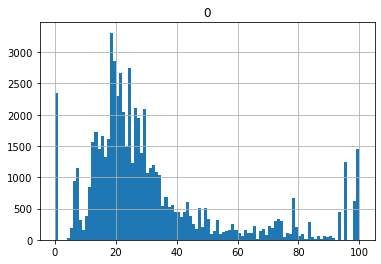

In [239]:
from fuzzywuzzy import fuzz

k1 = "cardiovascular disease"
list_of_fuzz_ratio = [fuzz.ratio(k1, x) for x in list_of_keywords]

pd.DataFrame(list_of_fuzz_ratio).hist(bins=100)

In [344]:
list_of_keywords = [s.strip() for s in list_of_keywords]

unique_key_words = set(list_of_keywords)

#unique_key_words = set([s.strip() for s in list_of_keywords])

words_count_pd = pd.DataFrame(pd.DataFrame(list_of_keywords).value_counts().sort_values(ascending=False))

words_count_pd.columns = ["counts"]


print(words_count_pd.head());

                         counts
0                              
cardiovascular disease     1474
Cardiovascular disease     1249
cardiovascular diseases     623
COVID-19                    452
Cardiovascular diseases     436


In [348]:
#cluster key words that are similar to each other in the sample group (fuzzy ratio >=80), 
#combine each group to one entry
threshold = 80

word_dict = dict()

count_rows  = 0

tmp_unique = list(unique_key_words)

while len(tmp_unique) > 0:
    
    if len(tmp_unique)%round(len(unique_key_words)/10) == 0:
        print(f"Finished {round(10-len(tmp_unique)/round(len(unique_key_words)/10), 2)*10}%")
        
    
    
    #took the first one as new key words
    word = tmp_unique[0]
    
    if len(word) == 0:
        tmp_unique = tmp_unique[1:]
        continue
    else:
        
        all_matched_words = [x for x in tmp_unique if fuzz.ratio(word, x)>=threshold]


        if len(all_matched_words) == 1:

            

            word_dict[word] = words_count_pd.loc[word, "counts"].sum()
              

        else:
            all_matched_counts = words_count_pd.loc[all_matched_words, "counts"]
            #pick the one with highest counts as match
            best_match = all_matched_counts.sort_values(ascending=False)
            #print(best_match)
            #toot the most frequent word as default word, sum all counts in the group
            #if best_match.index[0] not in word_dict.keys():
            word_dict[best_match.index[0]] = best_match.sum()
                
        #update tmp unique
        tmp_unique = list(set(tmp_unique) - set(all_matched_words))
    

word_pd = pd.DataFrame.from_dict(word_dict, orient='index', columns = ["counts"])

print(word_pd.head())
        
    

Finished 10.0%
Finished 20.0%
Finished 50.0%
Finished 60.0%
Finished 70.0%
Finished 80.0%
Finished 90.0%
                                      counts
(glomerular filtration rate,)             34
transapical paravalvular leak repair       1
(Inflammation,)                          178
Sociometric technics                       1
(Medicare,)                                6


In [375]:
'''
WHERE are these "string with brackets come from"?
'''

pd.set_option('display.max_rows', None)
print(word_pd.sort_values('counts', ascending=False))


                                                    counts
(cardiovascular disease,)                             4108
(hypertension,)                                        635
(heart failure,)                                       597
(Cardiovascular diseases,)                             578
(COVID-19,)                                            482
(myocardial infarction,)                               467
(risk factors,)                                        421
(Cardiovascular risk,)                                 393
(stroke,)                                              378
(obesity,)                                             363
(coronary artery disease,)                             350
(atherosclerosis,)                                     346
(cardiovascular risk factors,)                         331
(cardiovascular risk,)                                 308
(epidemiology,)                                        305
(Type 2 diabetes,)                                     2

In [382]:
fuzz.ratio('(Cardiovascular disease, )', "(Cardiovascular risk,)")

83

In [350]:
"(Cardiovascular diseases,)" in unique_key_words

False

In [343]:
words_count_pd.shape

(25935, 1)